In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# load the output.csv file that we made in the Band Maps notebook:
output = pd.read_csv('output.csv', converters={4:ast.literal_eval,5:ast.literal_eval})

In [29]:
output.head()

band_name  node_count  edge_count  ave_clustering  \
0        Deerhunter          20          20        0.101786   
1          The Cure         152         182        0.170763   
2   Yeah Yeah Yeahs          93         126        0.229509   
3  Dirty Projectors         211         238        0.109498   
4    Richard Hawley          25          25        0.080261   

                                         betweenness  \
0  {'Deerhunter': 0.7777777777777777, 'Lotus Plaz...   
1  {'The Cure': 0.8324150110375275, 'Siouxsie and...   
2  {'Yeah Yeah Yeahs': 0.6791686574295269, 'Nativ...   
3  {'Dirty Projectors': 0.731829573934837, 'Vampi...   
4  {'Richard Hawley': 0.40942028985507245, 'Longp...   

                                              nodes1  
0  [Deerhunter, Lotus Plaza, Black Lips, Stereola...  
1  [The Cure, Siouxsie and the Banshees, the Glov...  
2  [Yeah Yeah Yeahs, Native Korean Rock, Swans, H...  
3  [Dirty Projectors, Vampire Weekend, Discovery,...  
4   [Richard Hawley, Longpigs, Pulp, Arctic Monkeys]

In [58]:
output.shape

(90, 6)

In [10]:
def draw_betweenness(band):
    band_df = output[output.band_name==(band)]
    band_name = list(band_df.band_name)[0]
    band_nodec = list(band_df.node_count)[0]
    band_edgec = list(band_df.edge_count)[0]
    band_between = list(band_df.betweenness)[0]
    band_nodes1 = list(band_df.nodes1)[0]
    bands = pd.DataFrame.from_dict(band_between,orient='Index').reset_index()
    bands.columns = ['band','betweenness']

#     fig_height

    plot_df = bands.sort_values('betweenness')[bands.betweenness>=0.01]
    fig_height = plot_df.shape[0]
    
    fig, ax = plt.subplots(figsize=(10,fig_height))
    plt.ioff()

    color_list = plot_df.band.map(lambda x: '#708090' if x==band_name else '#7a977a' if x in band_nodes1 else '#707070')

    plot_df.betweenness.plot(kind='barh', color=color_list)

    ax.set_yticklabels(plot_df.band, fontdict={'fontweight':'bold'})

    ax.tick_params(colors='white')
    ax.set_axis_bgcolor('#00000F')
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

    fig.set_facecolor("#00000F")

    title_text = '\n'.join(['',
                            band_name,
                            'Number of bands: {}'.format(band_nodec),
                            'Number of links: {}'.format(band_edgec),
                            'Central bands in network:',''])

    plt.title(title_text,color='white',weight='bold',loc='left')
    
    plt.savefig('btwn_output/'+band_name.lower().replace(' ','-')+'-btwn.png',
                facecolor='#00000F',
                bbox_inches='tight',
                pad_inches=0.2)
#     plt.show();

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


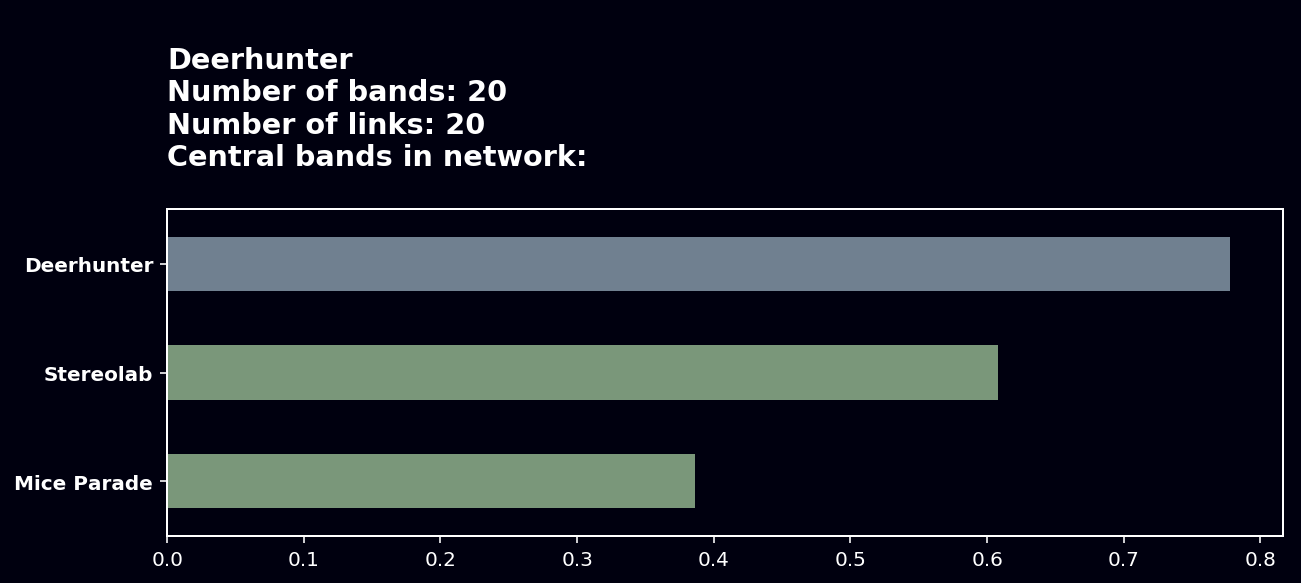

In [8]:
draw_betweenness('Deerhunter')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


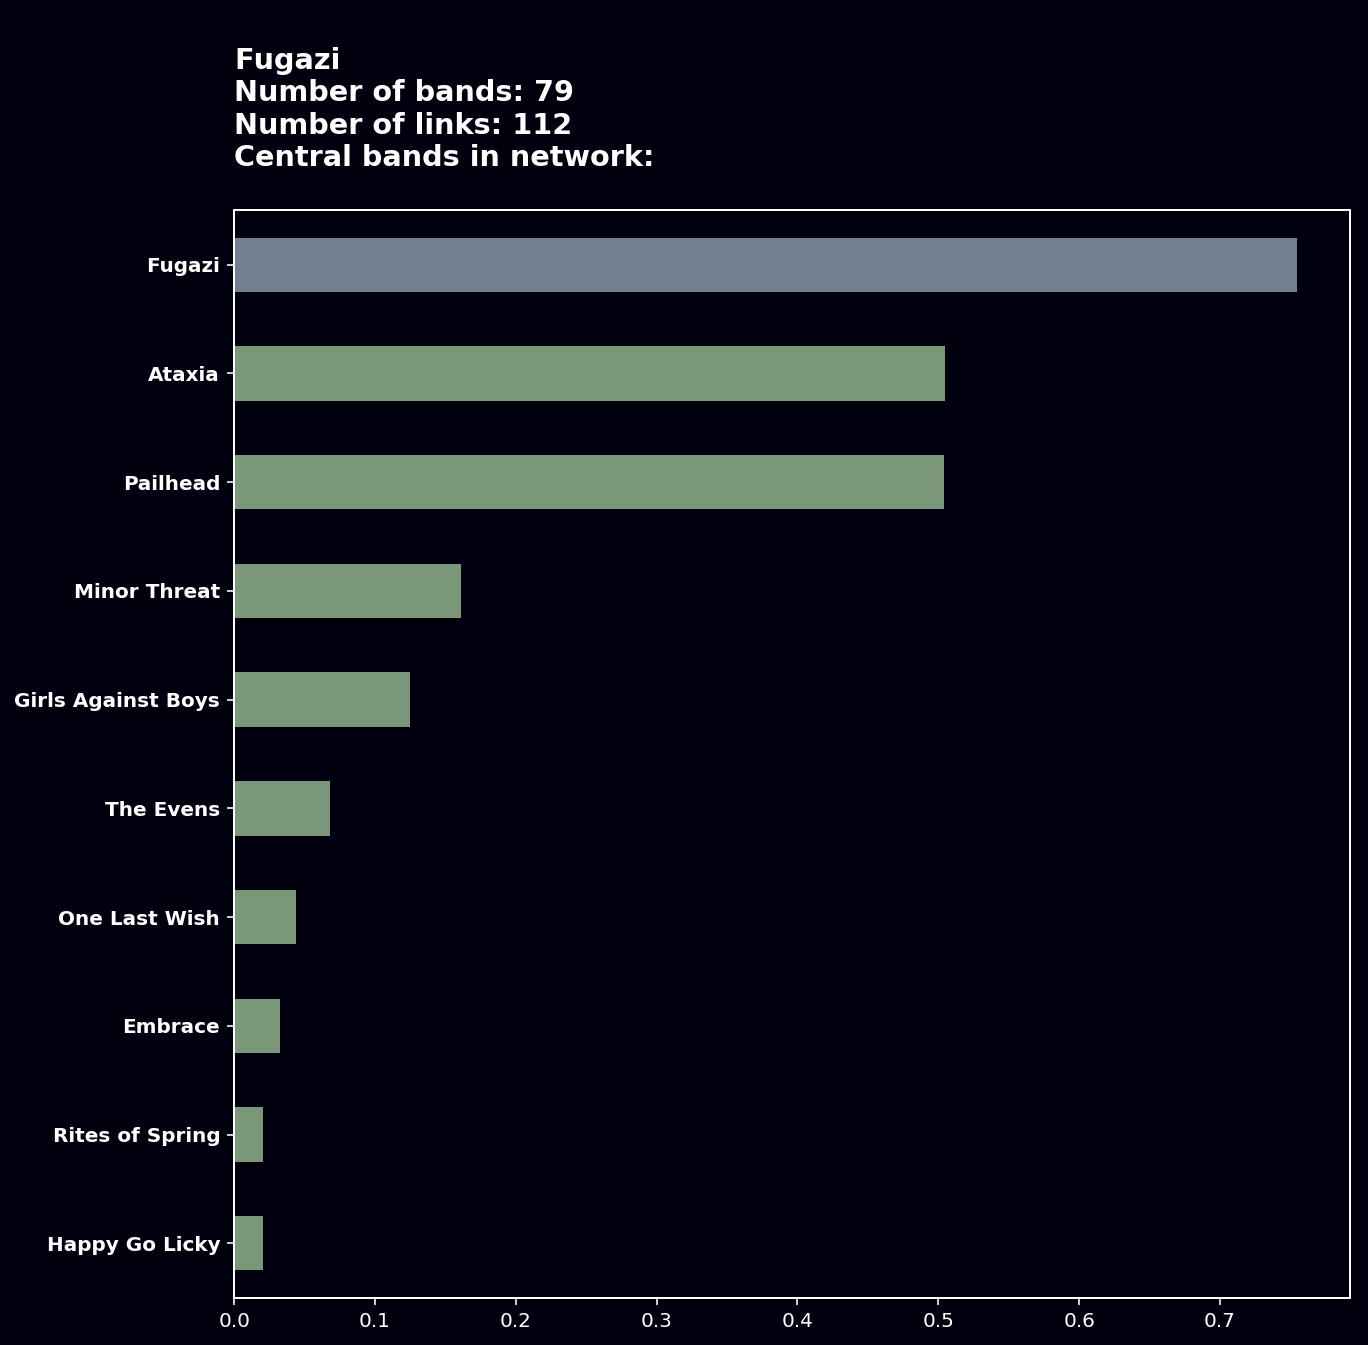

In [11]:
draw_betweenness('Fugazi')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


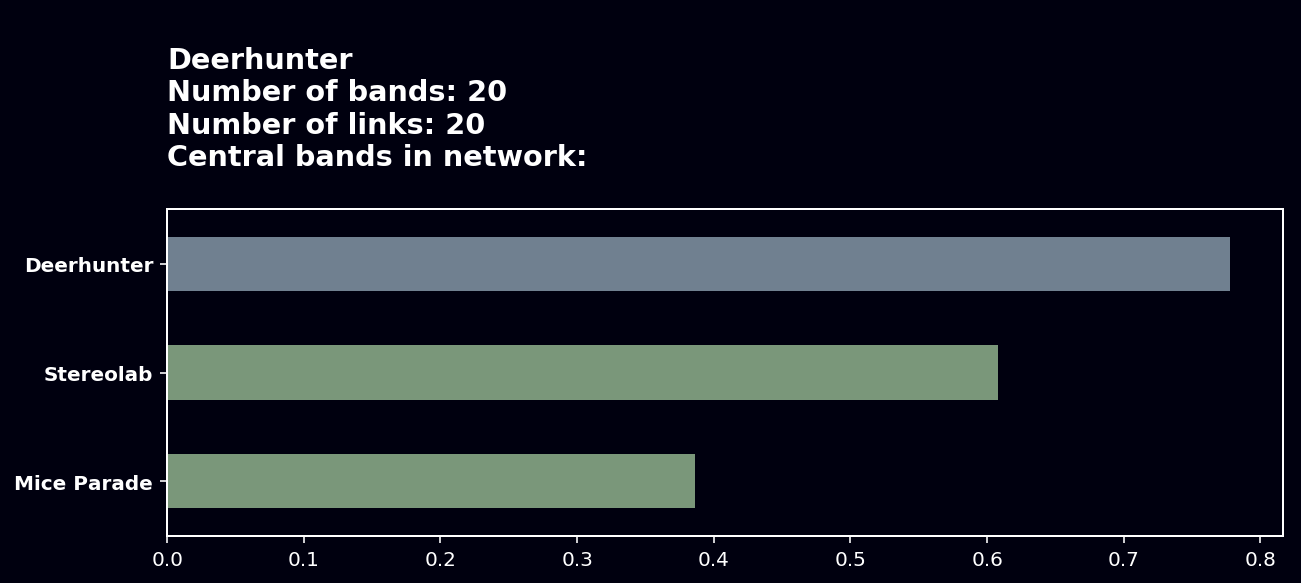

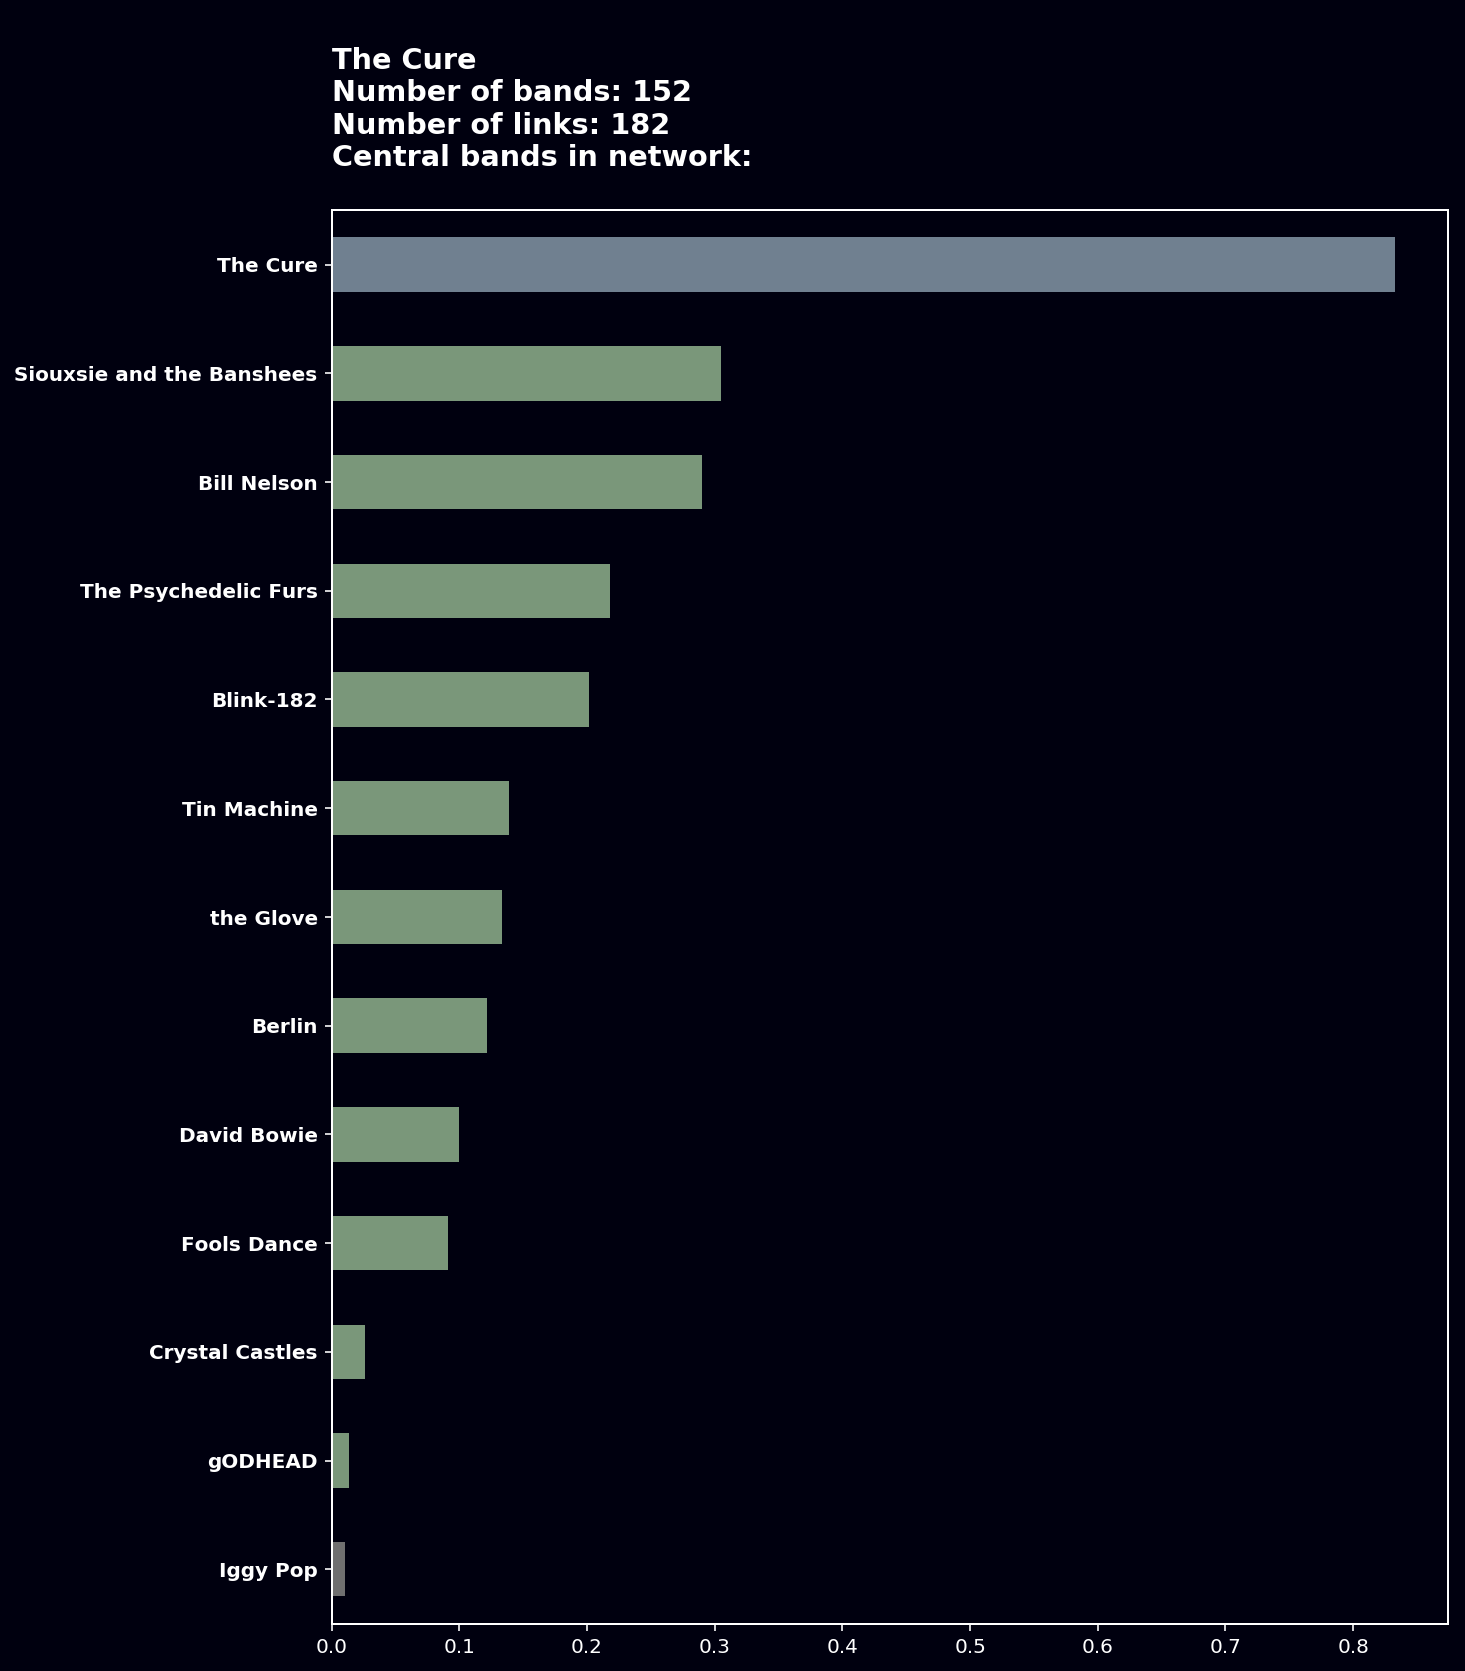

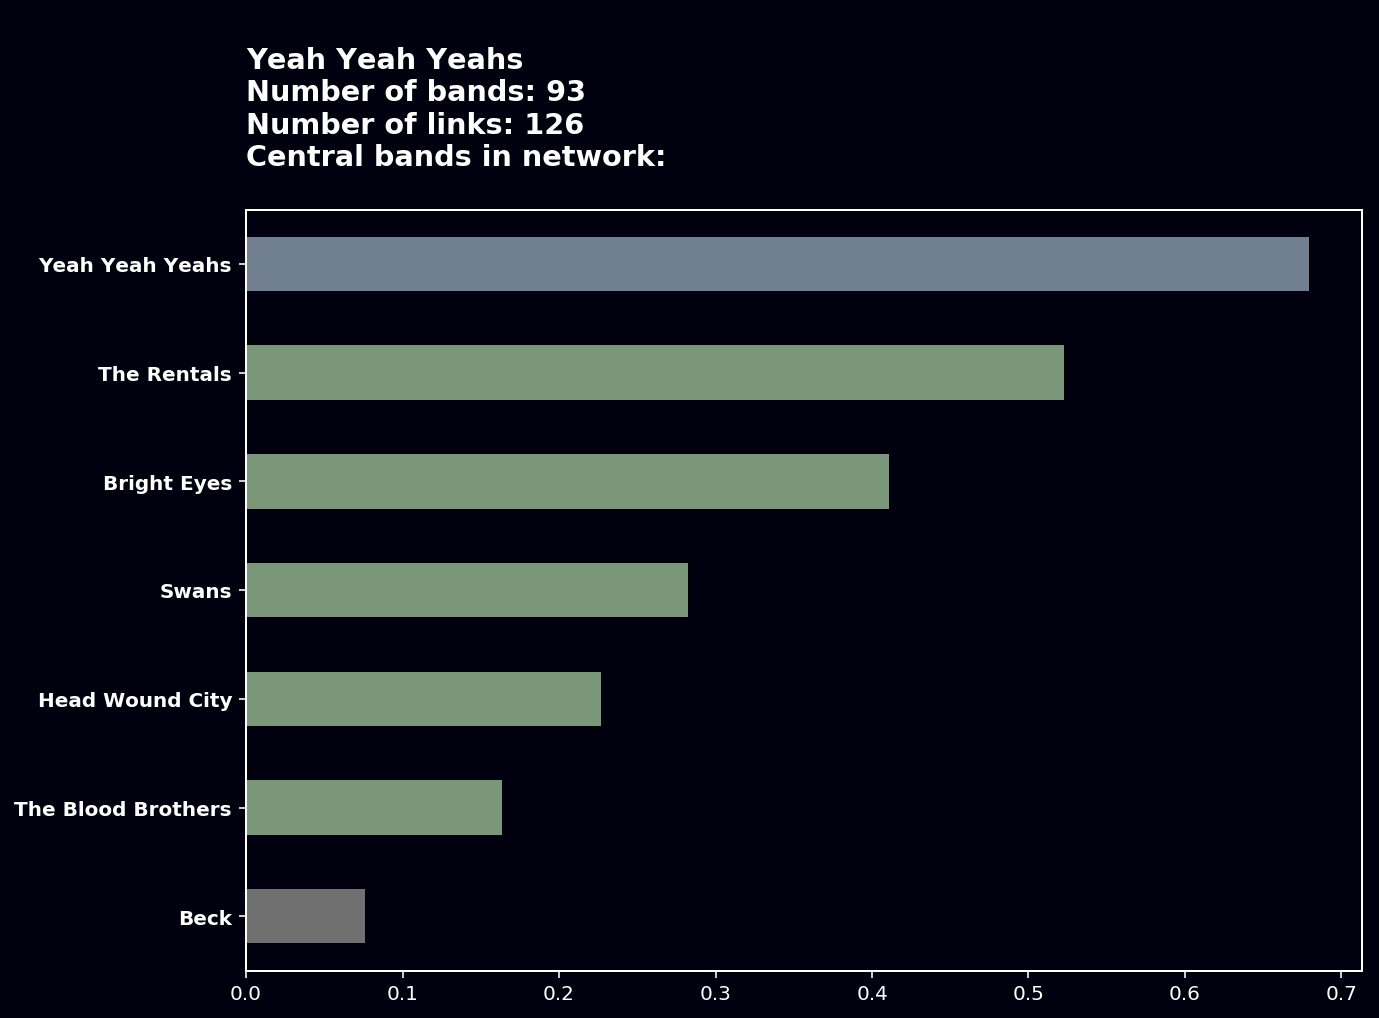

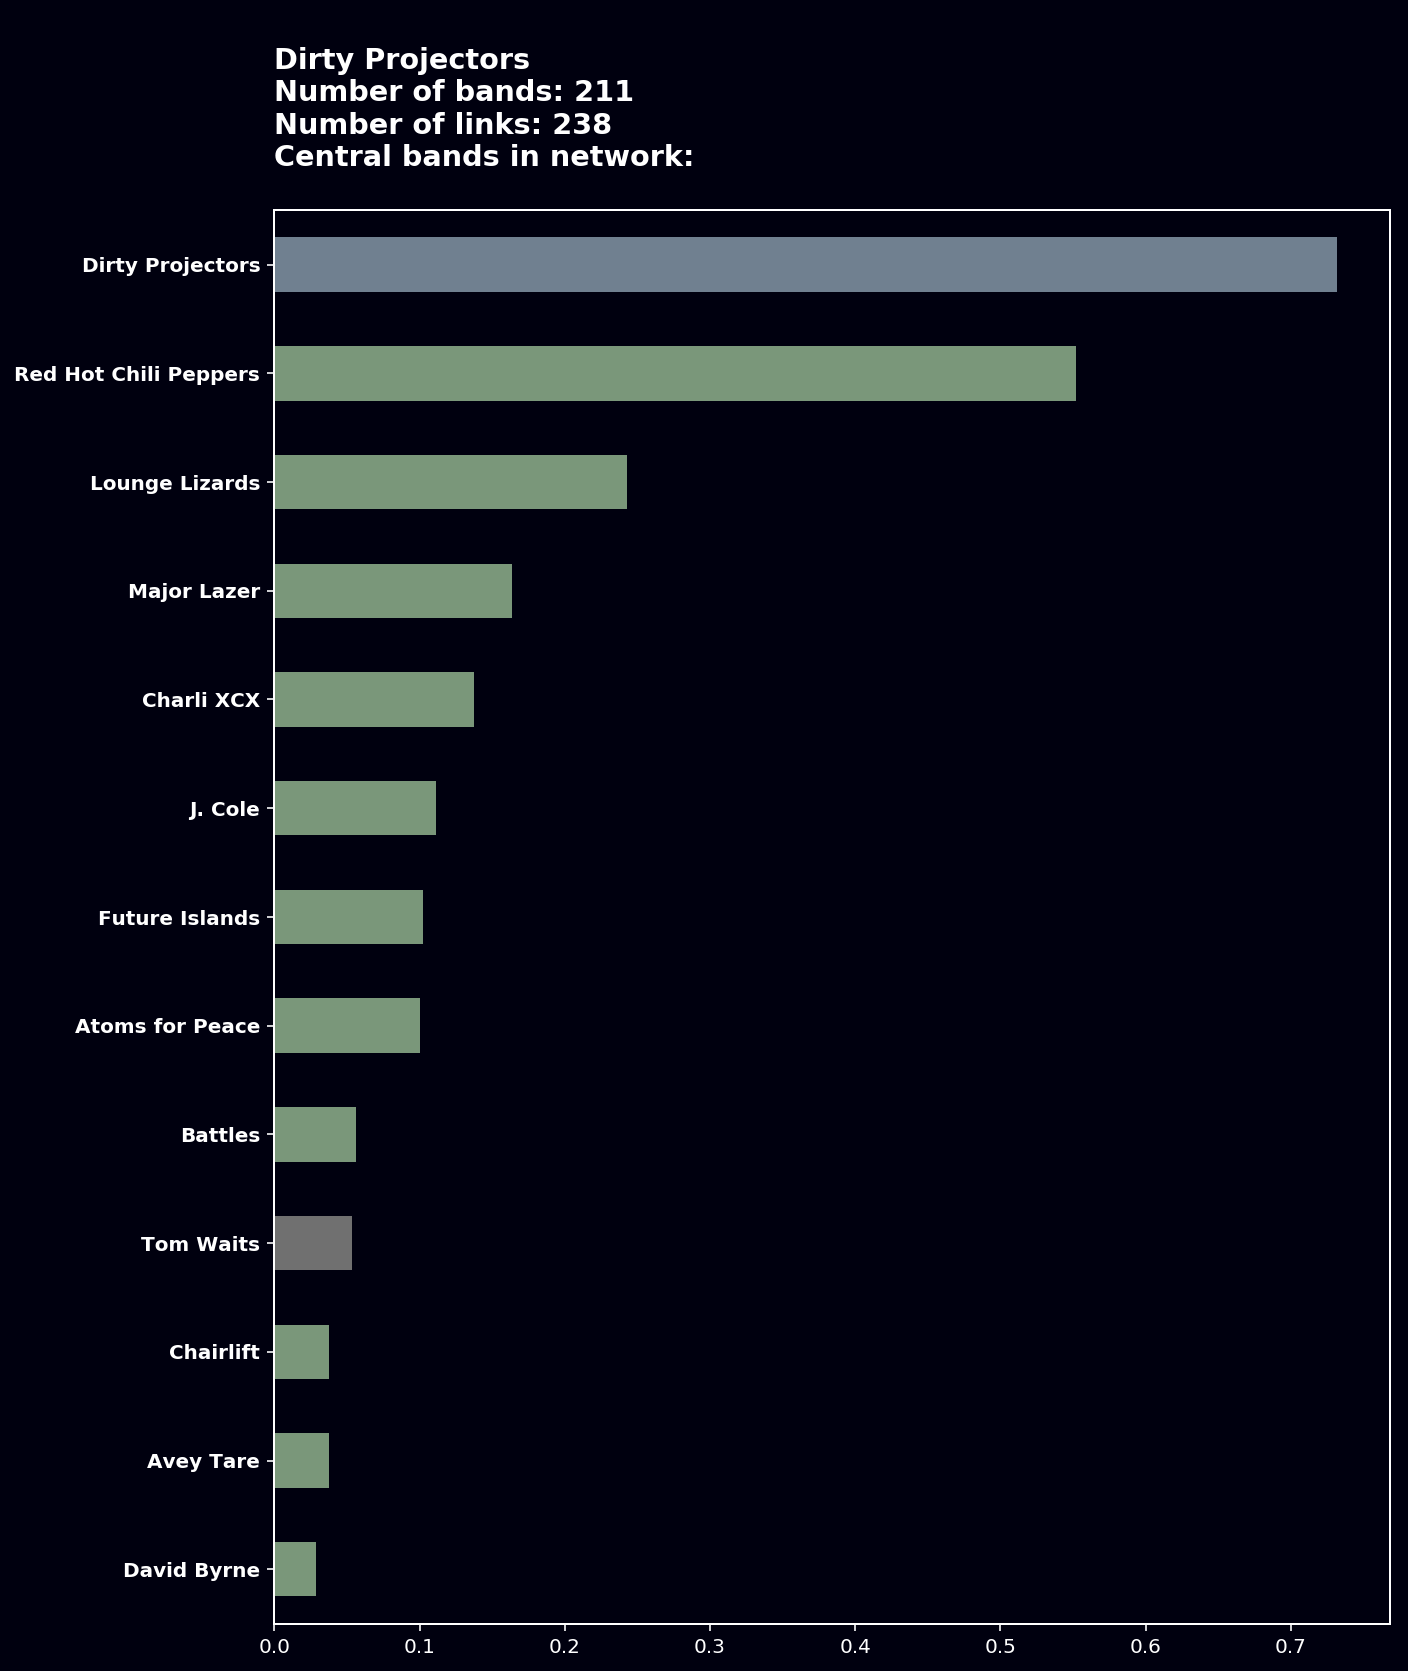

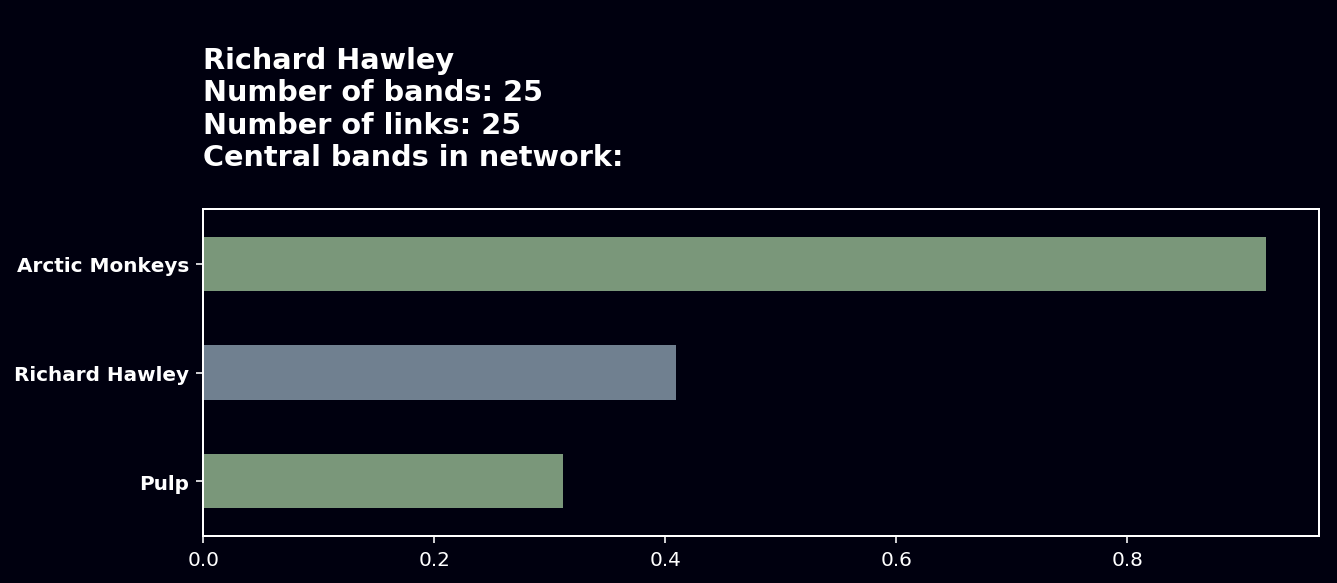

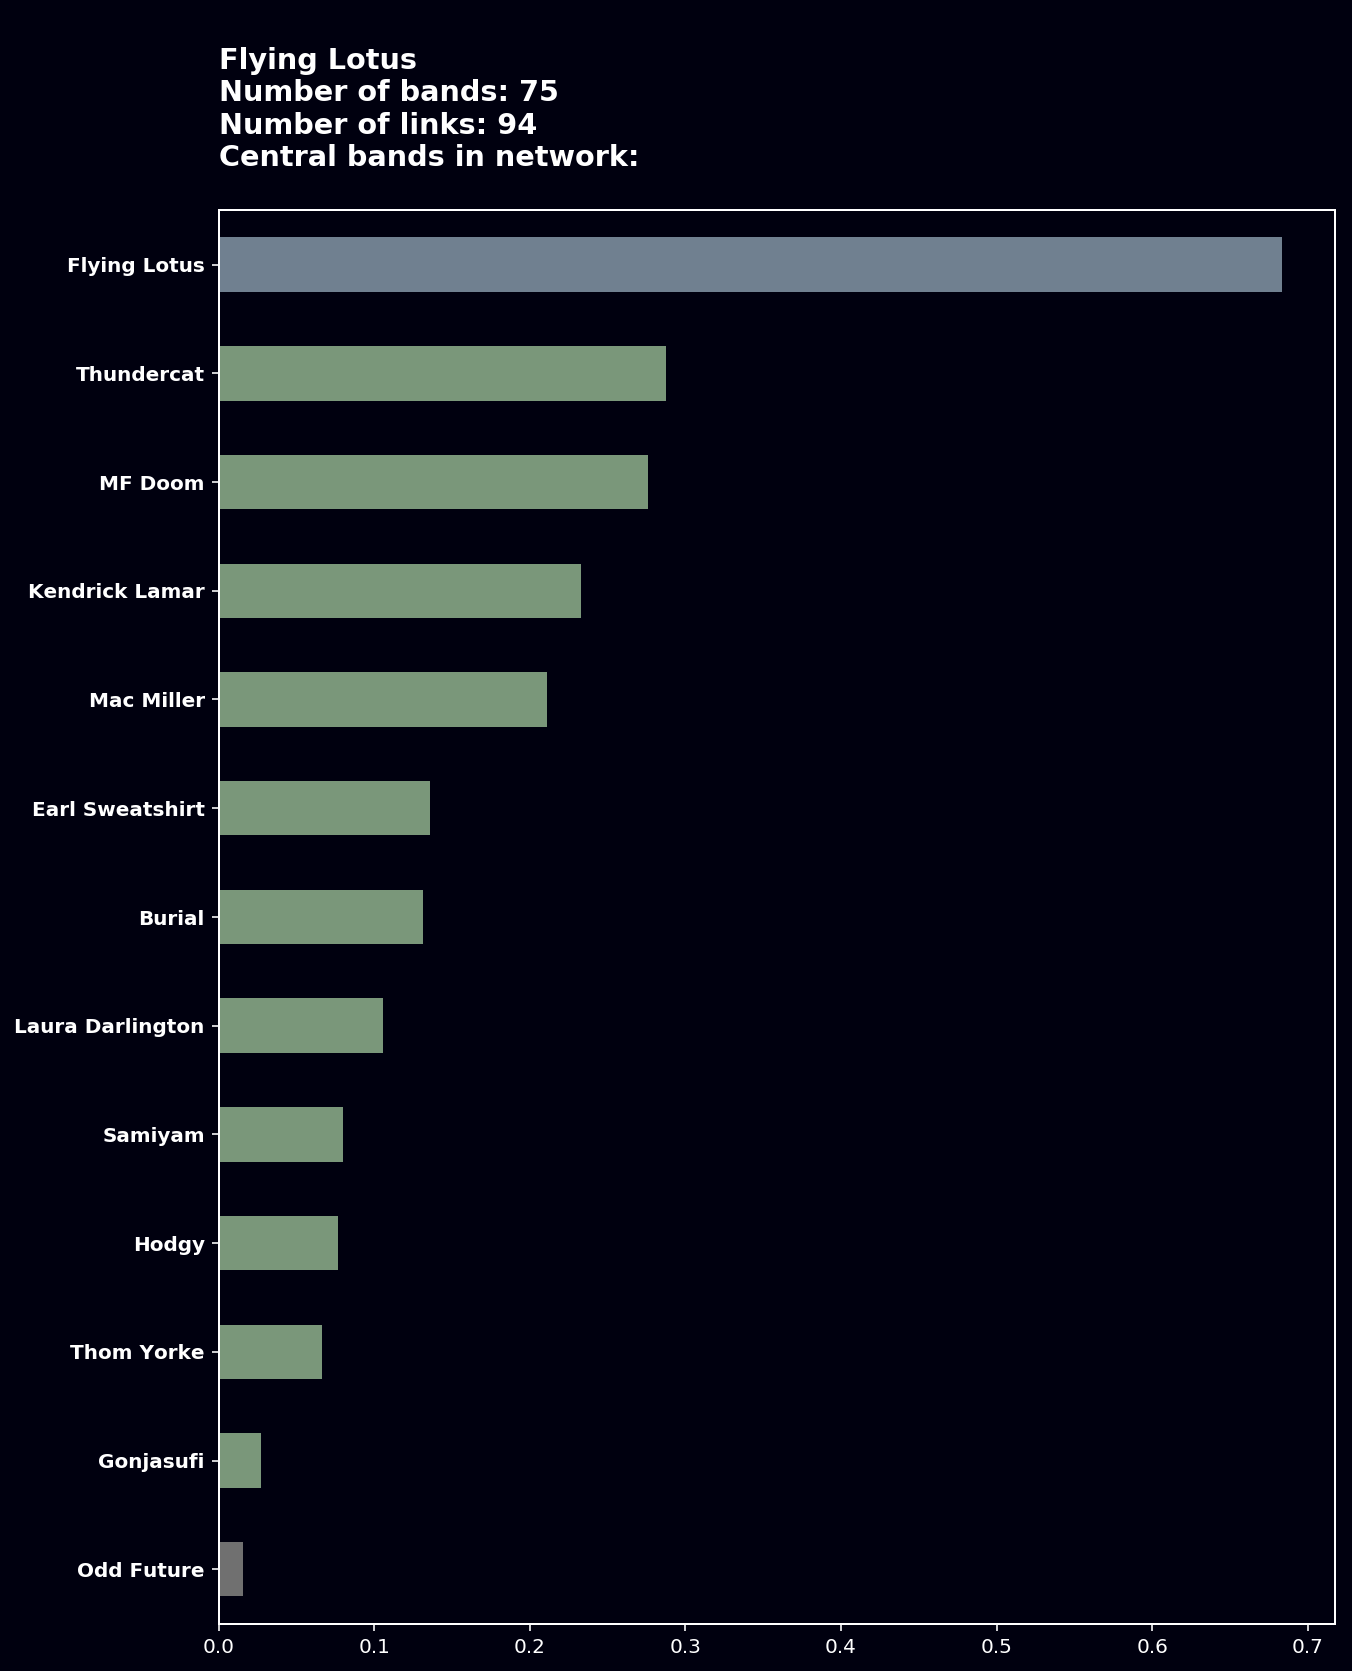

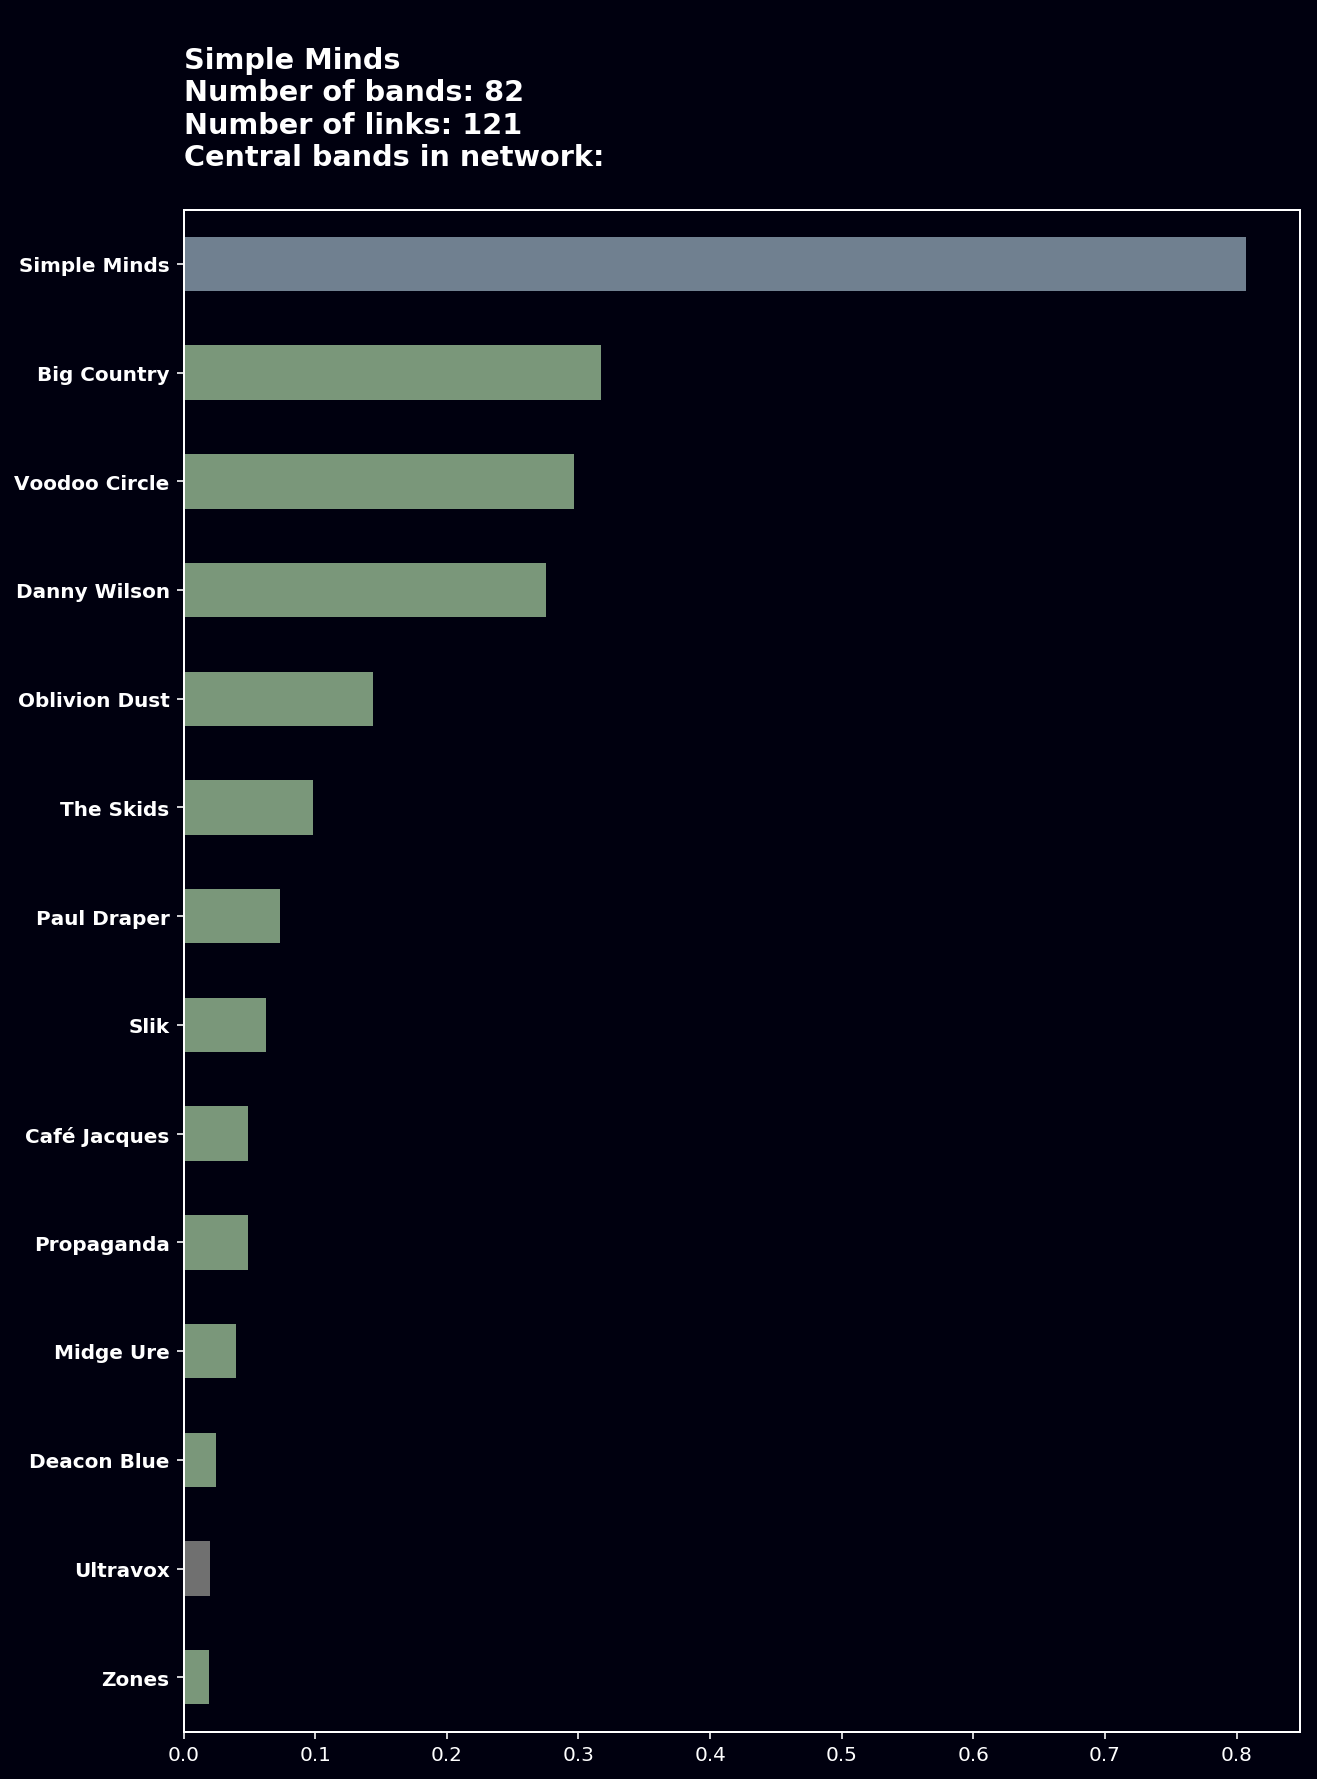

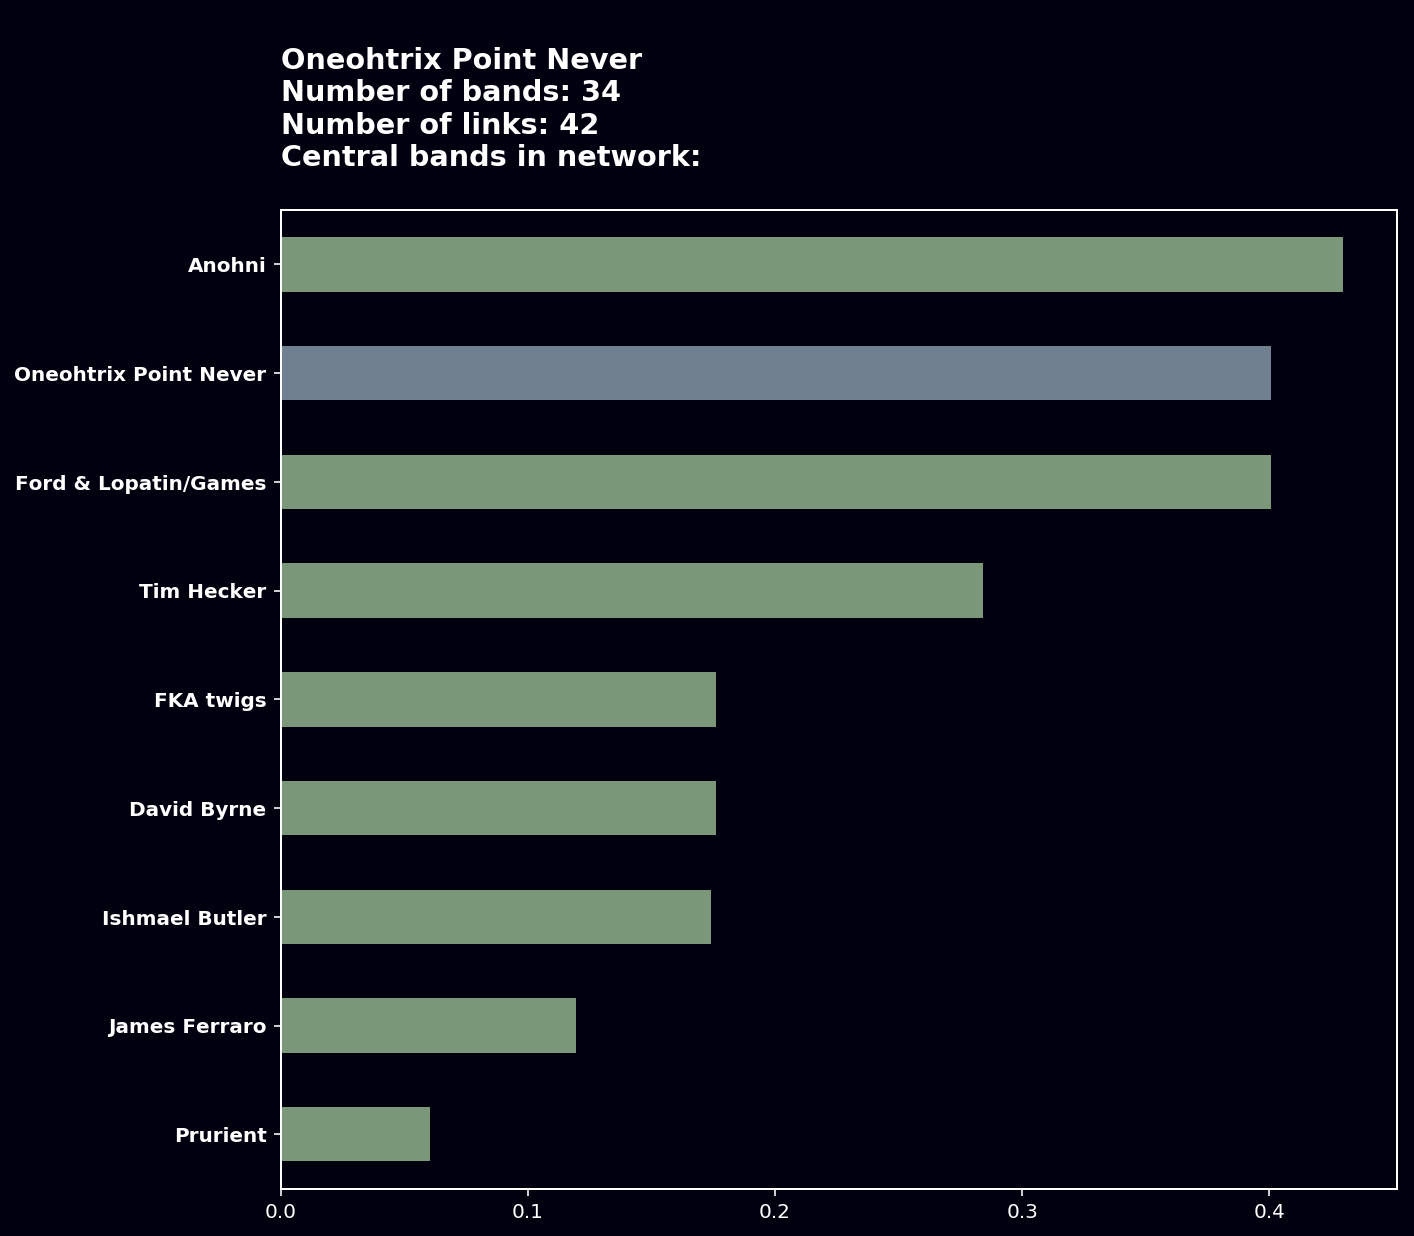

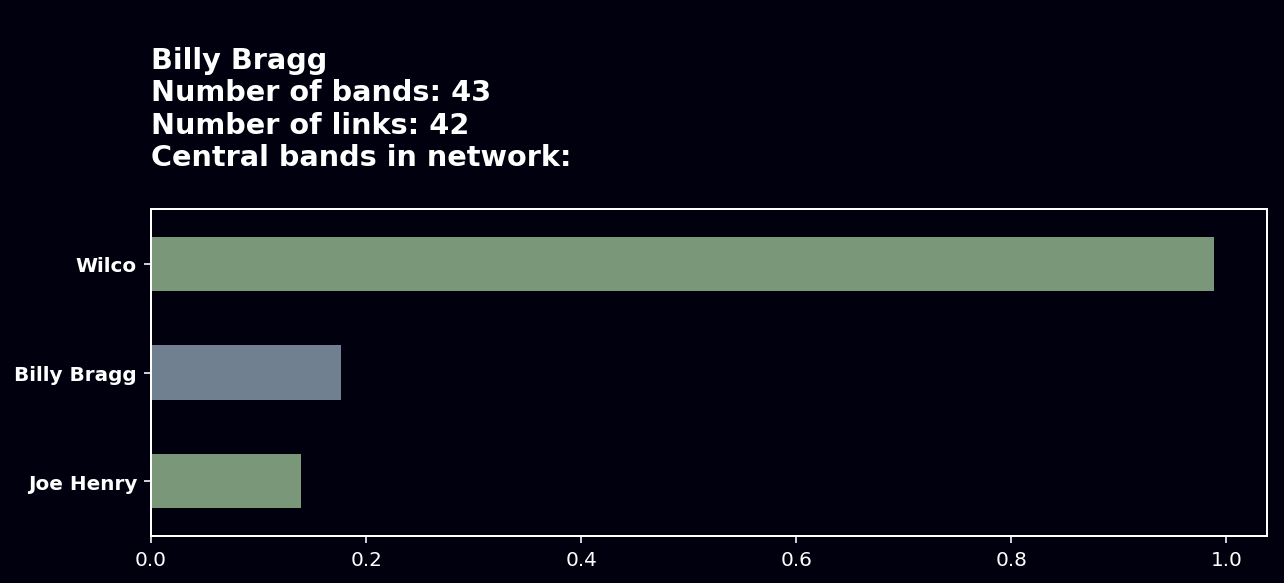

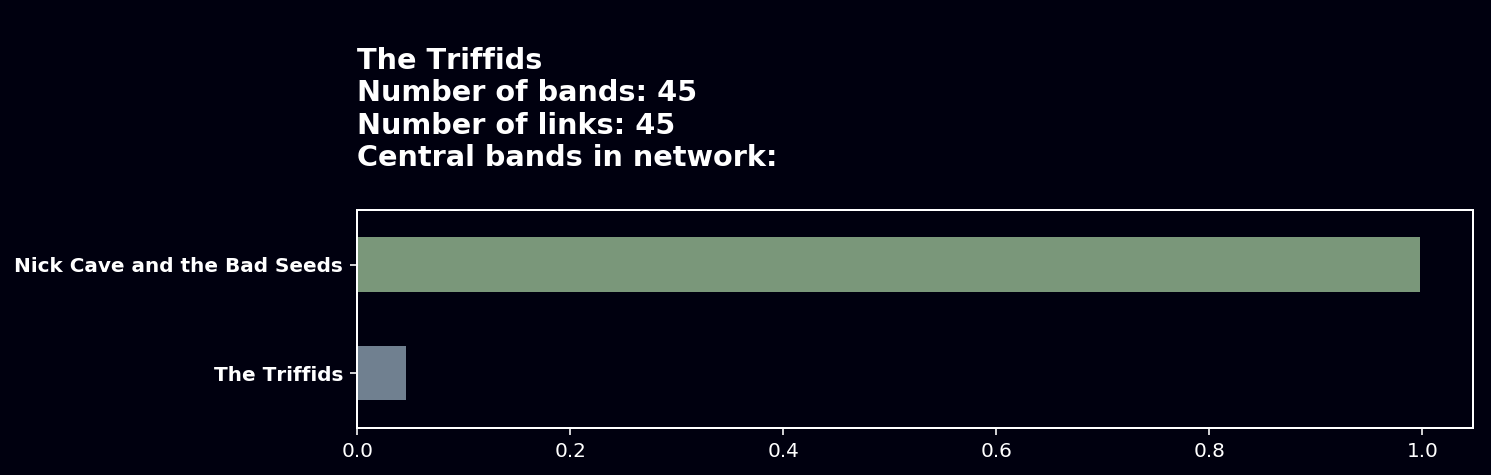

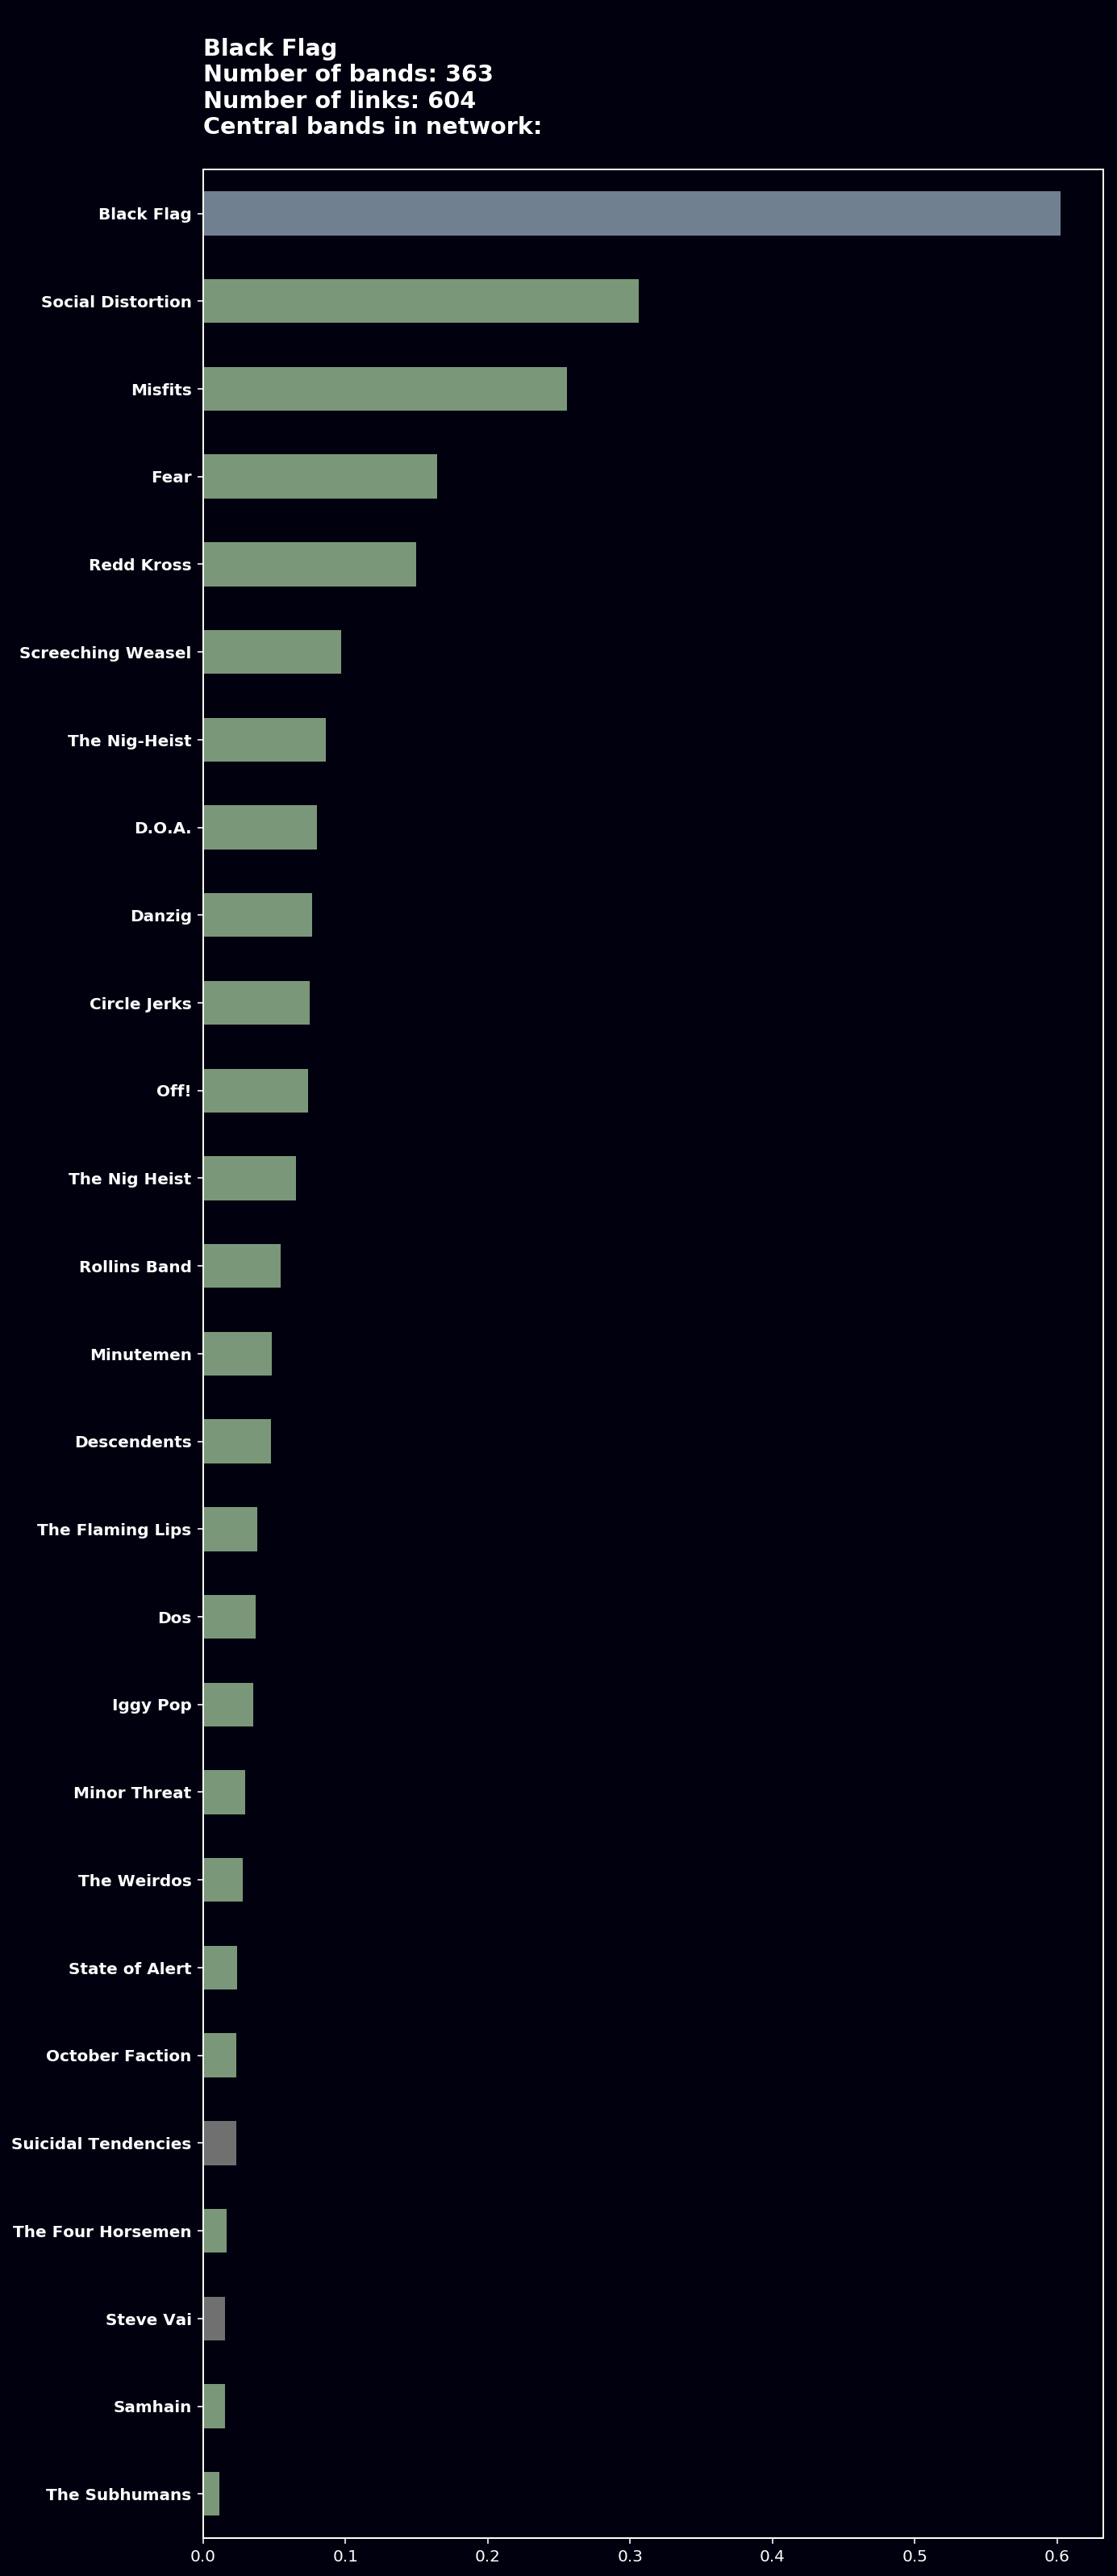

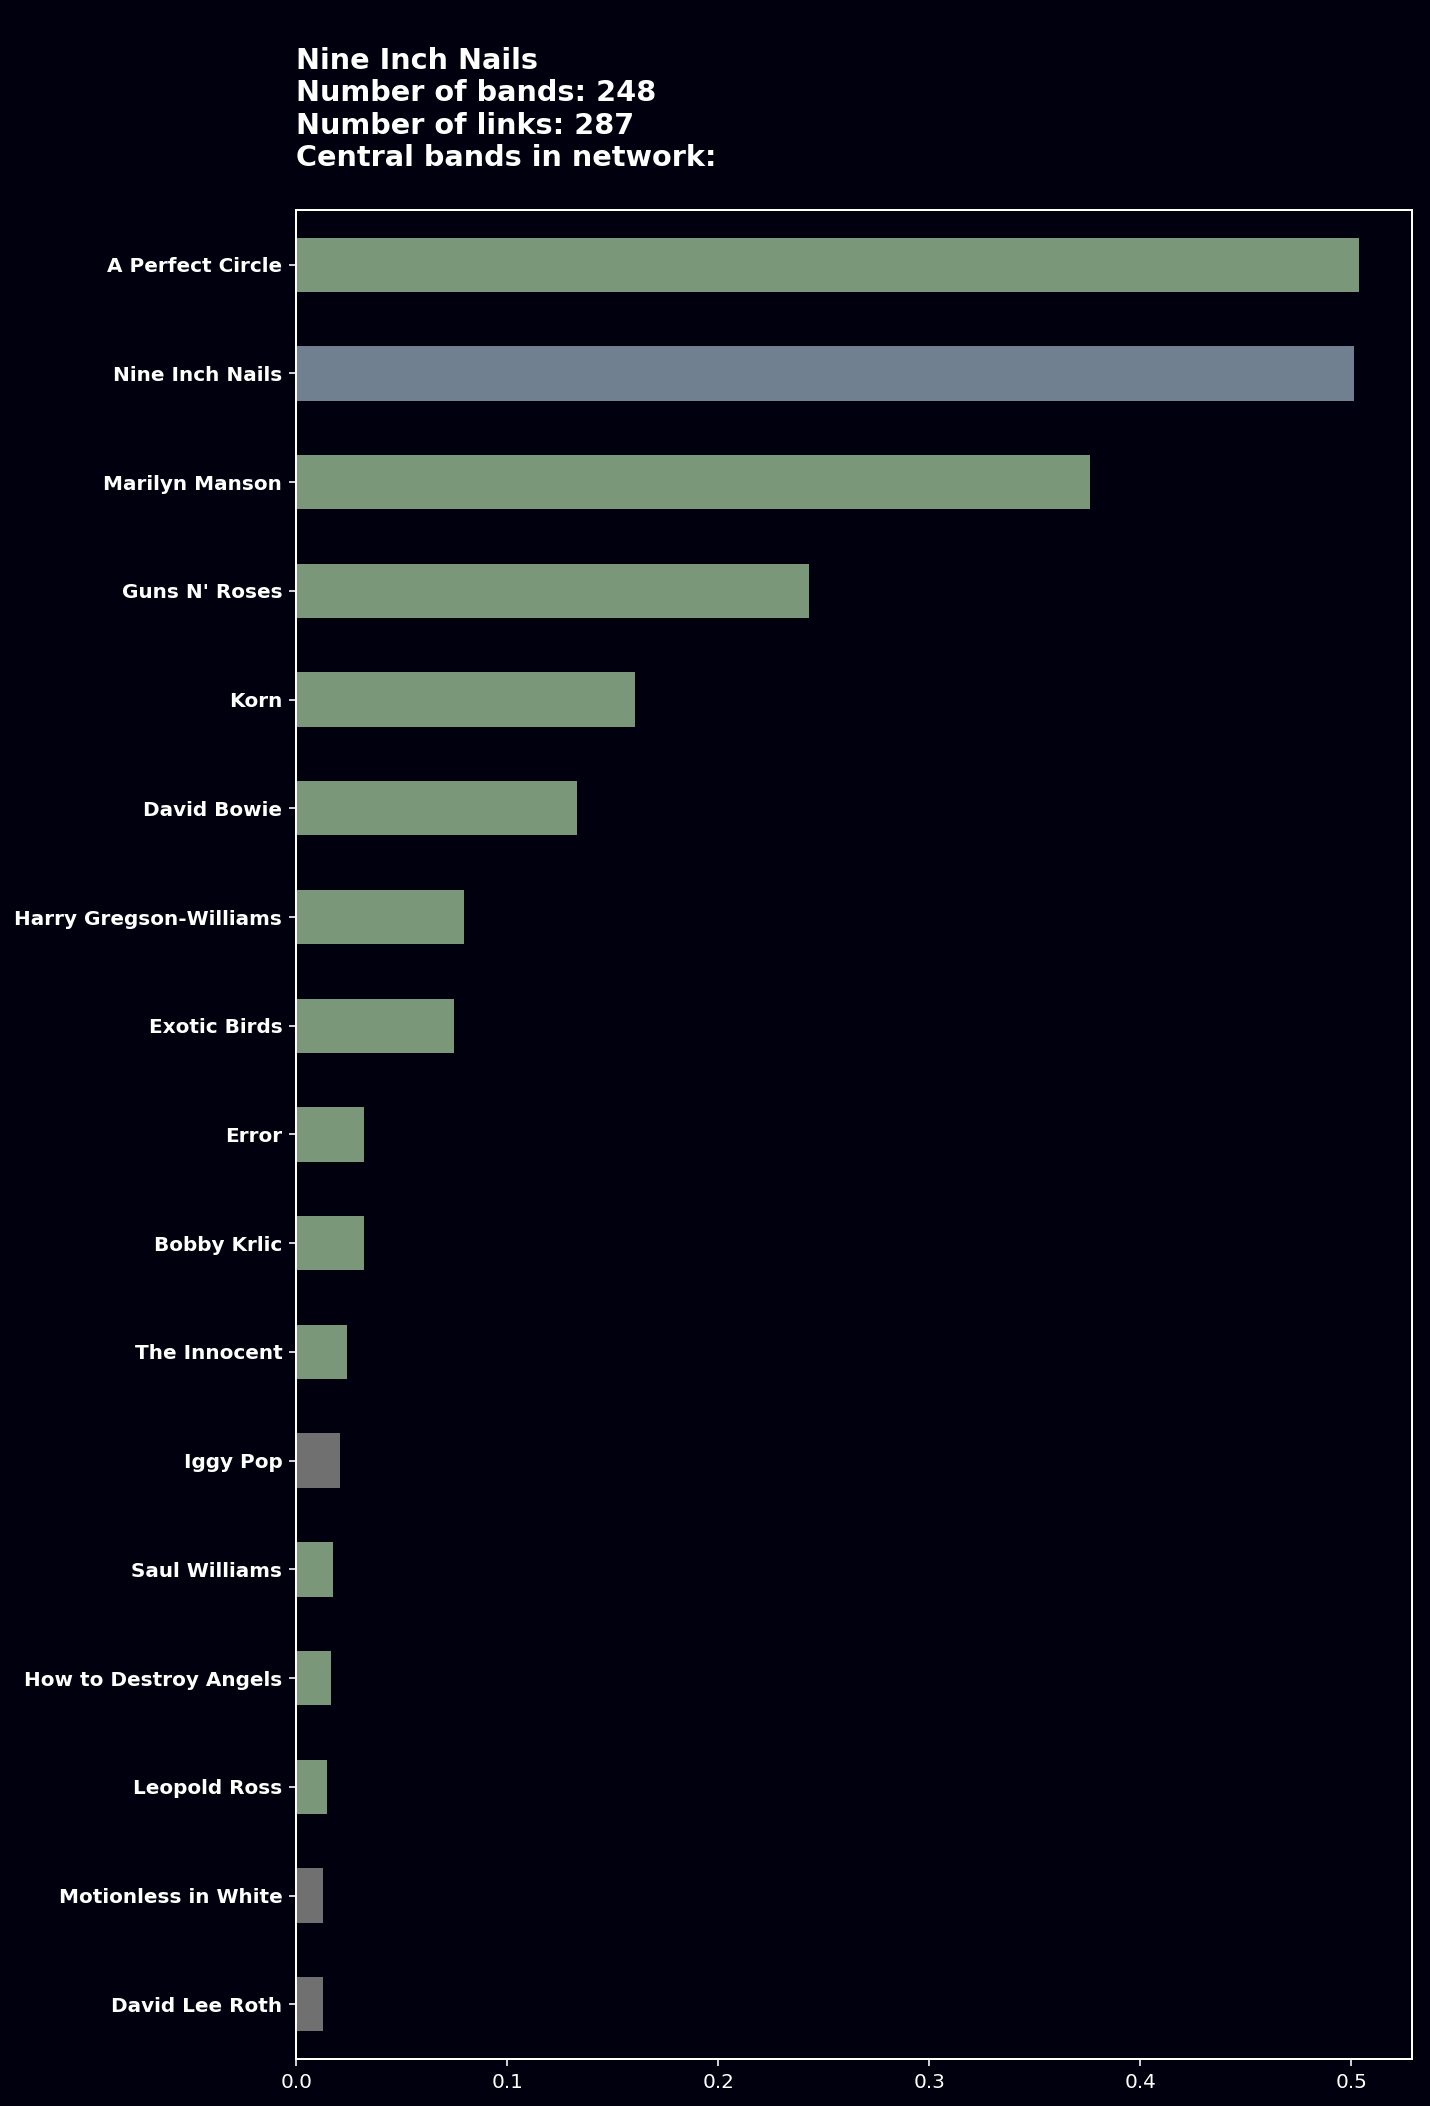

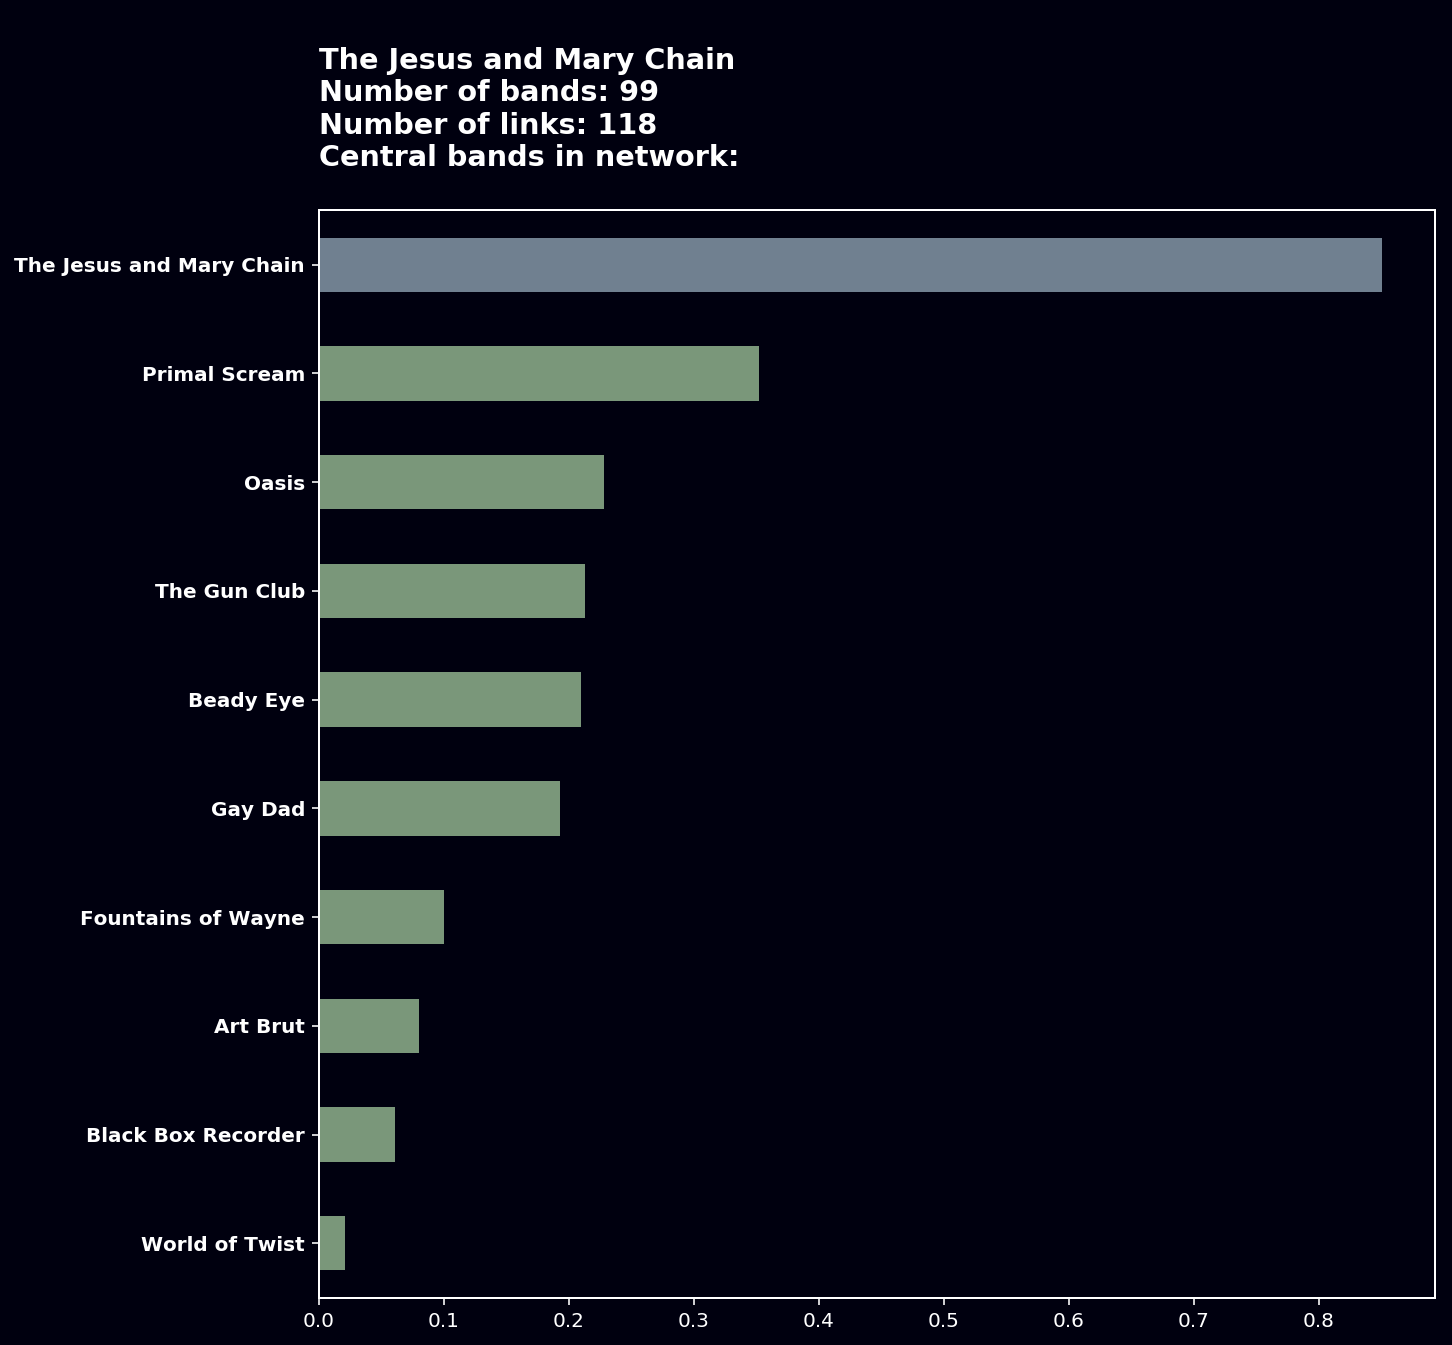

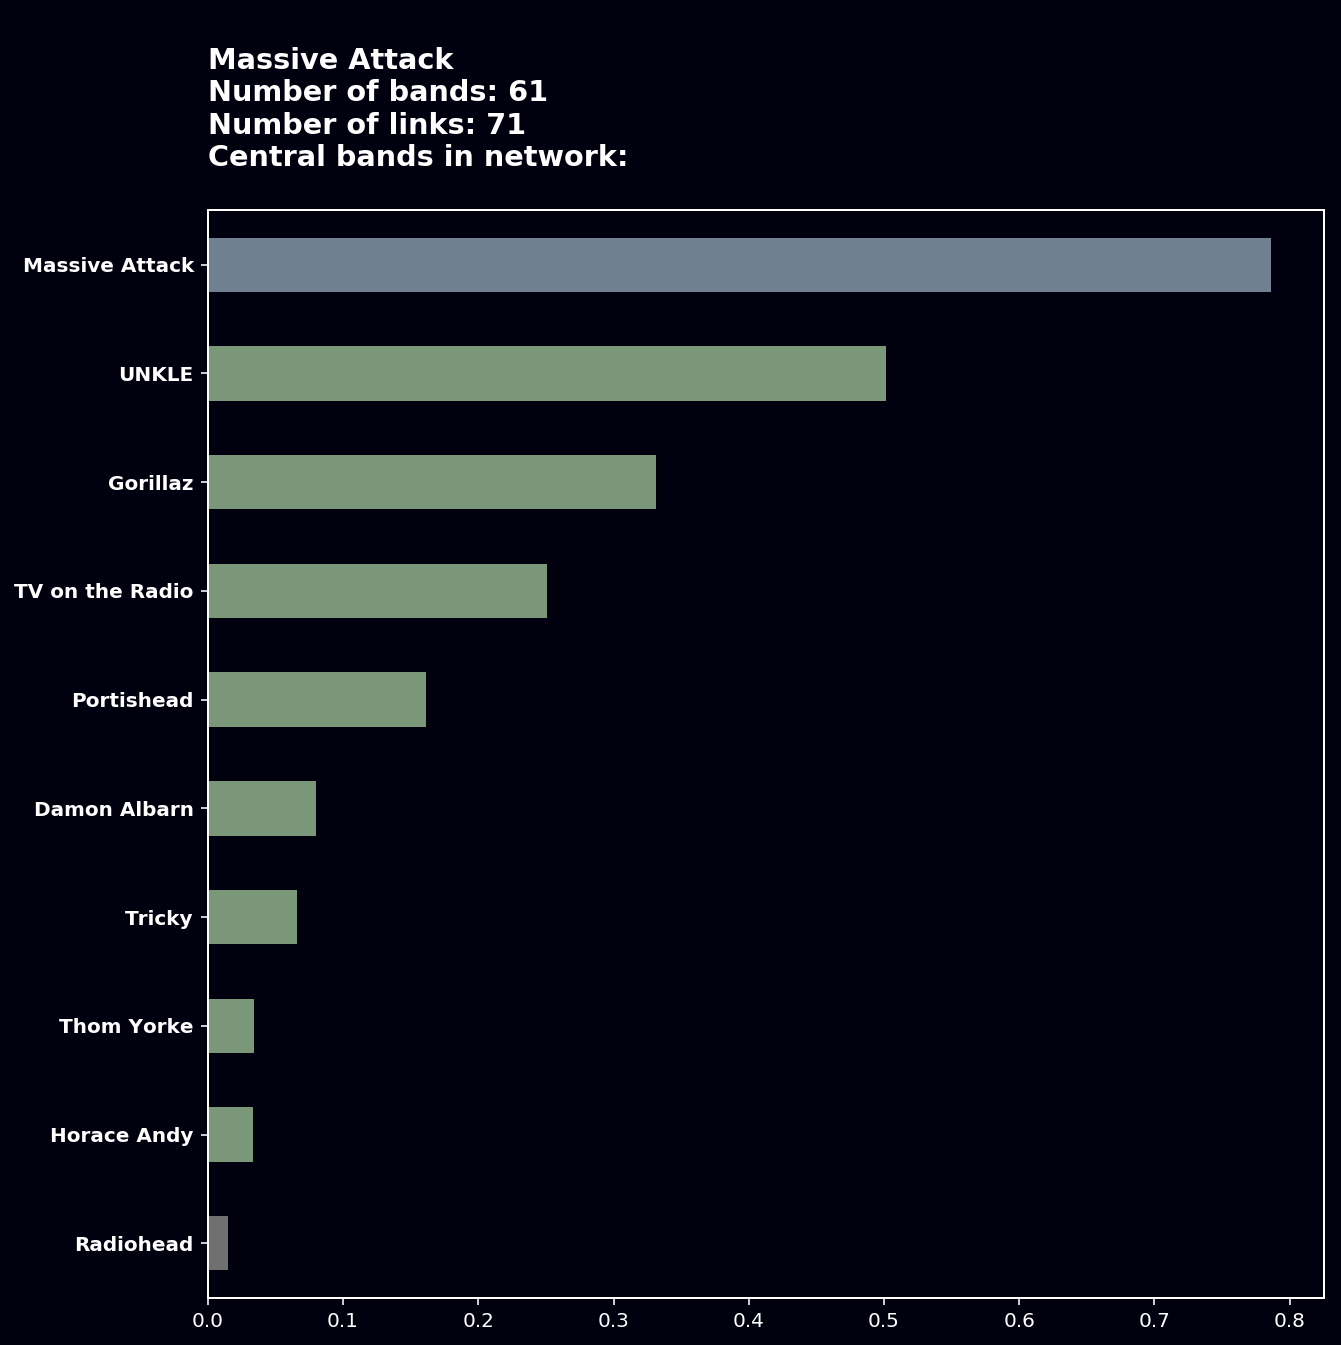

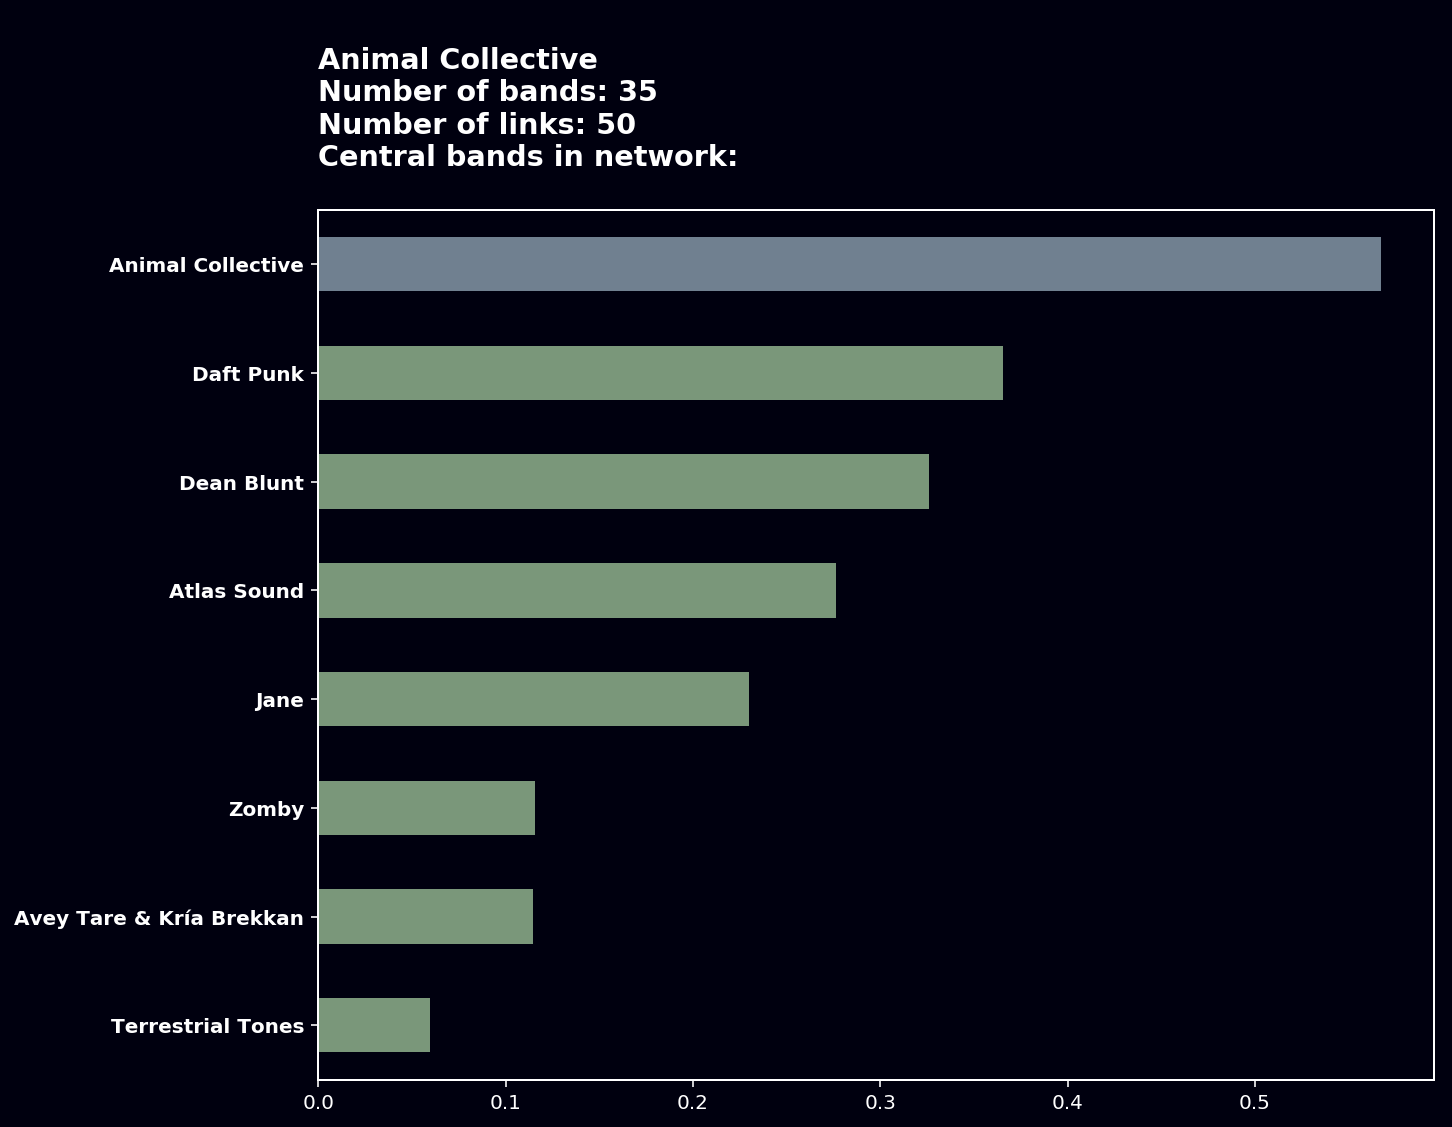

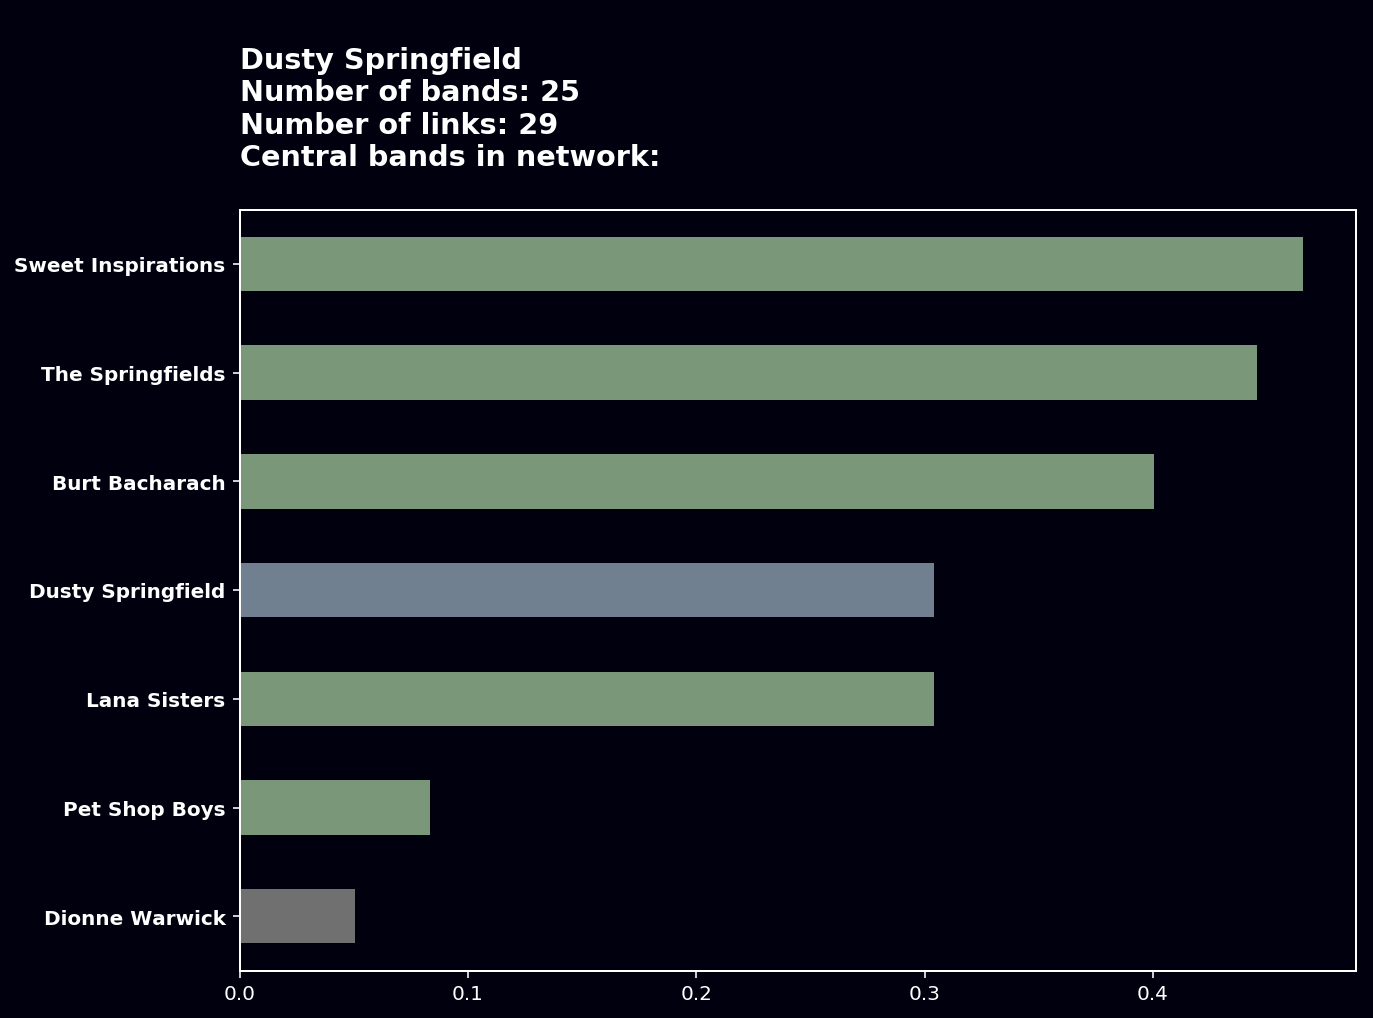

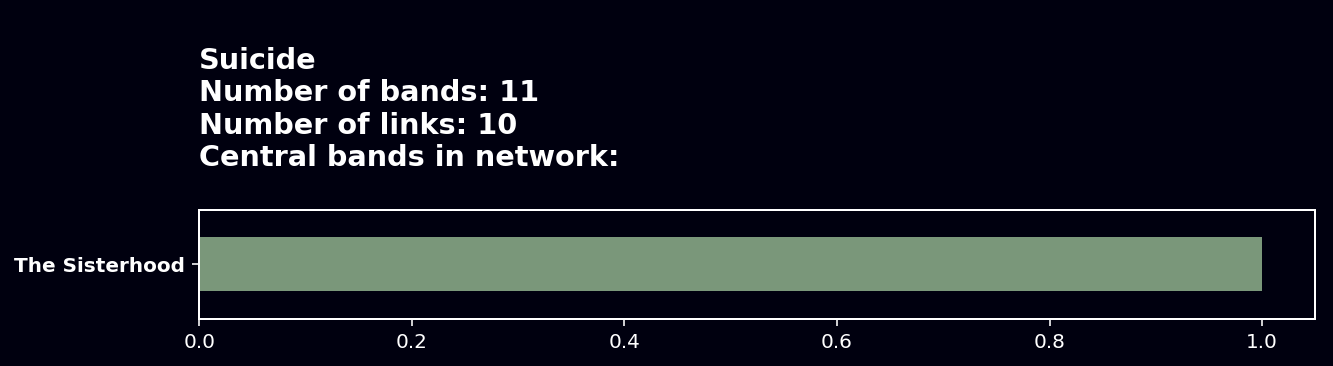

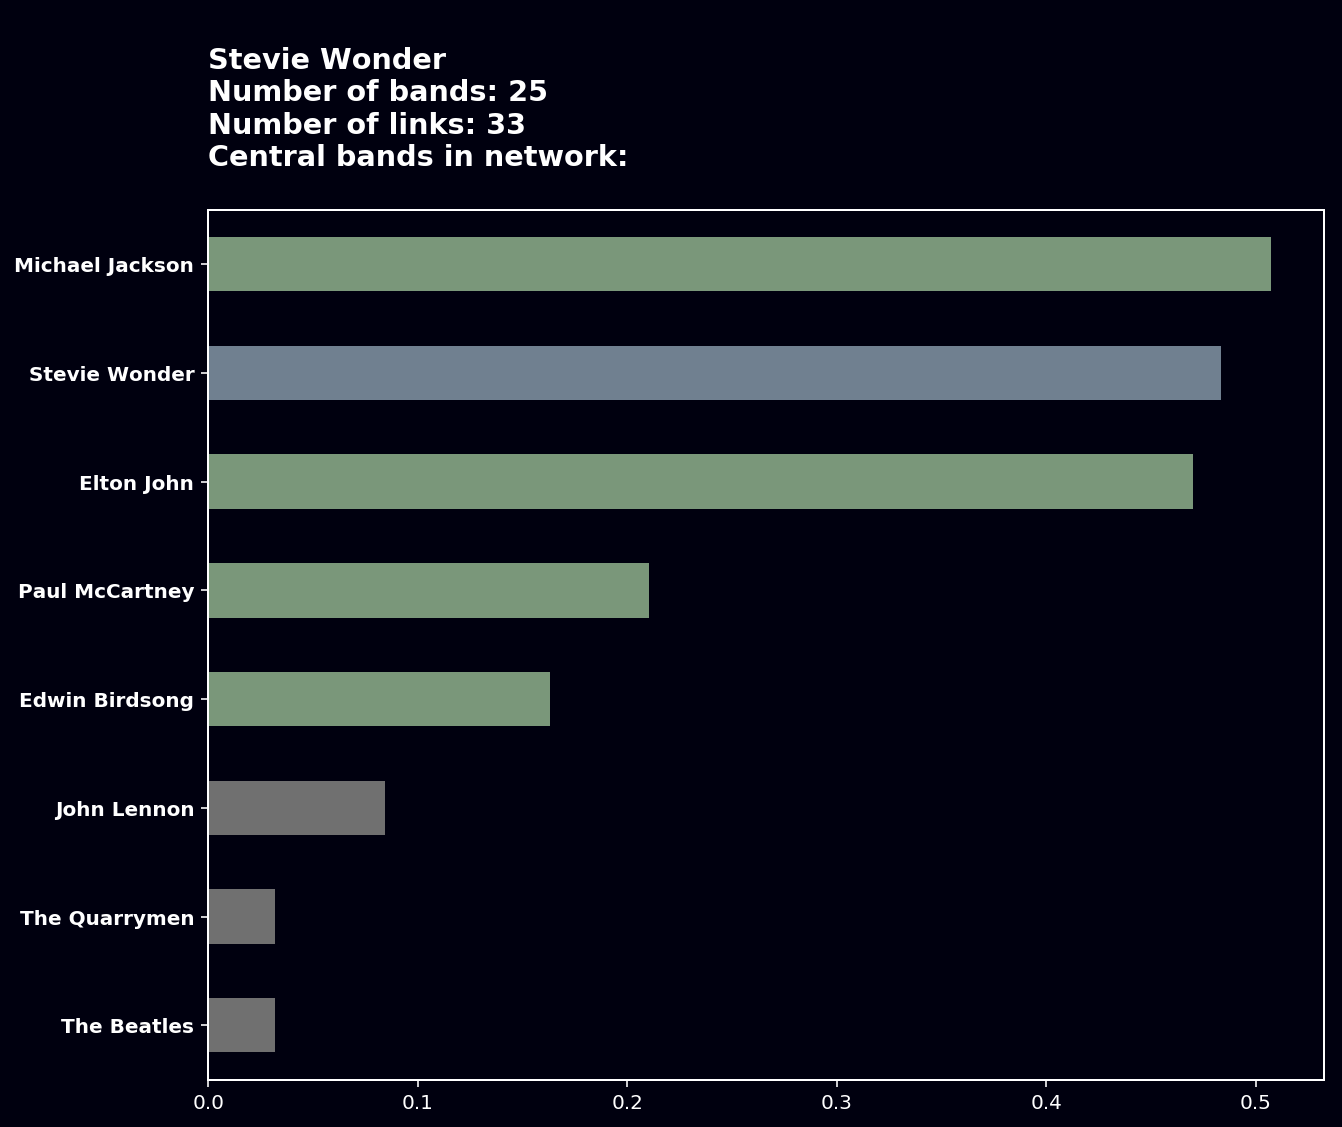

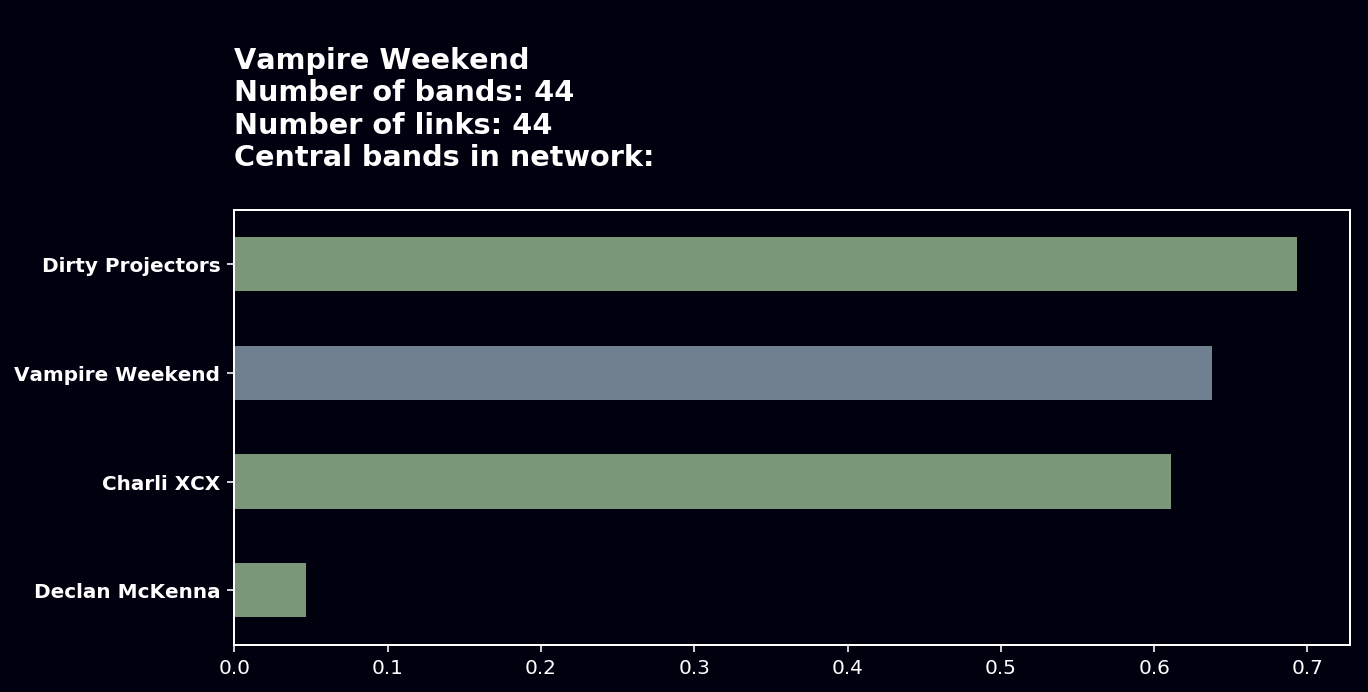

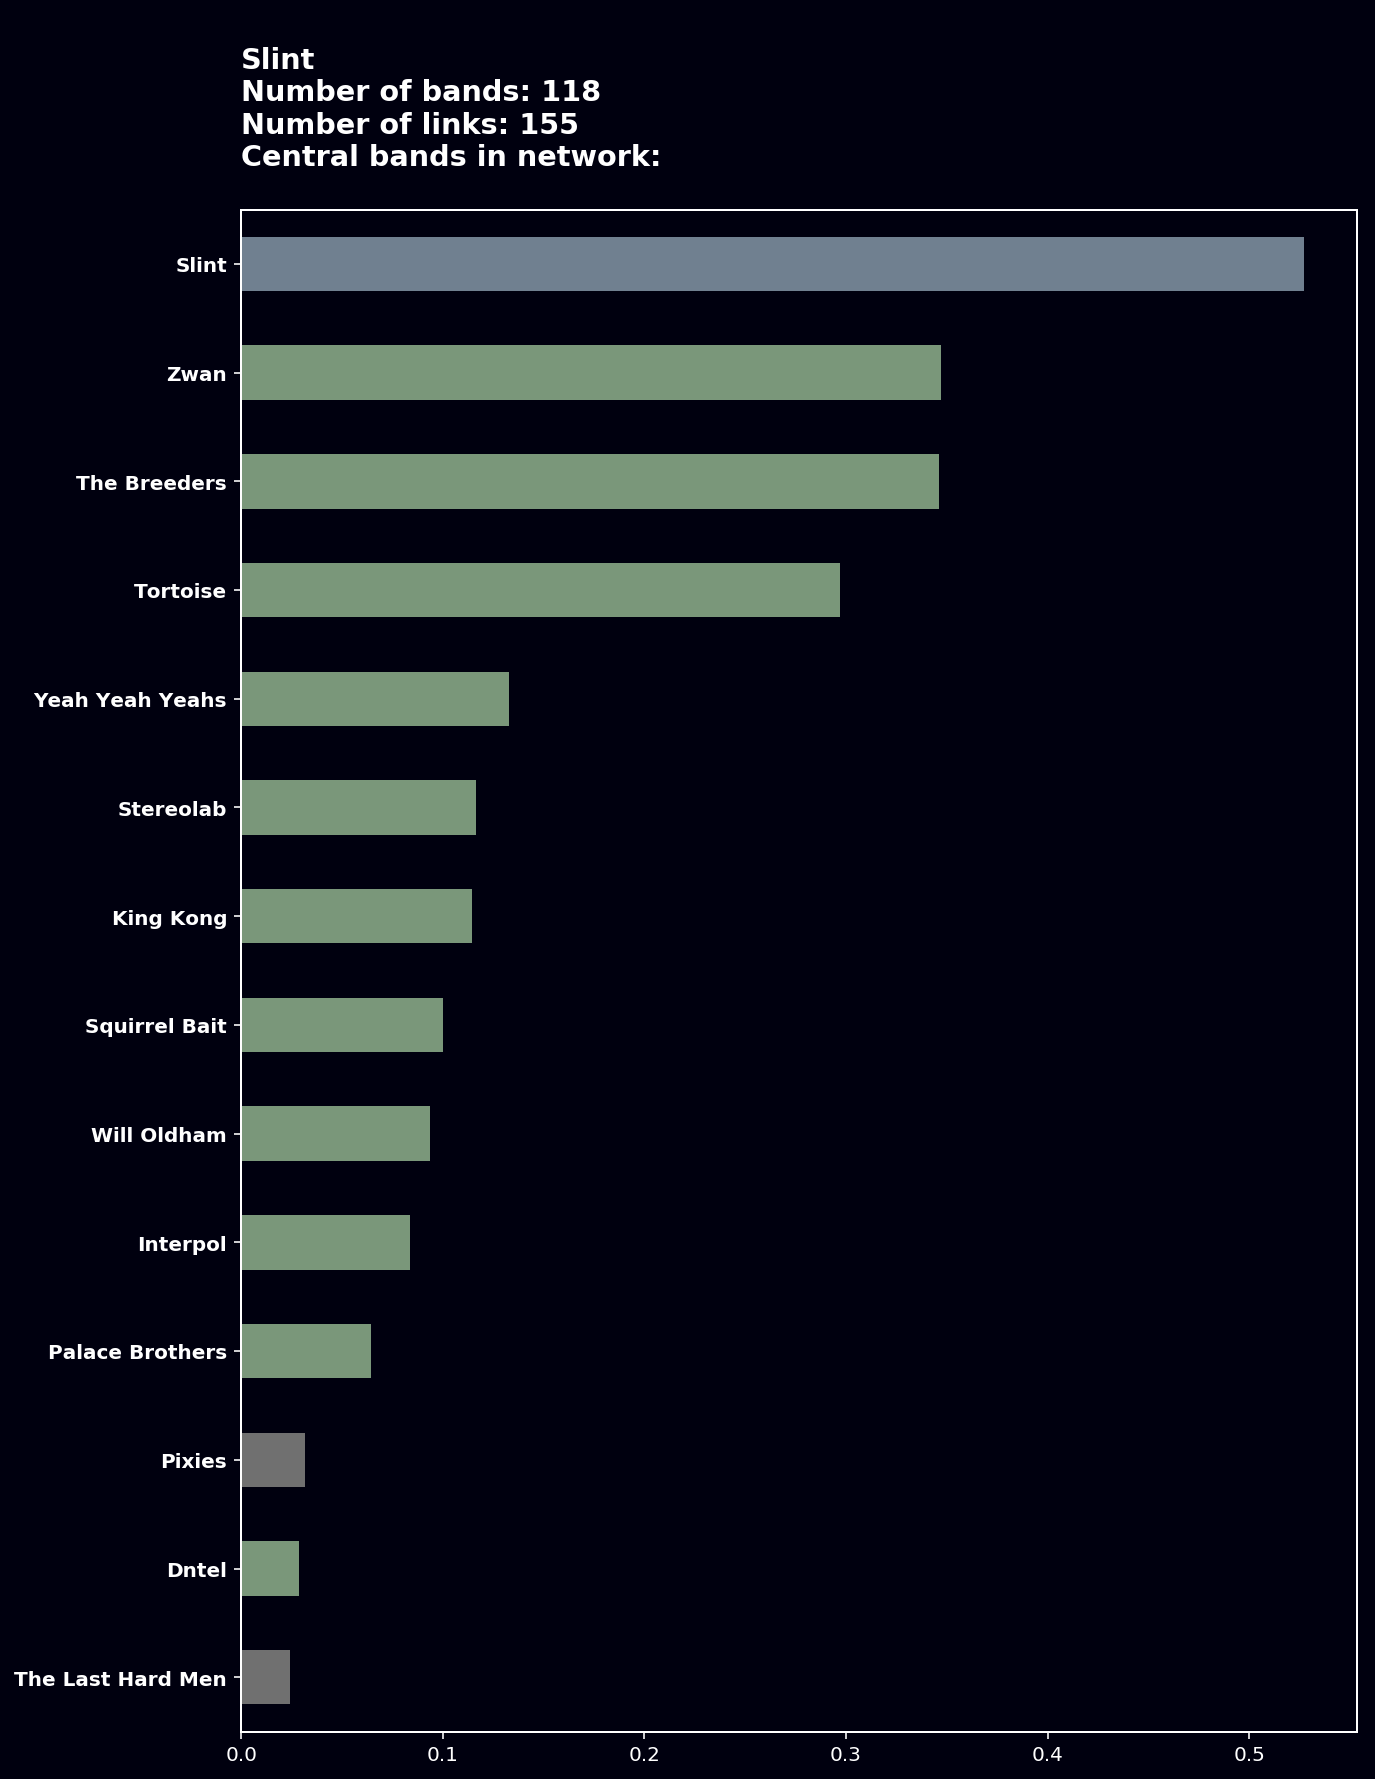

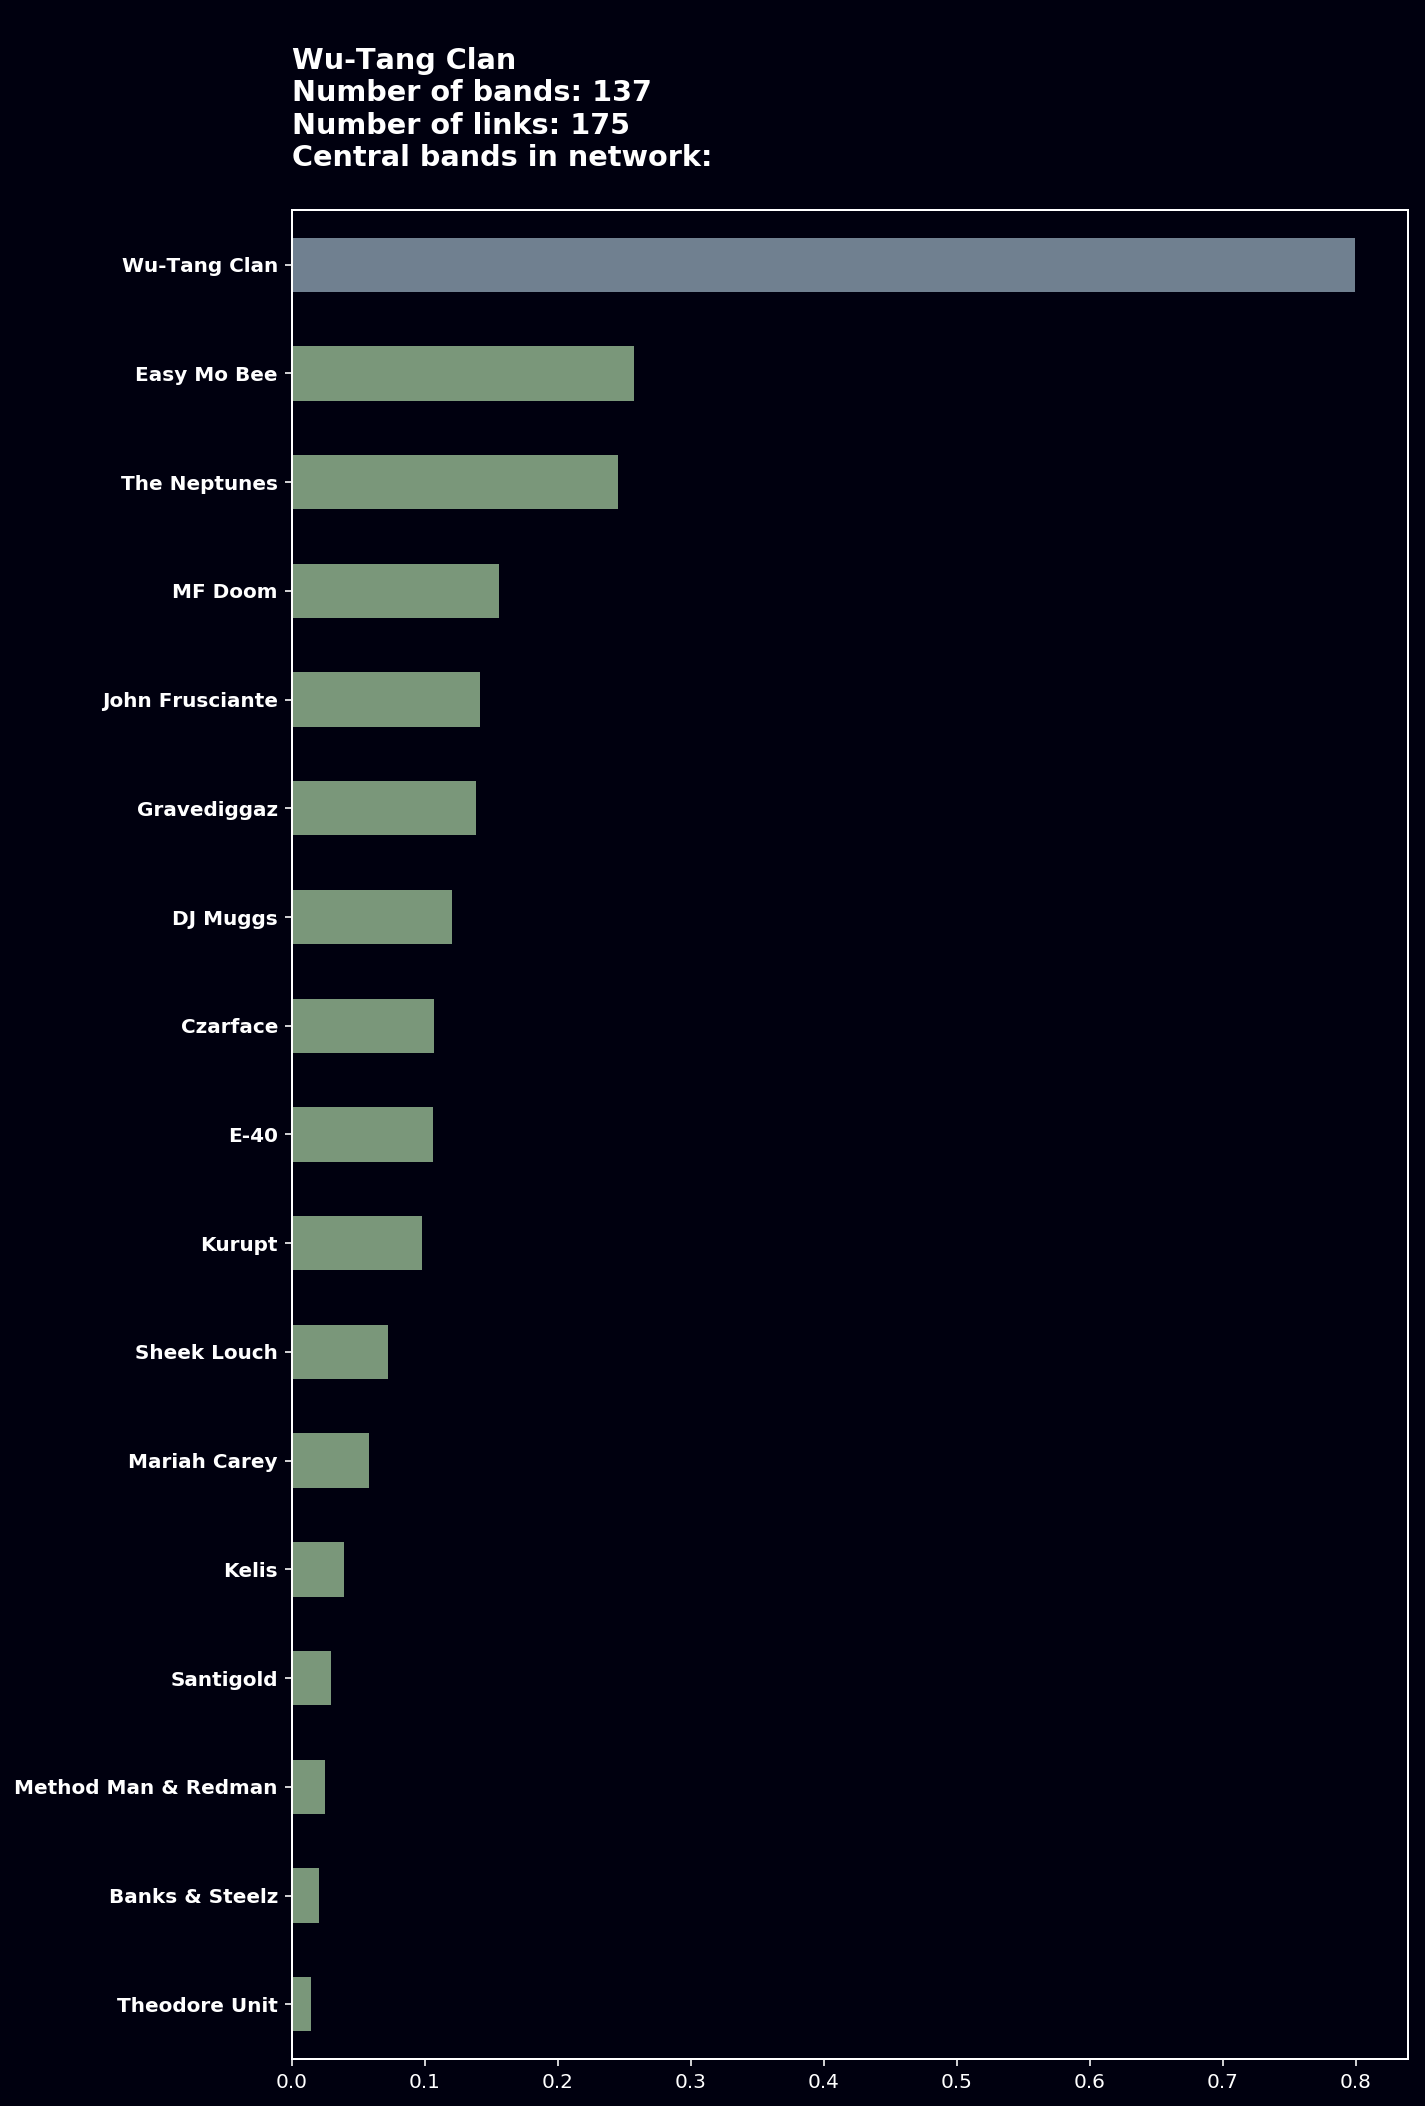

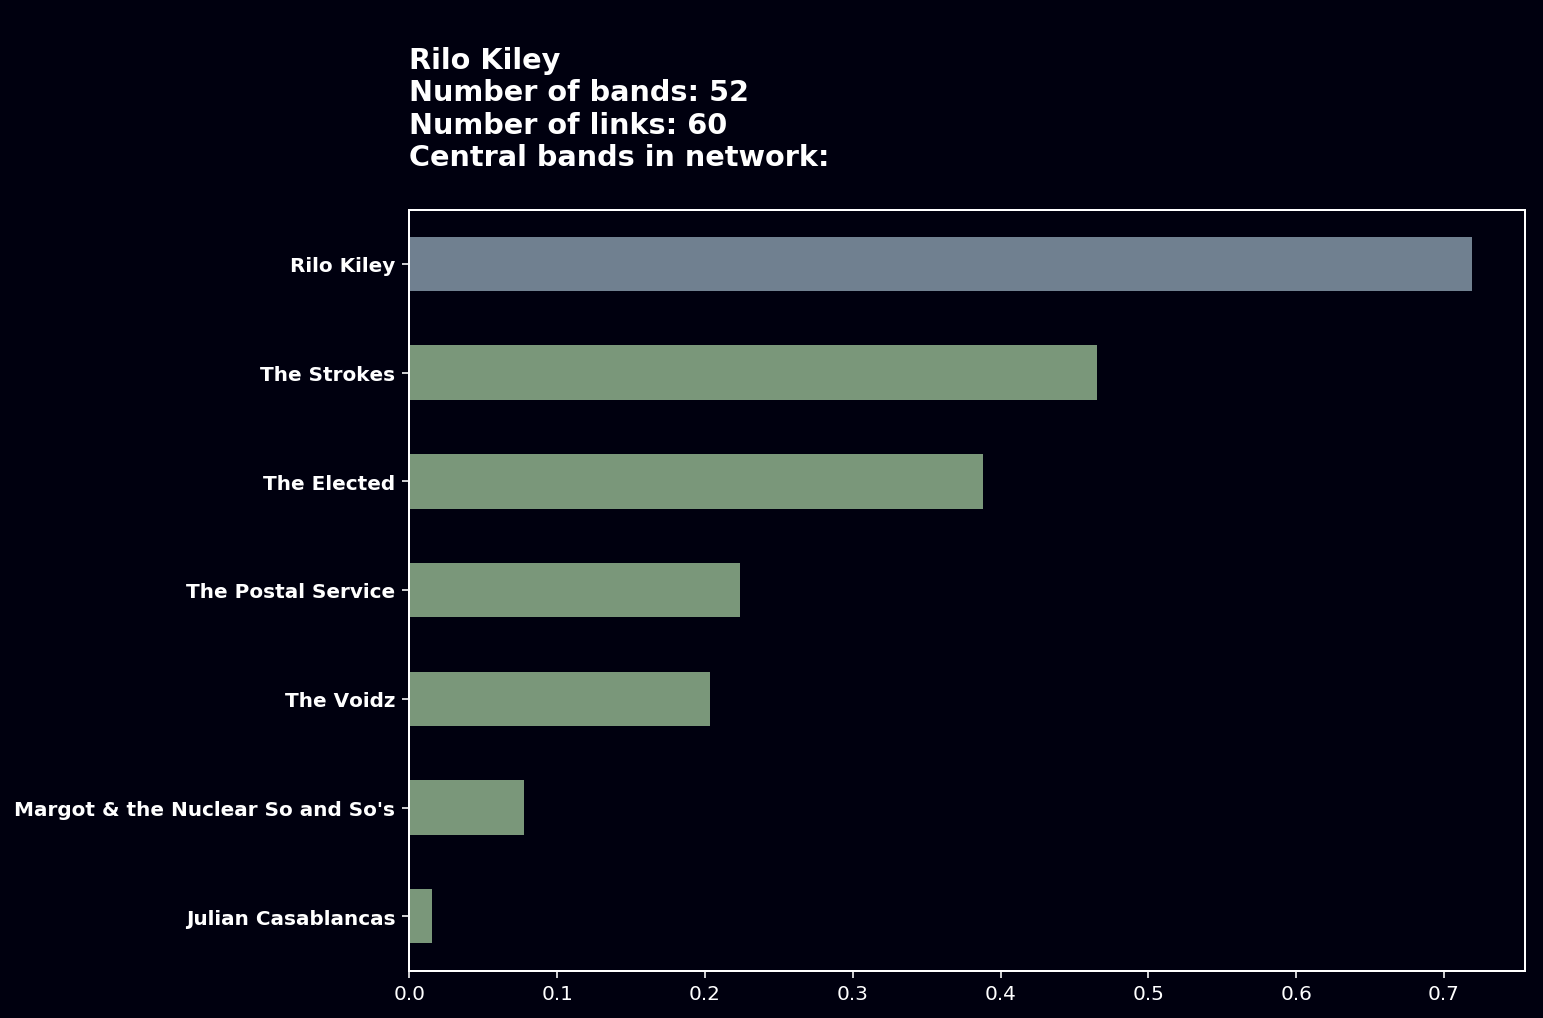

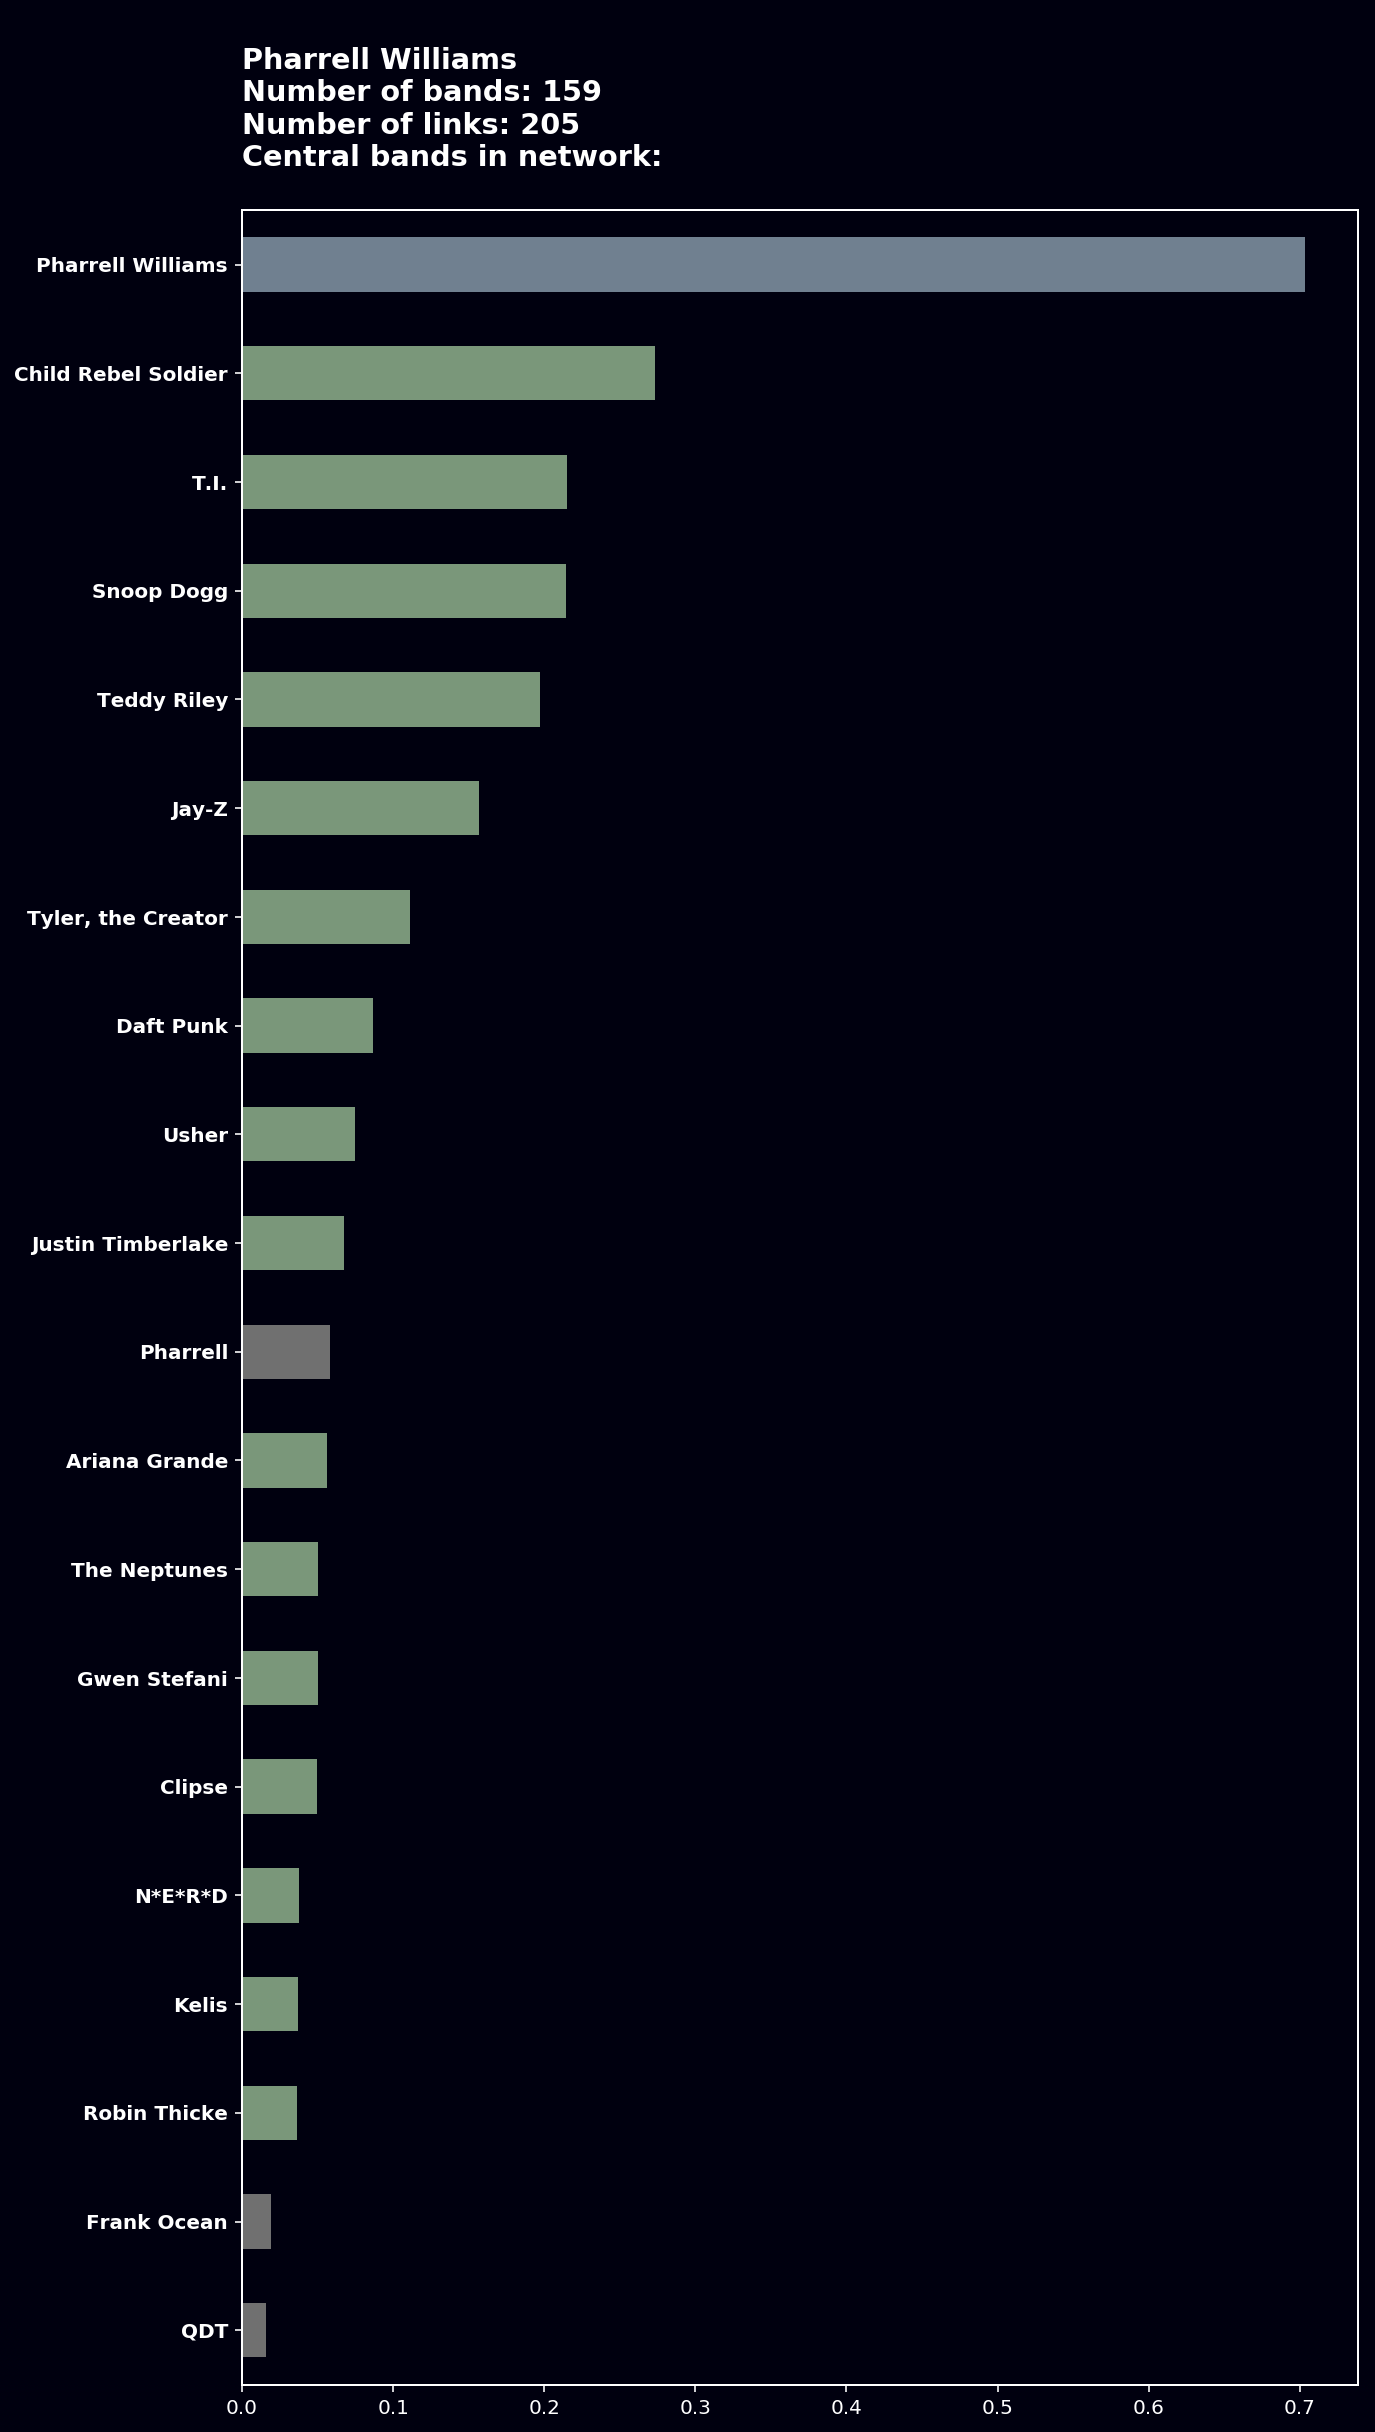

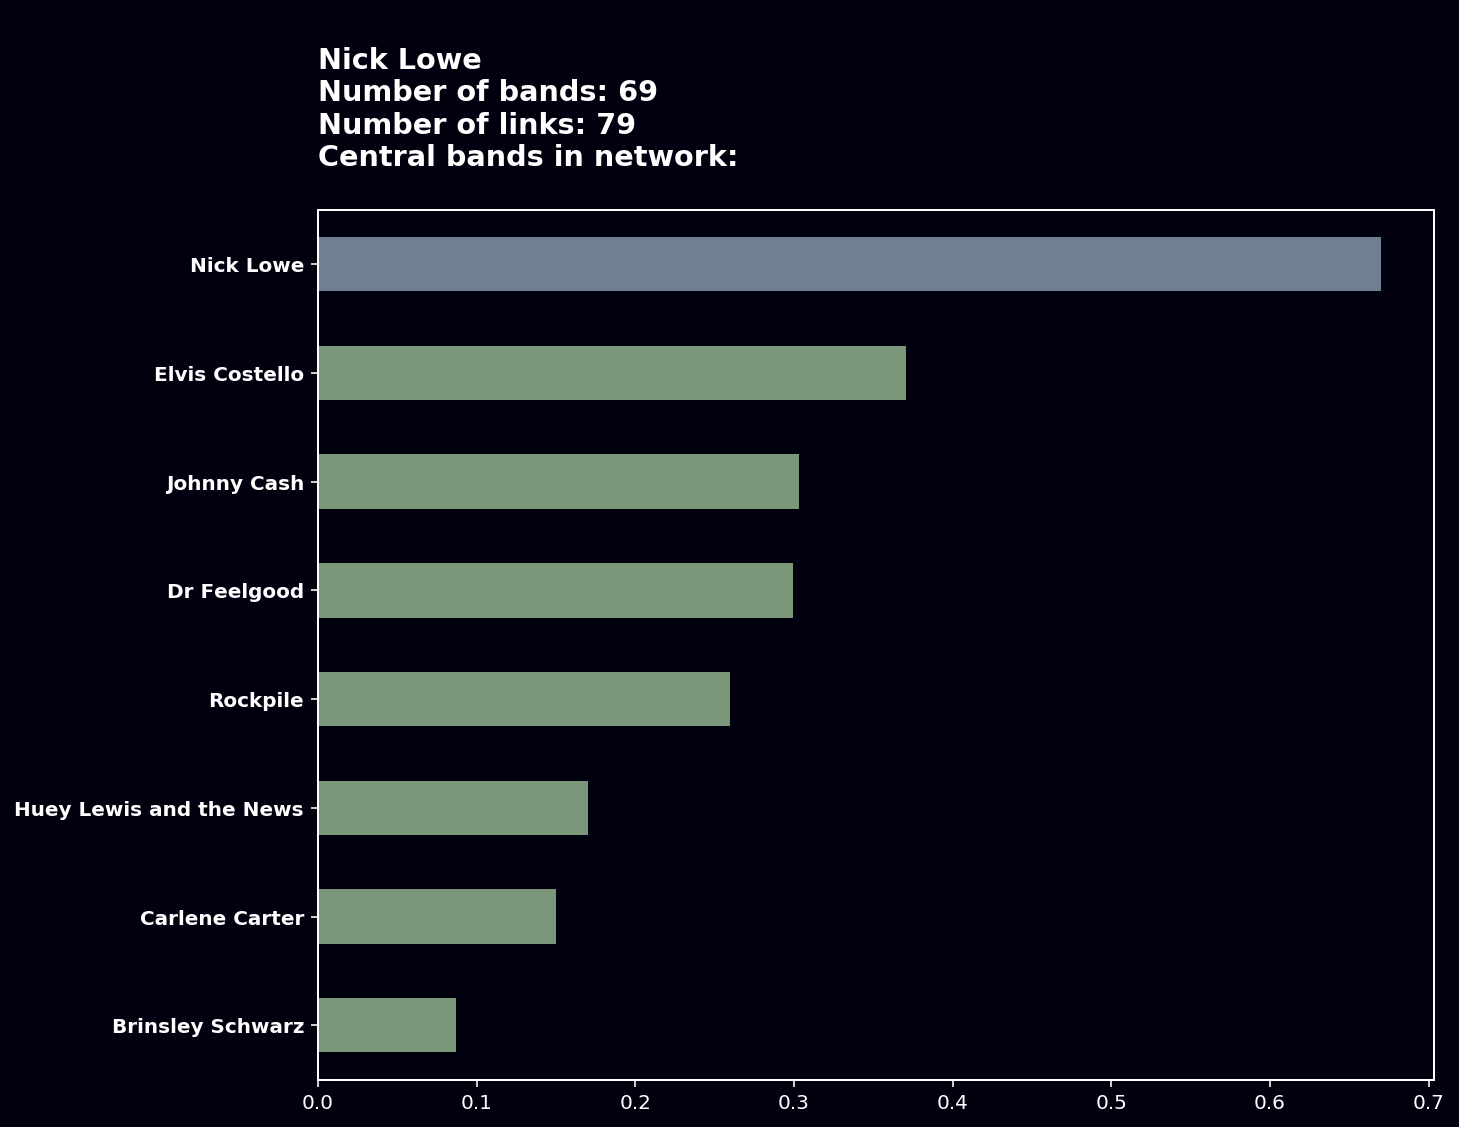

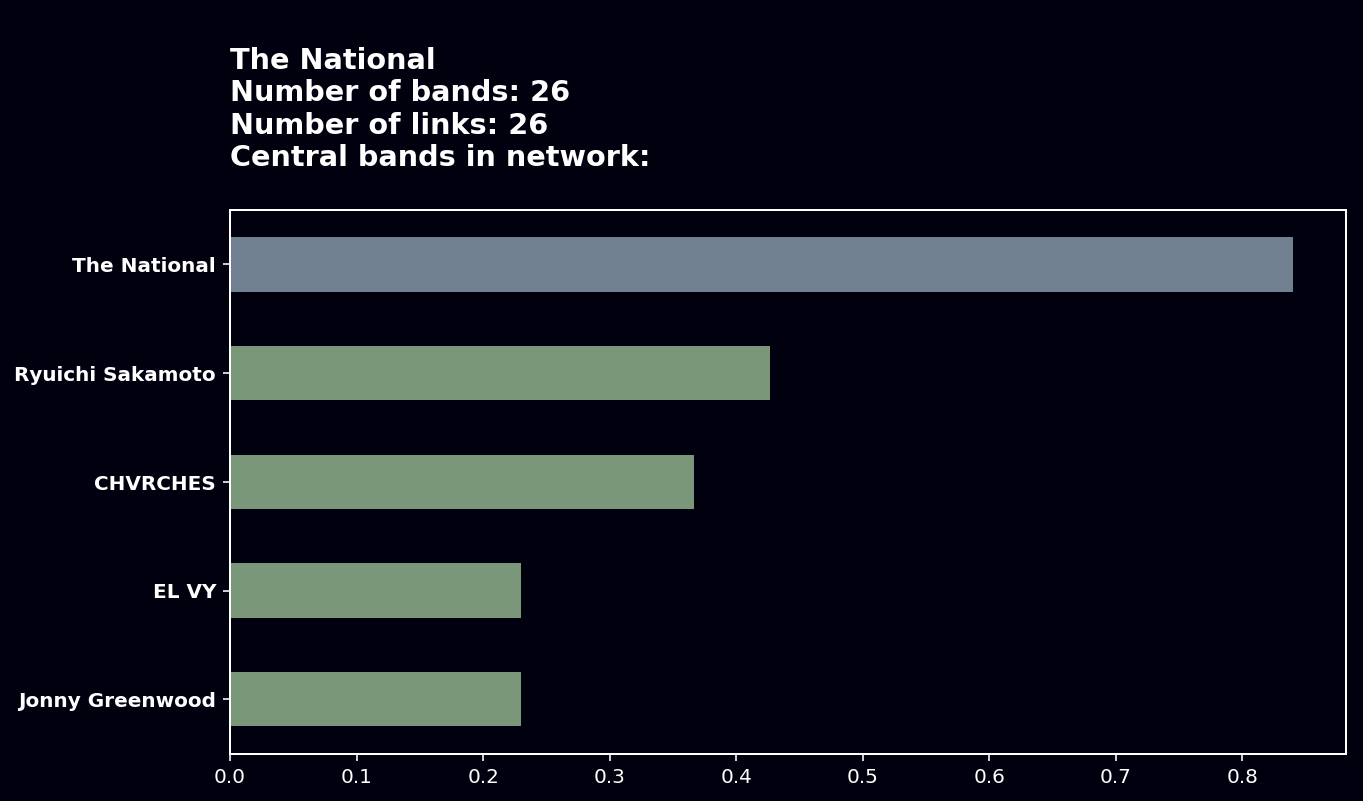

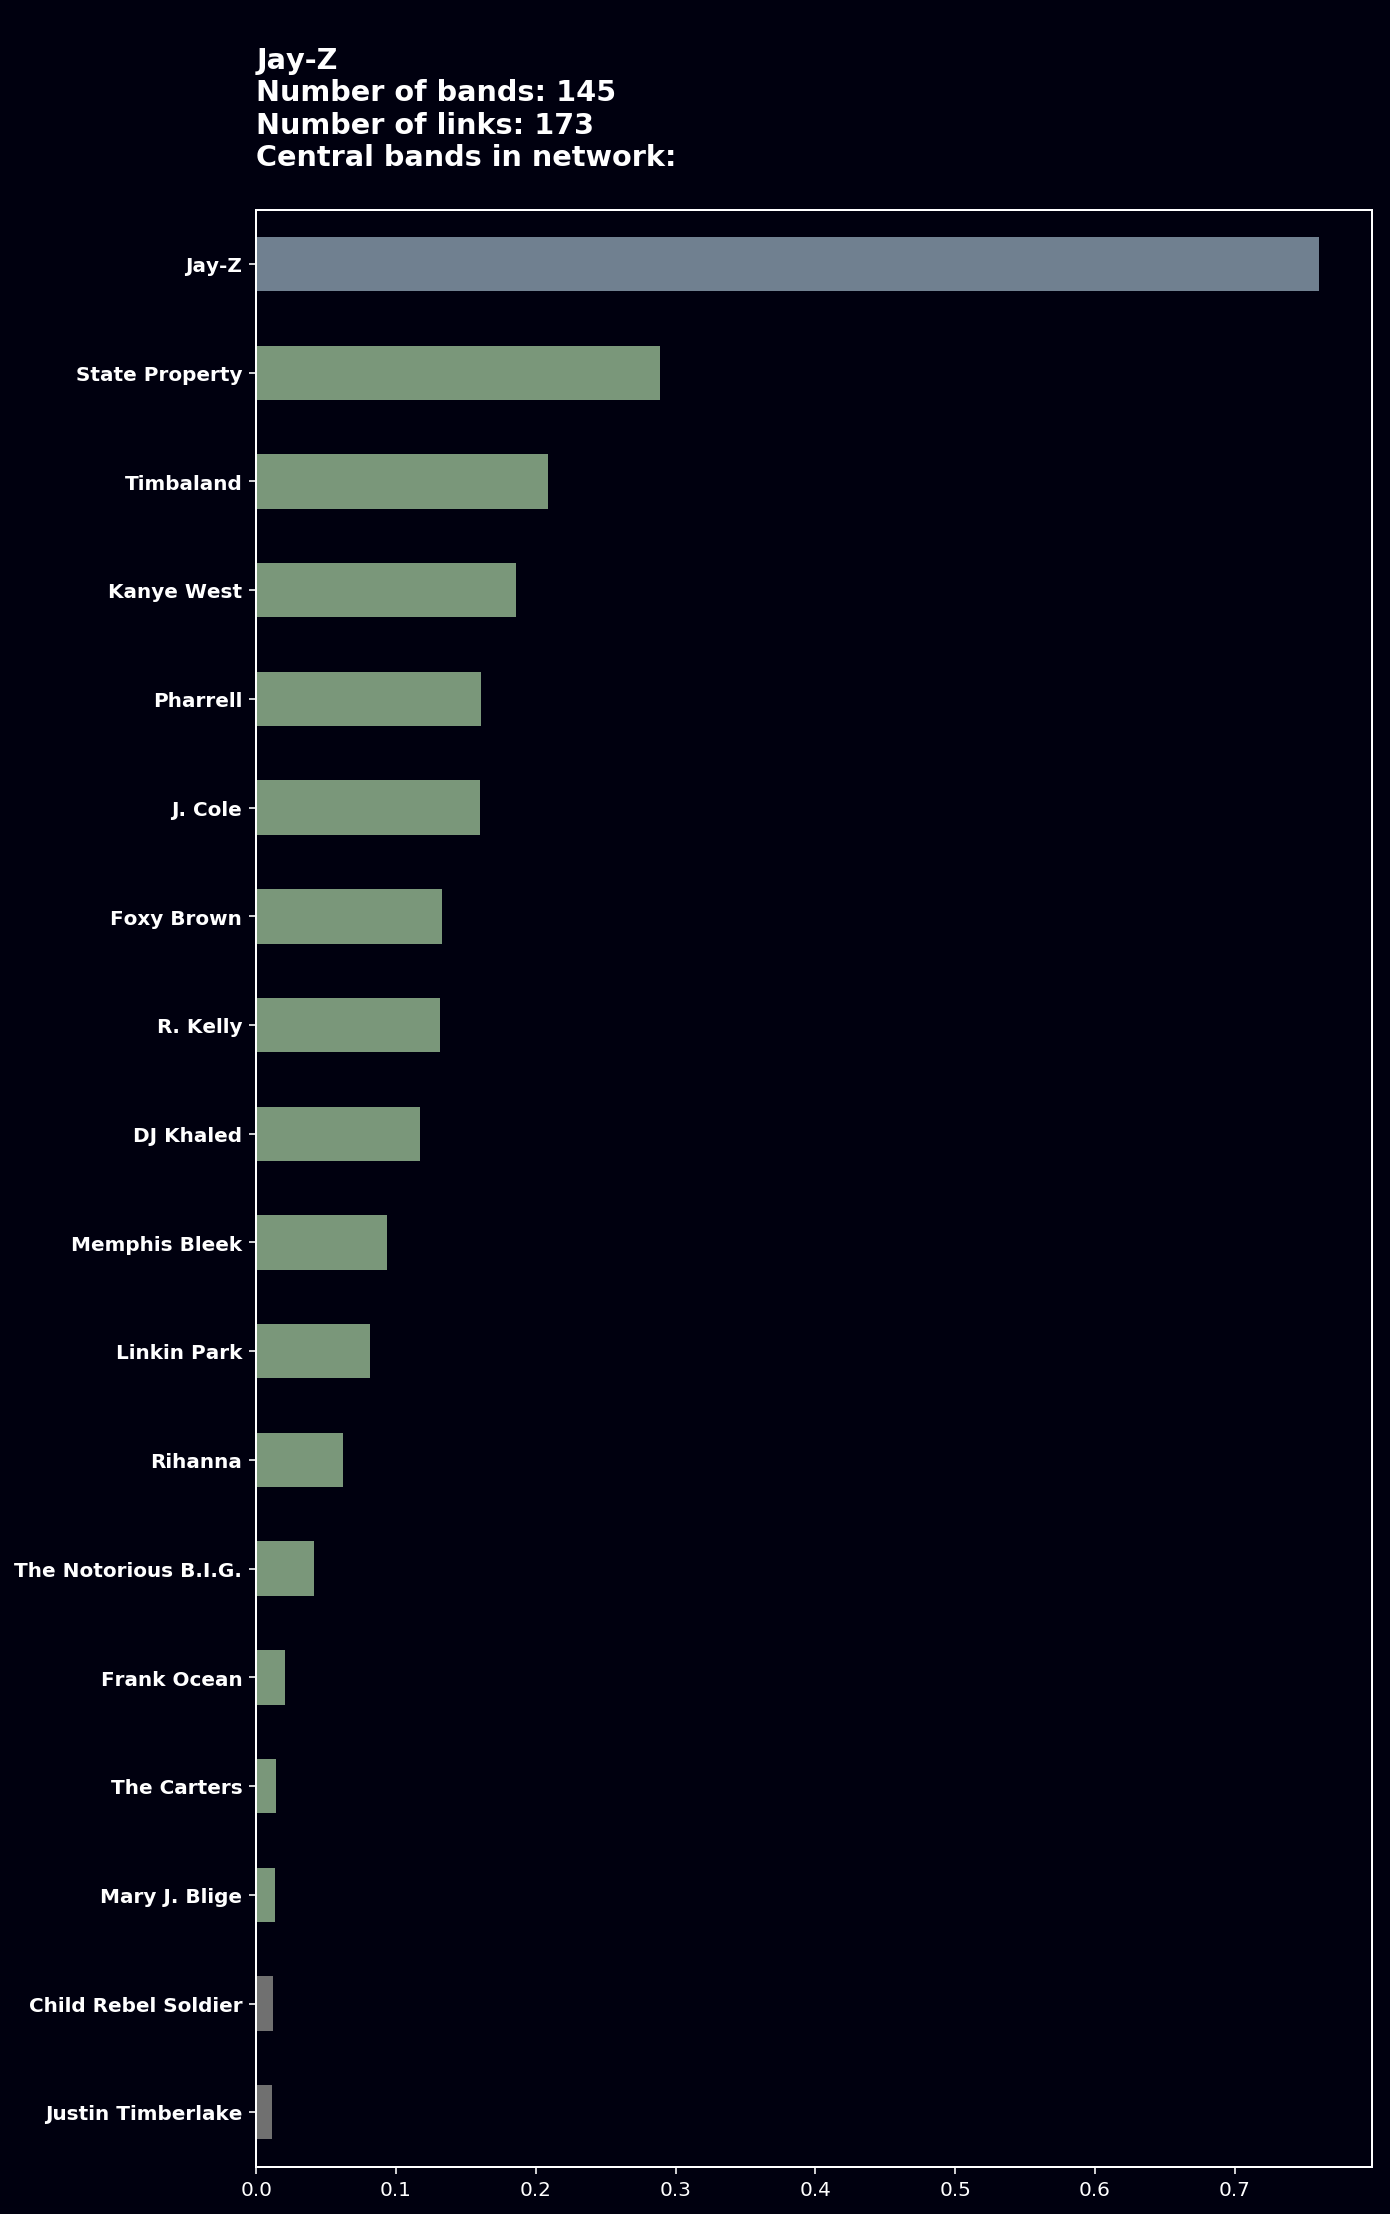

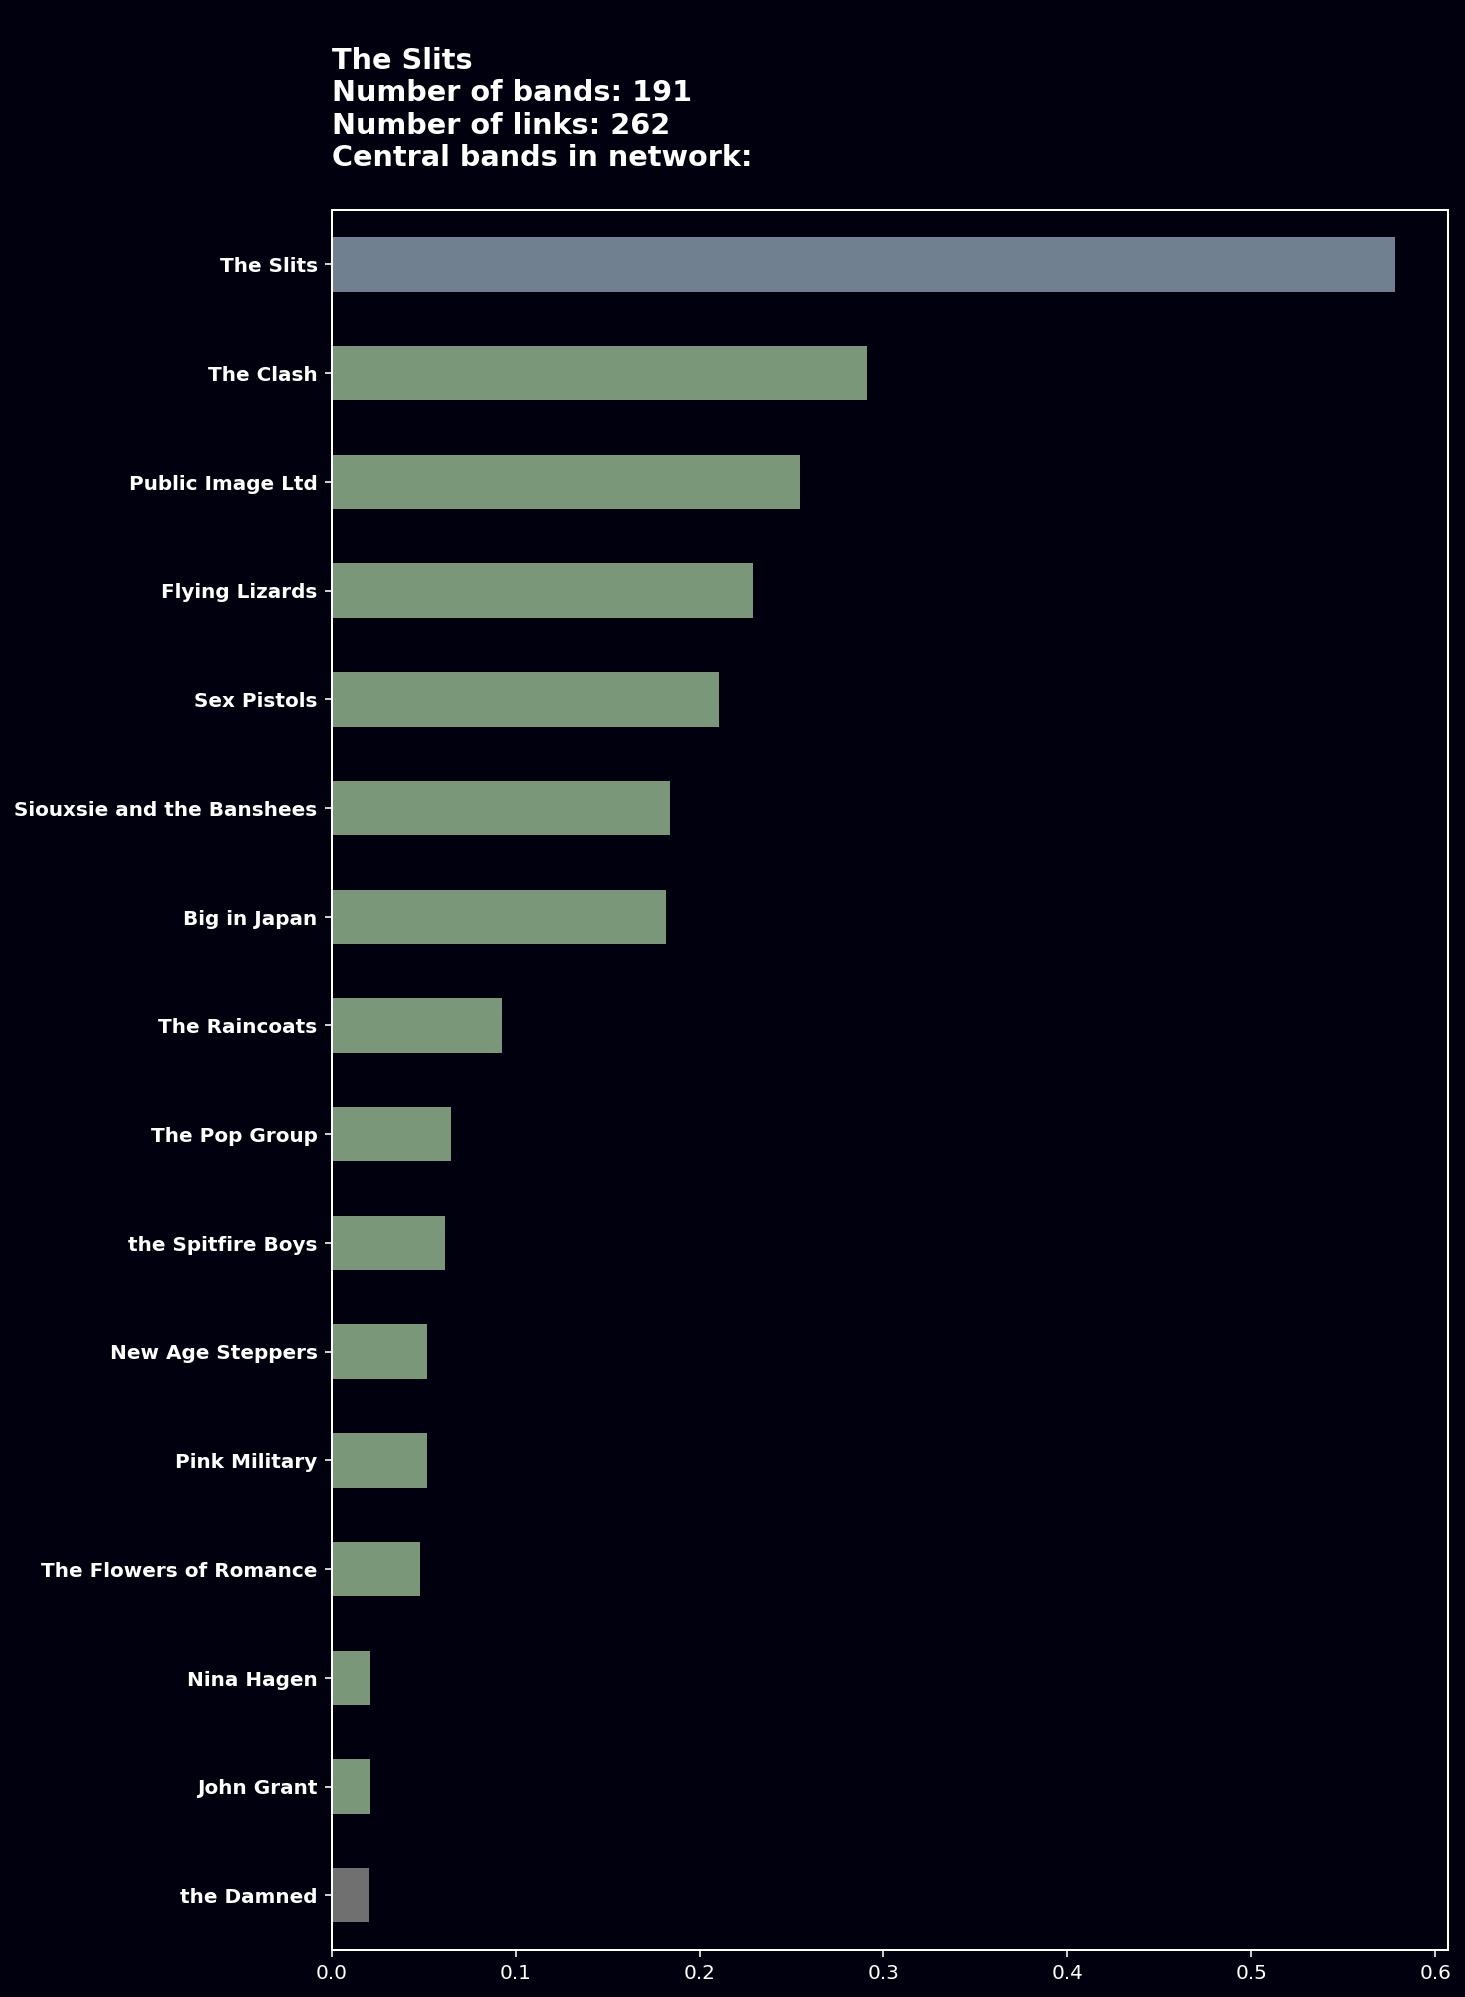

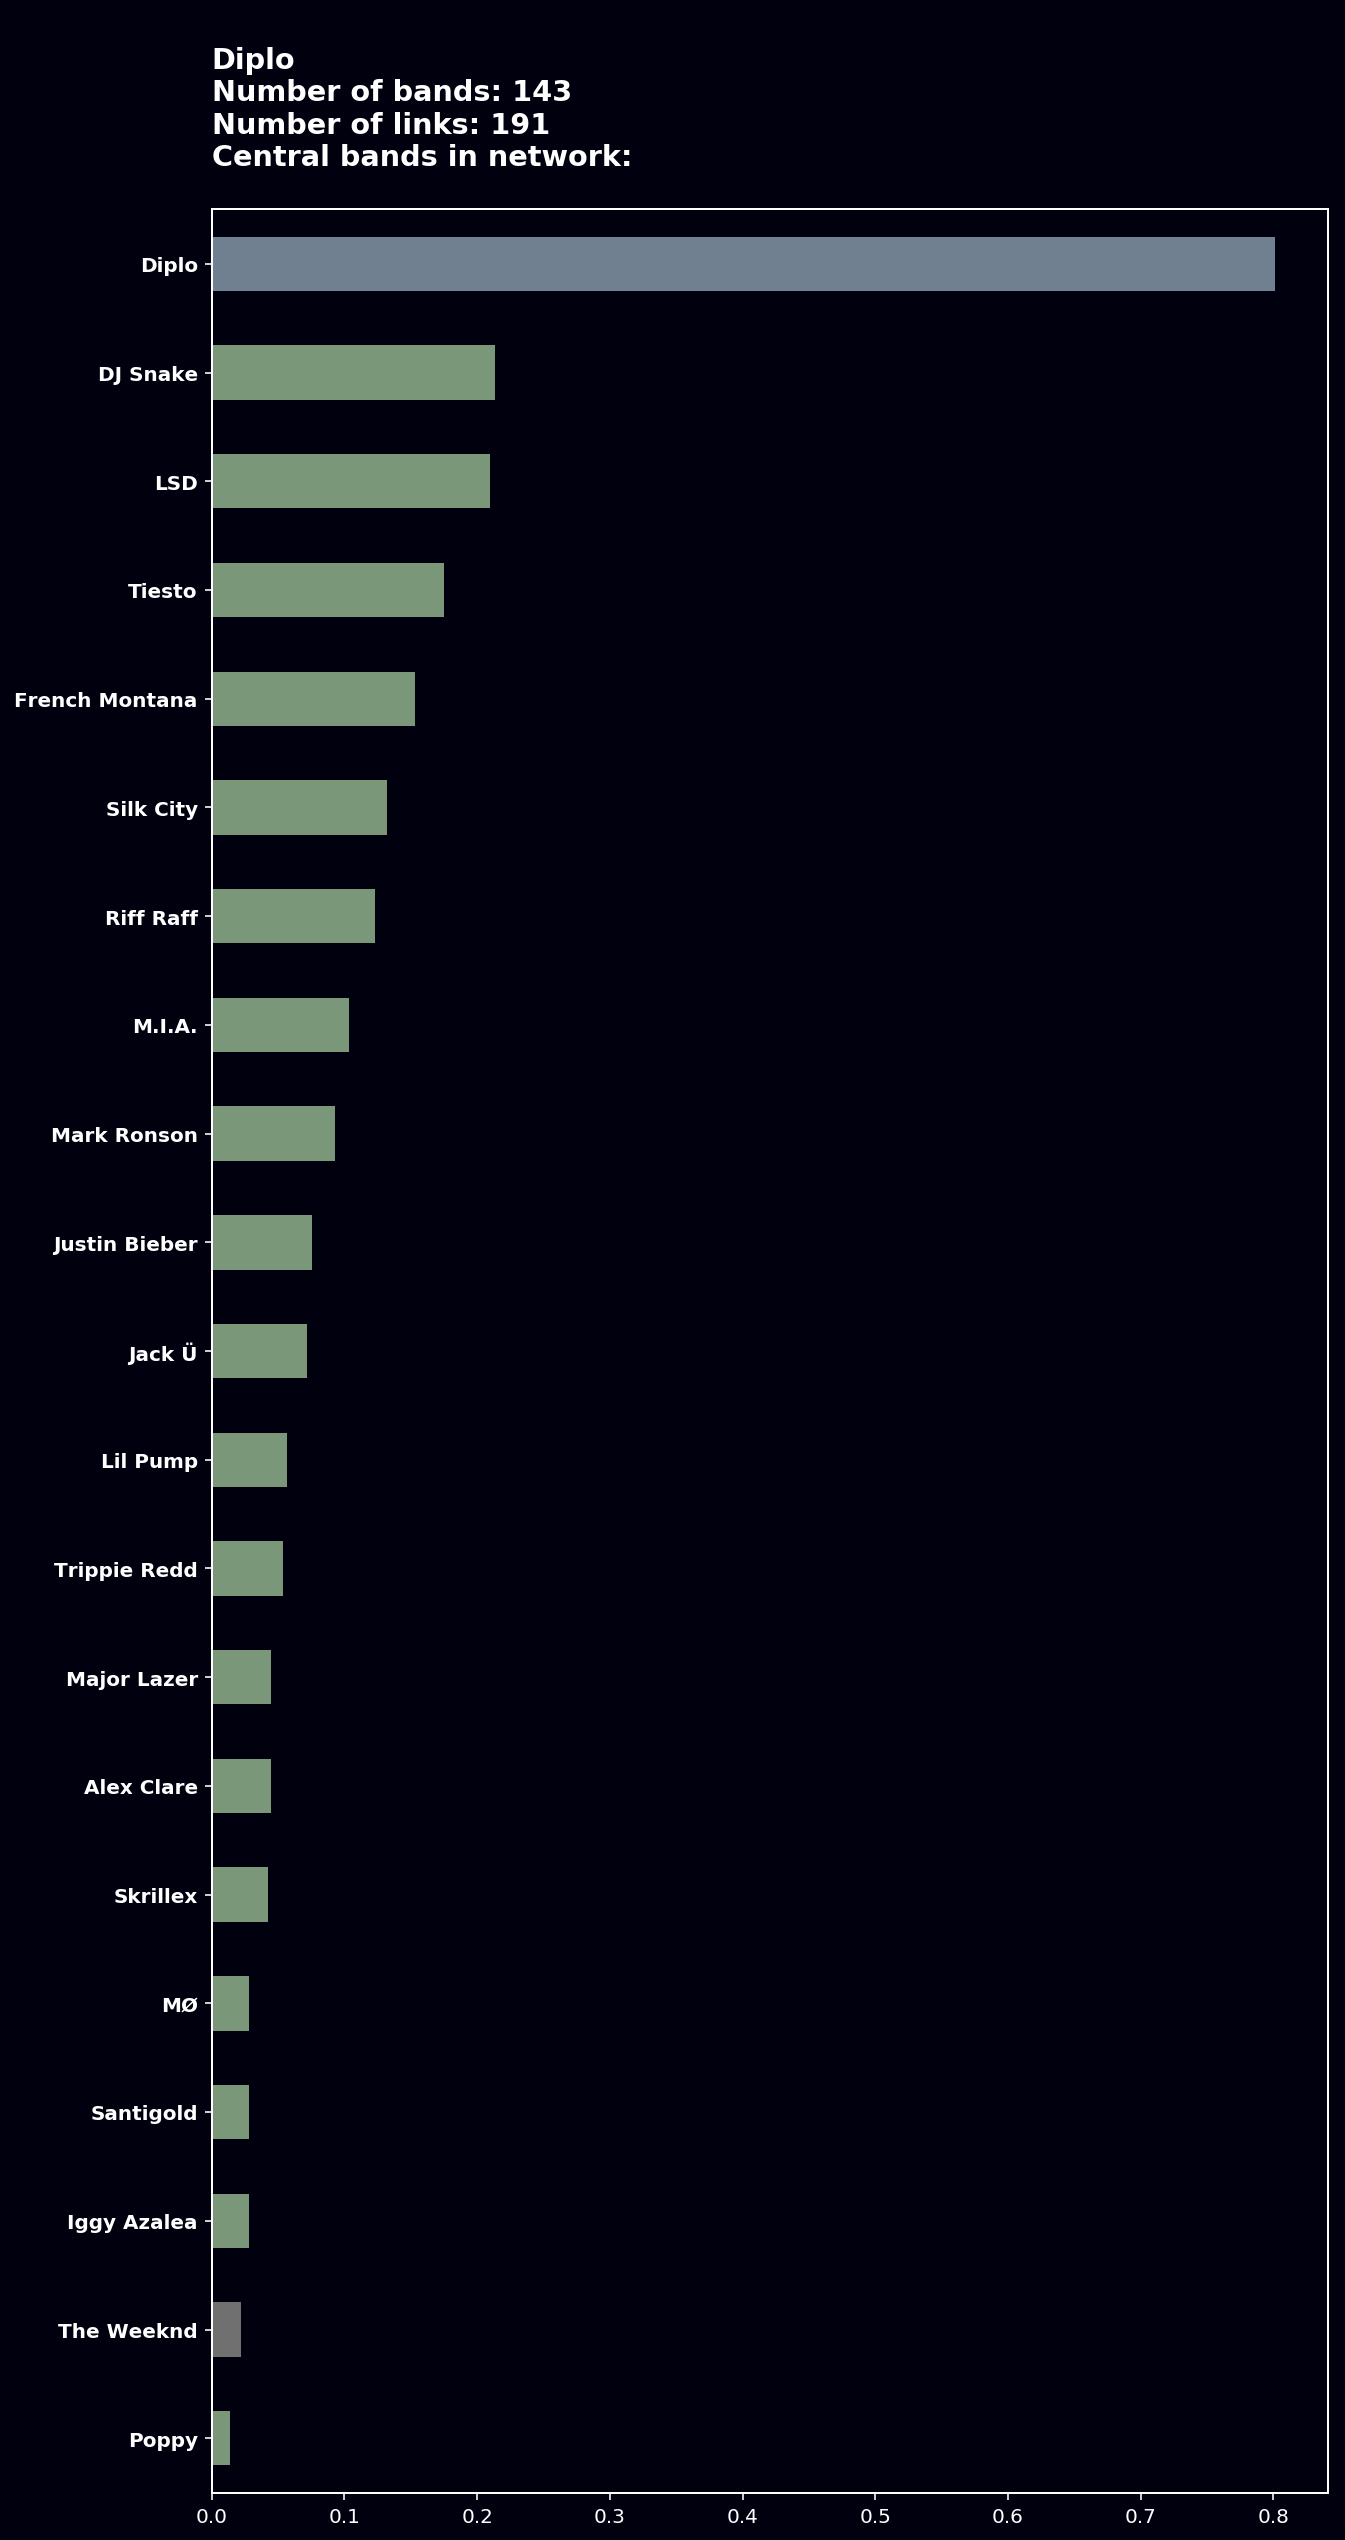

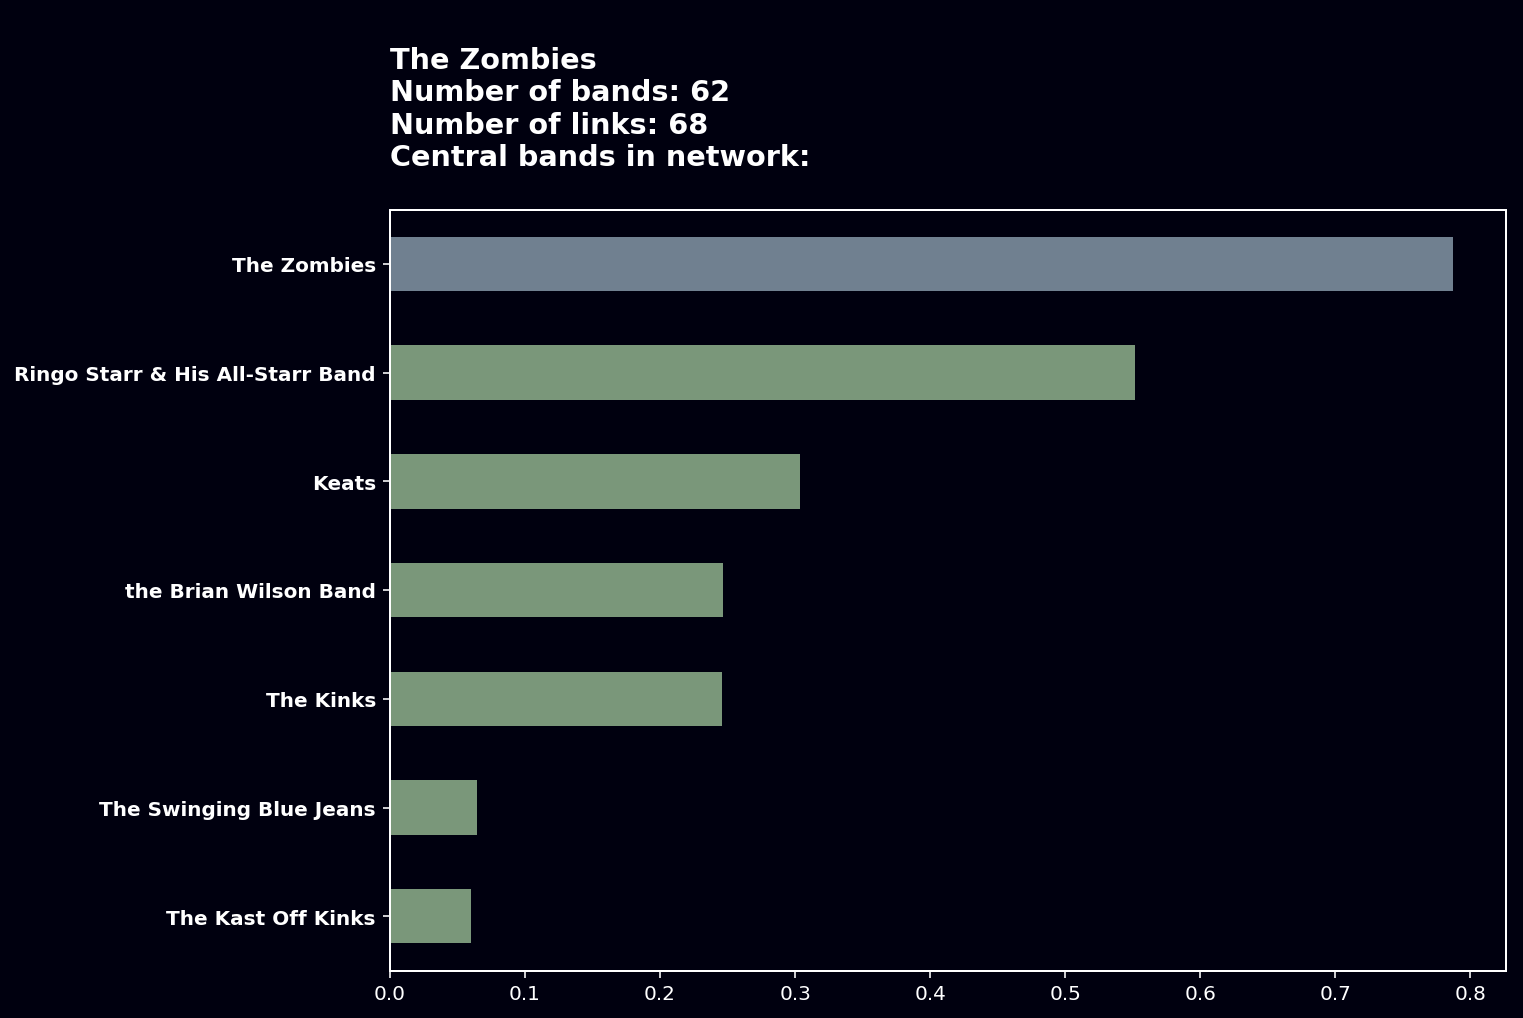

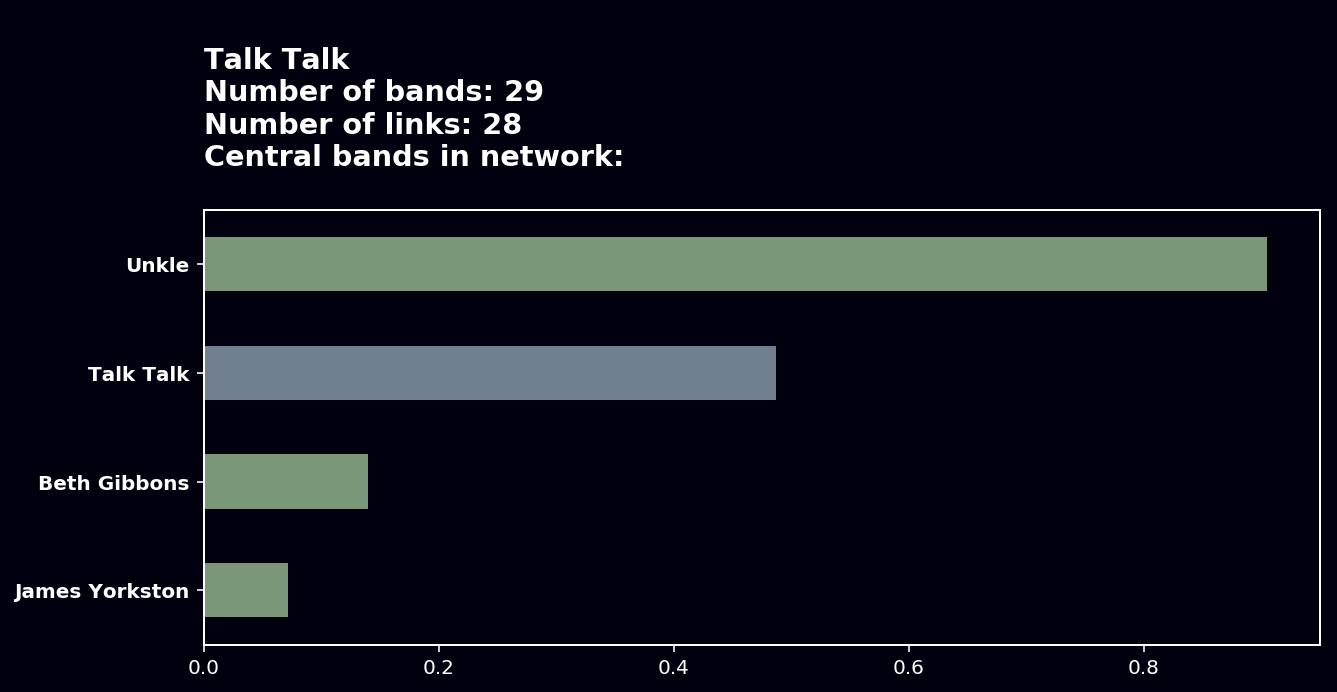

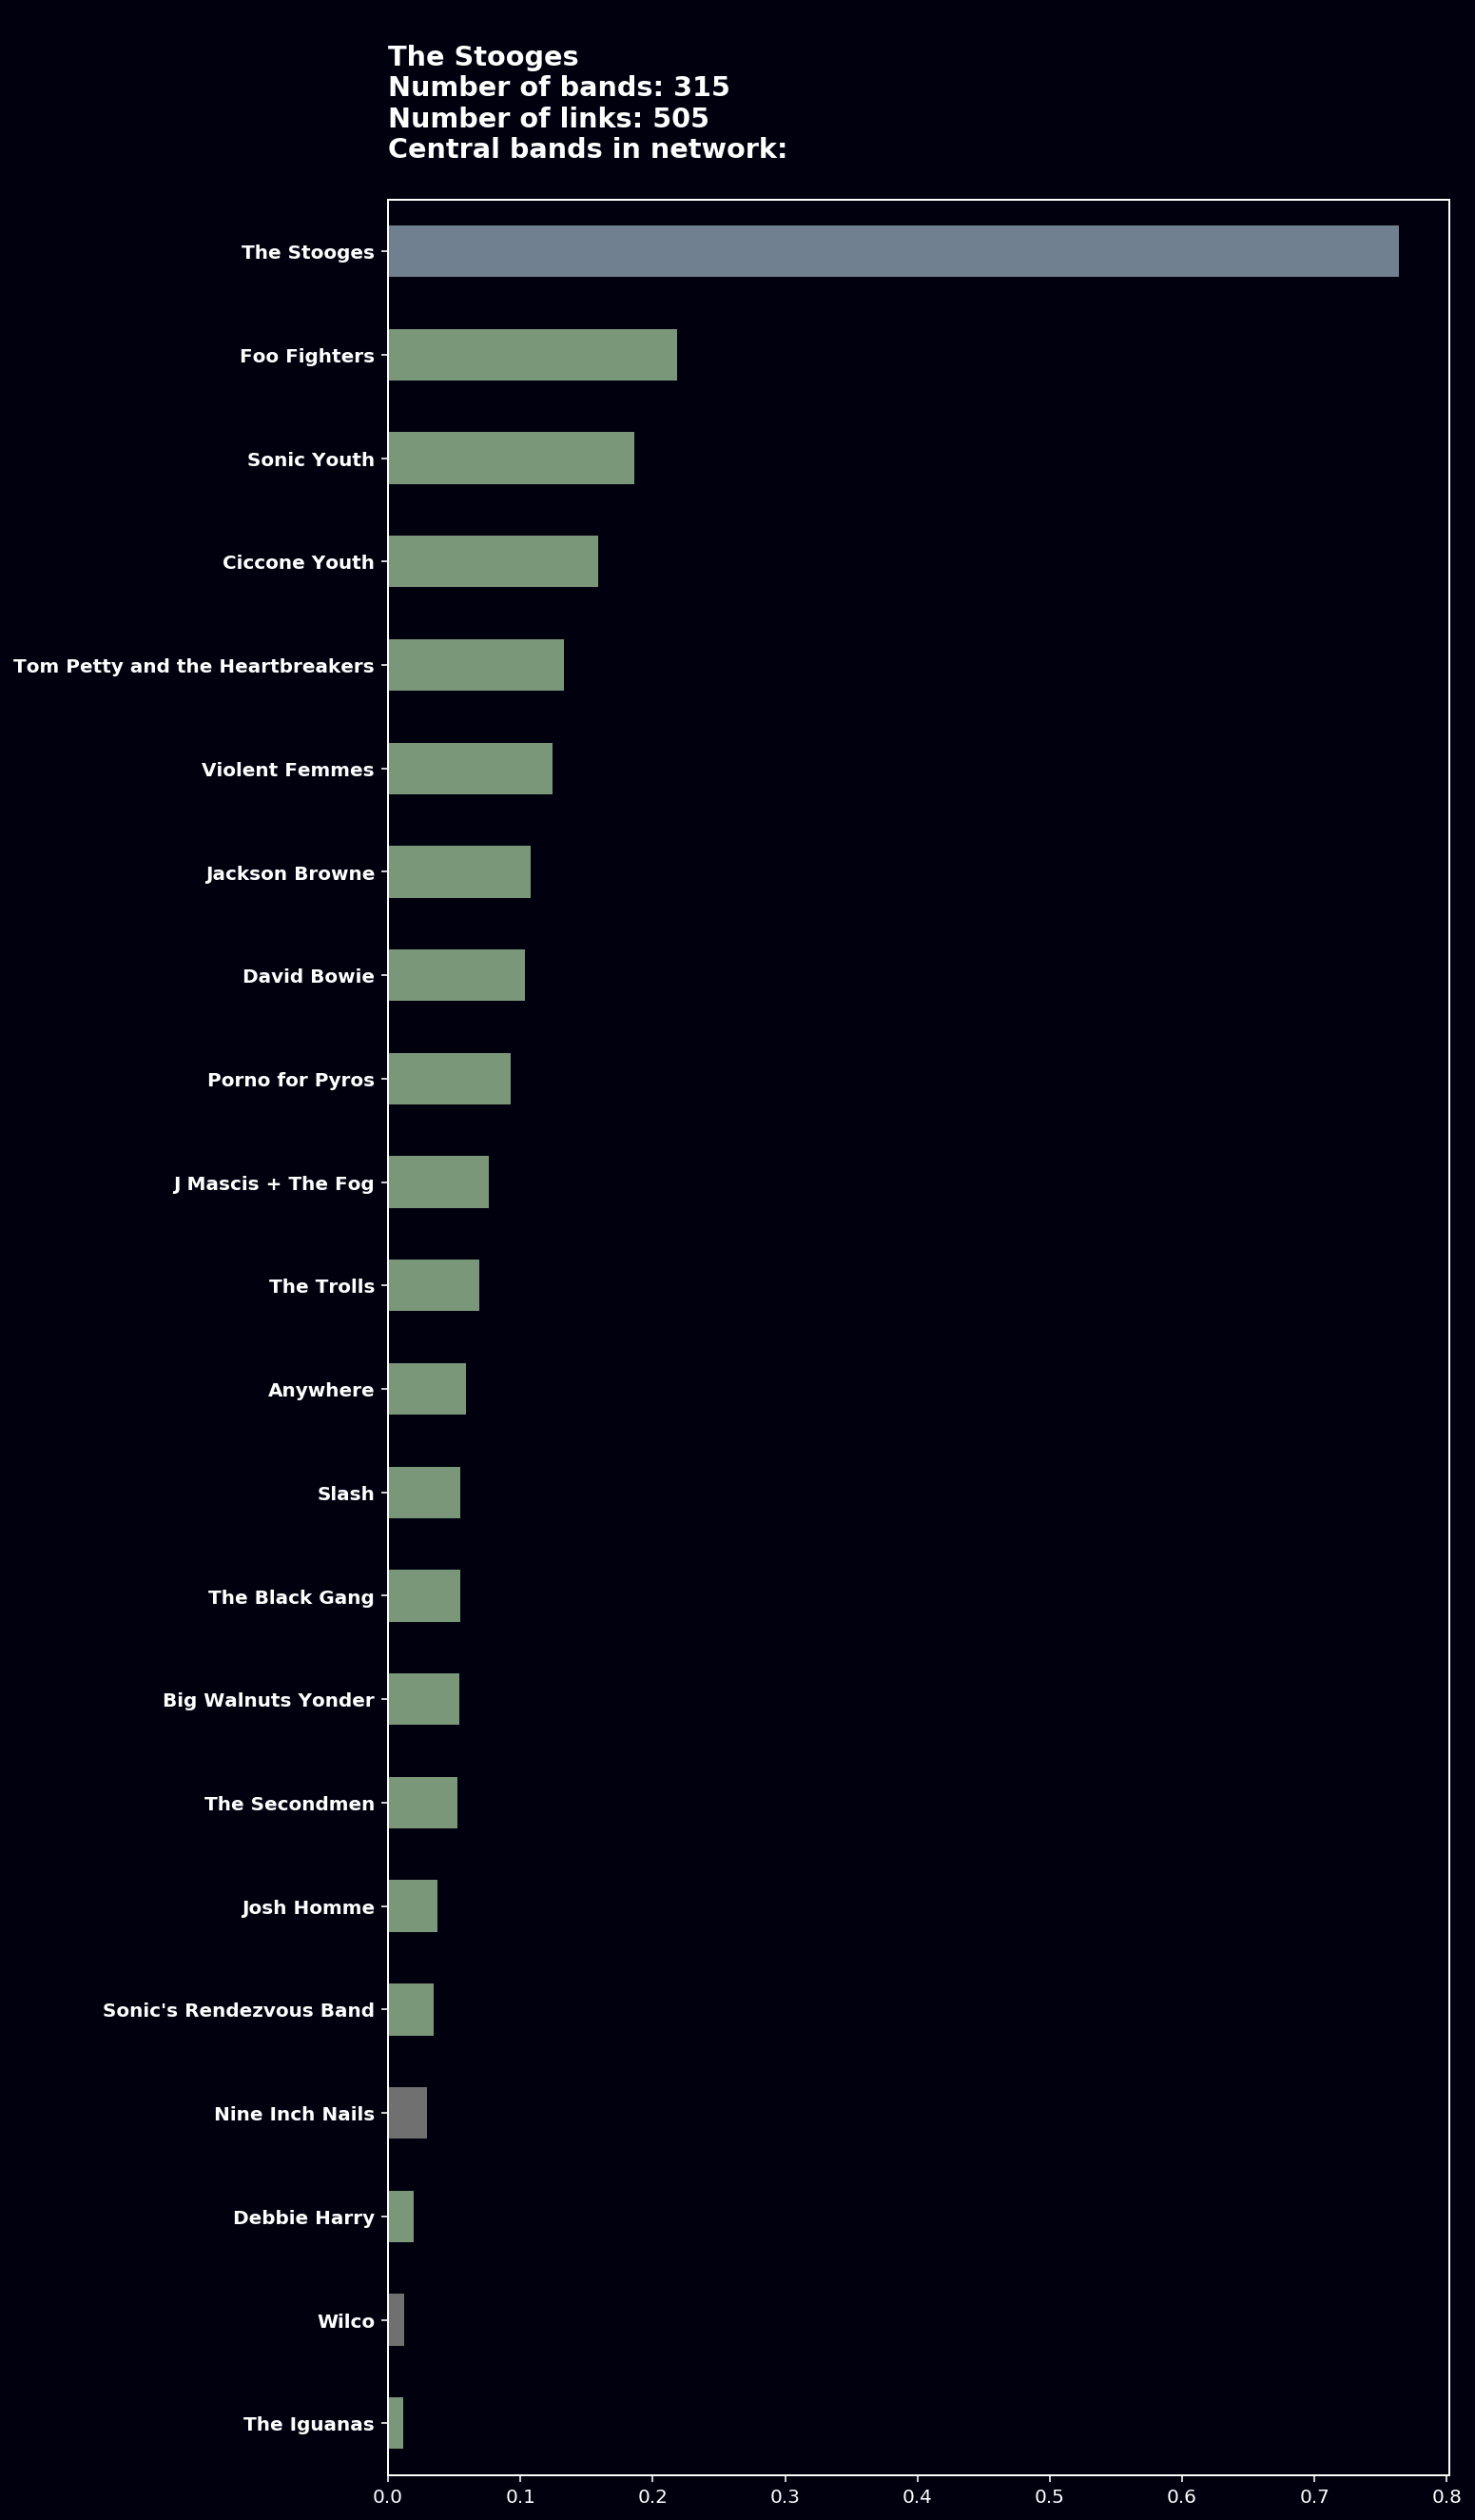

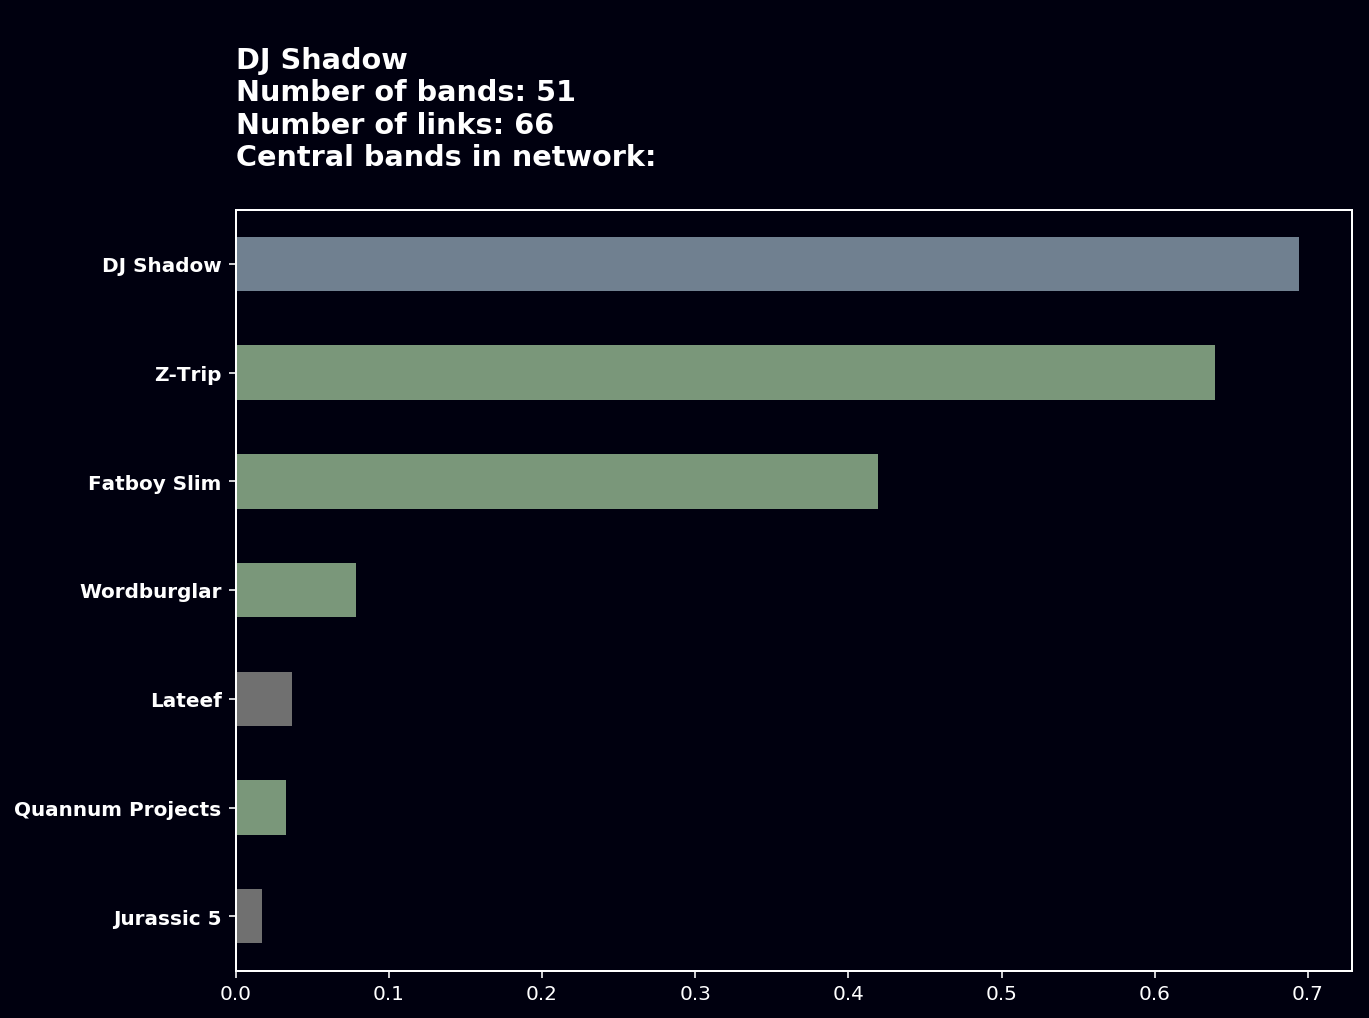

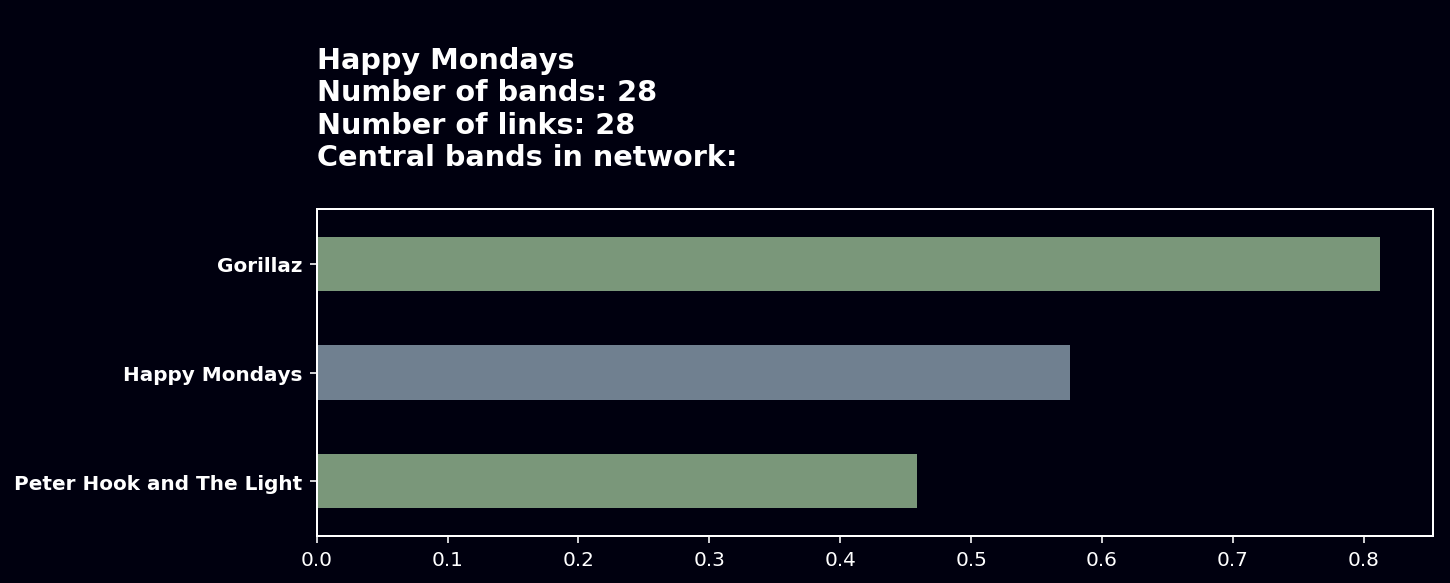

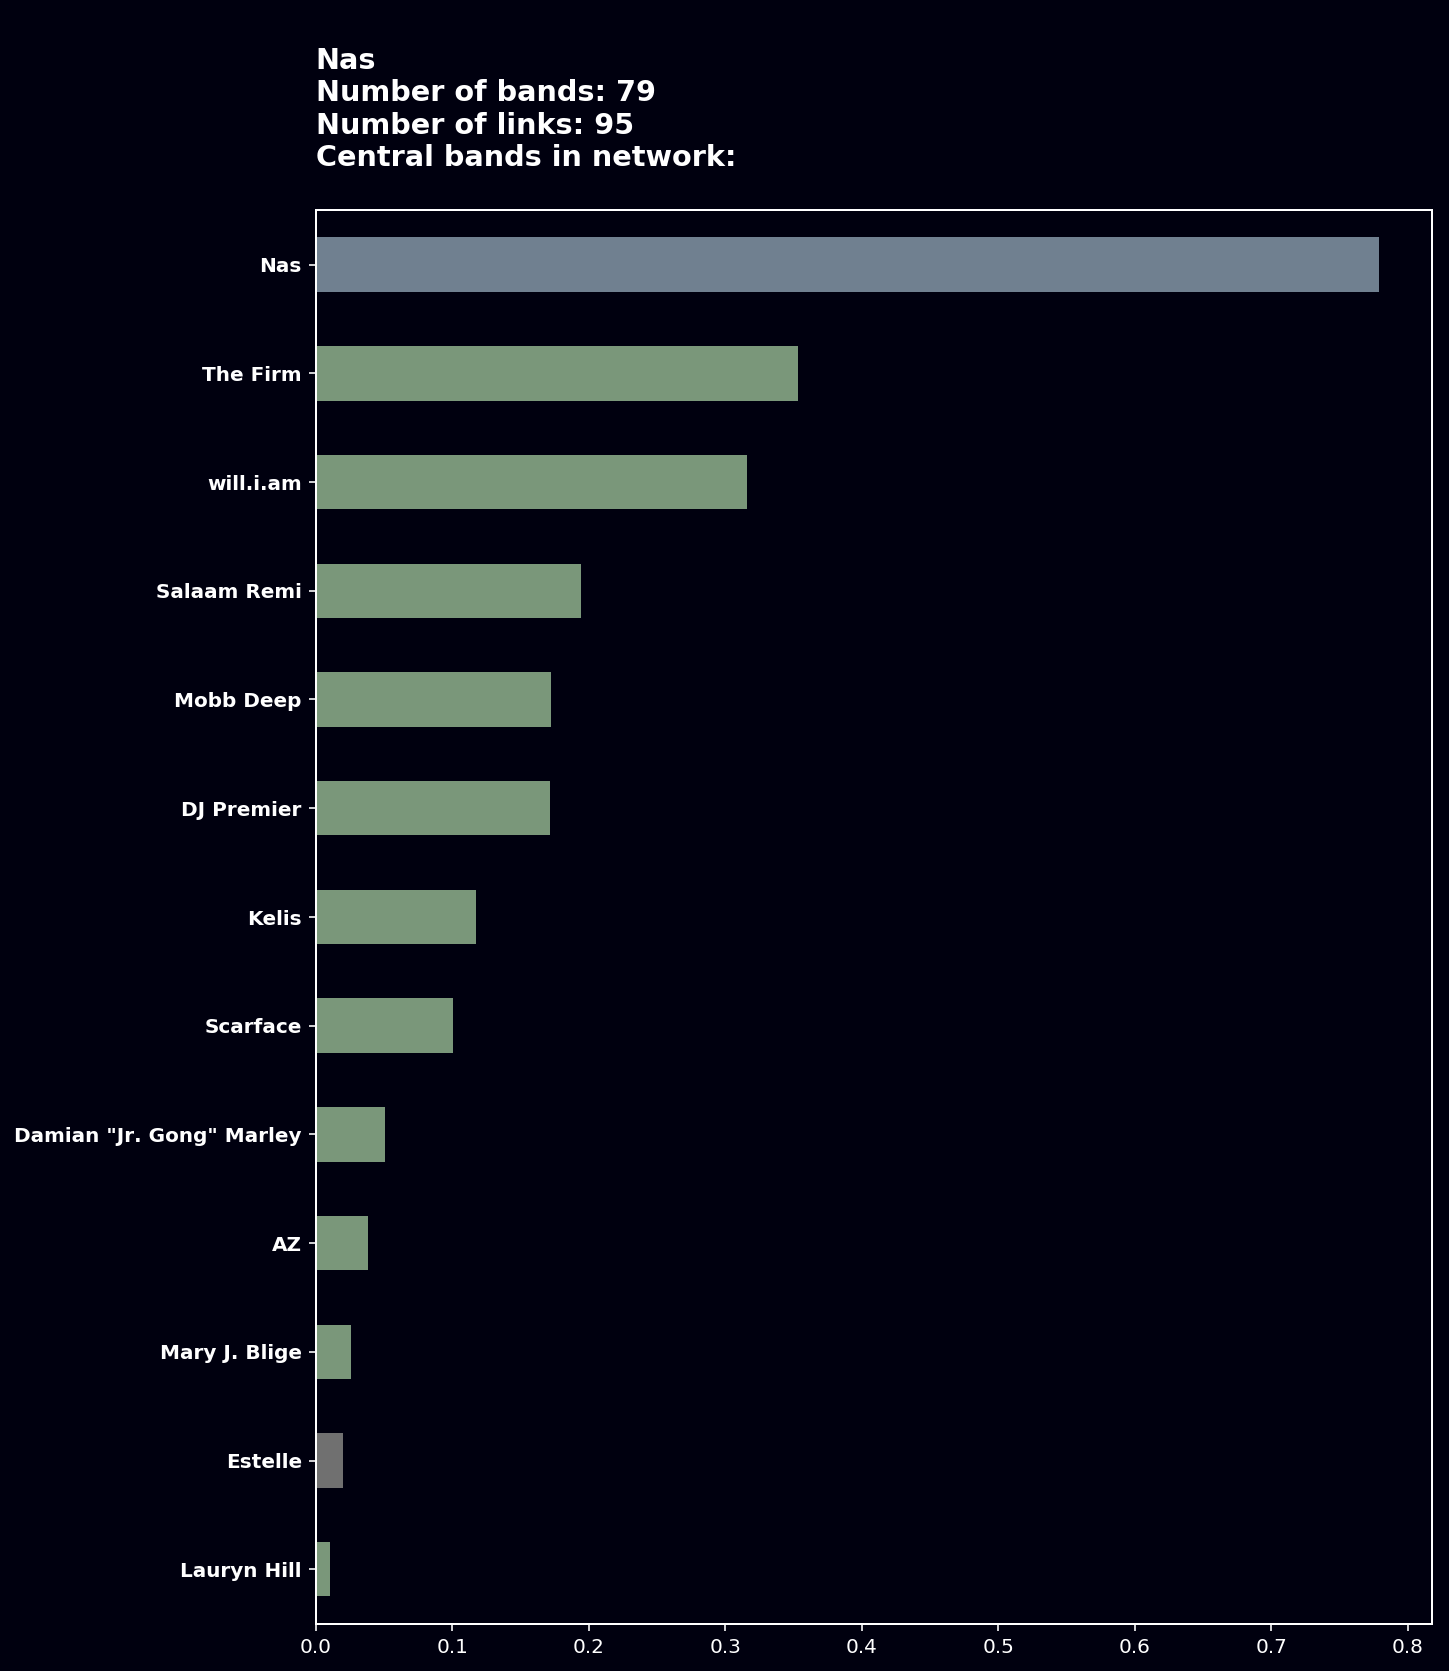

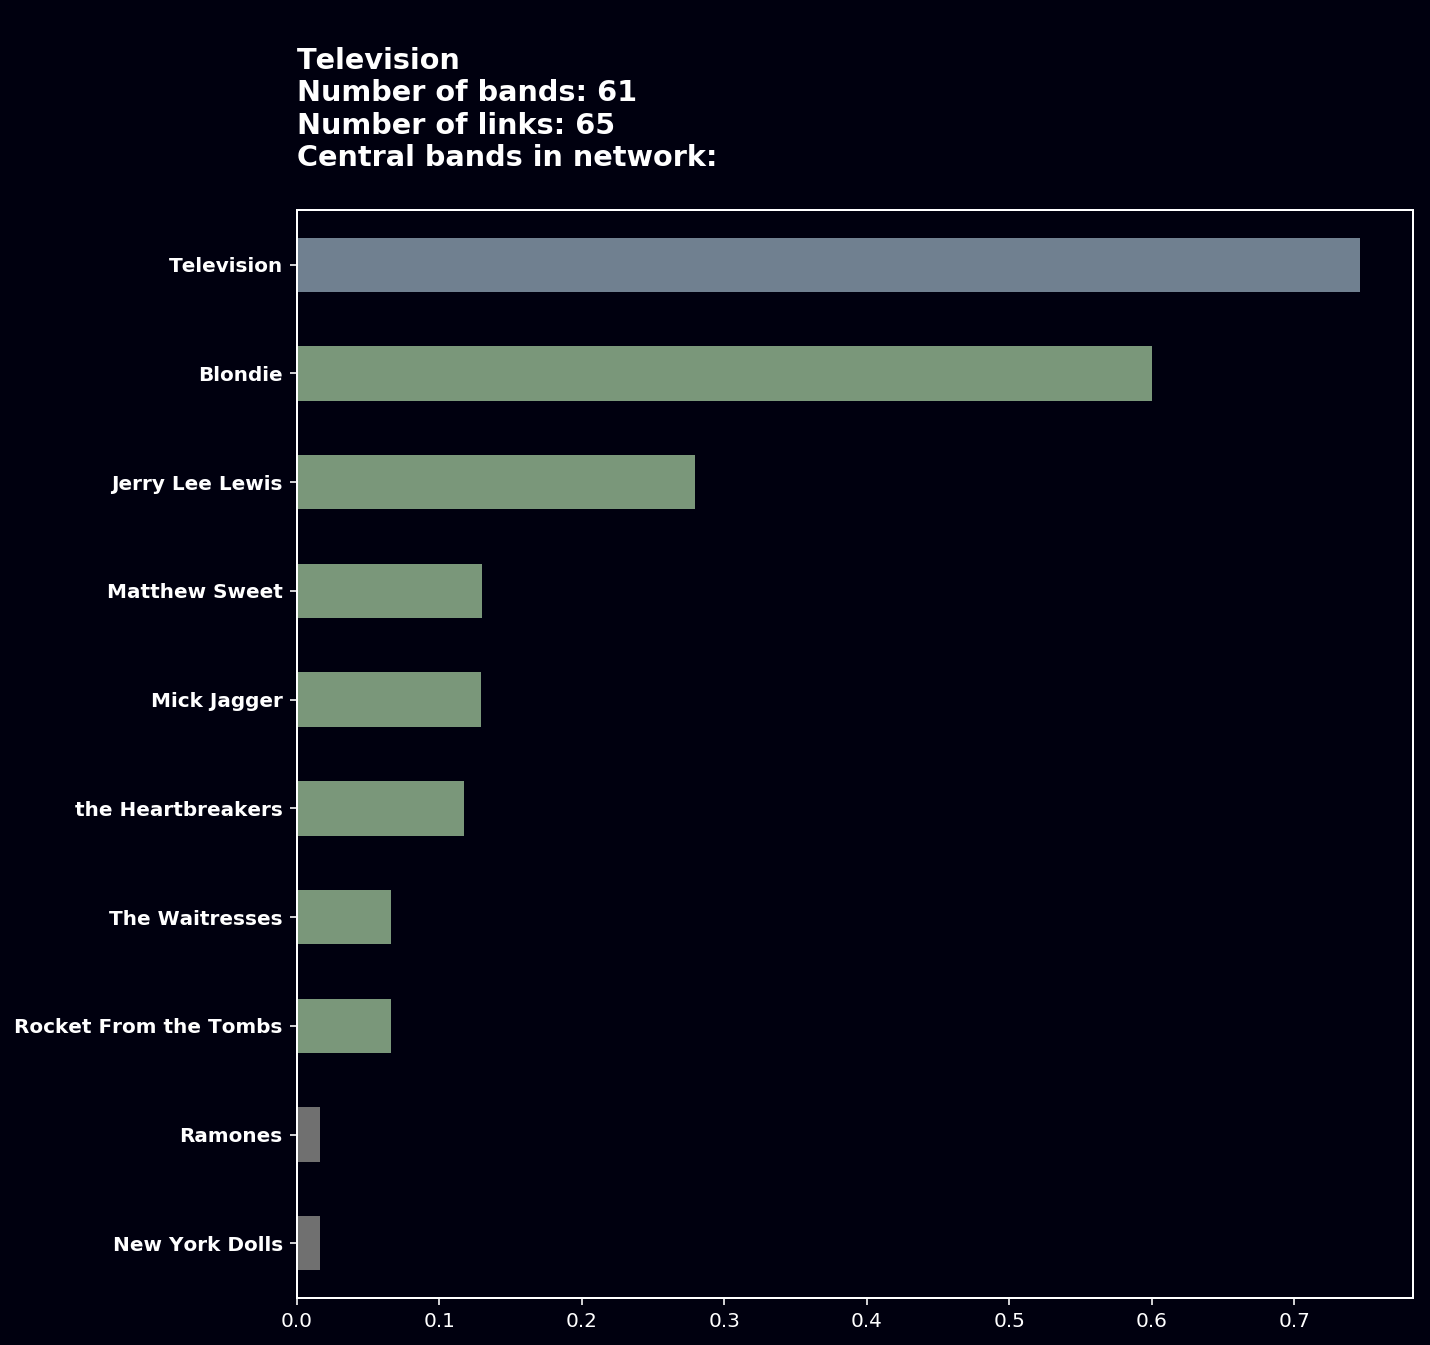

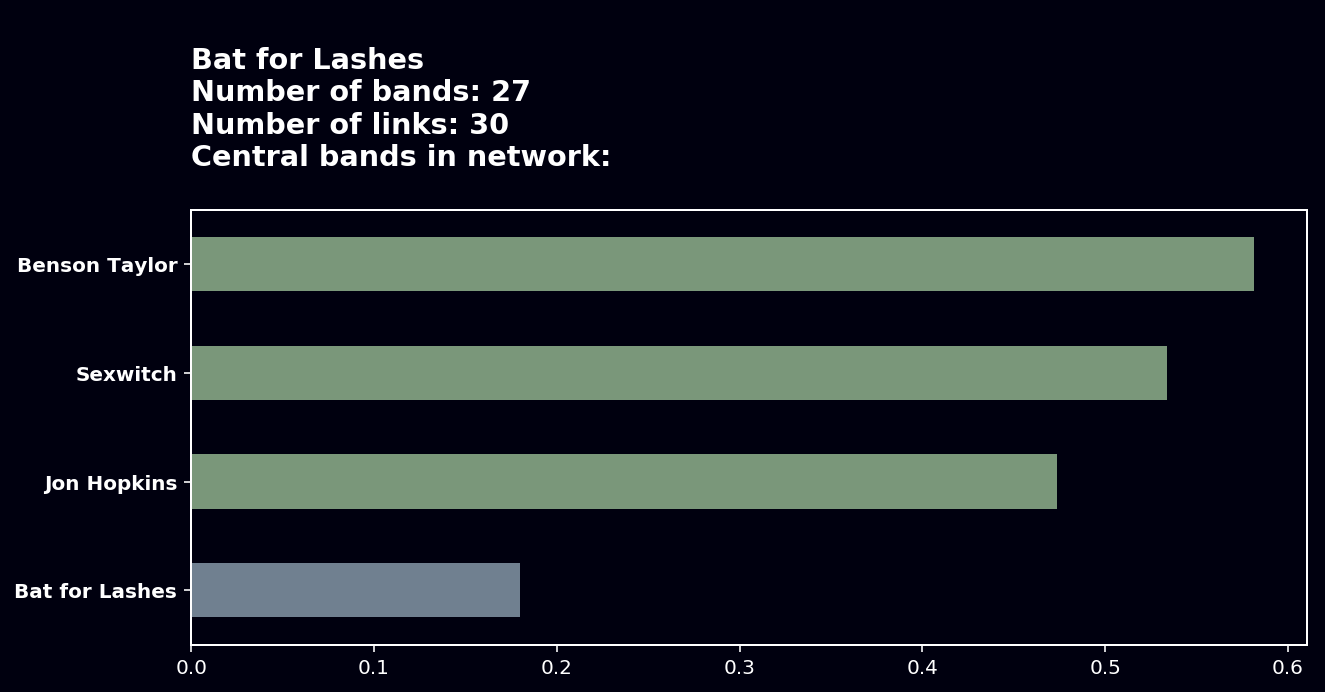

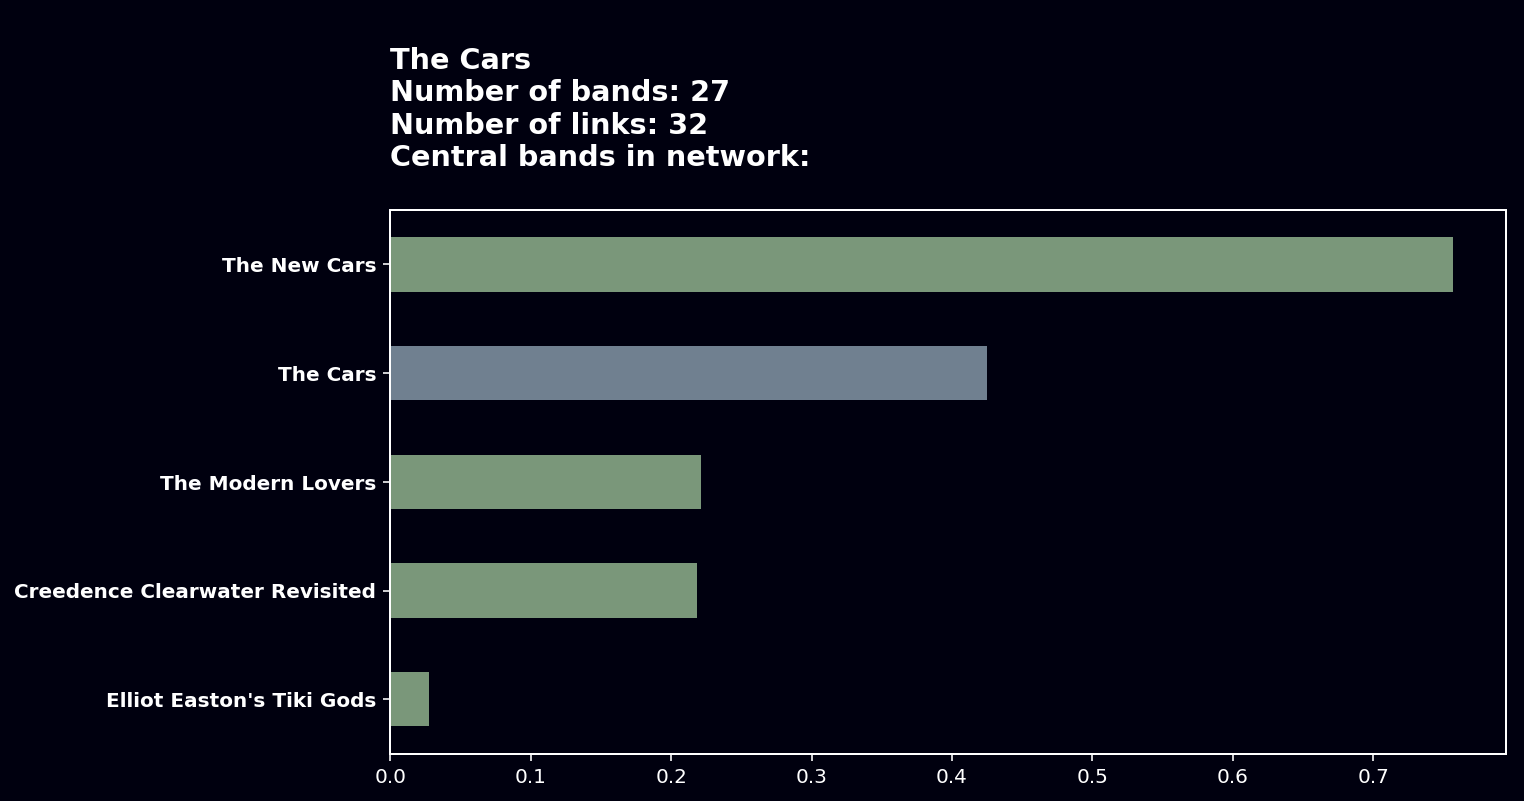

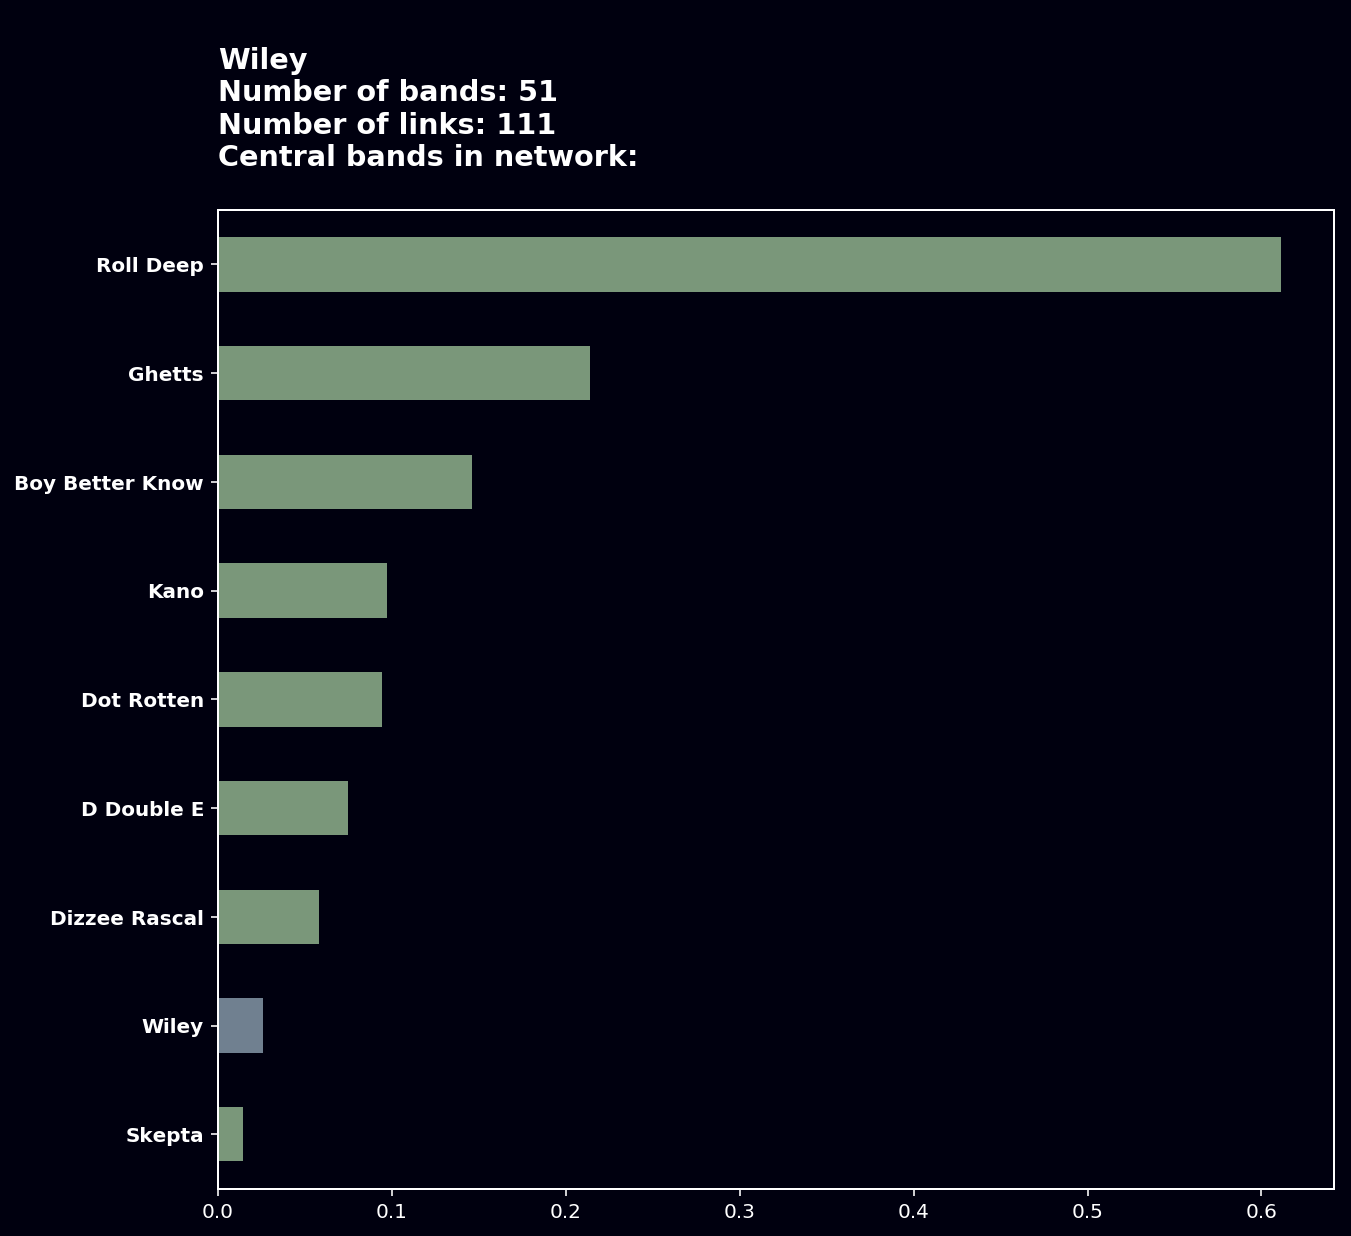

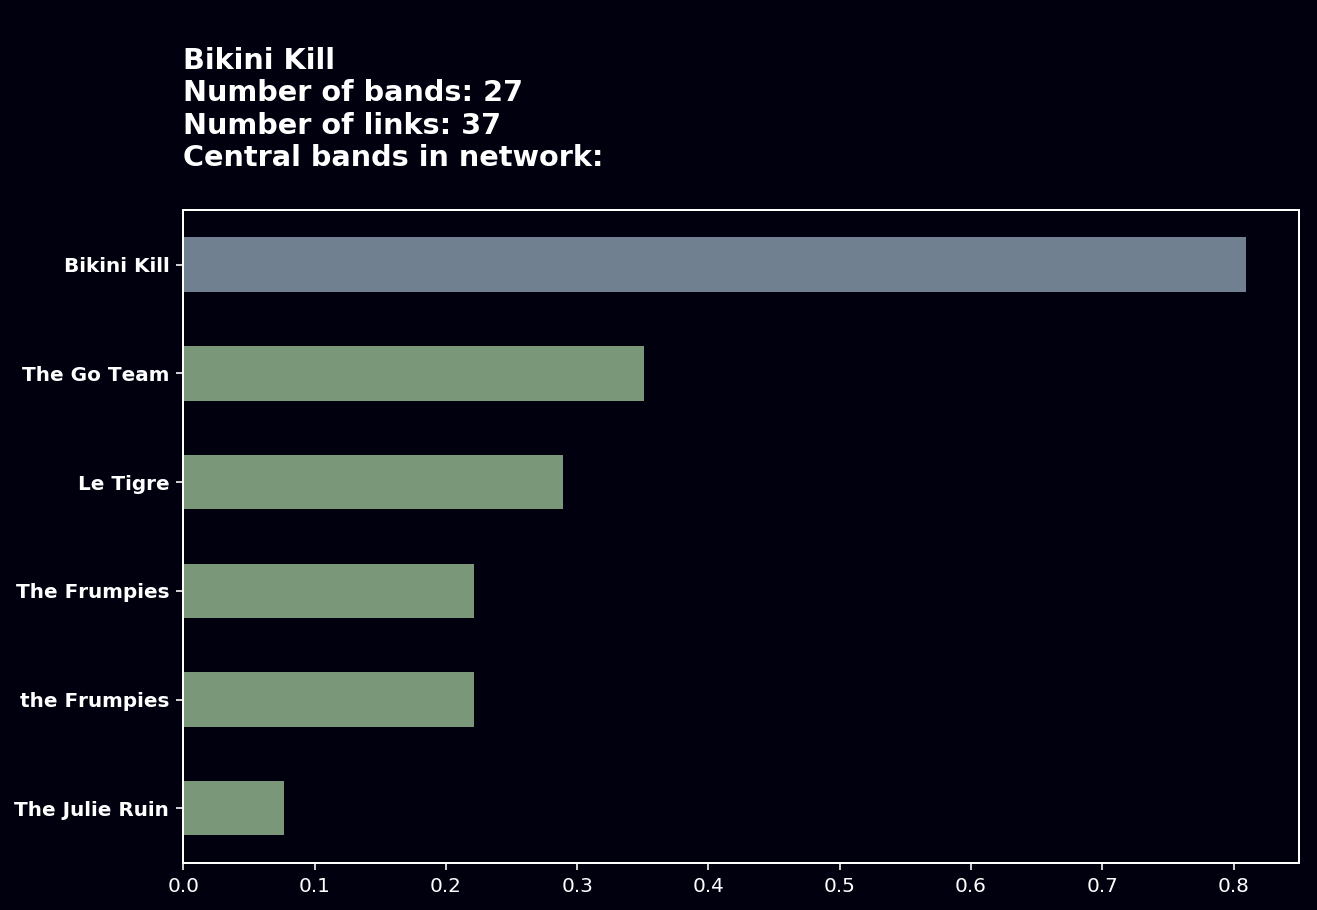

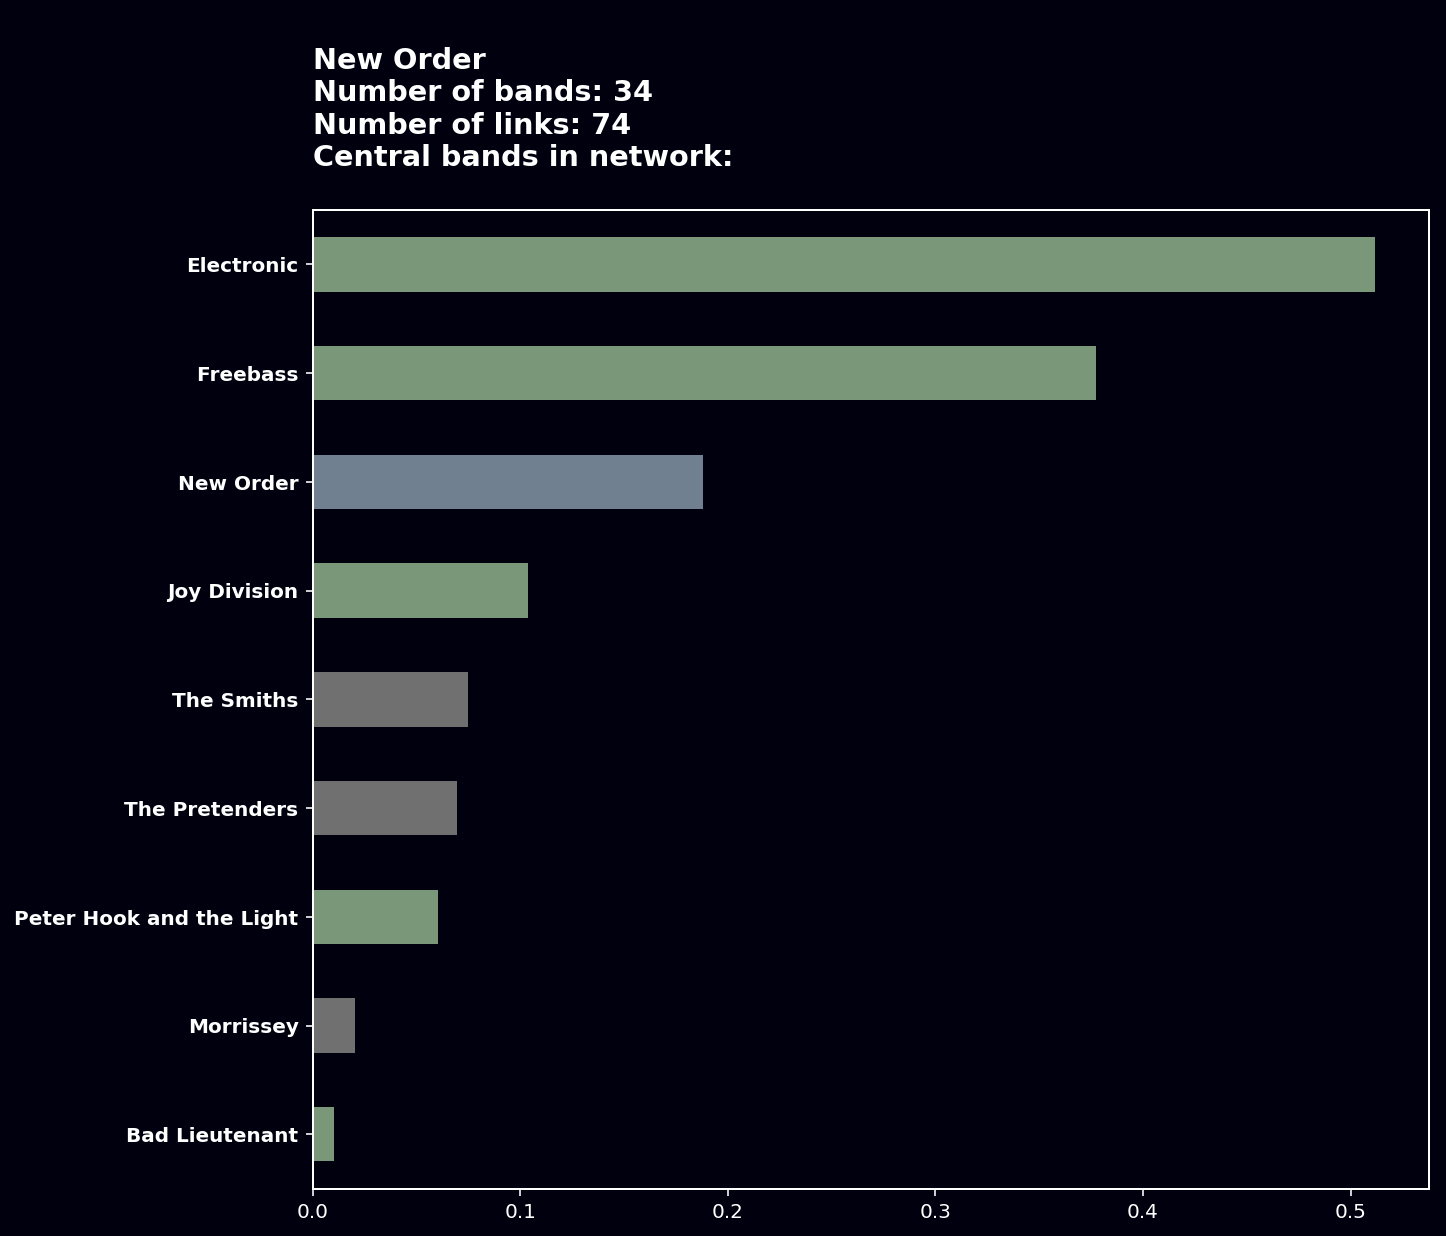

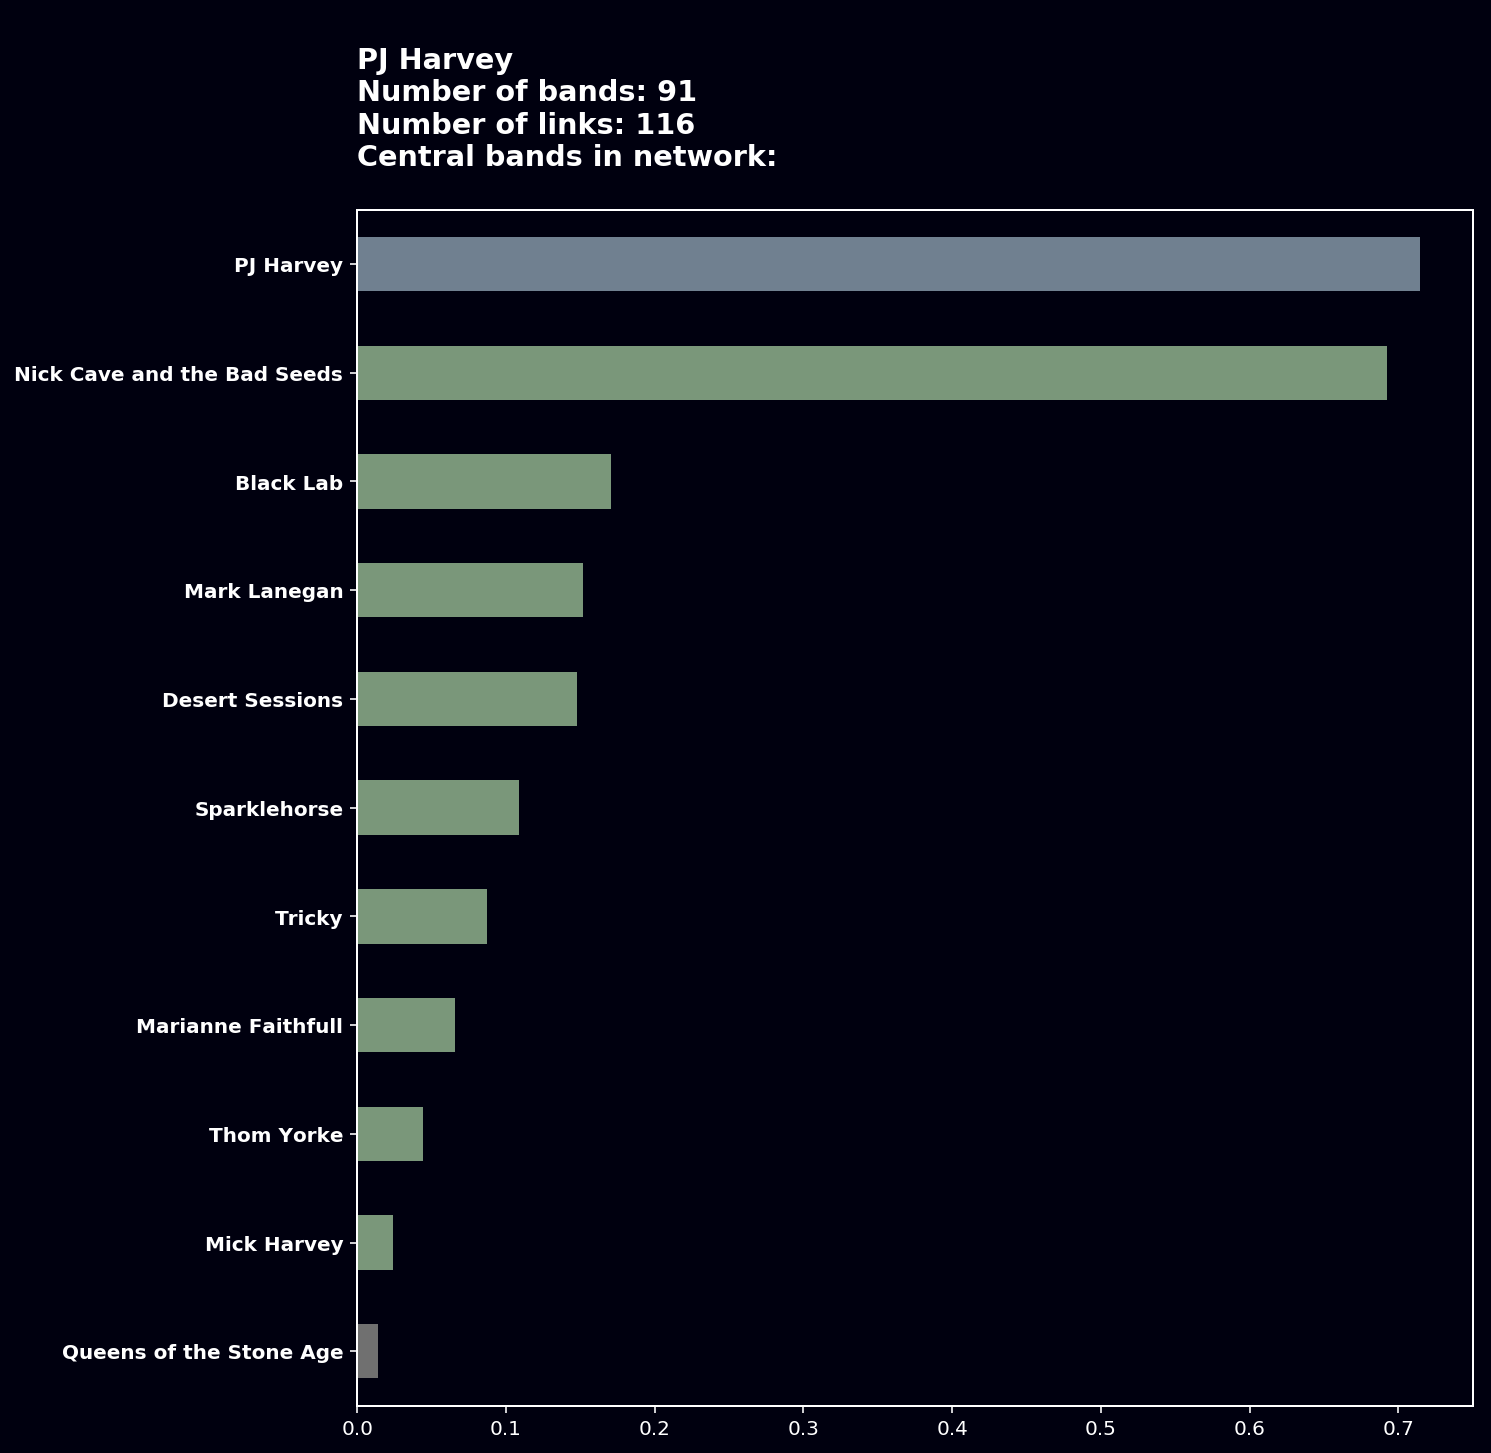

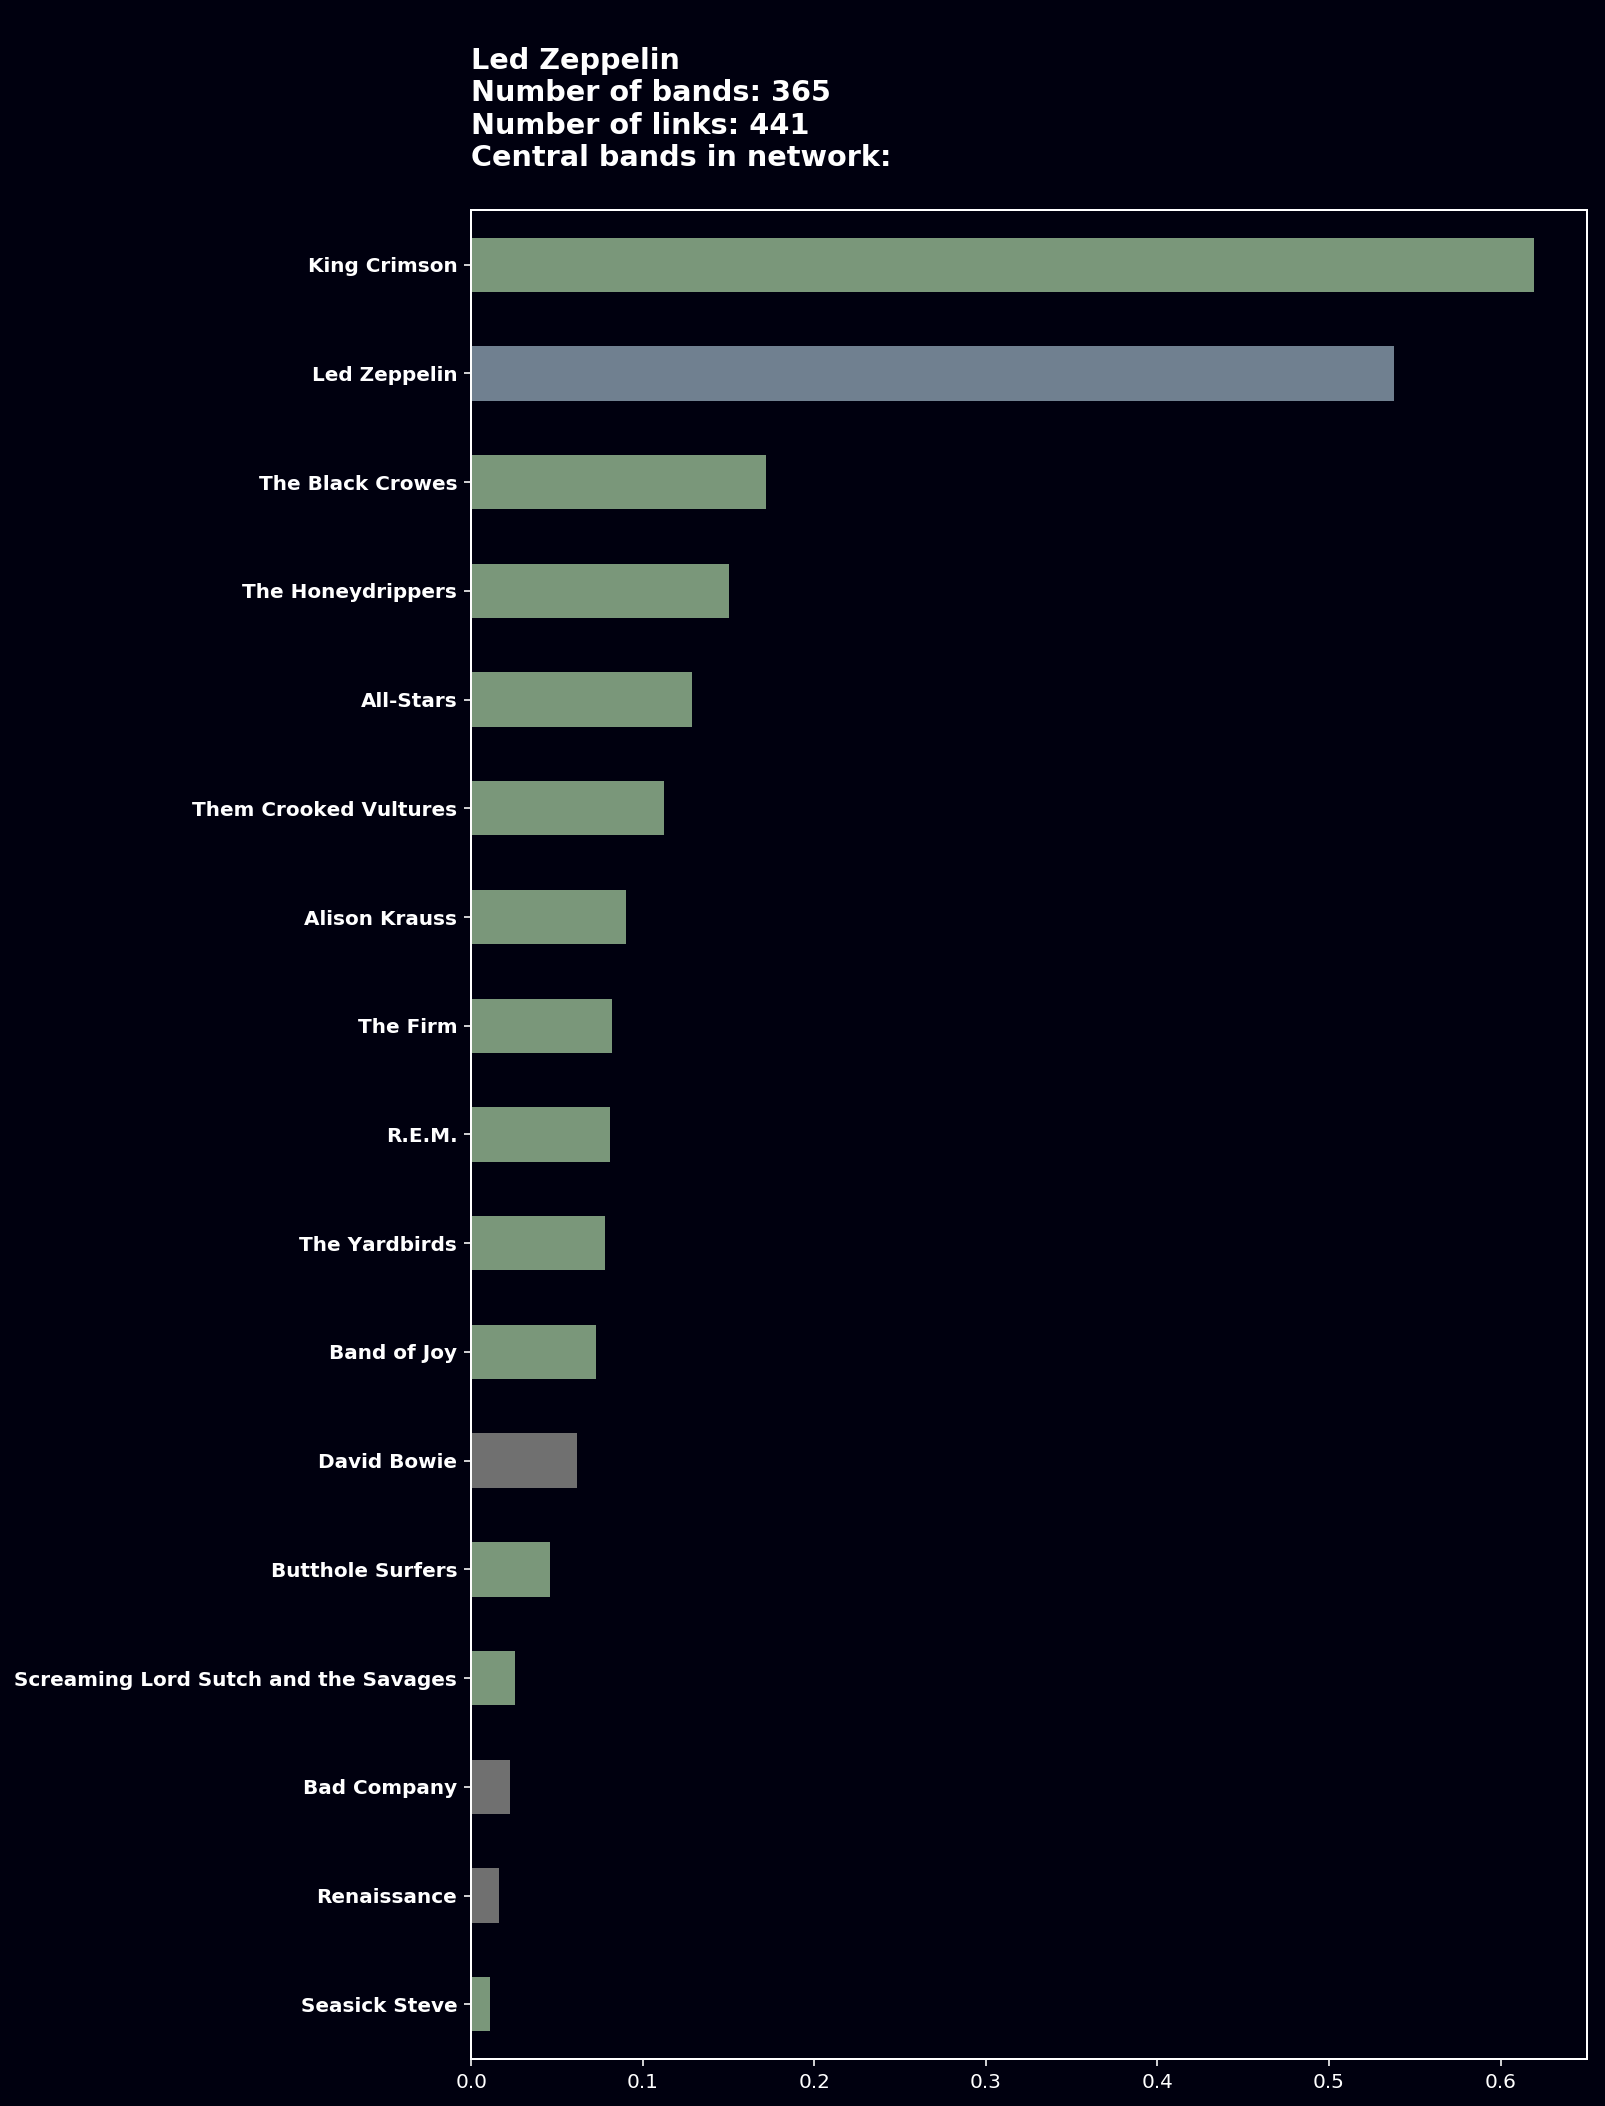

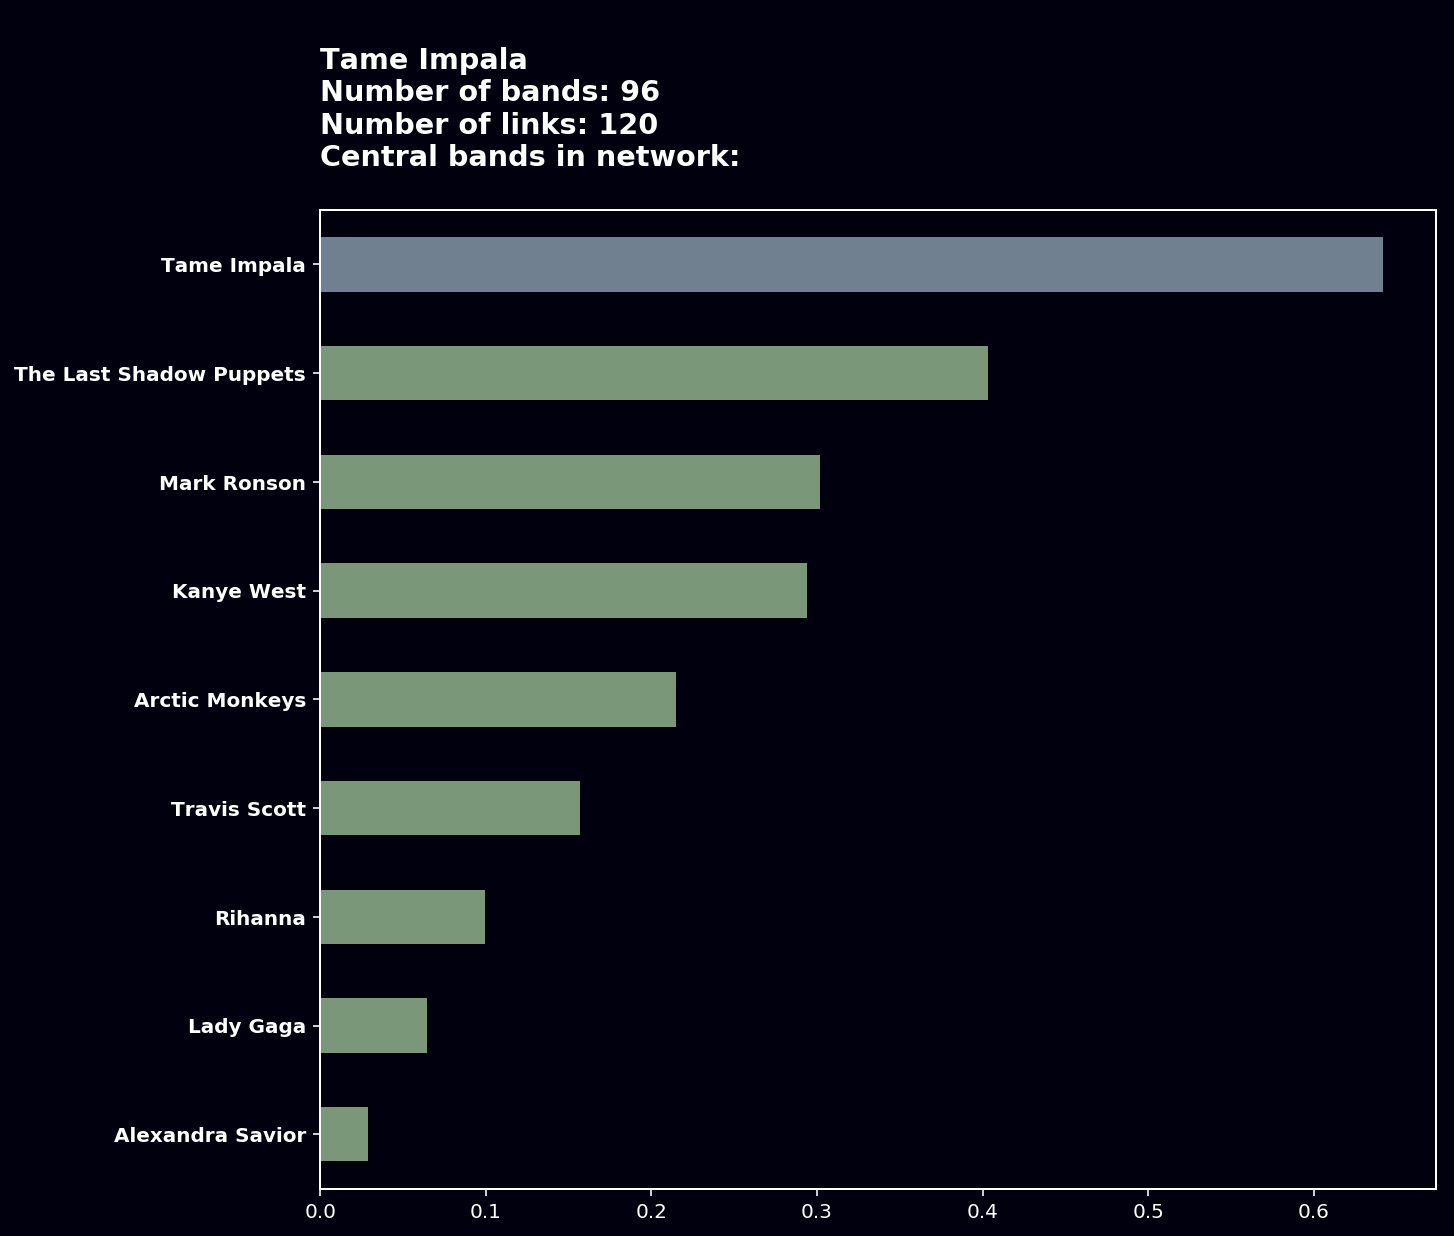

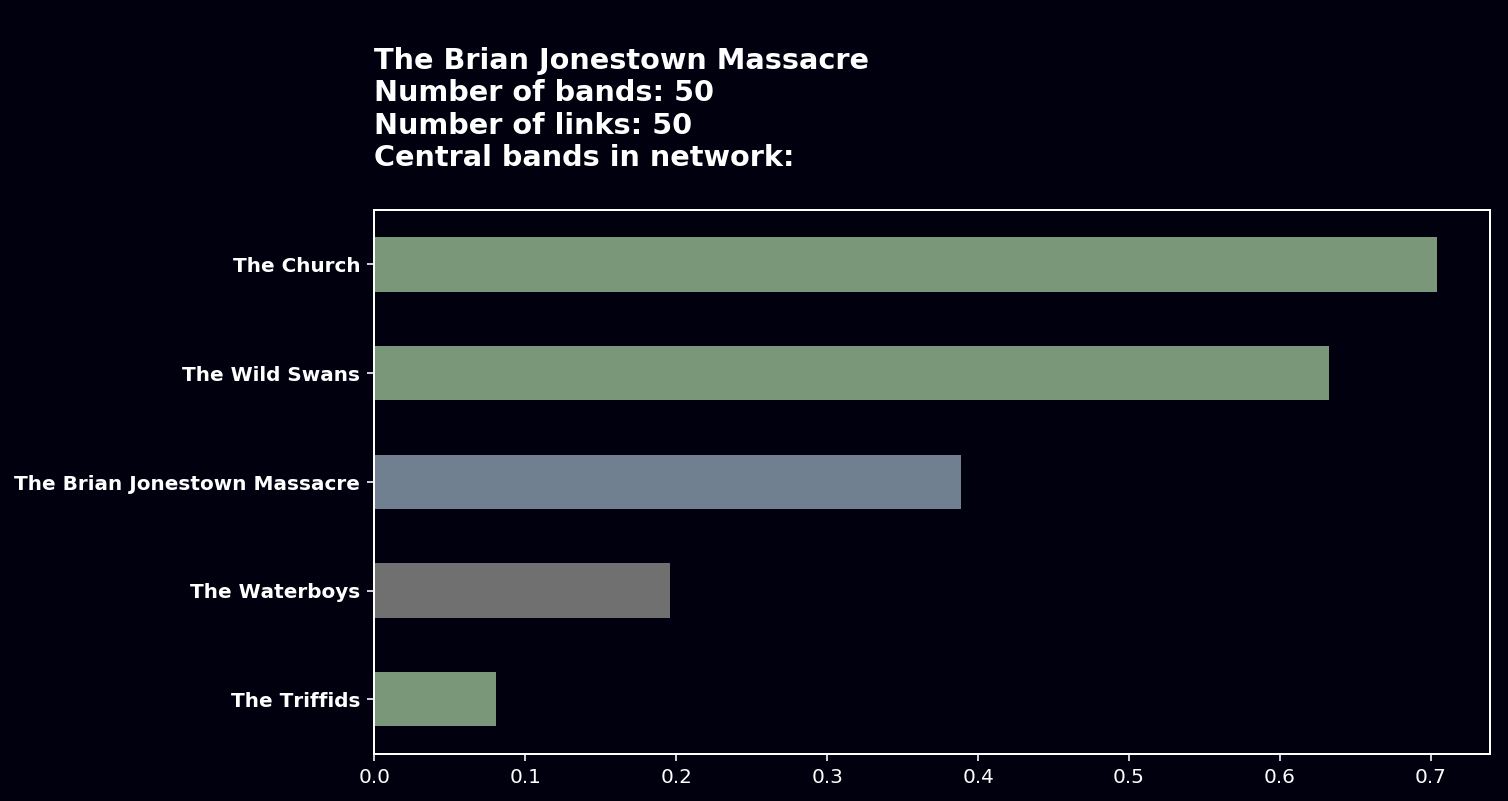

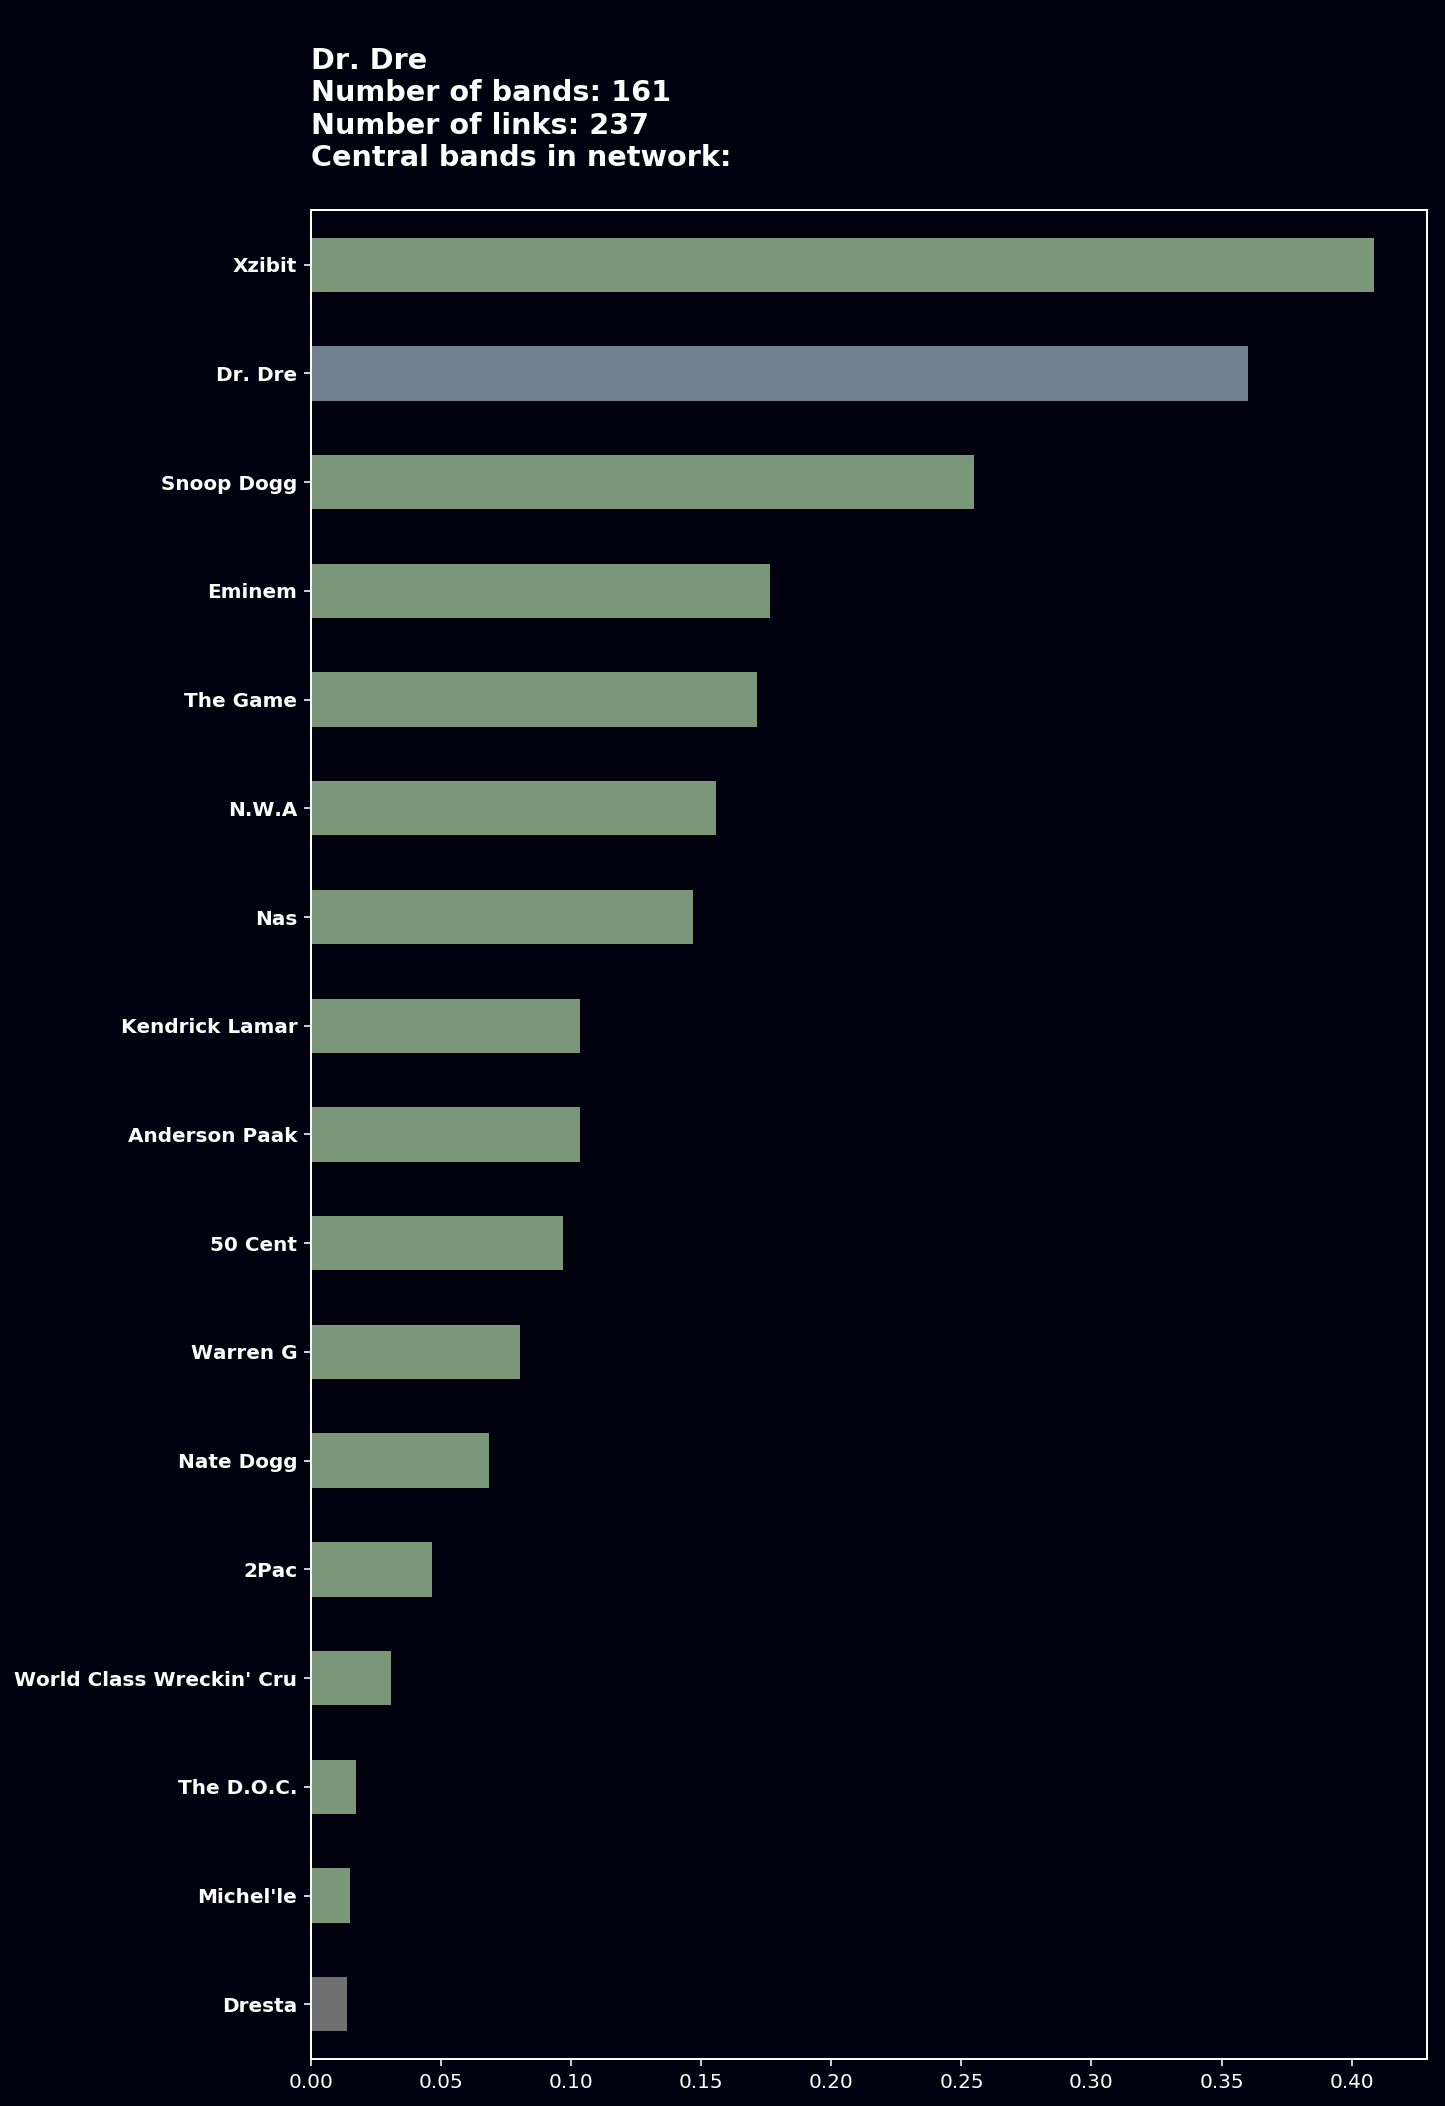

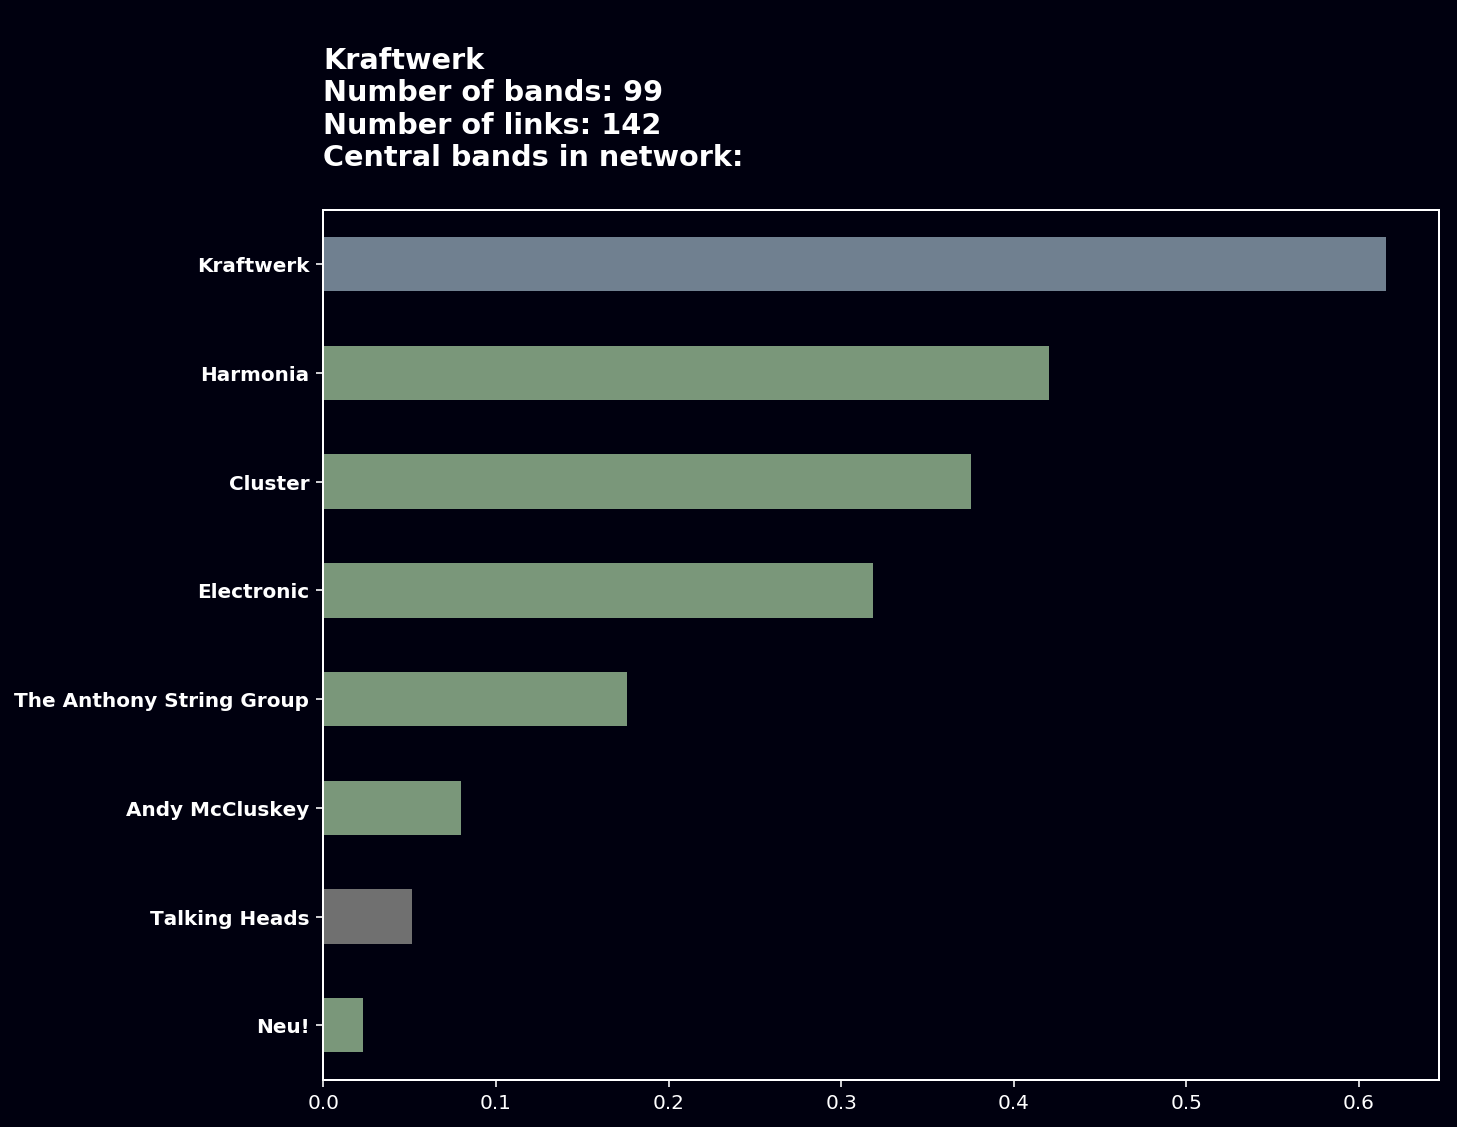

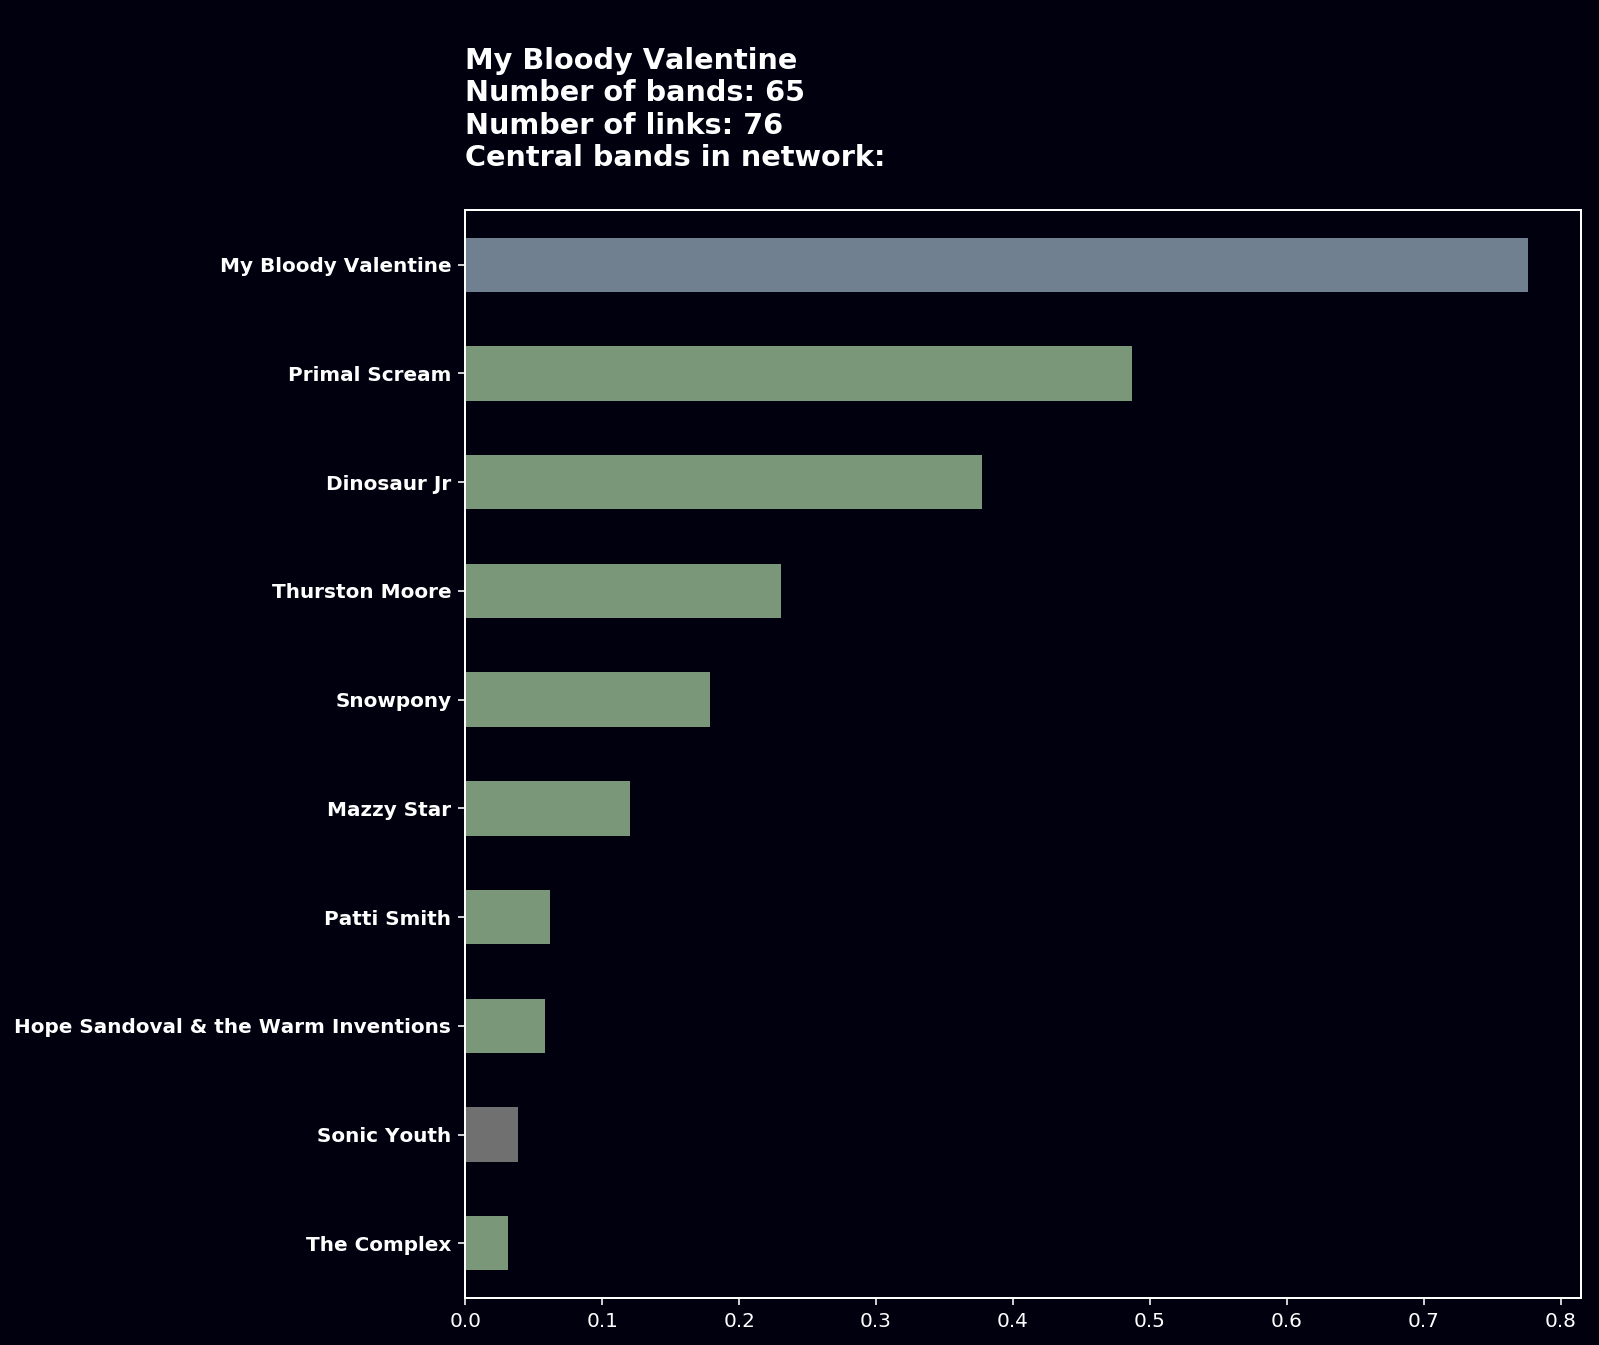

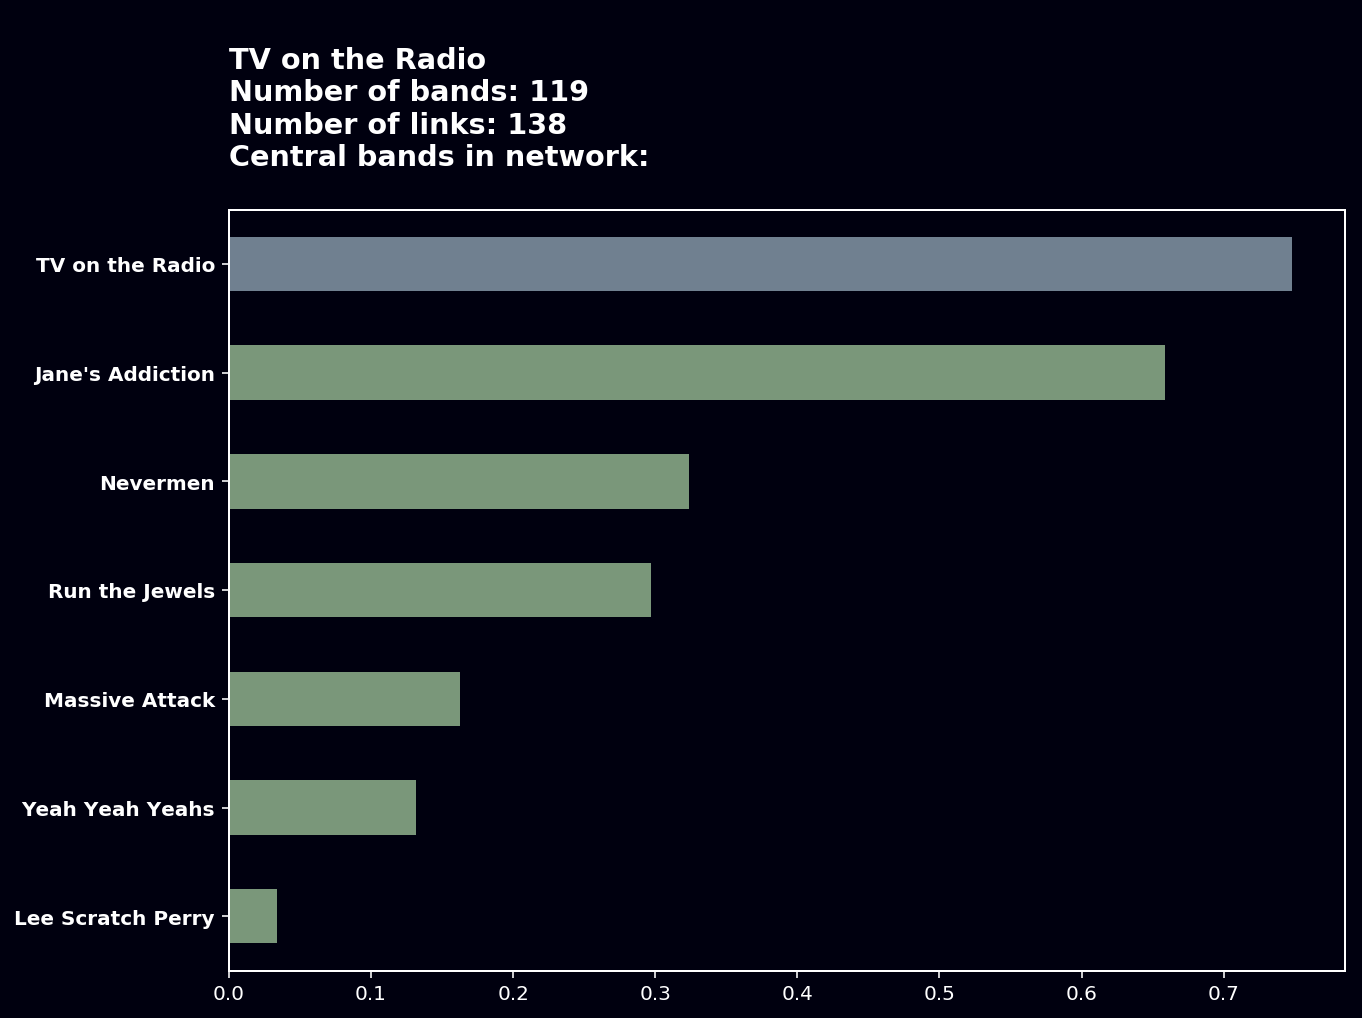

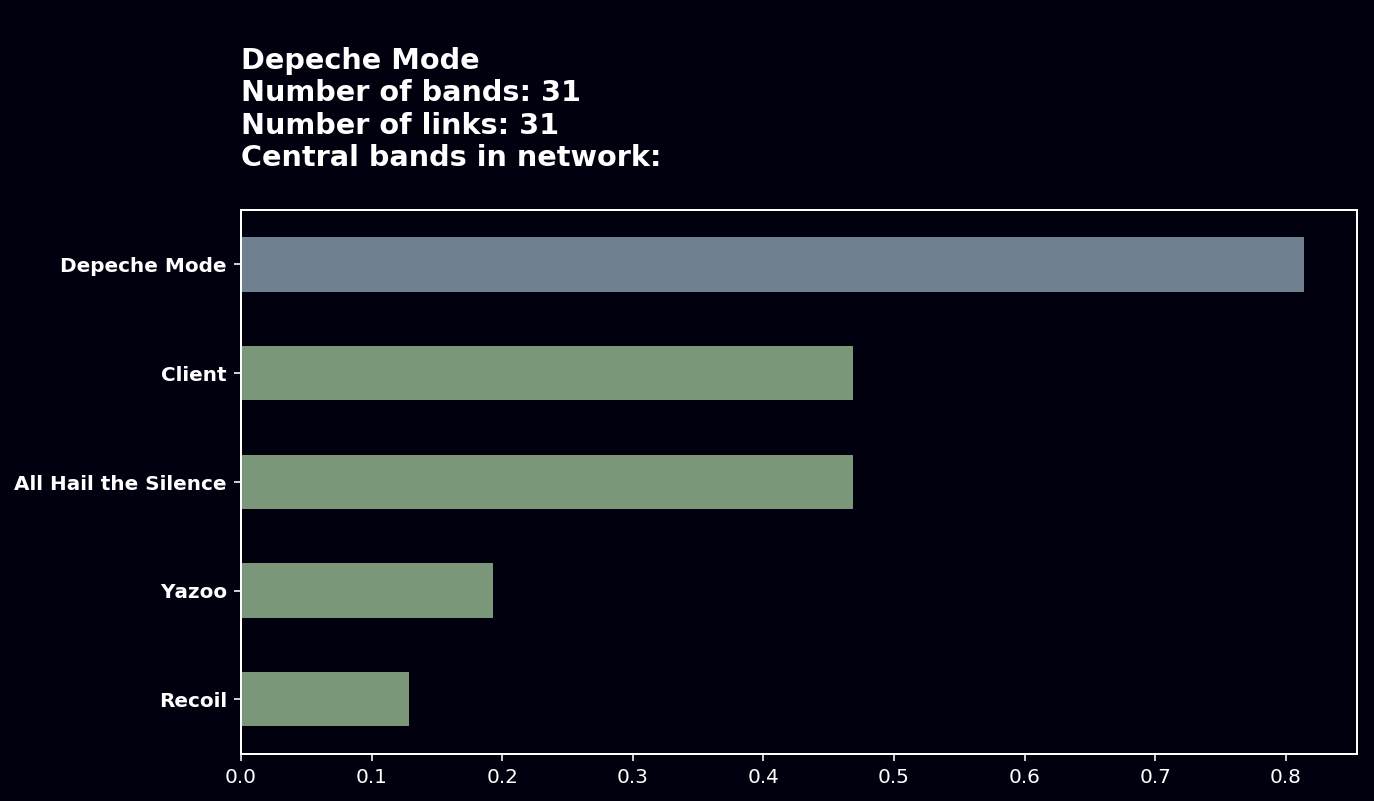

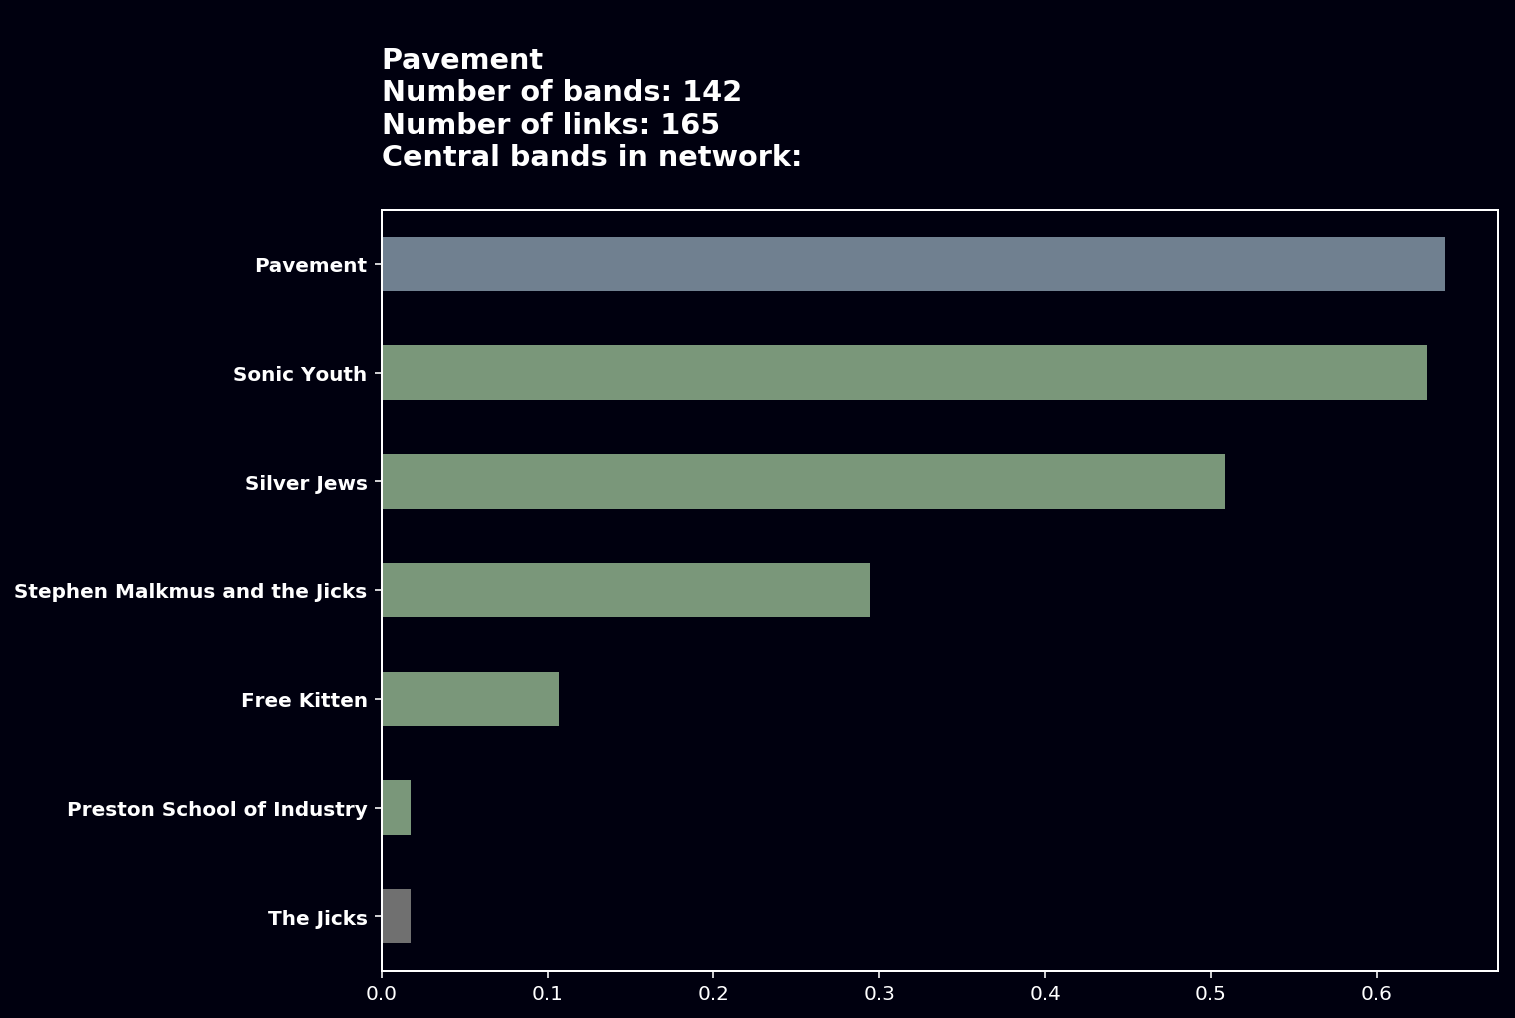

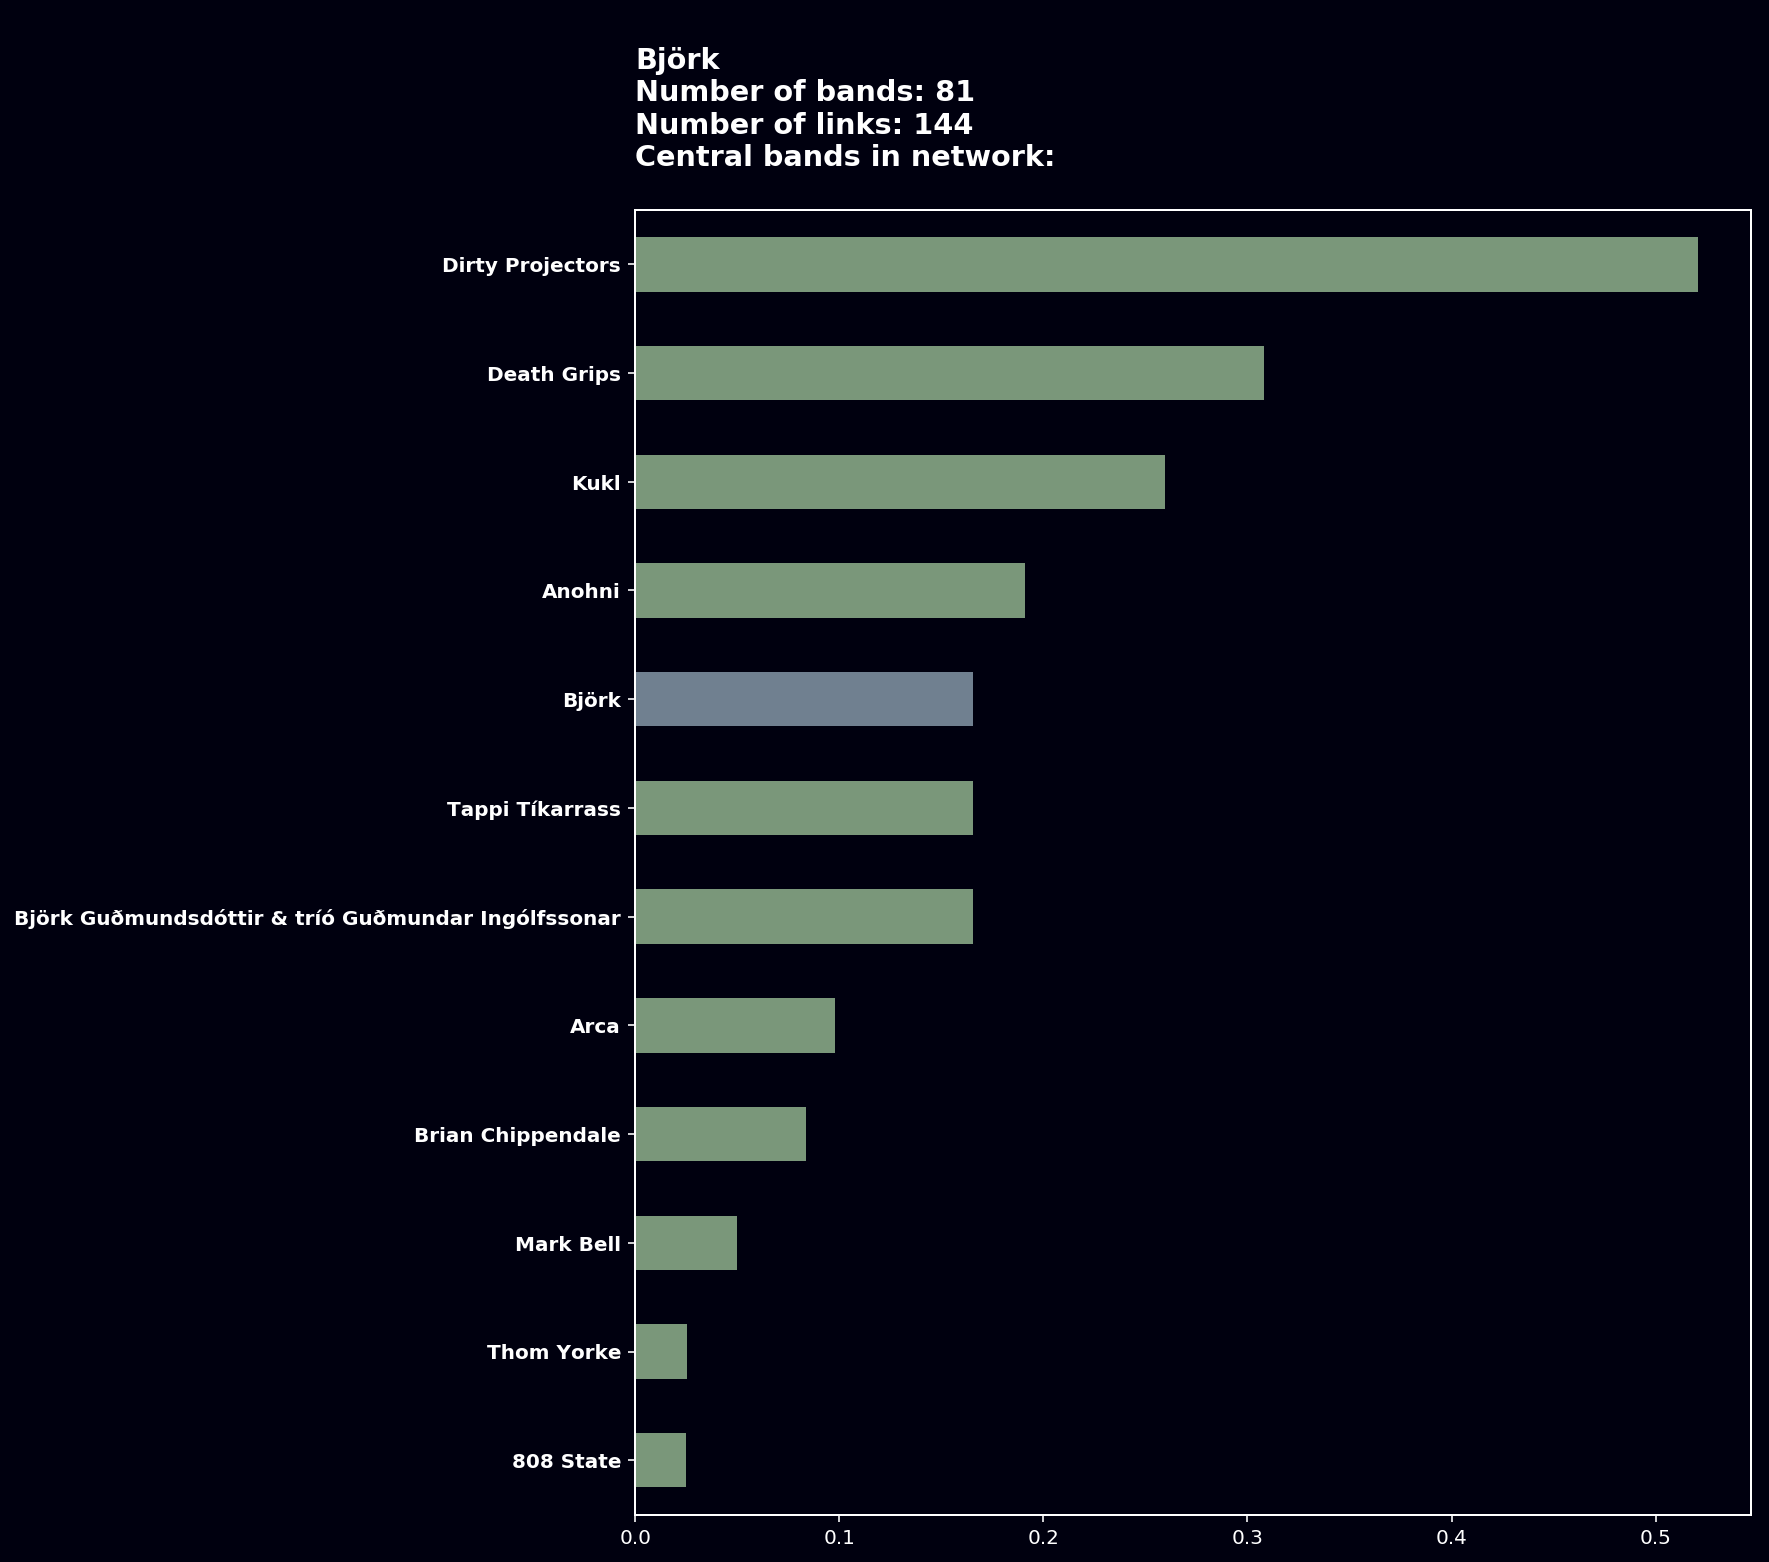

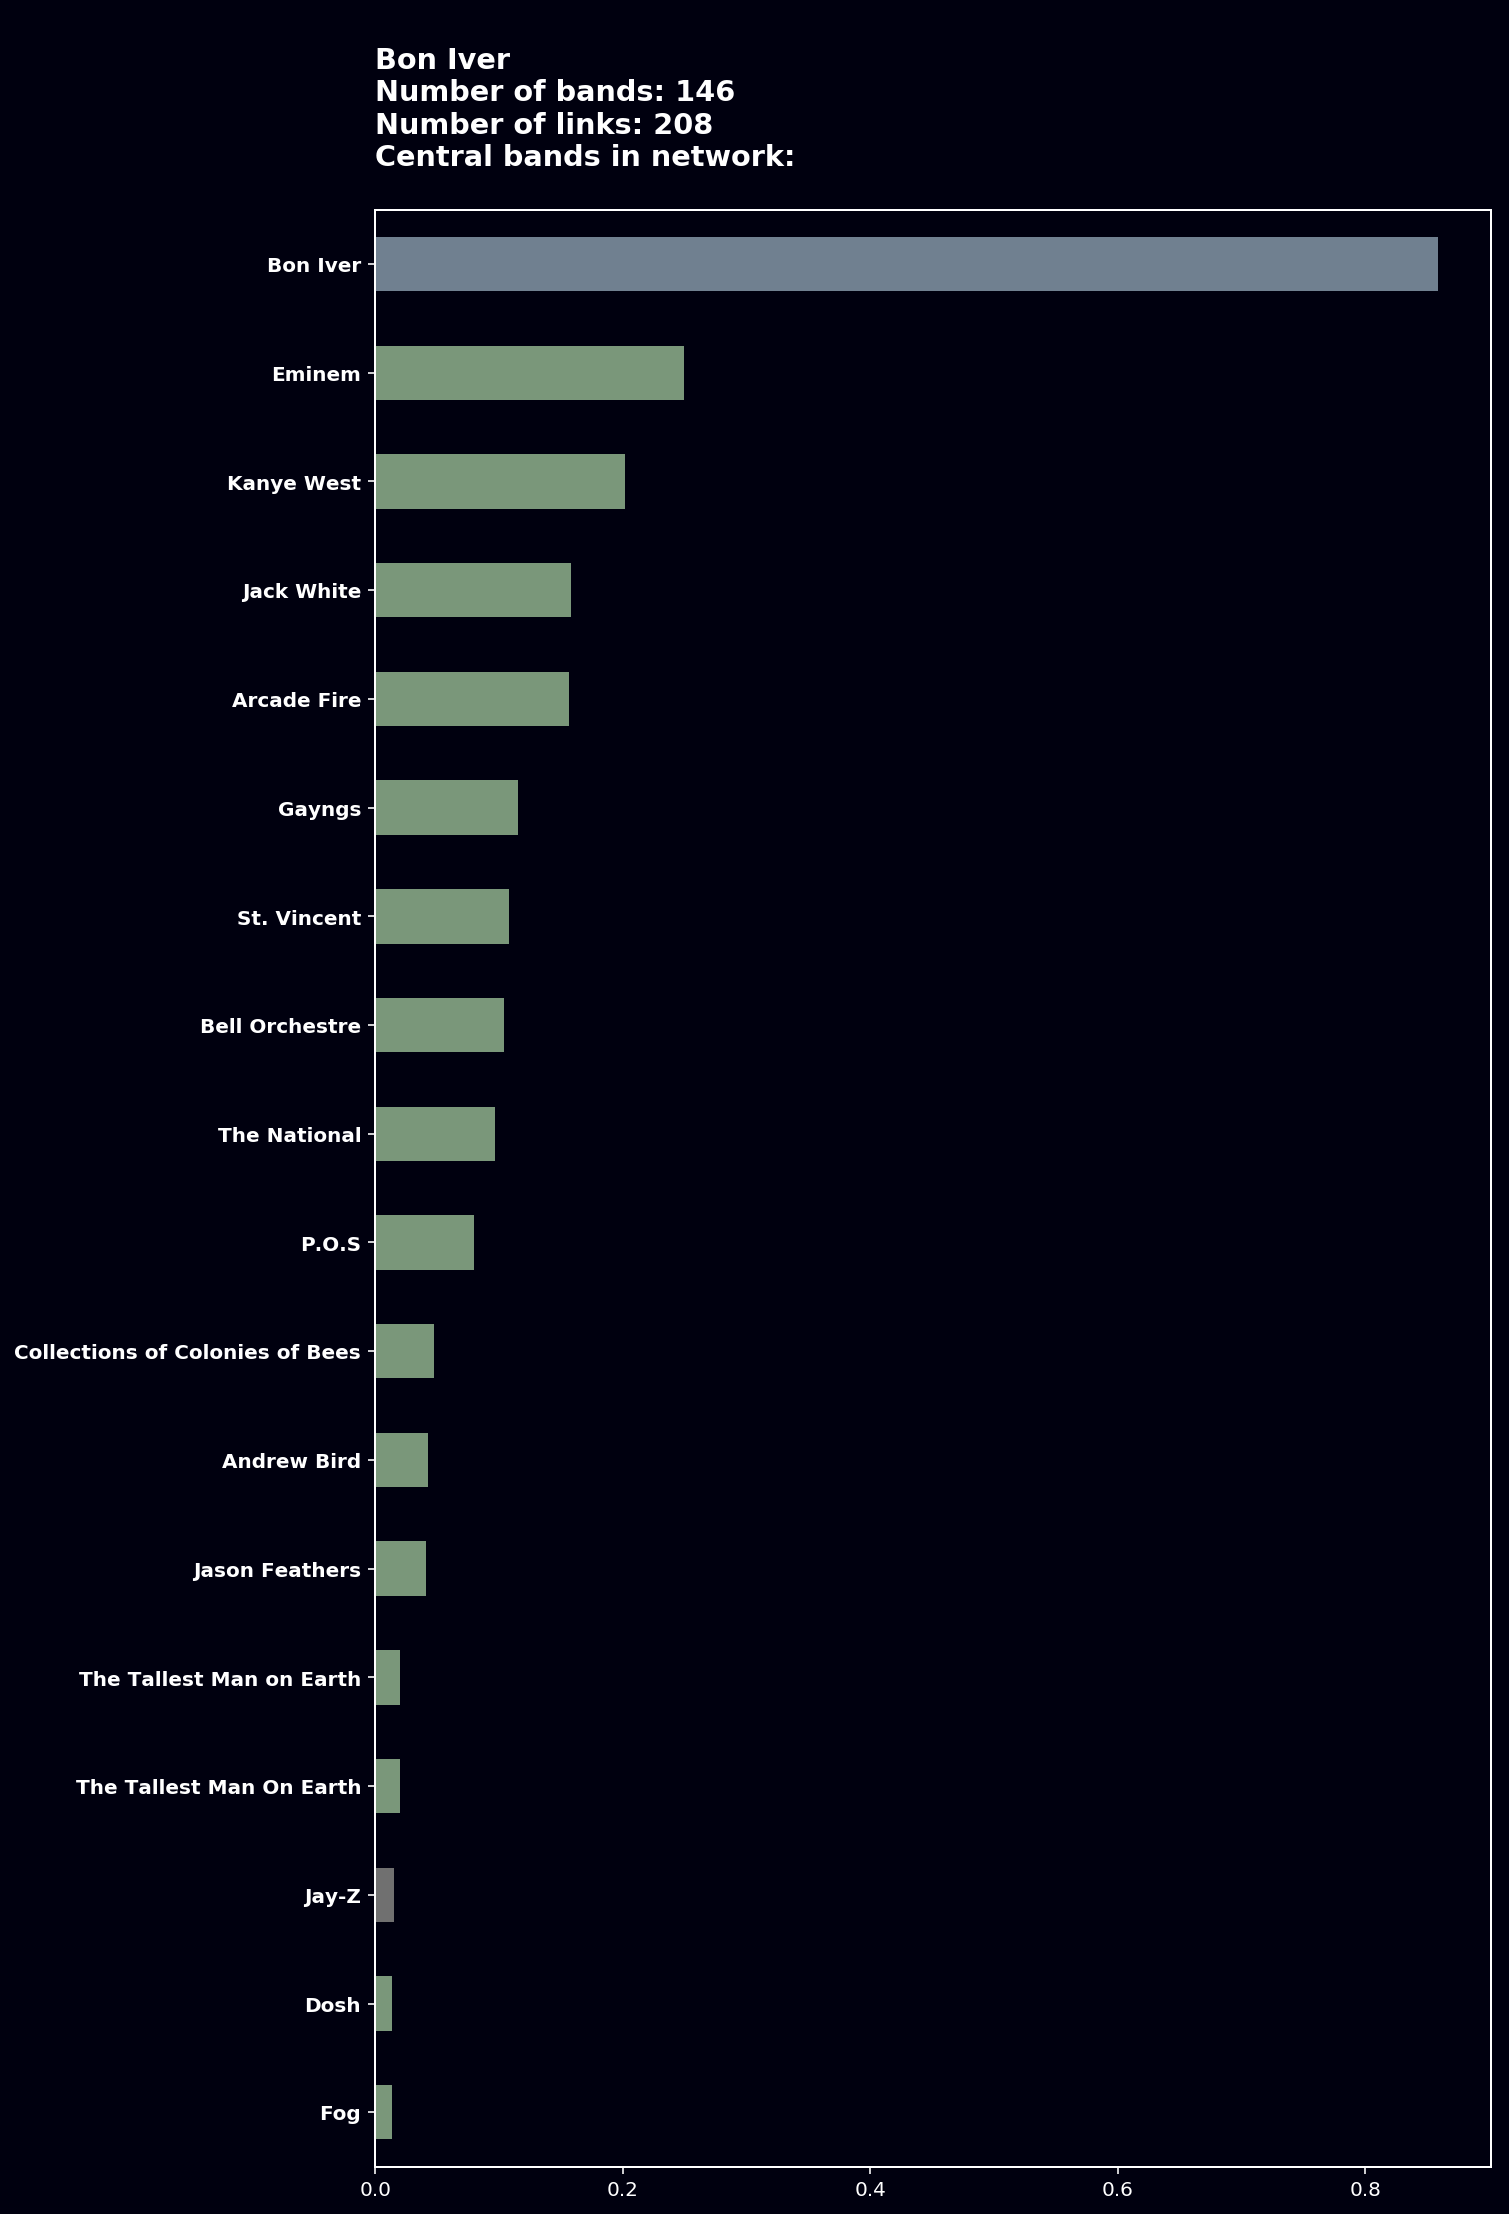

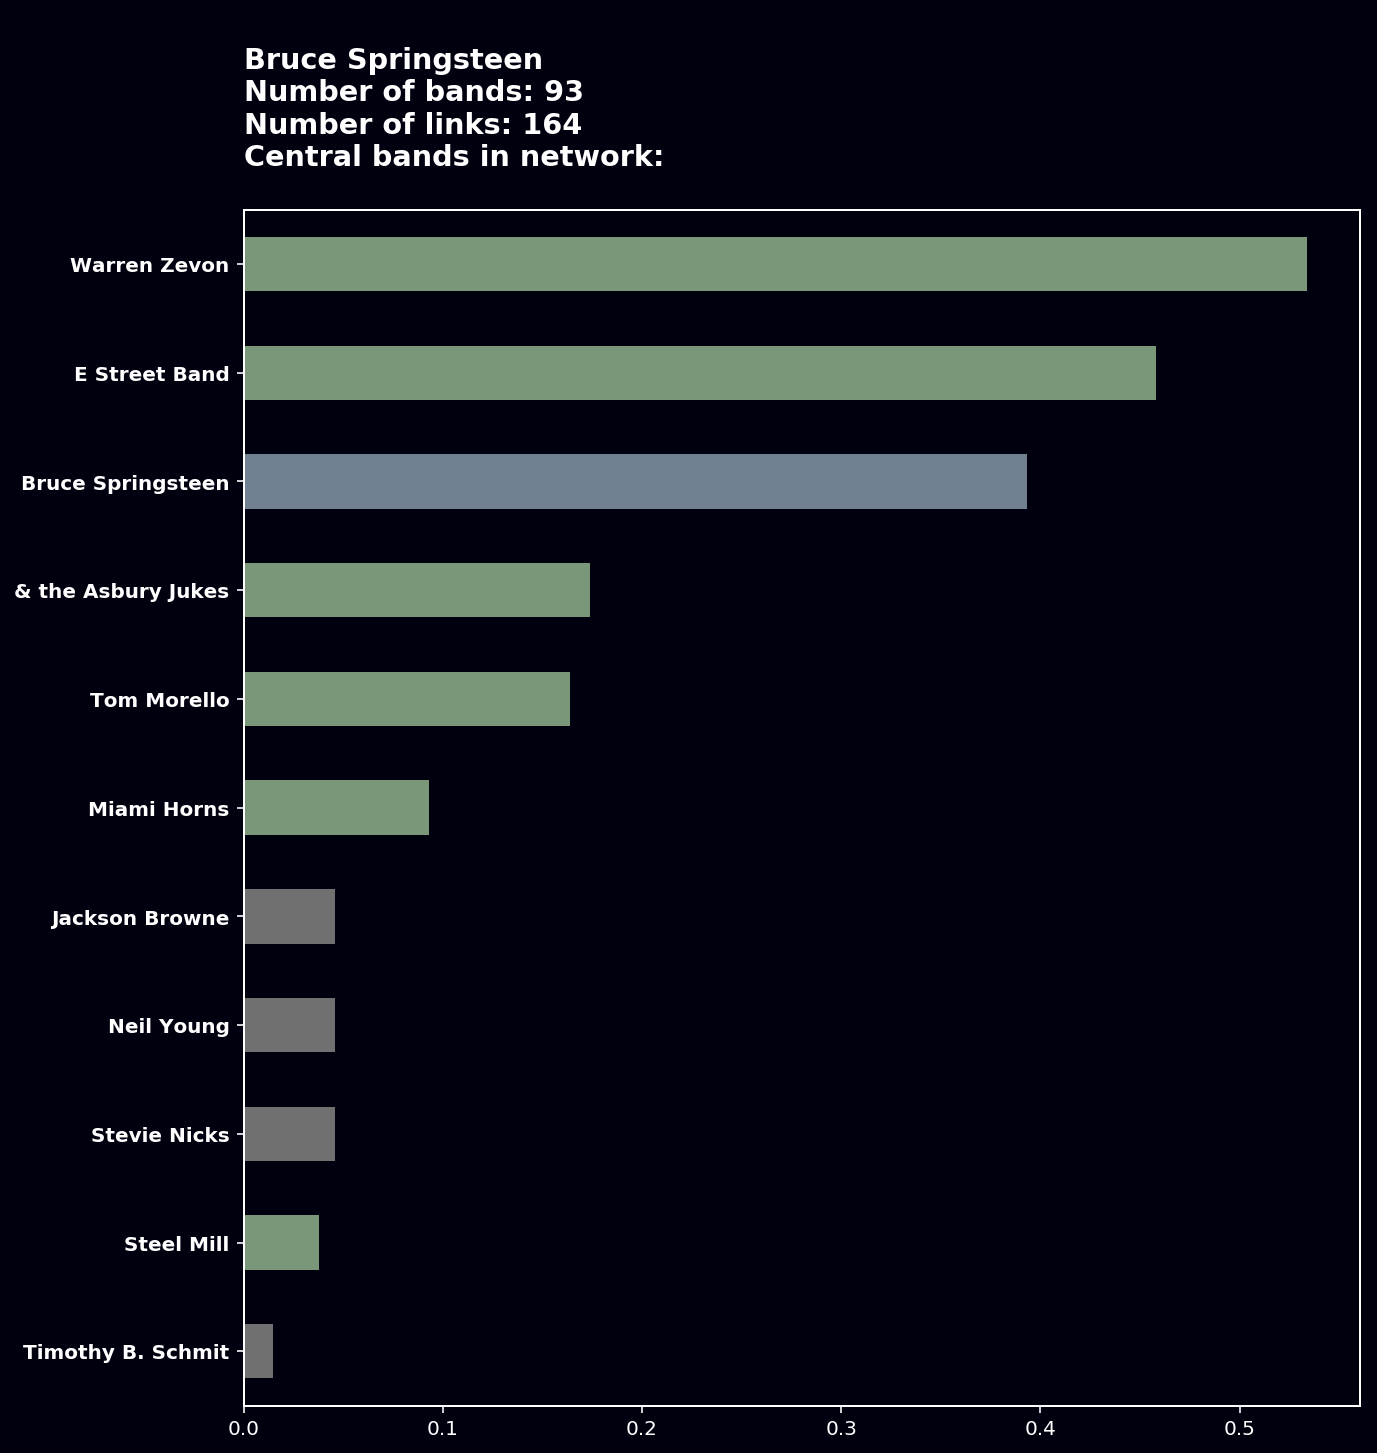

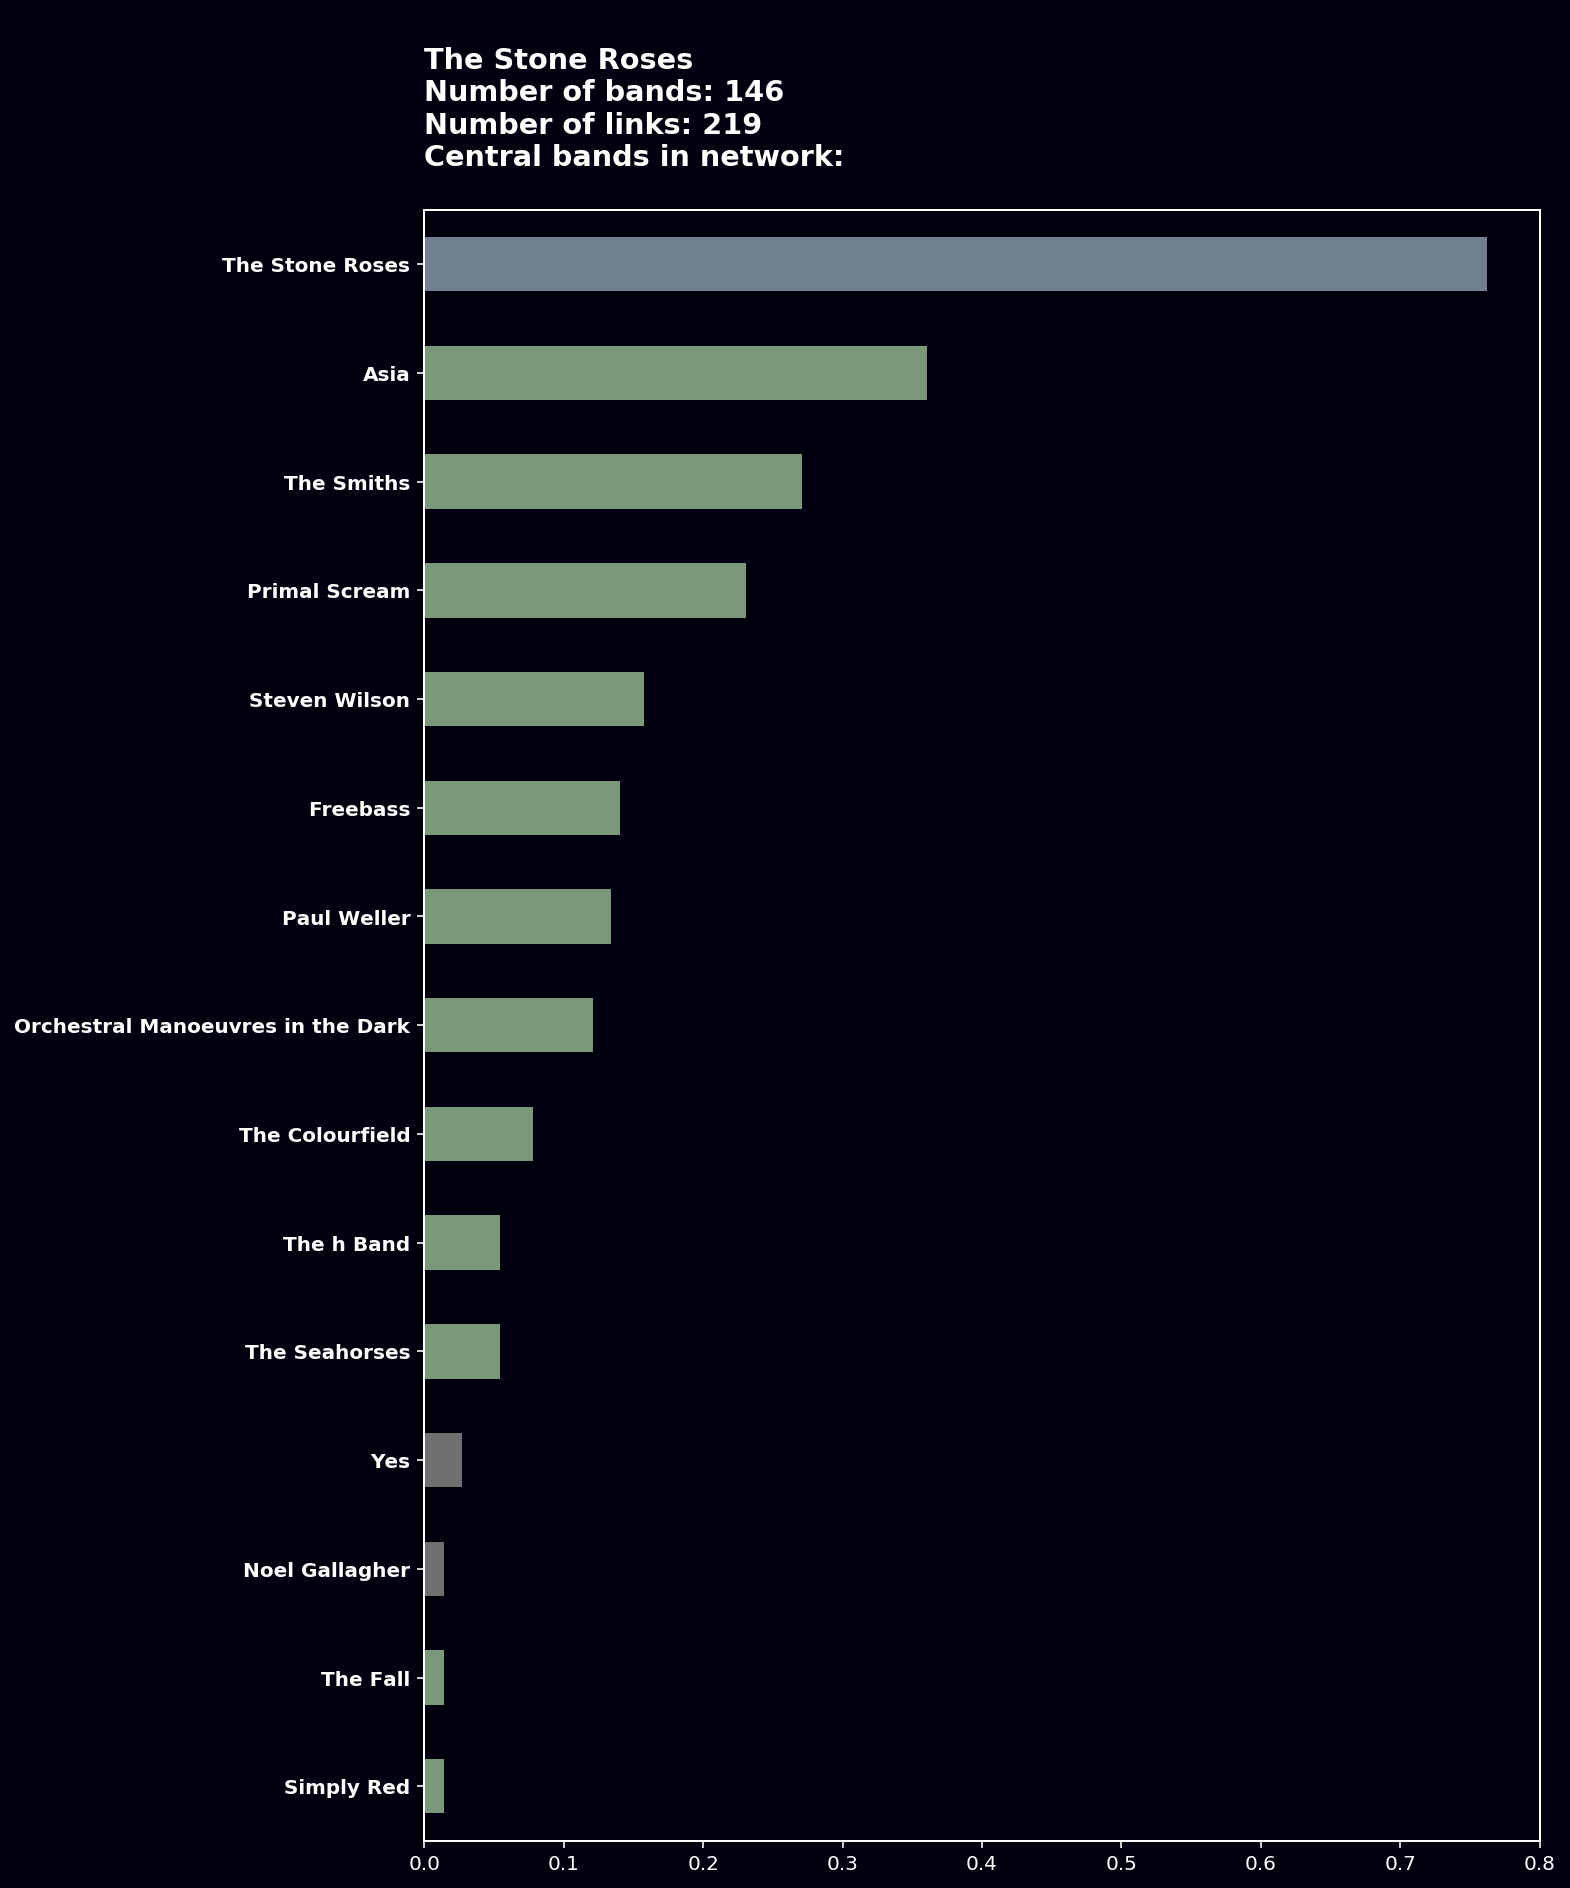

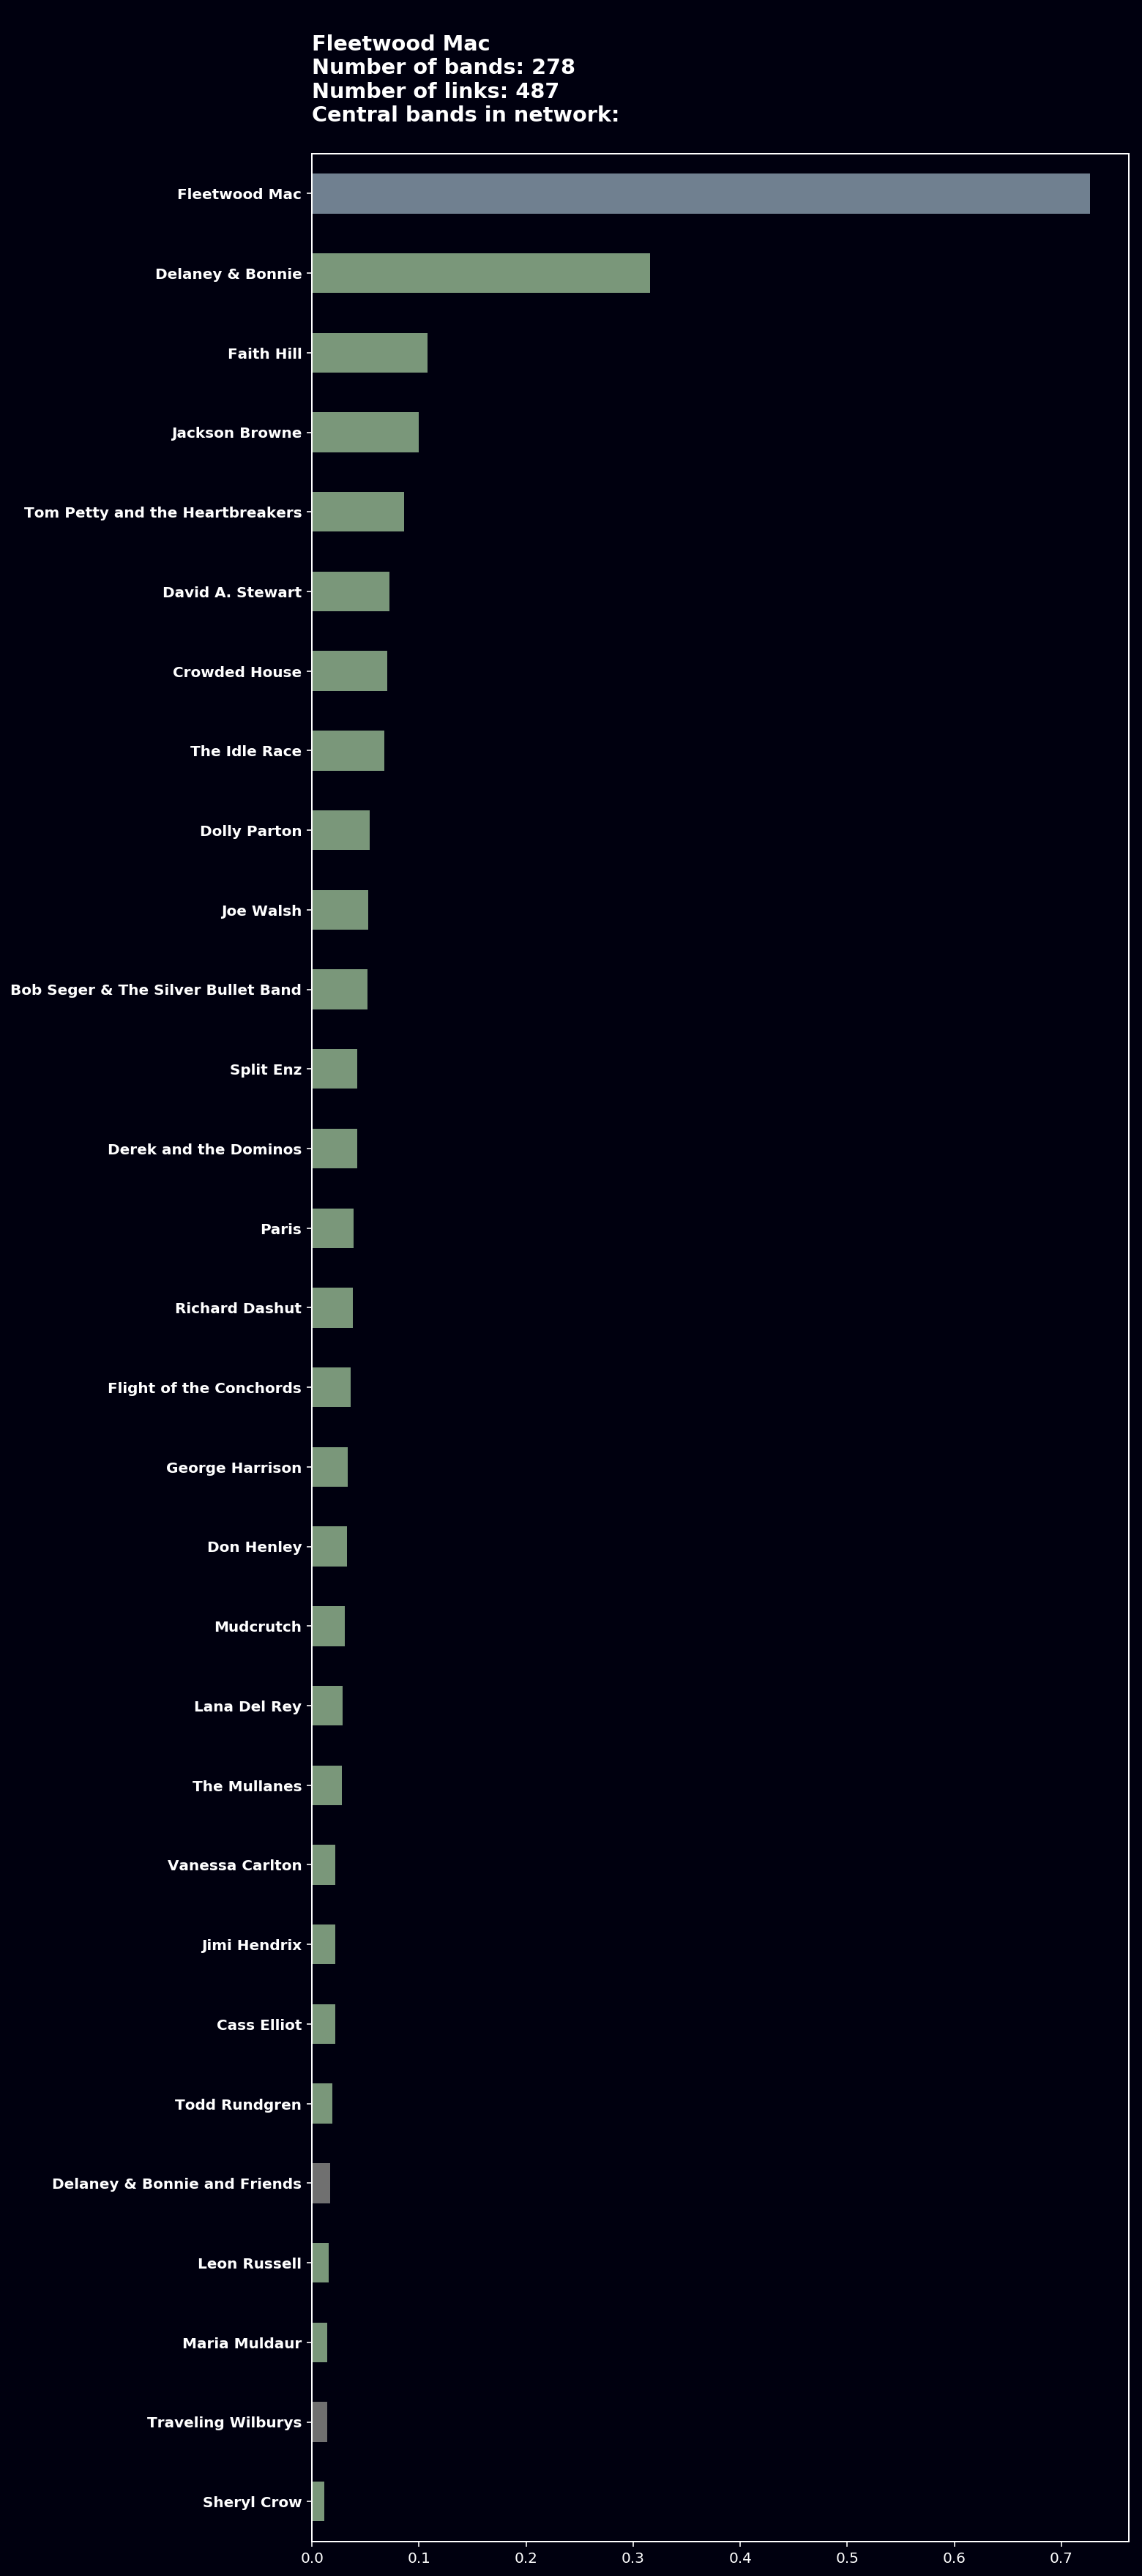

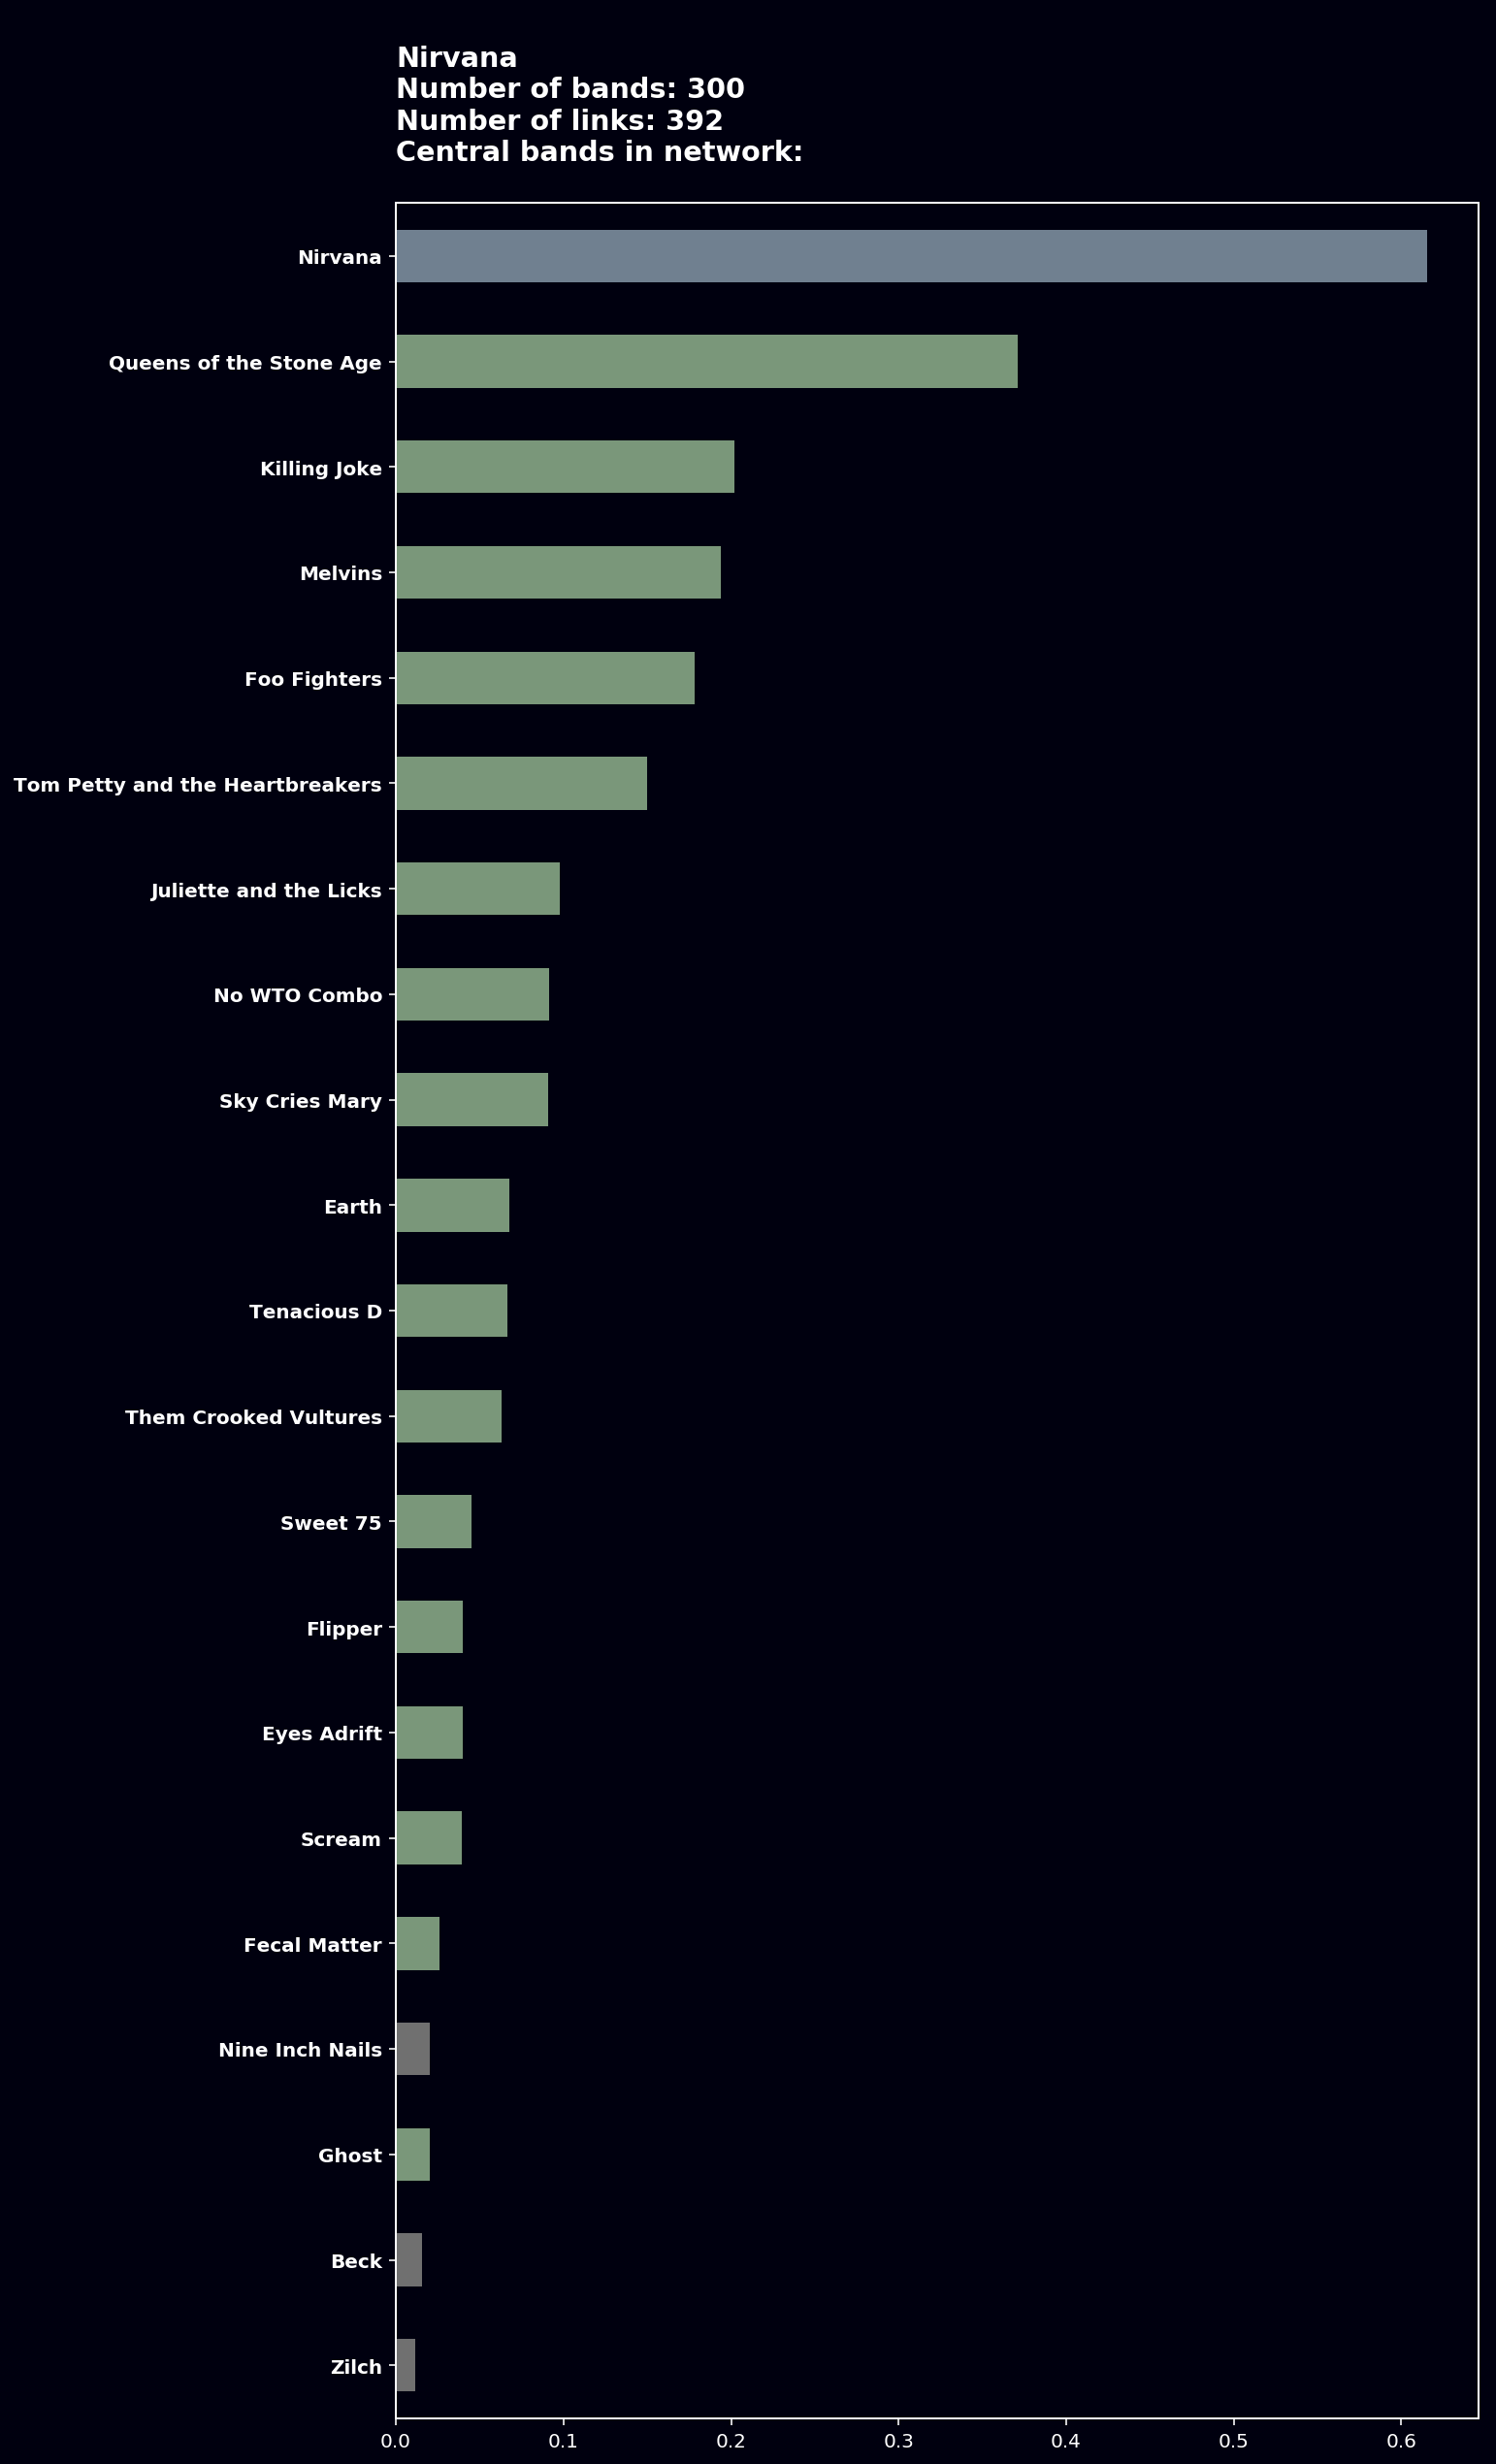

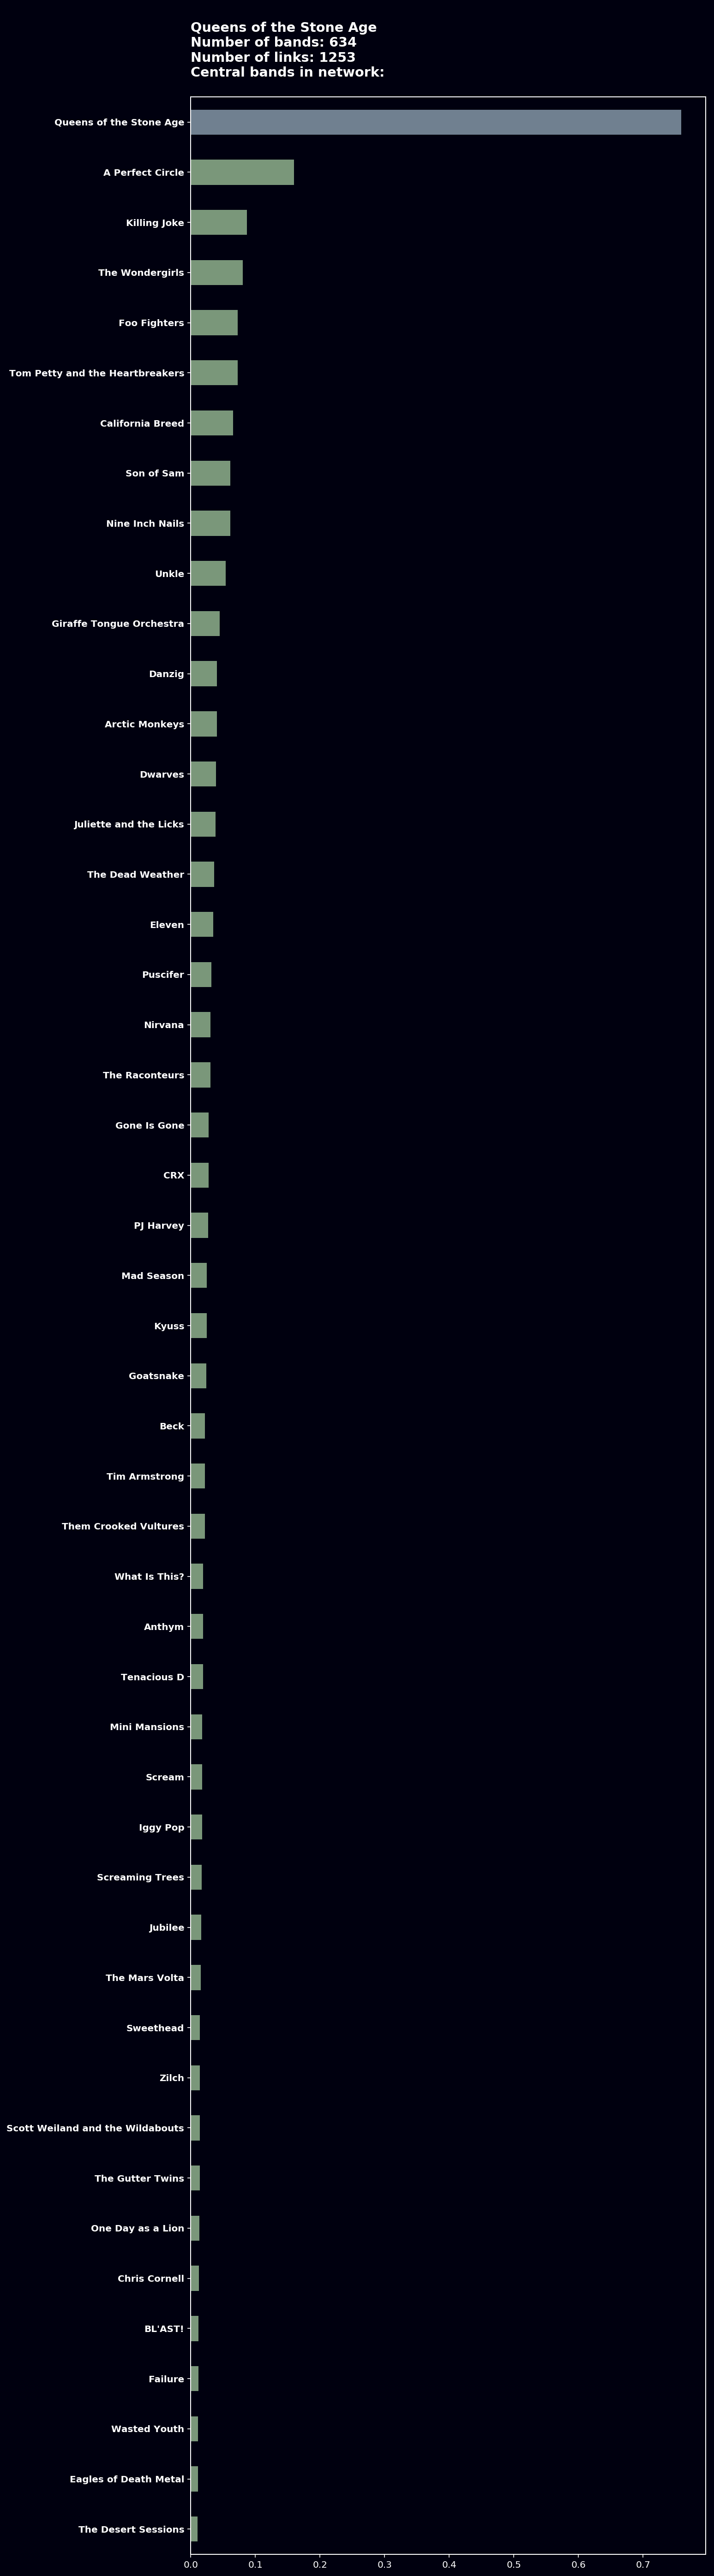

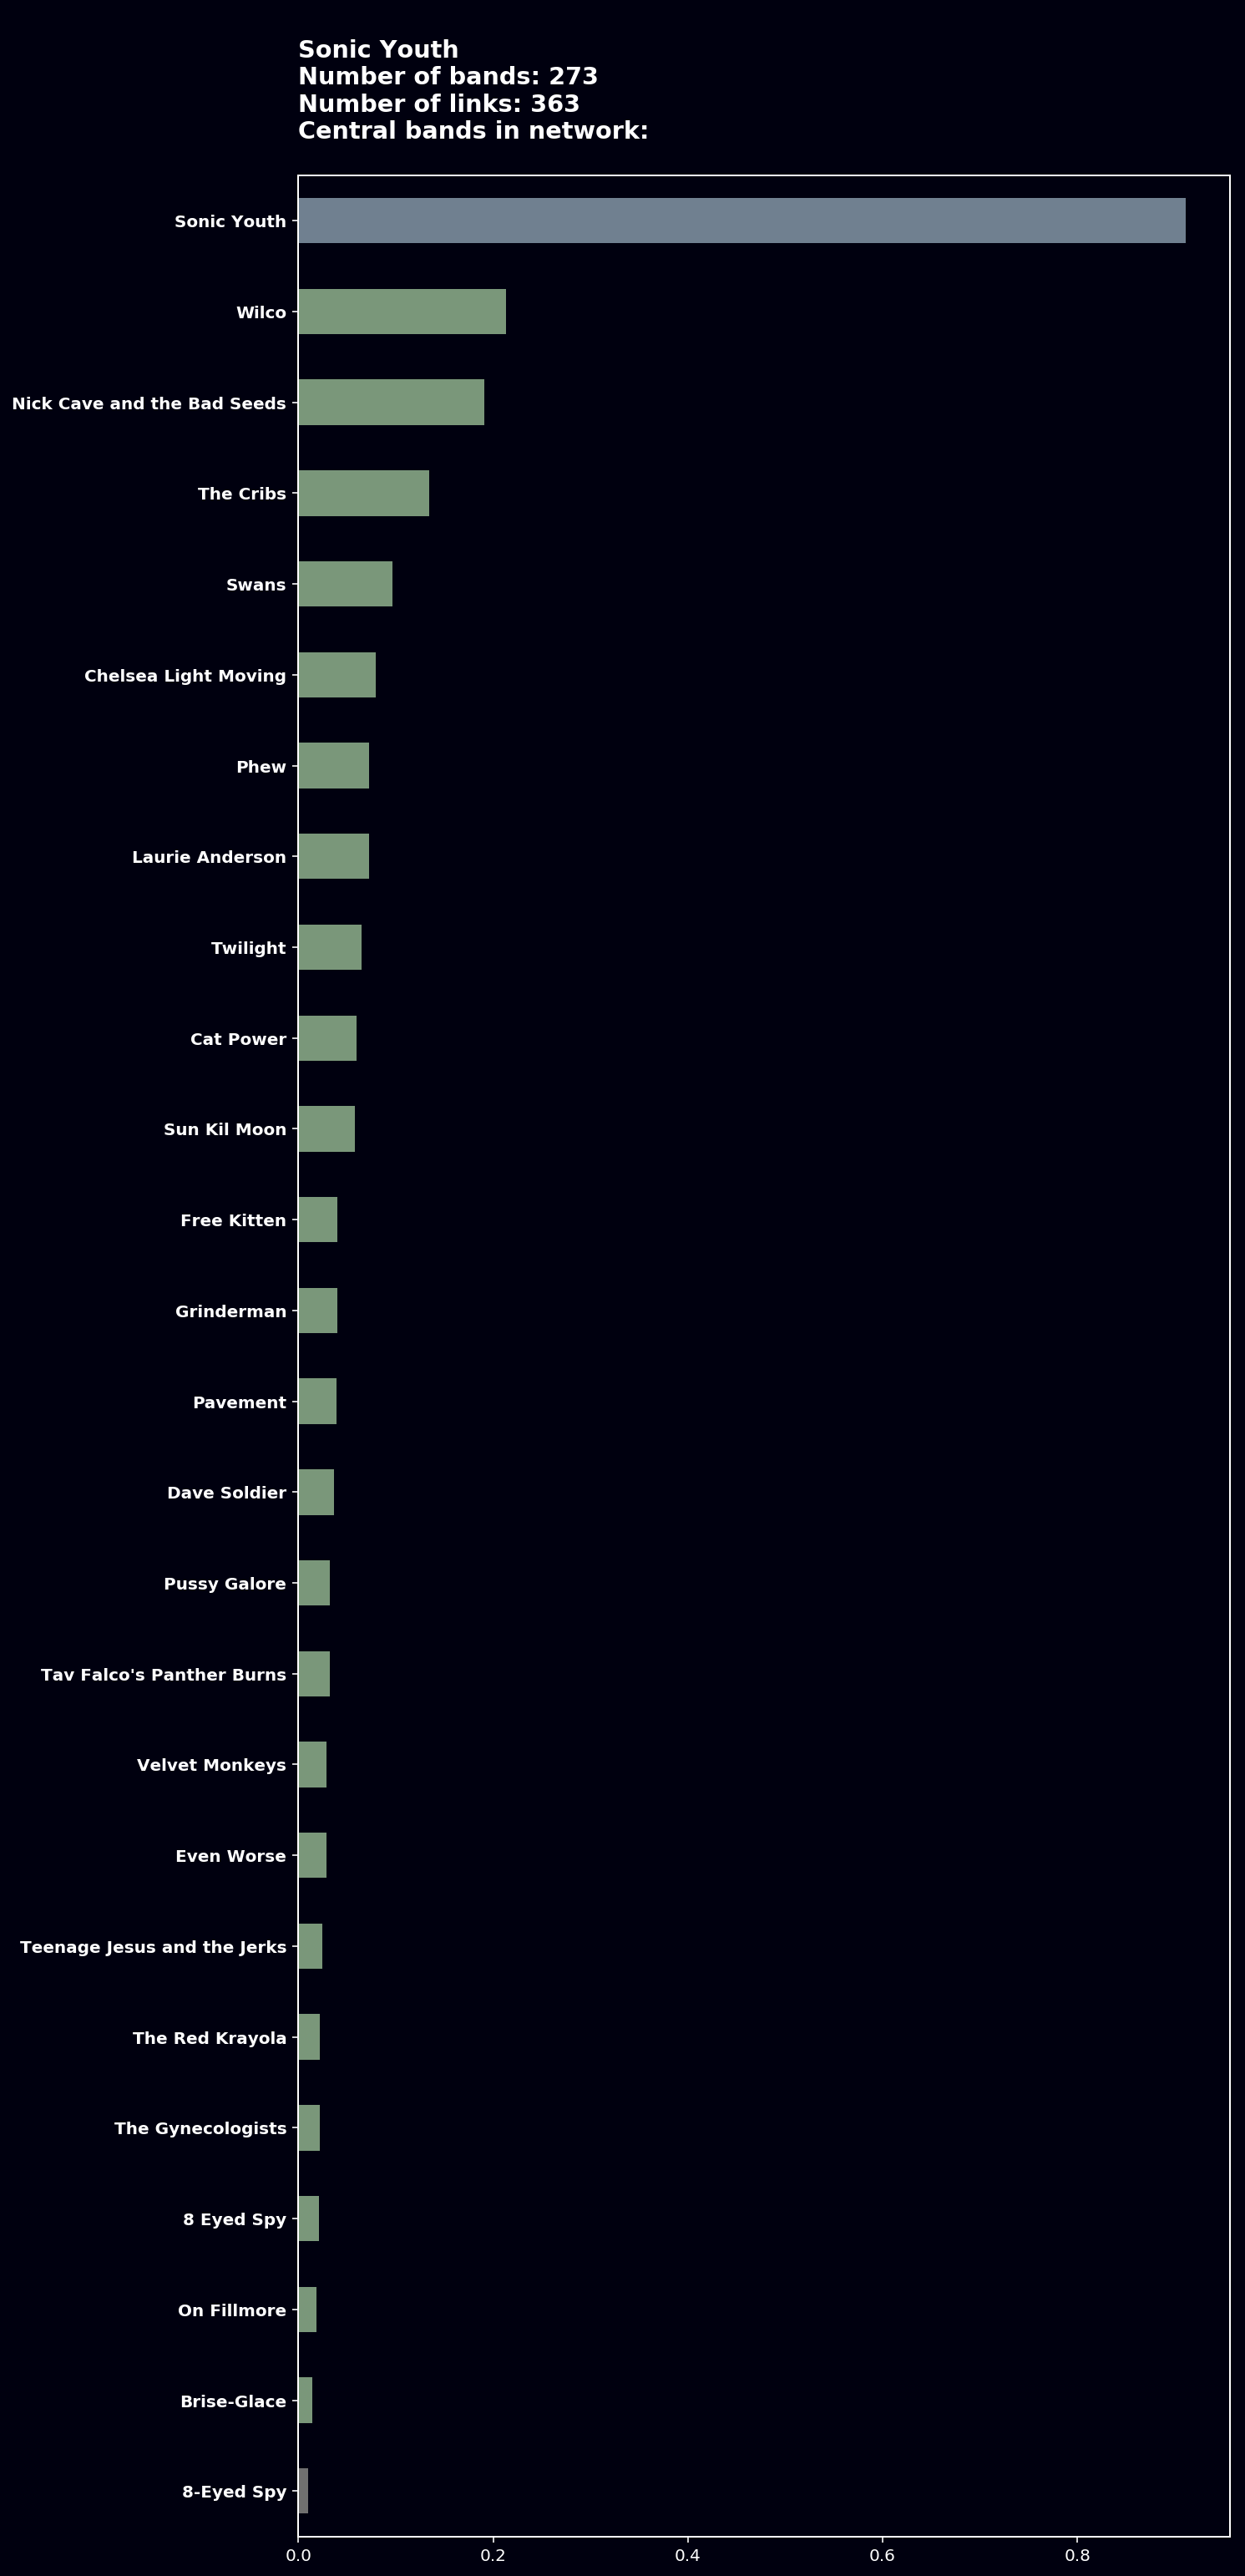

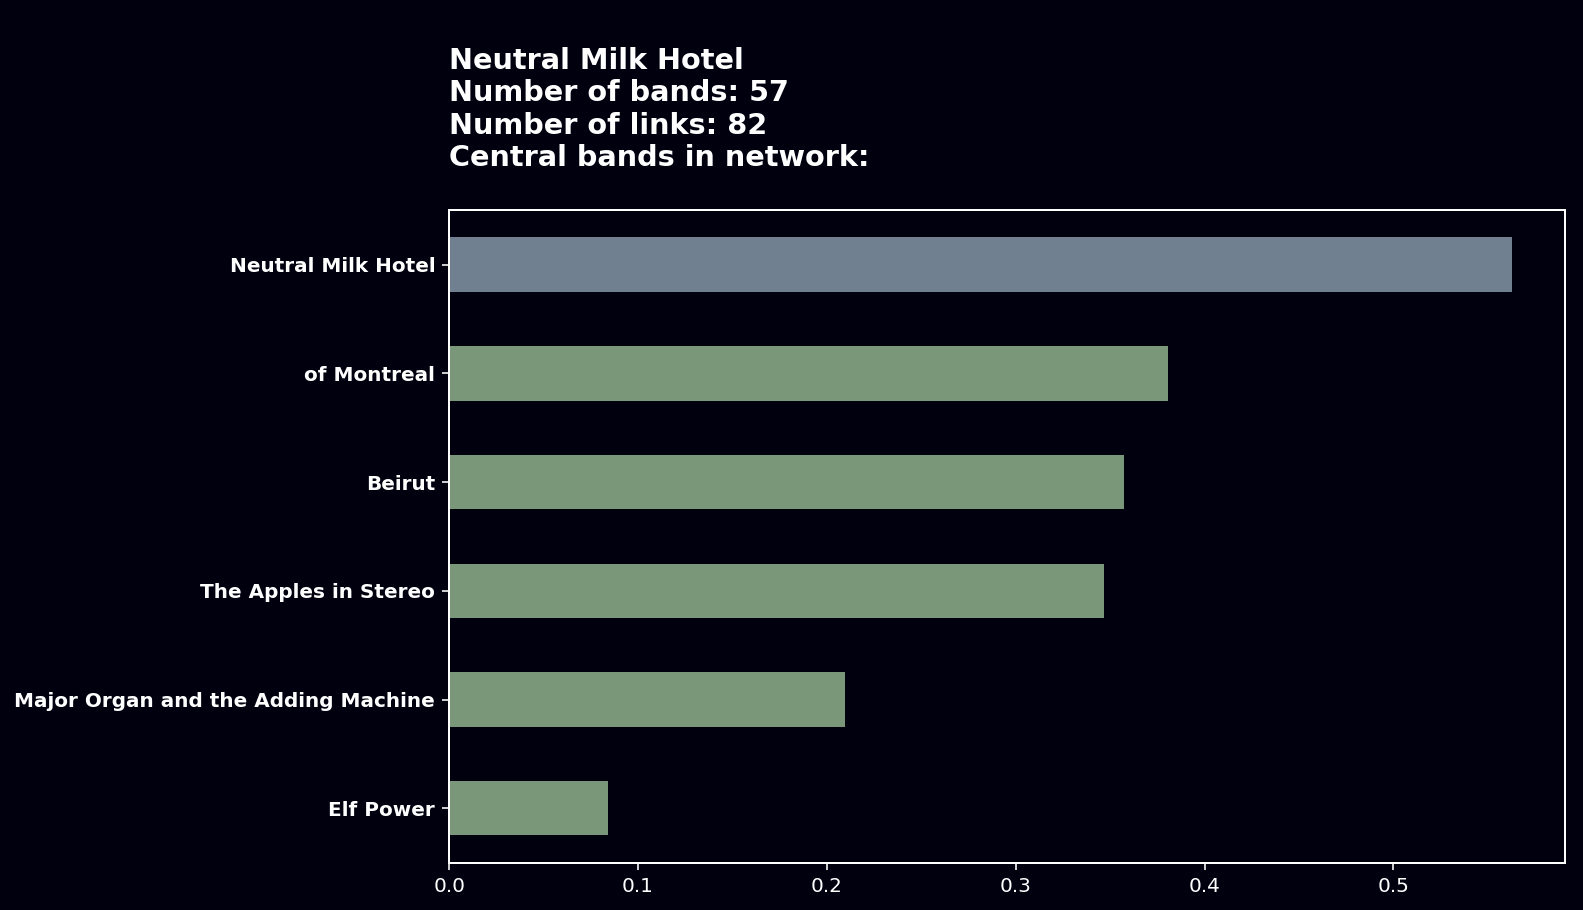

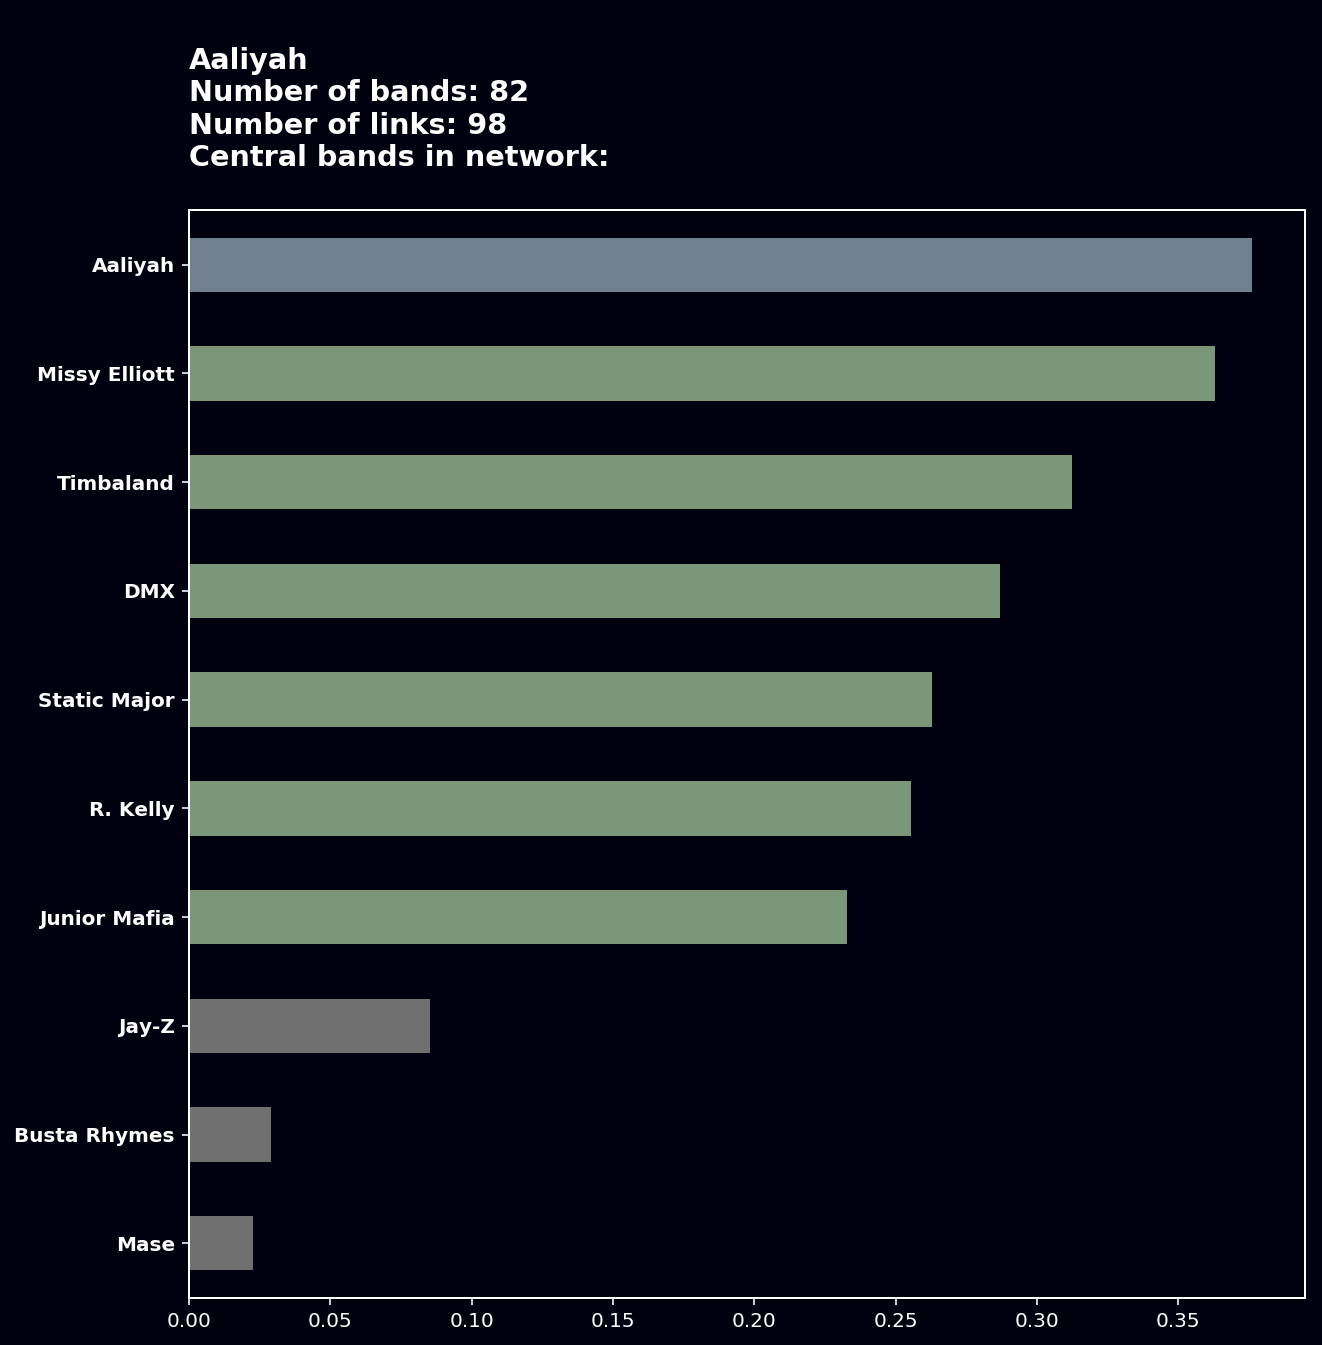

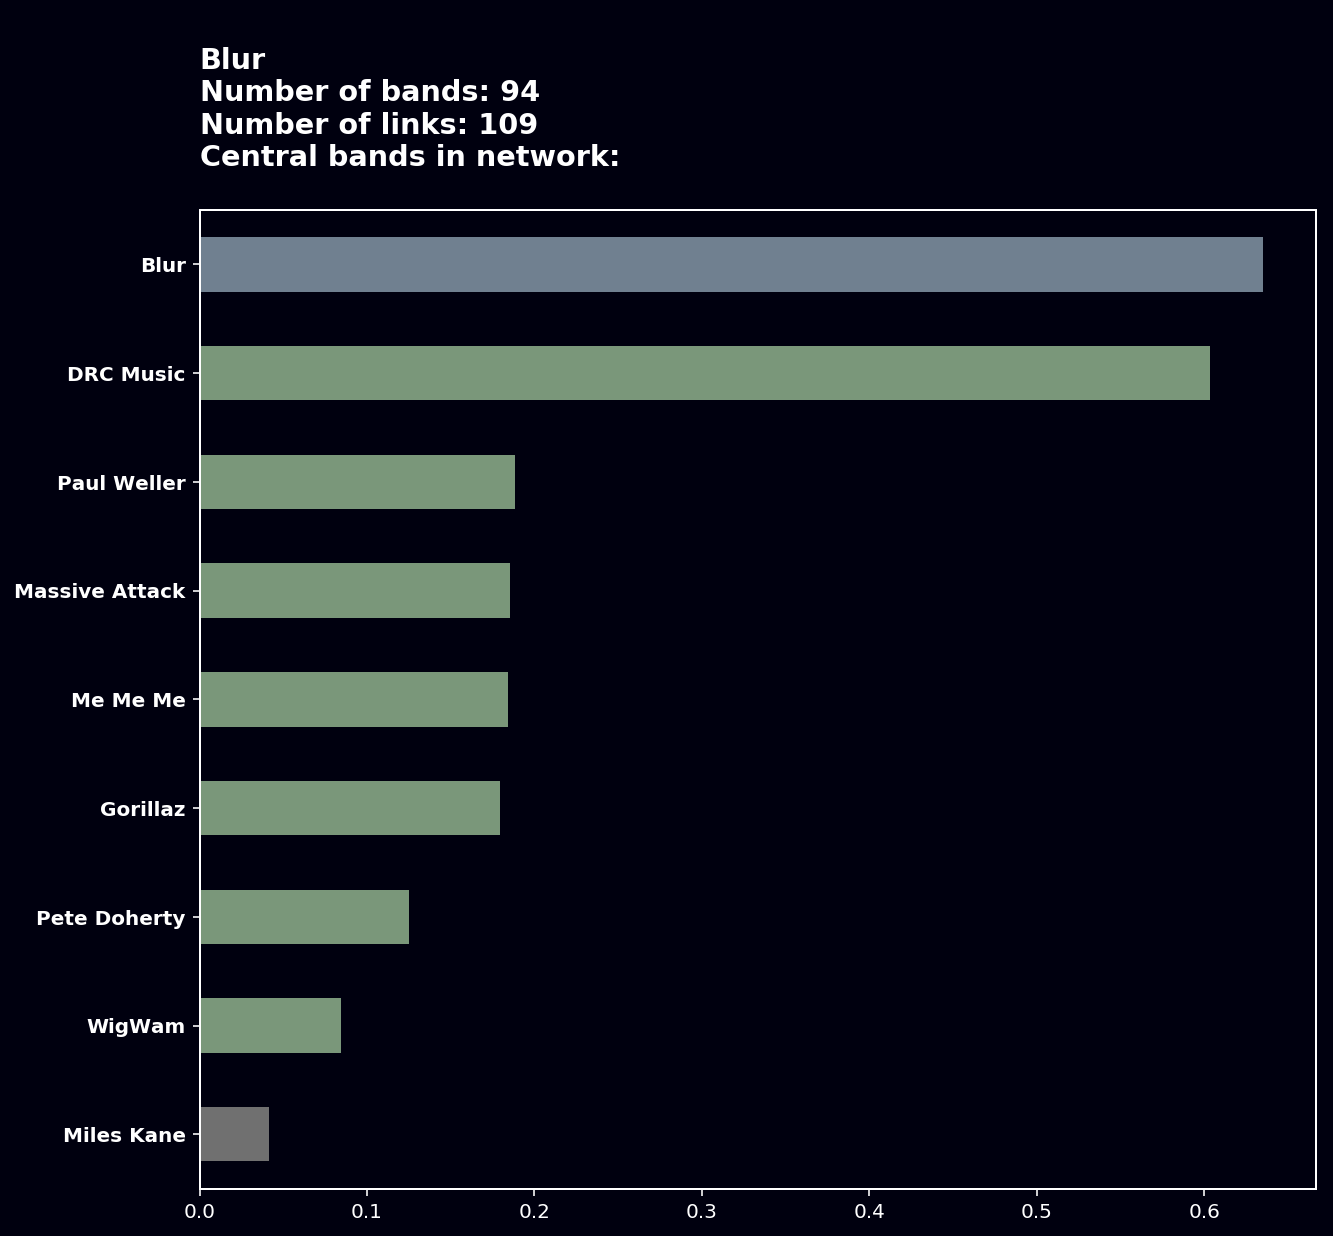

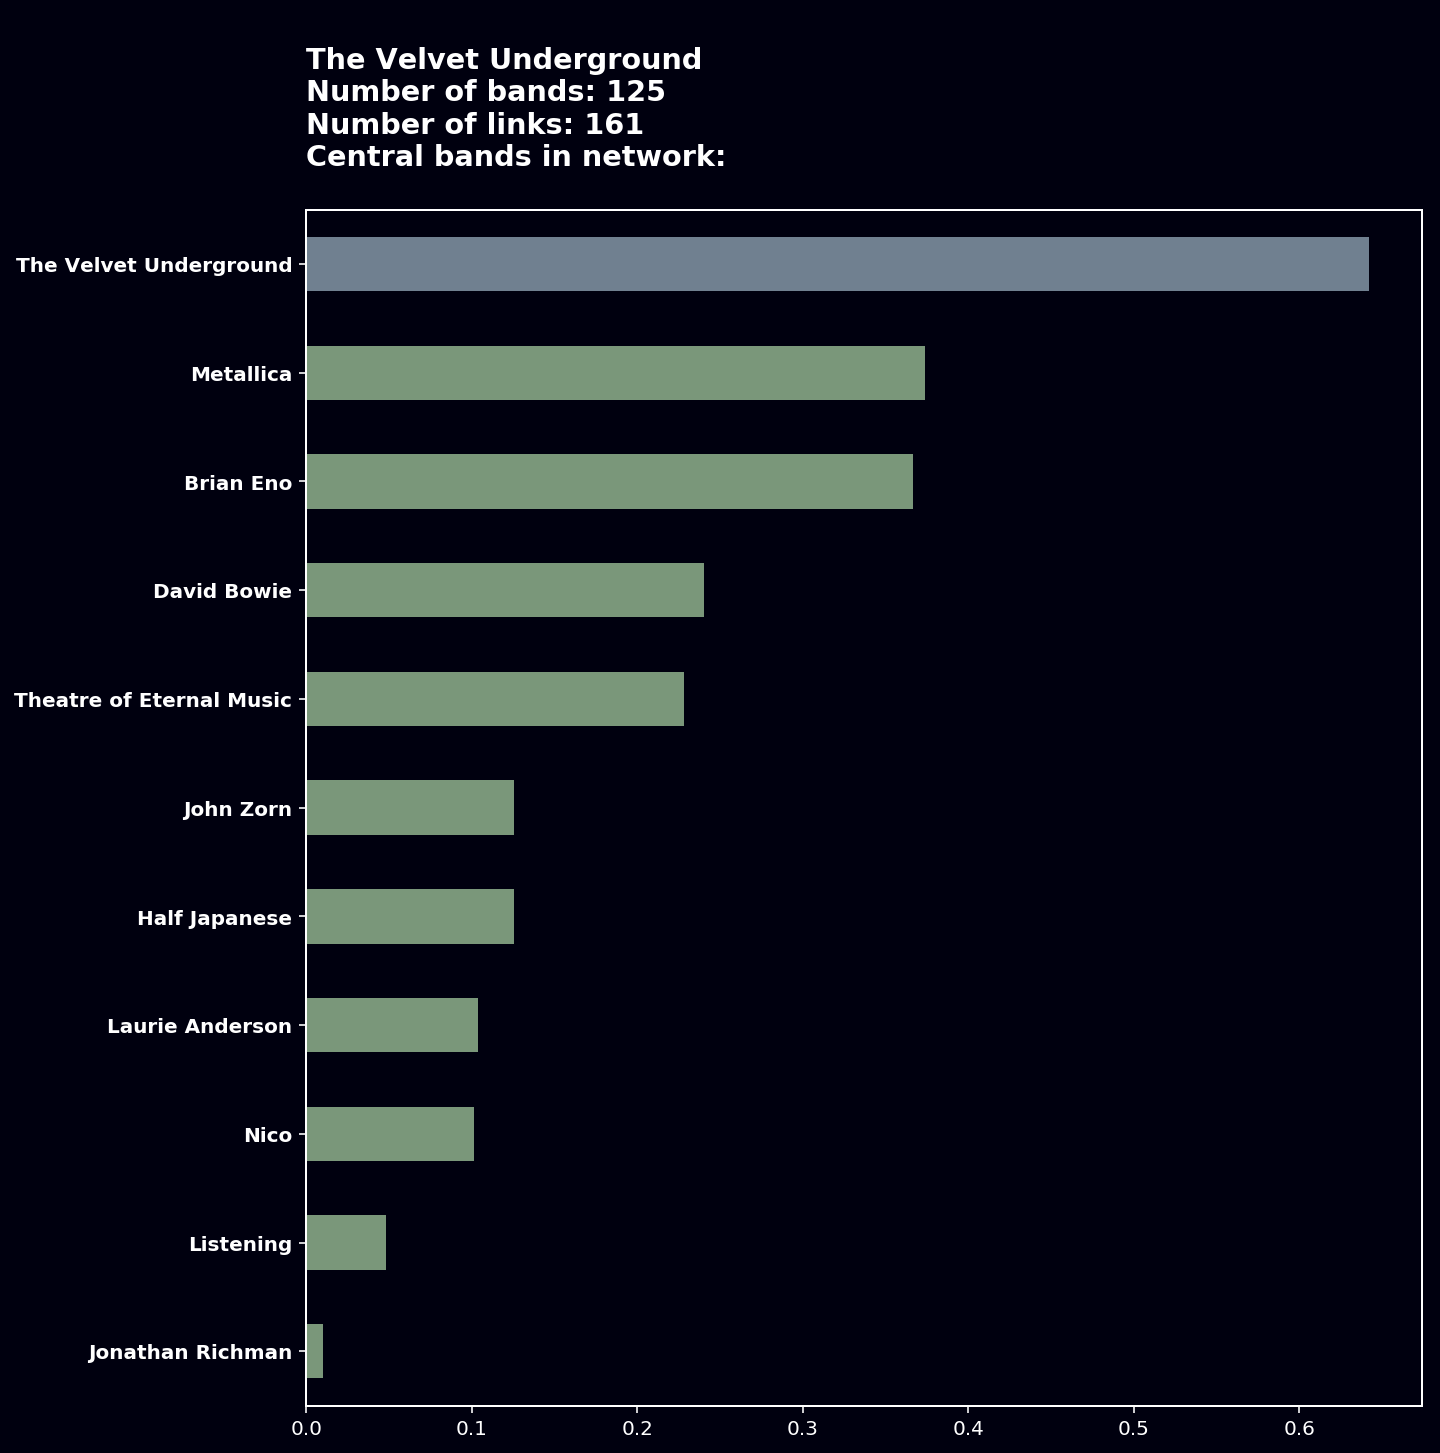

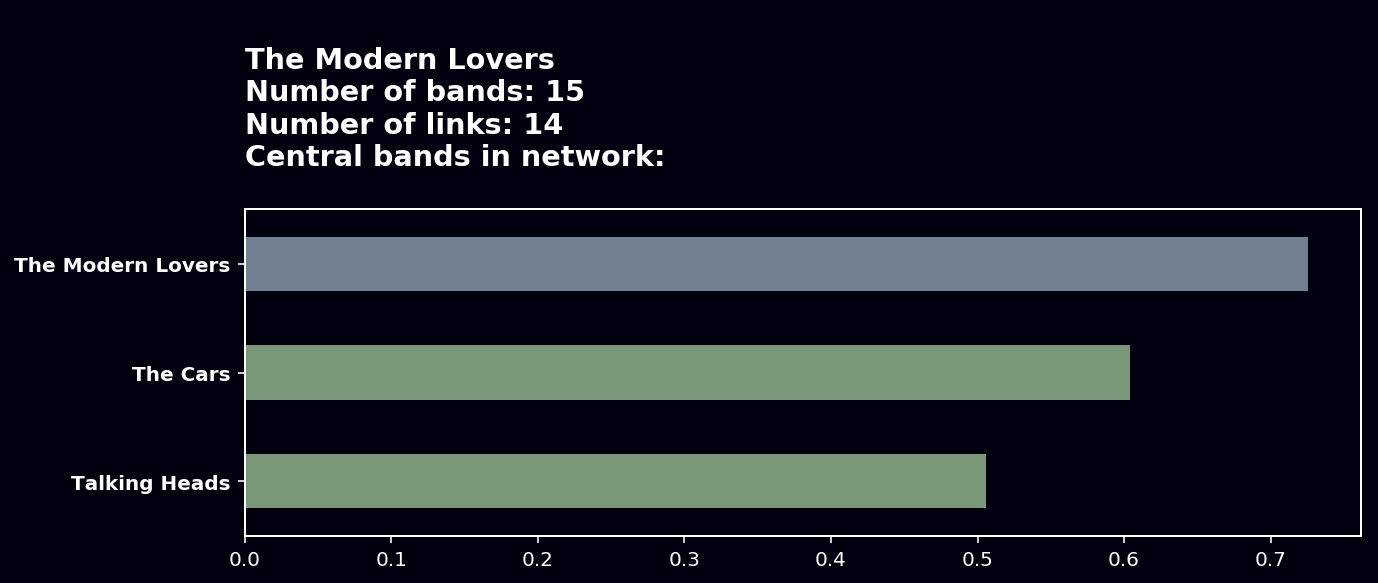

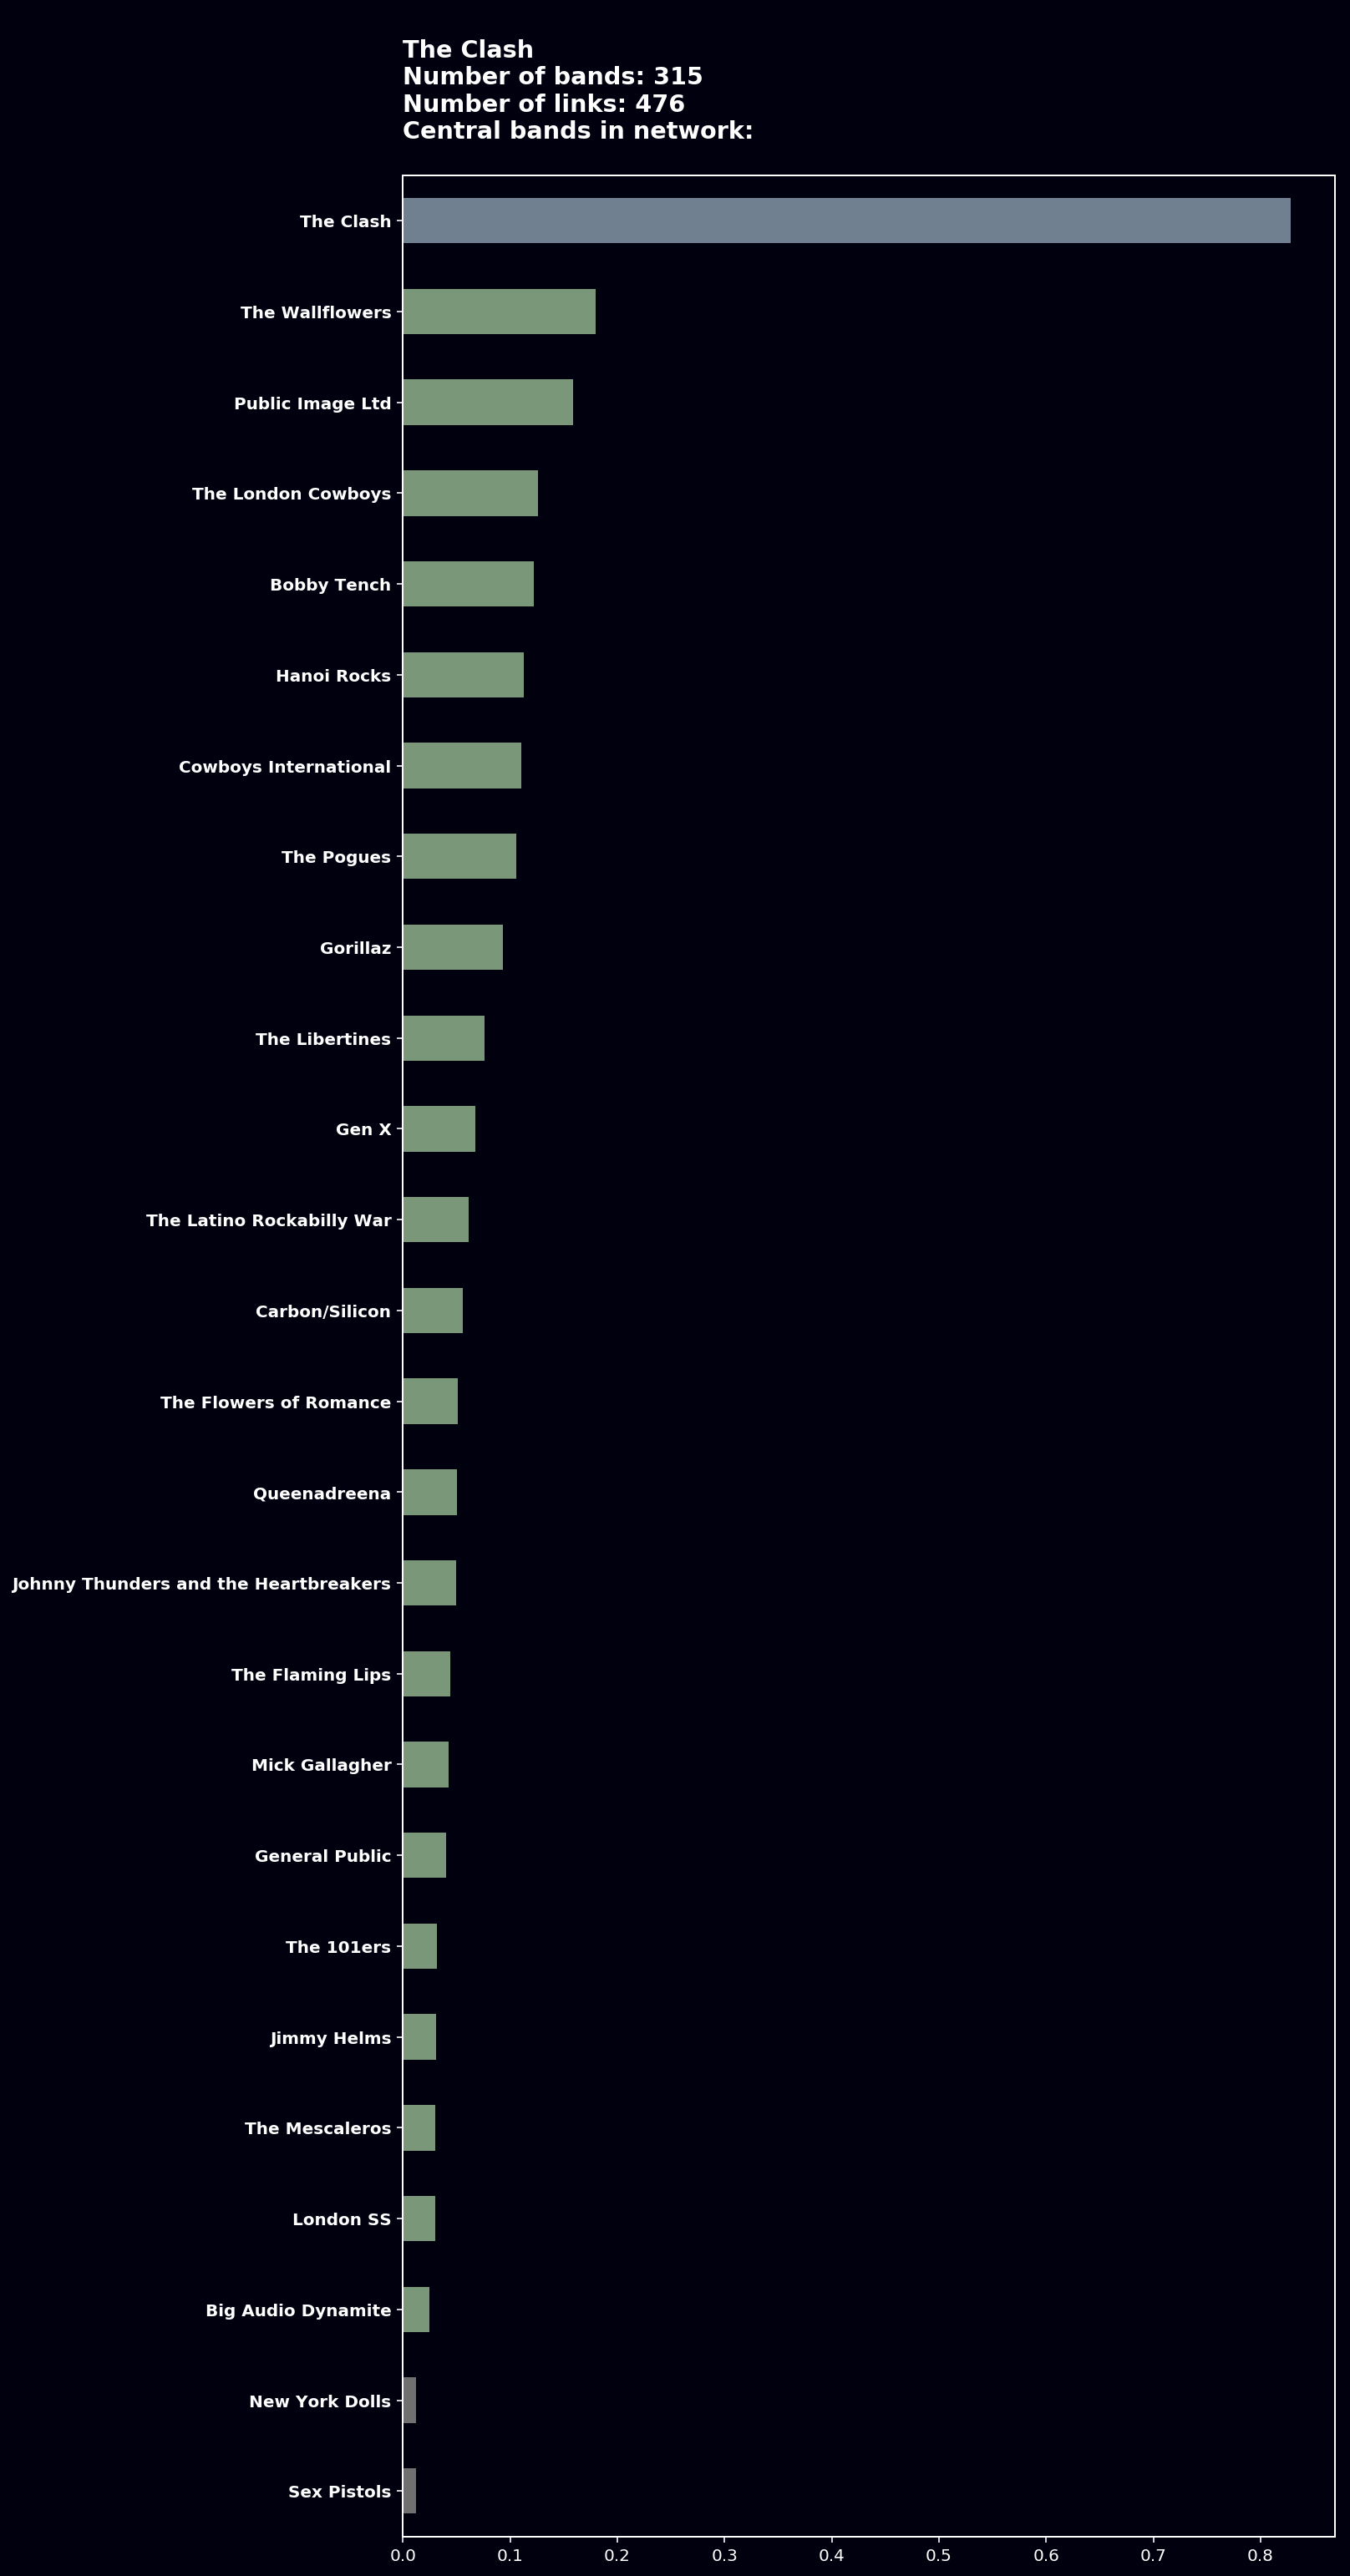

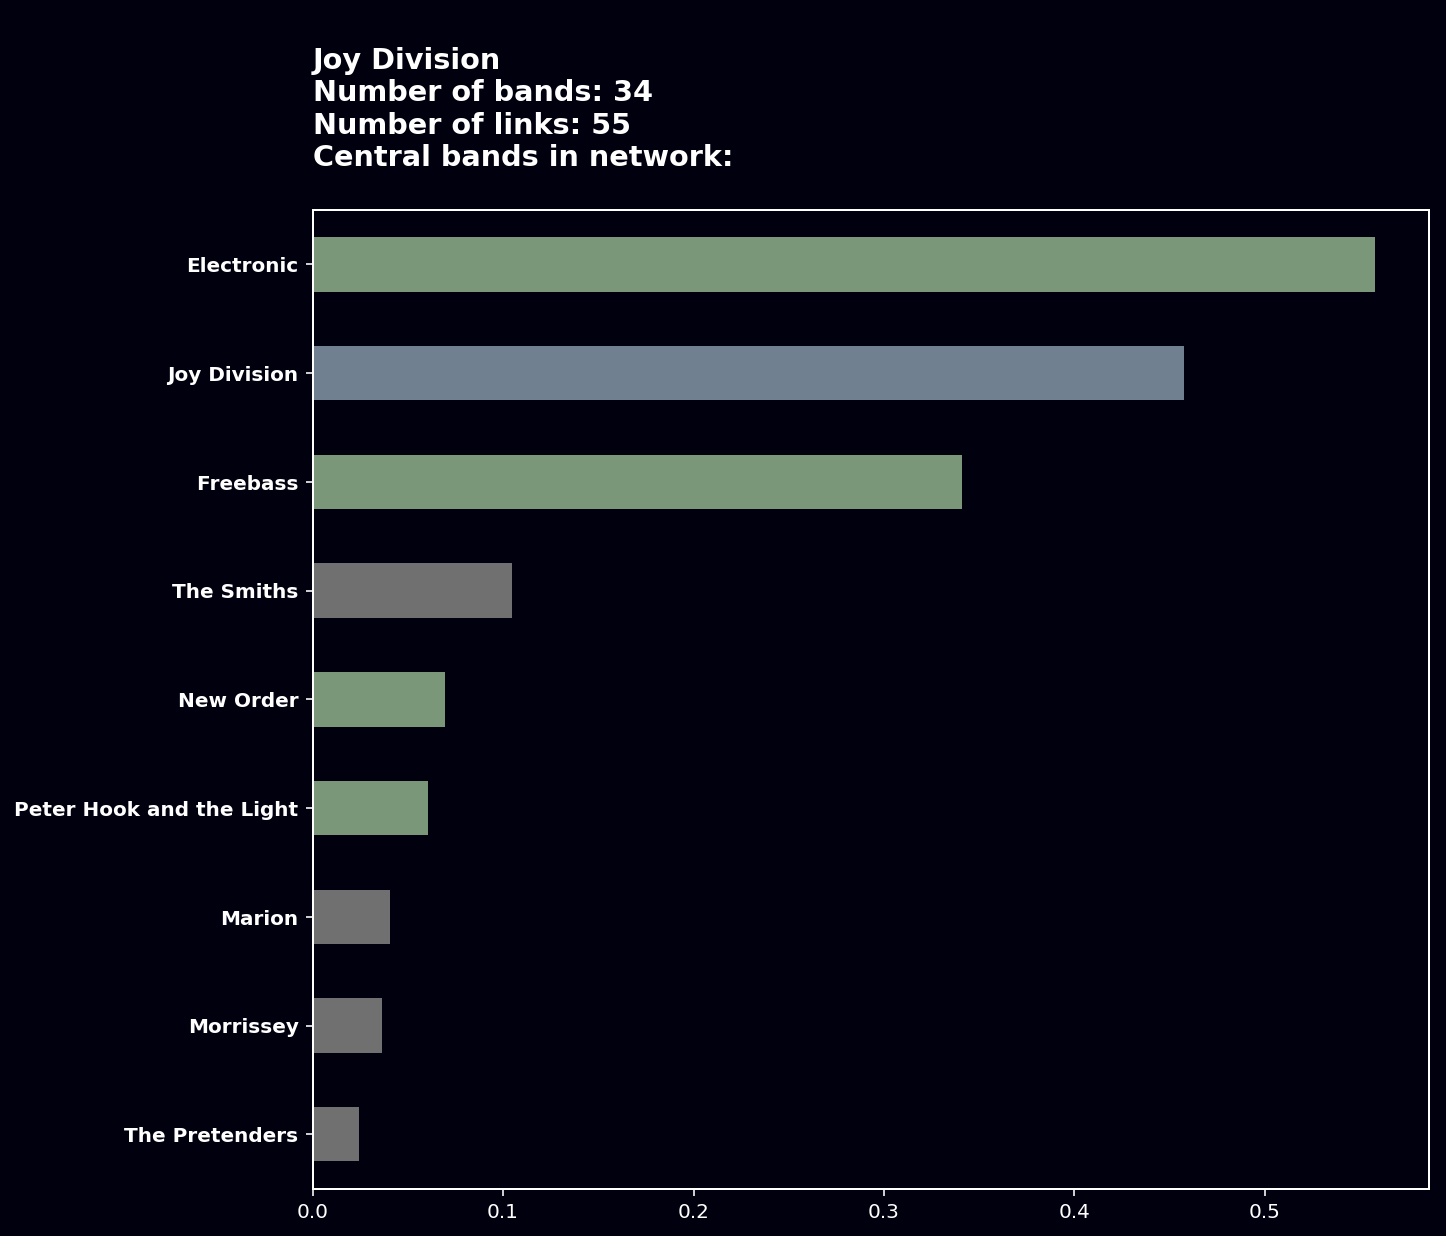

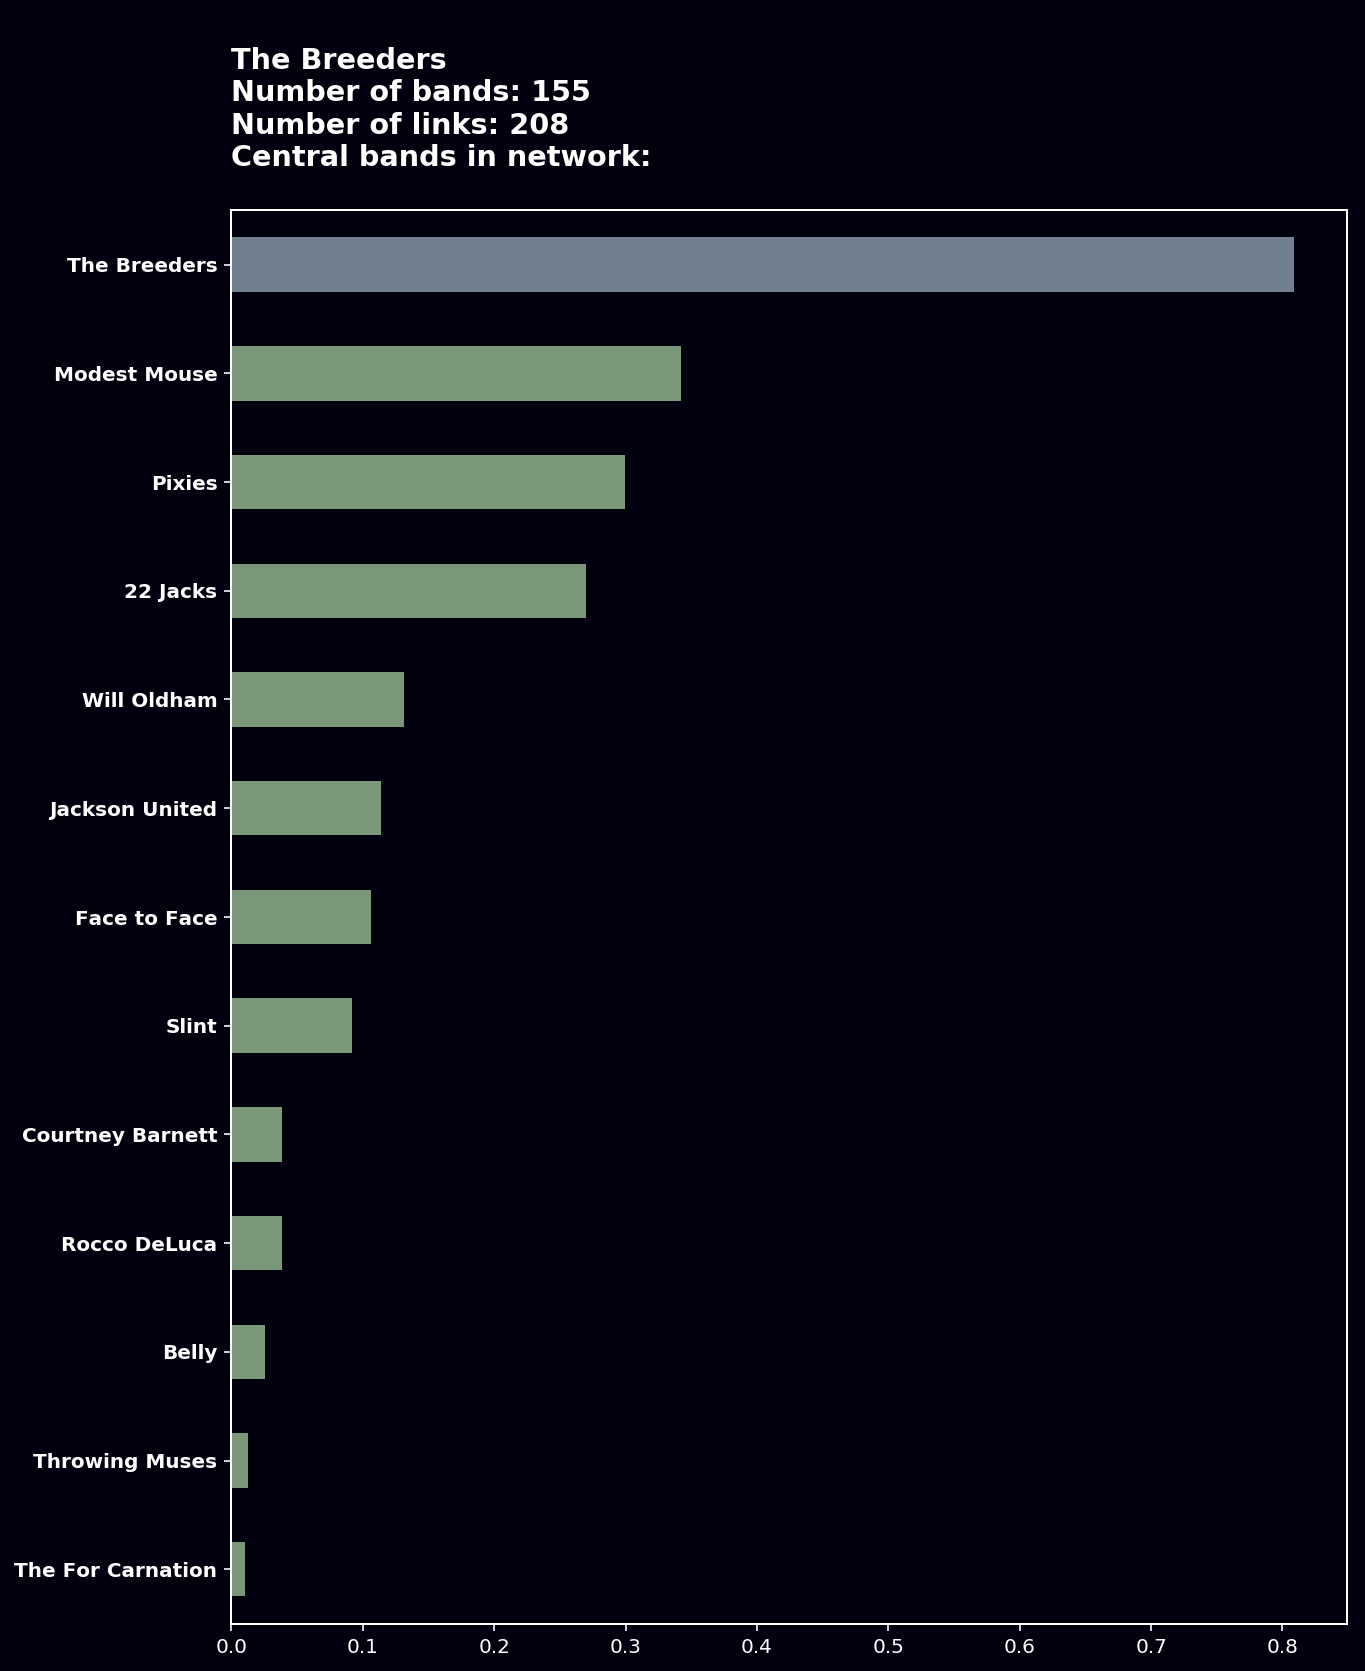

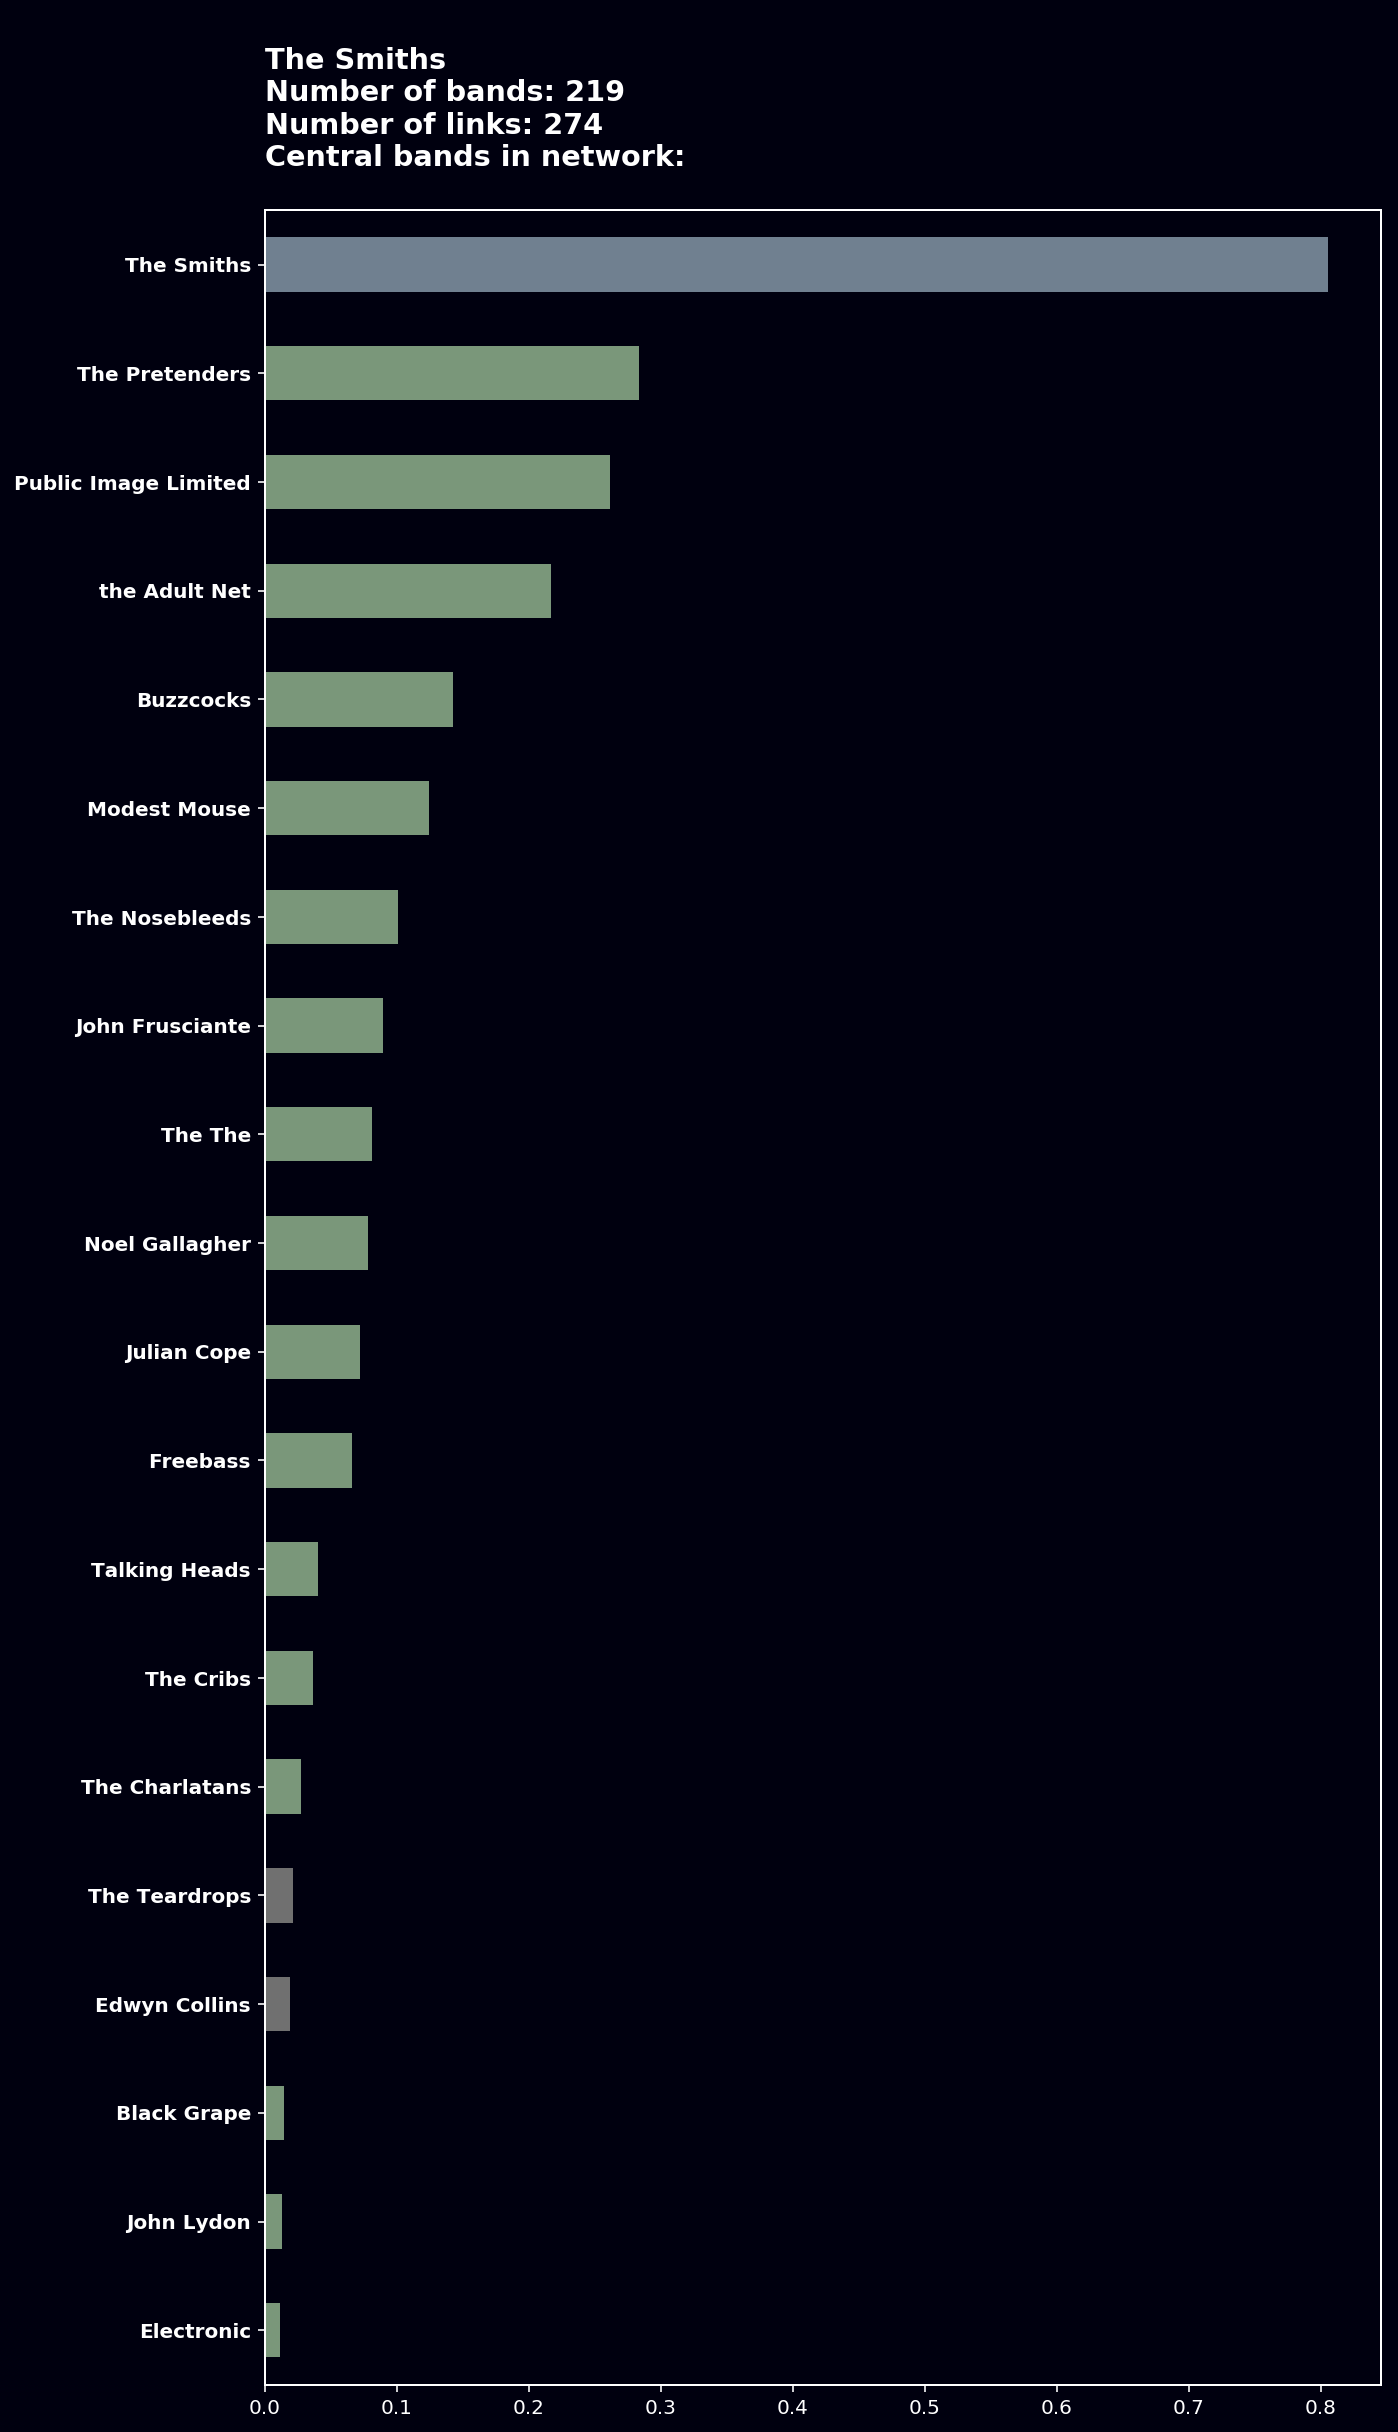

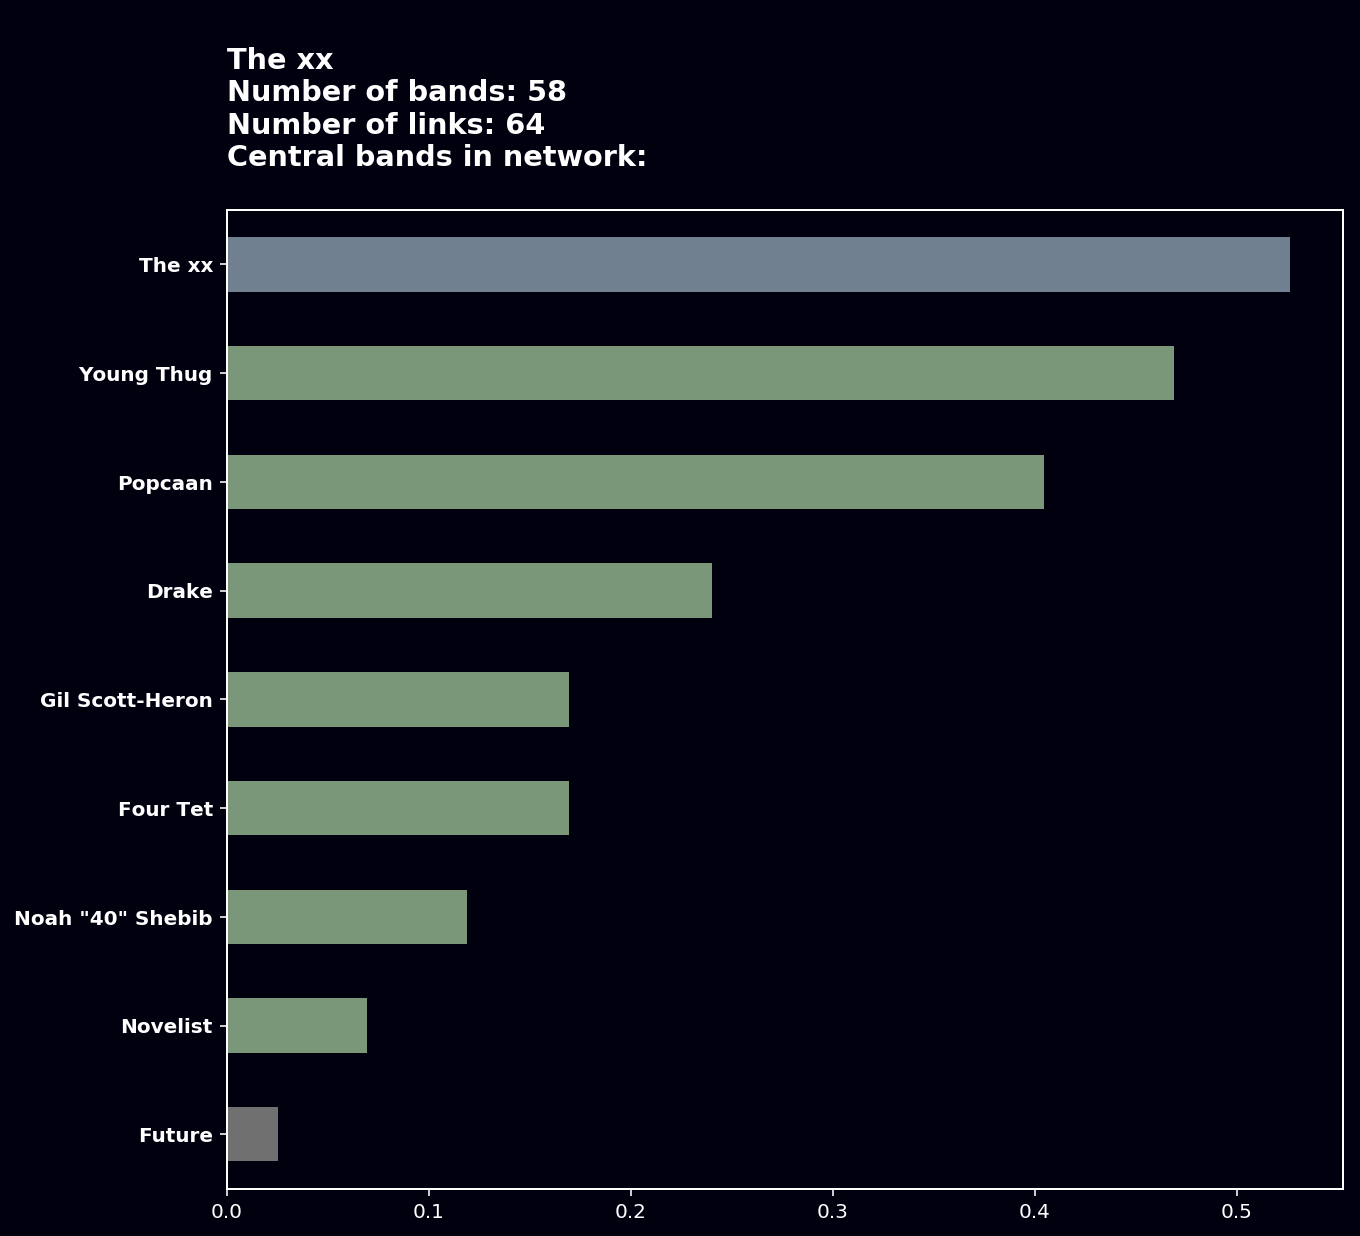

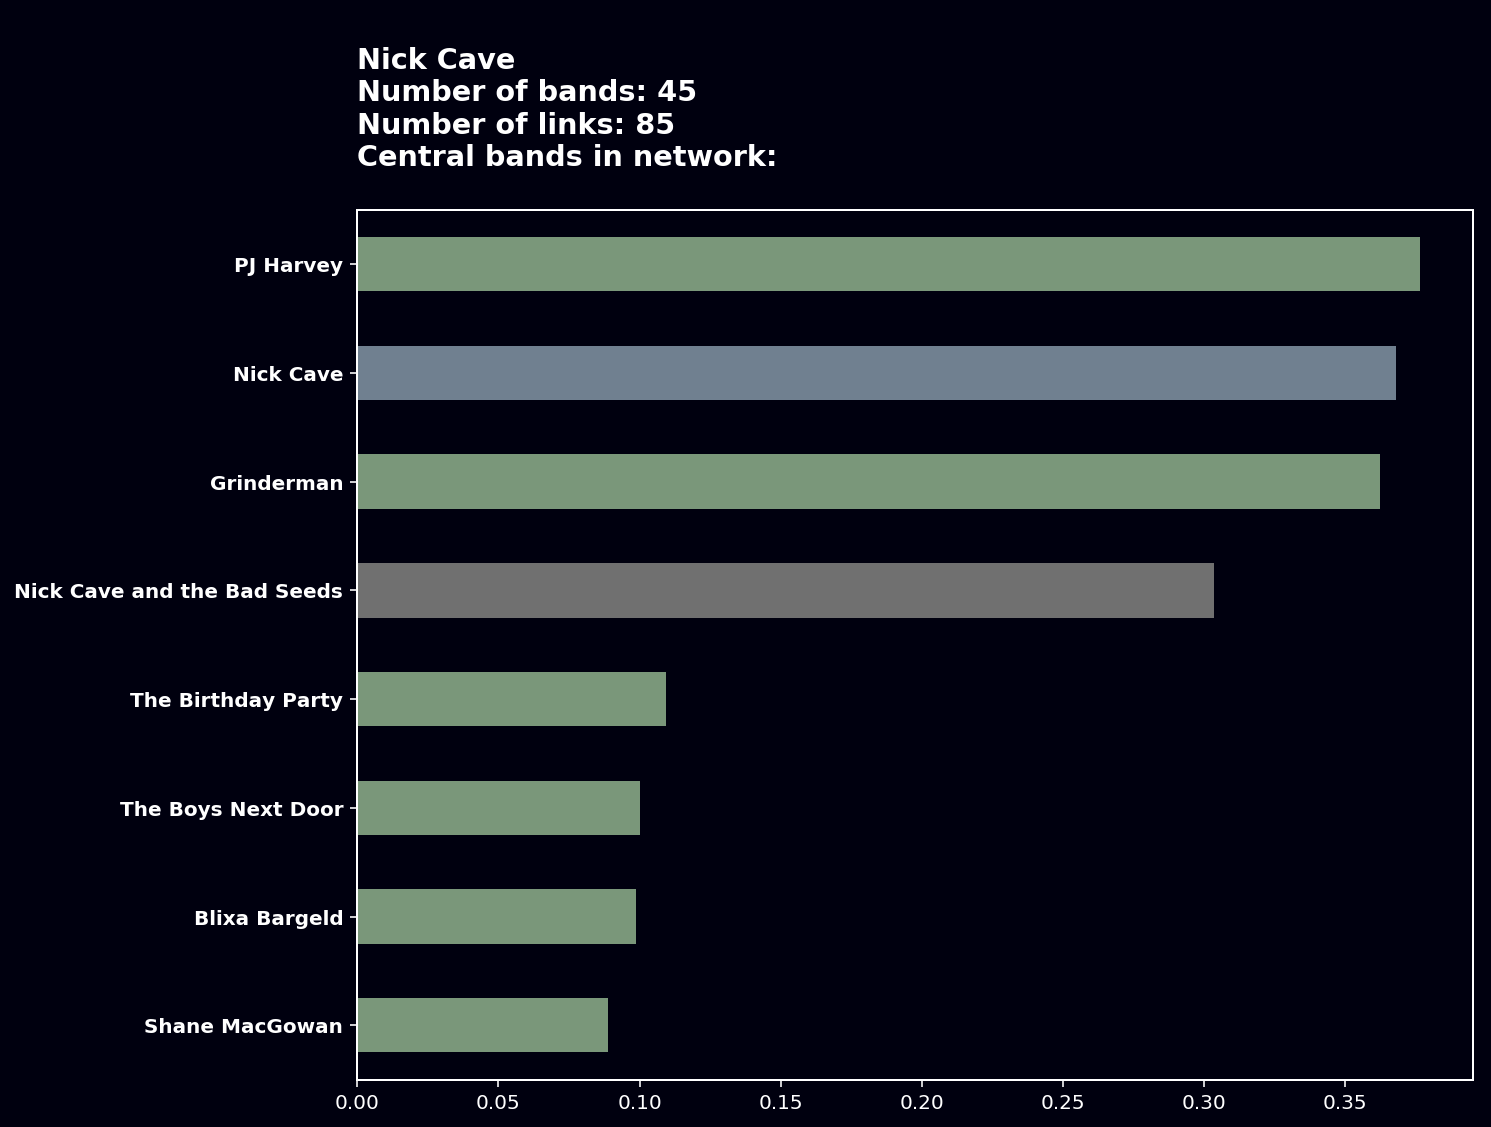

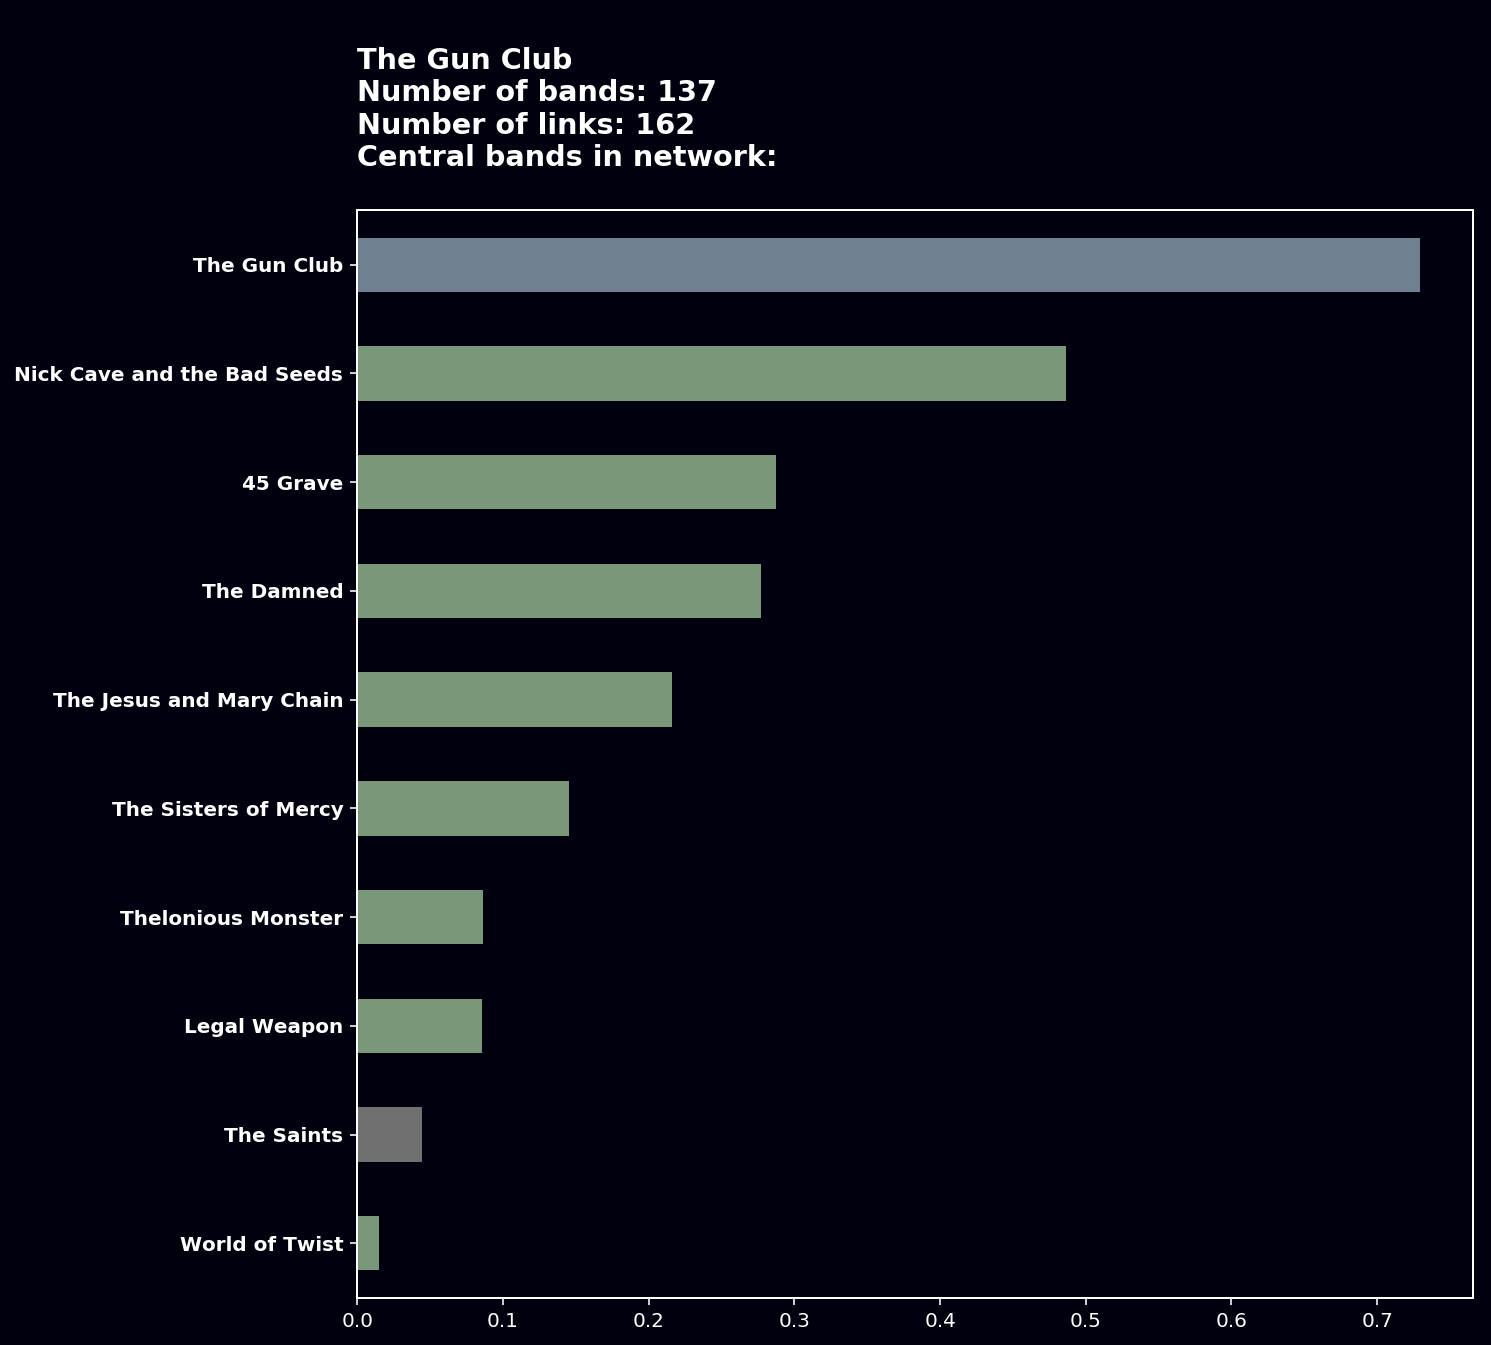

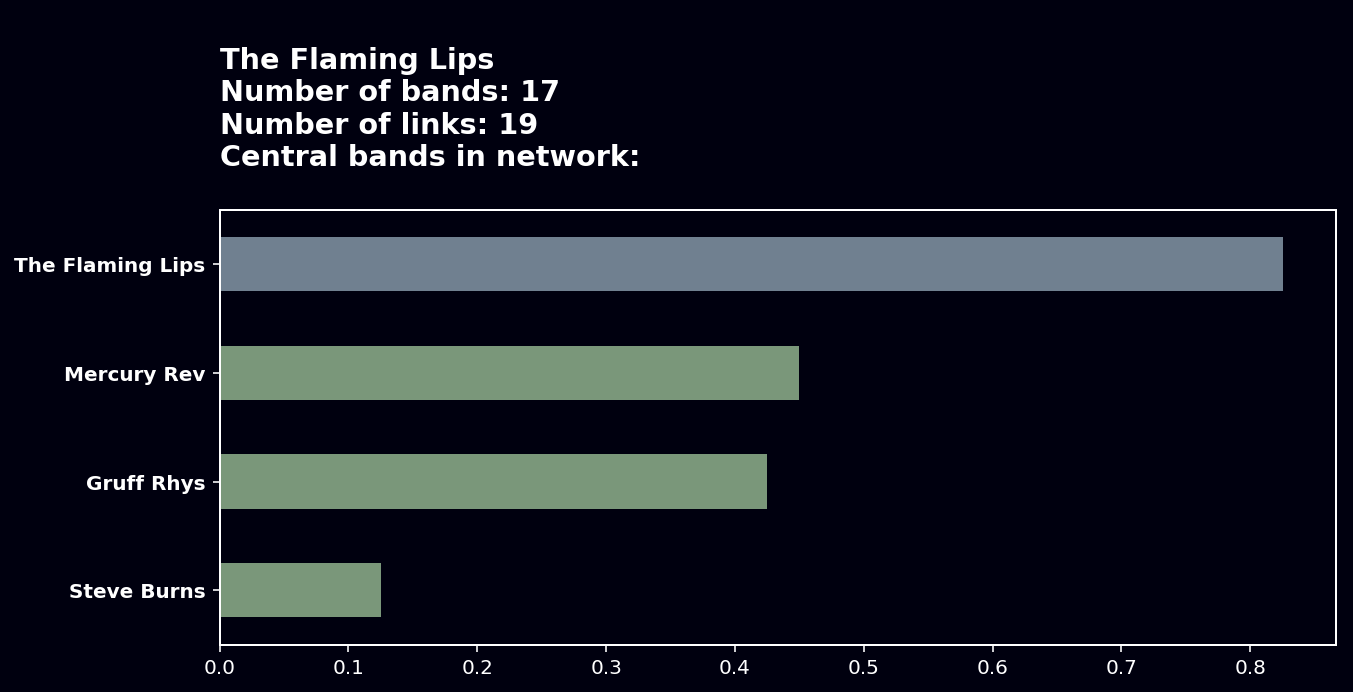

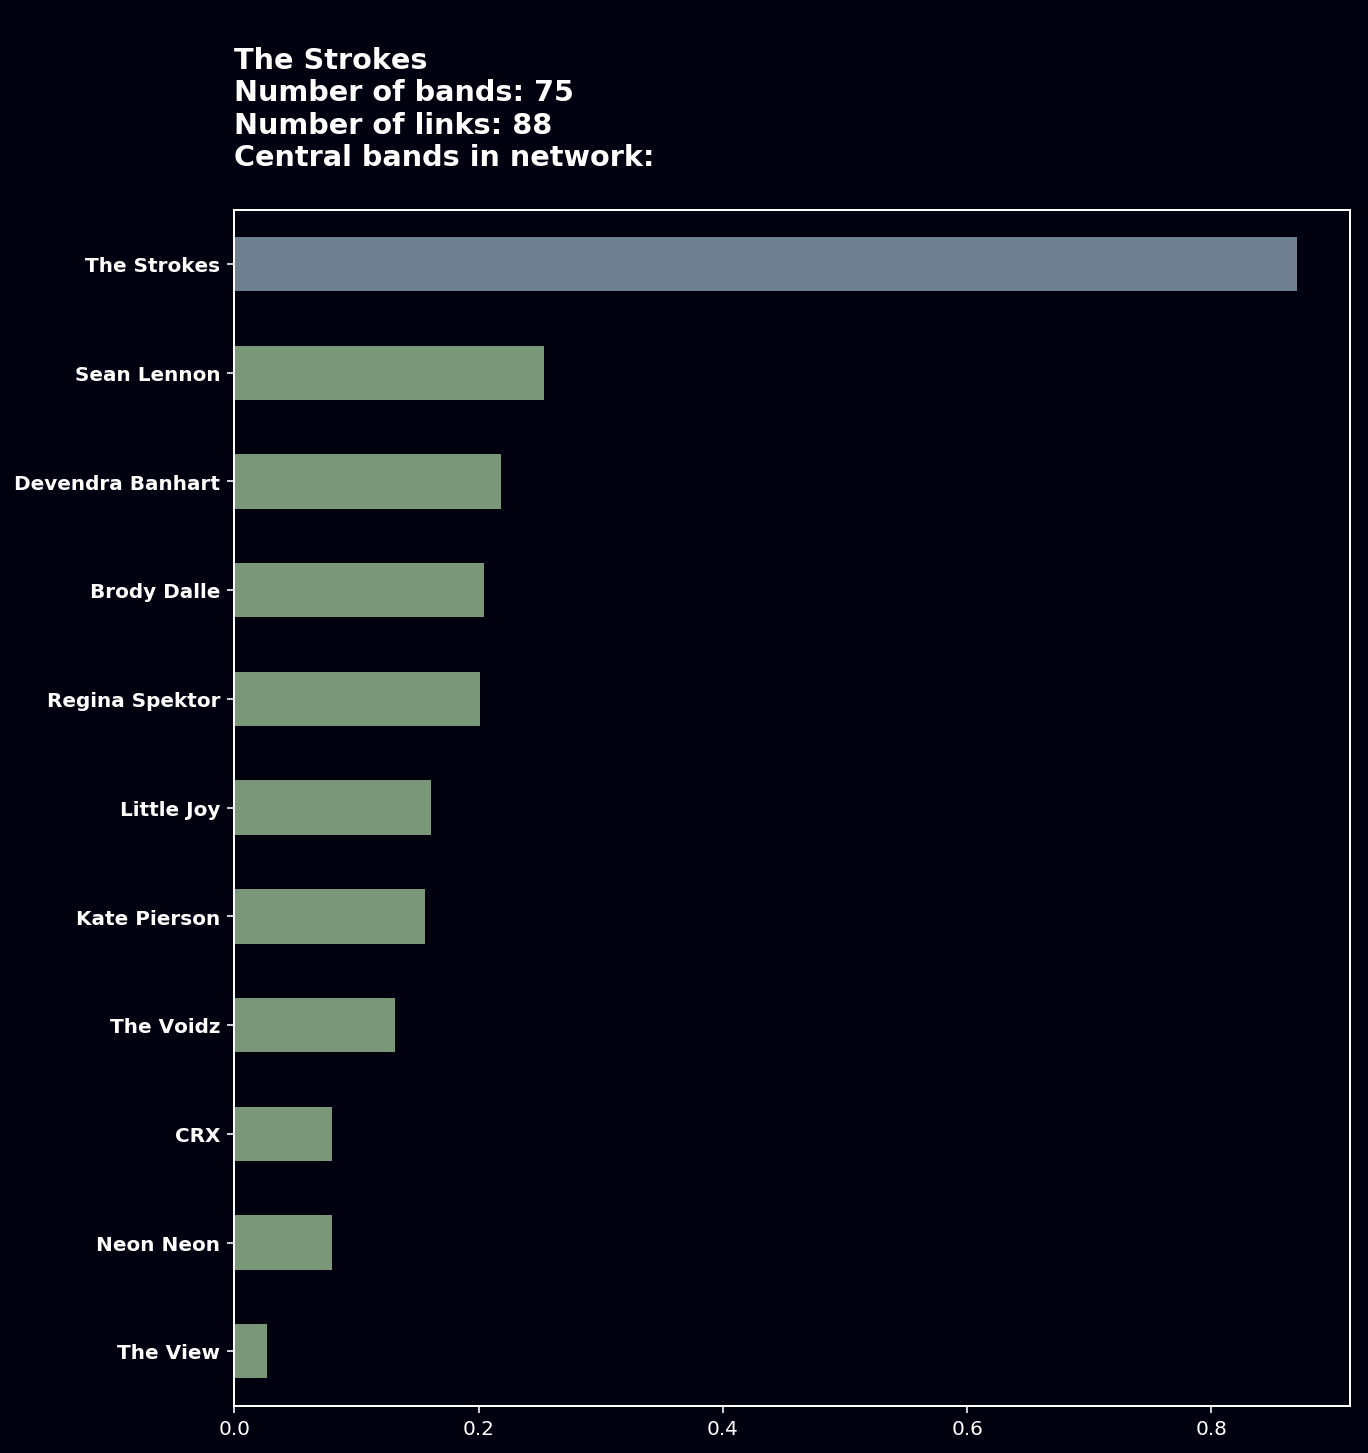

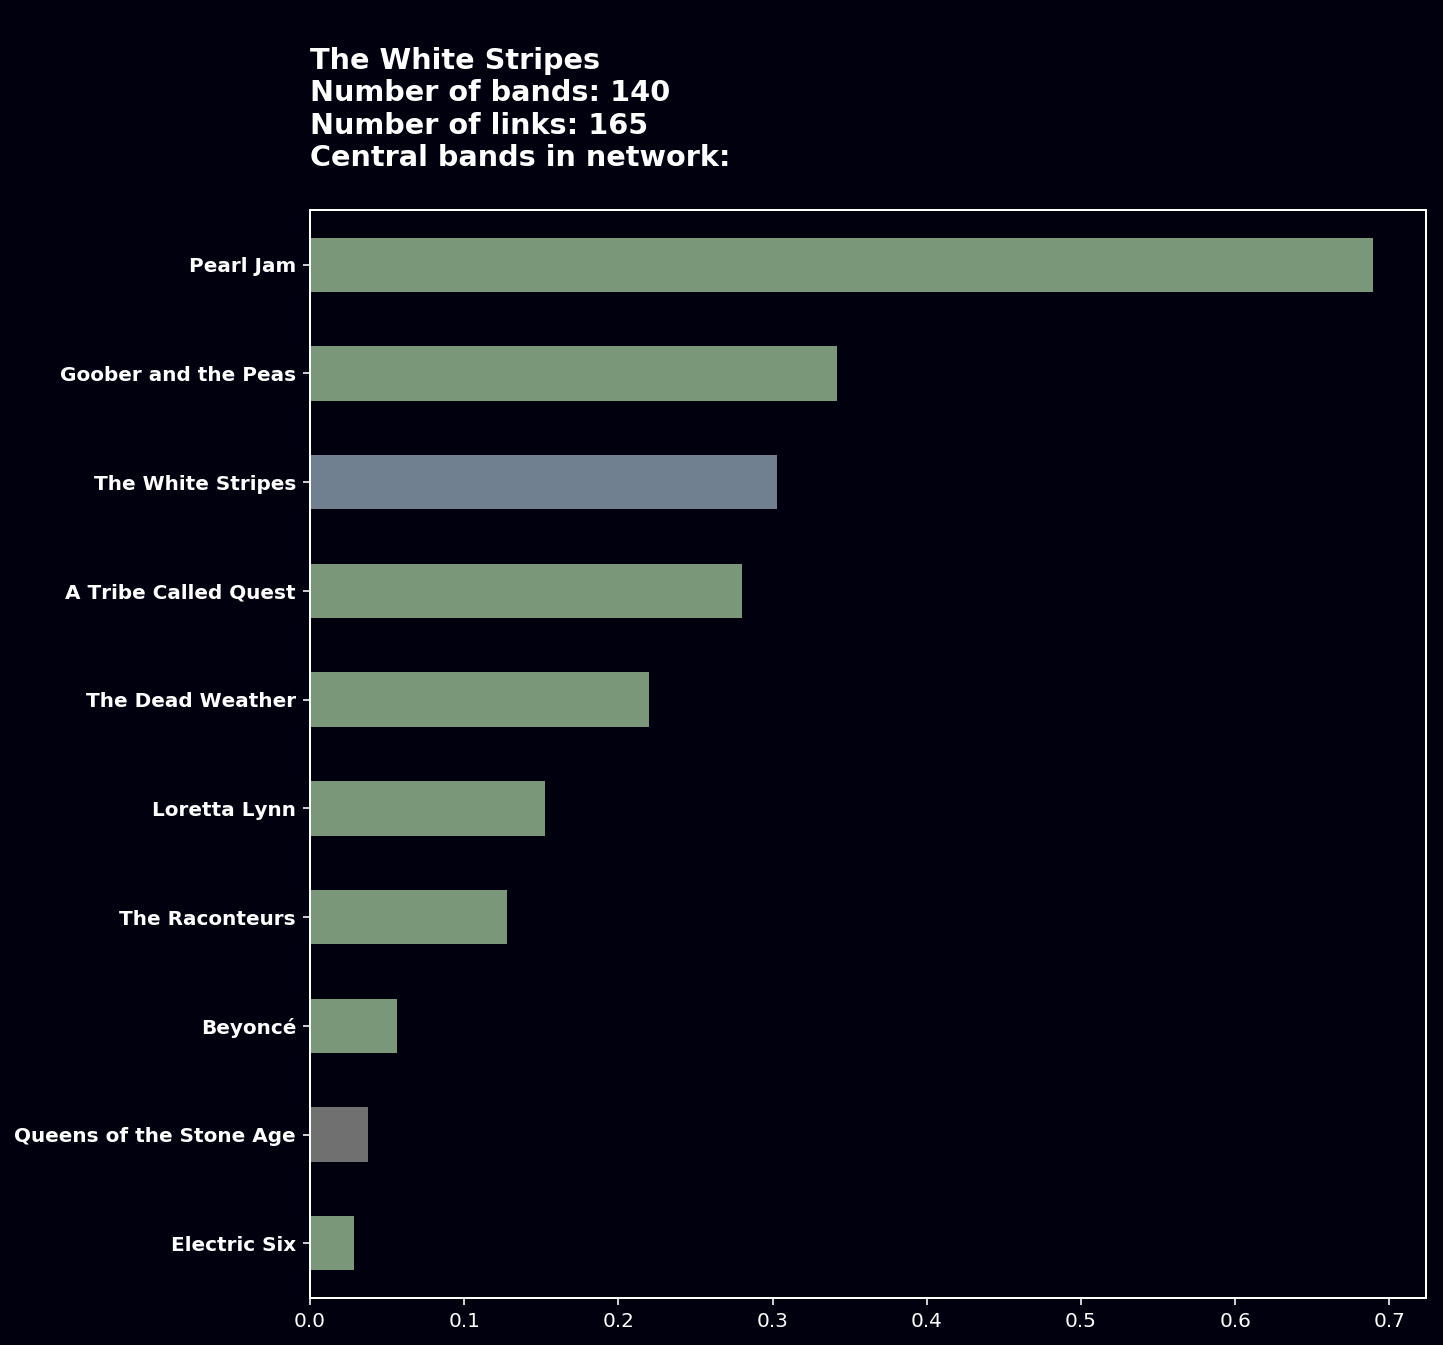

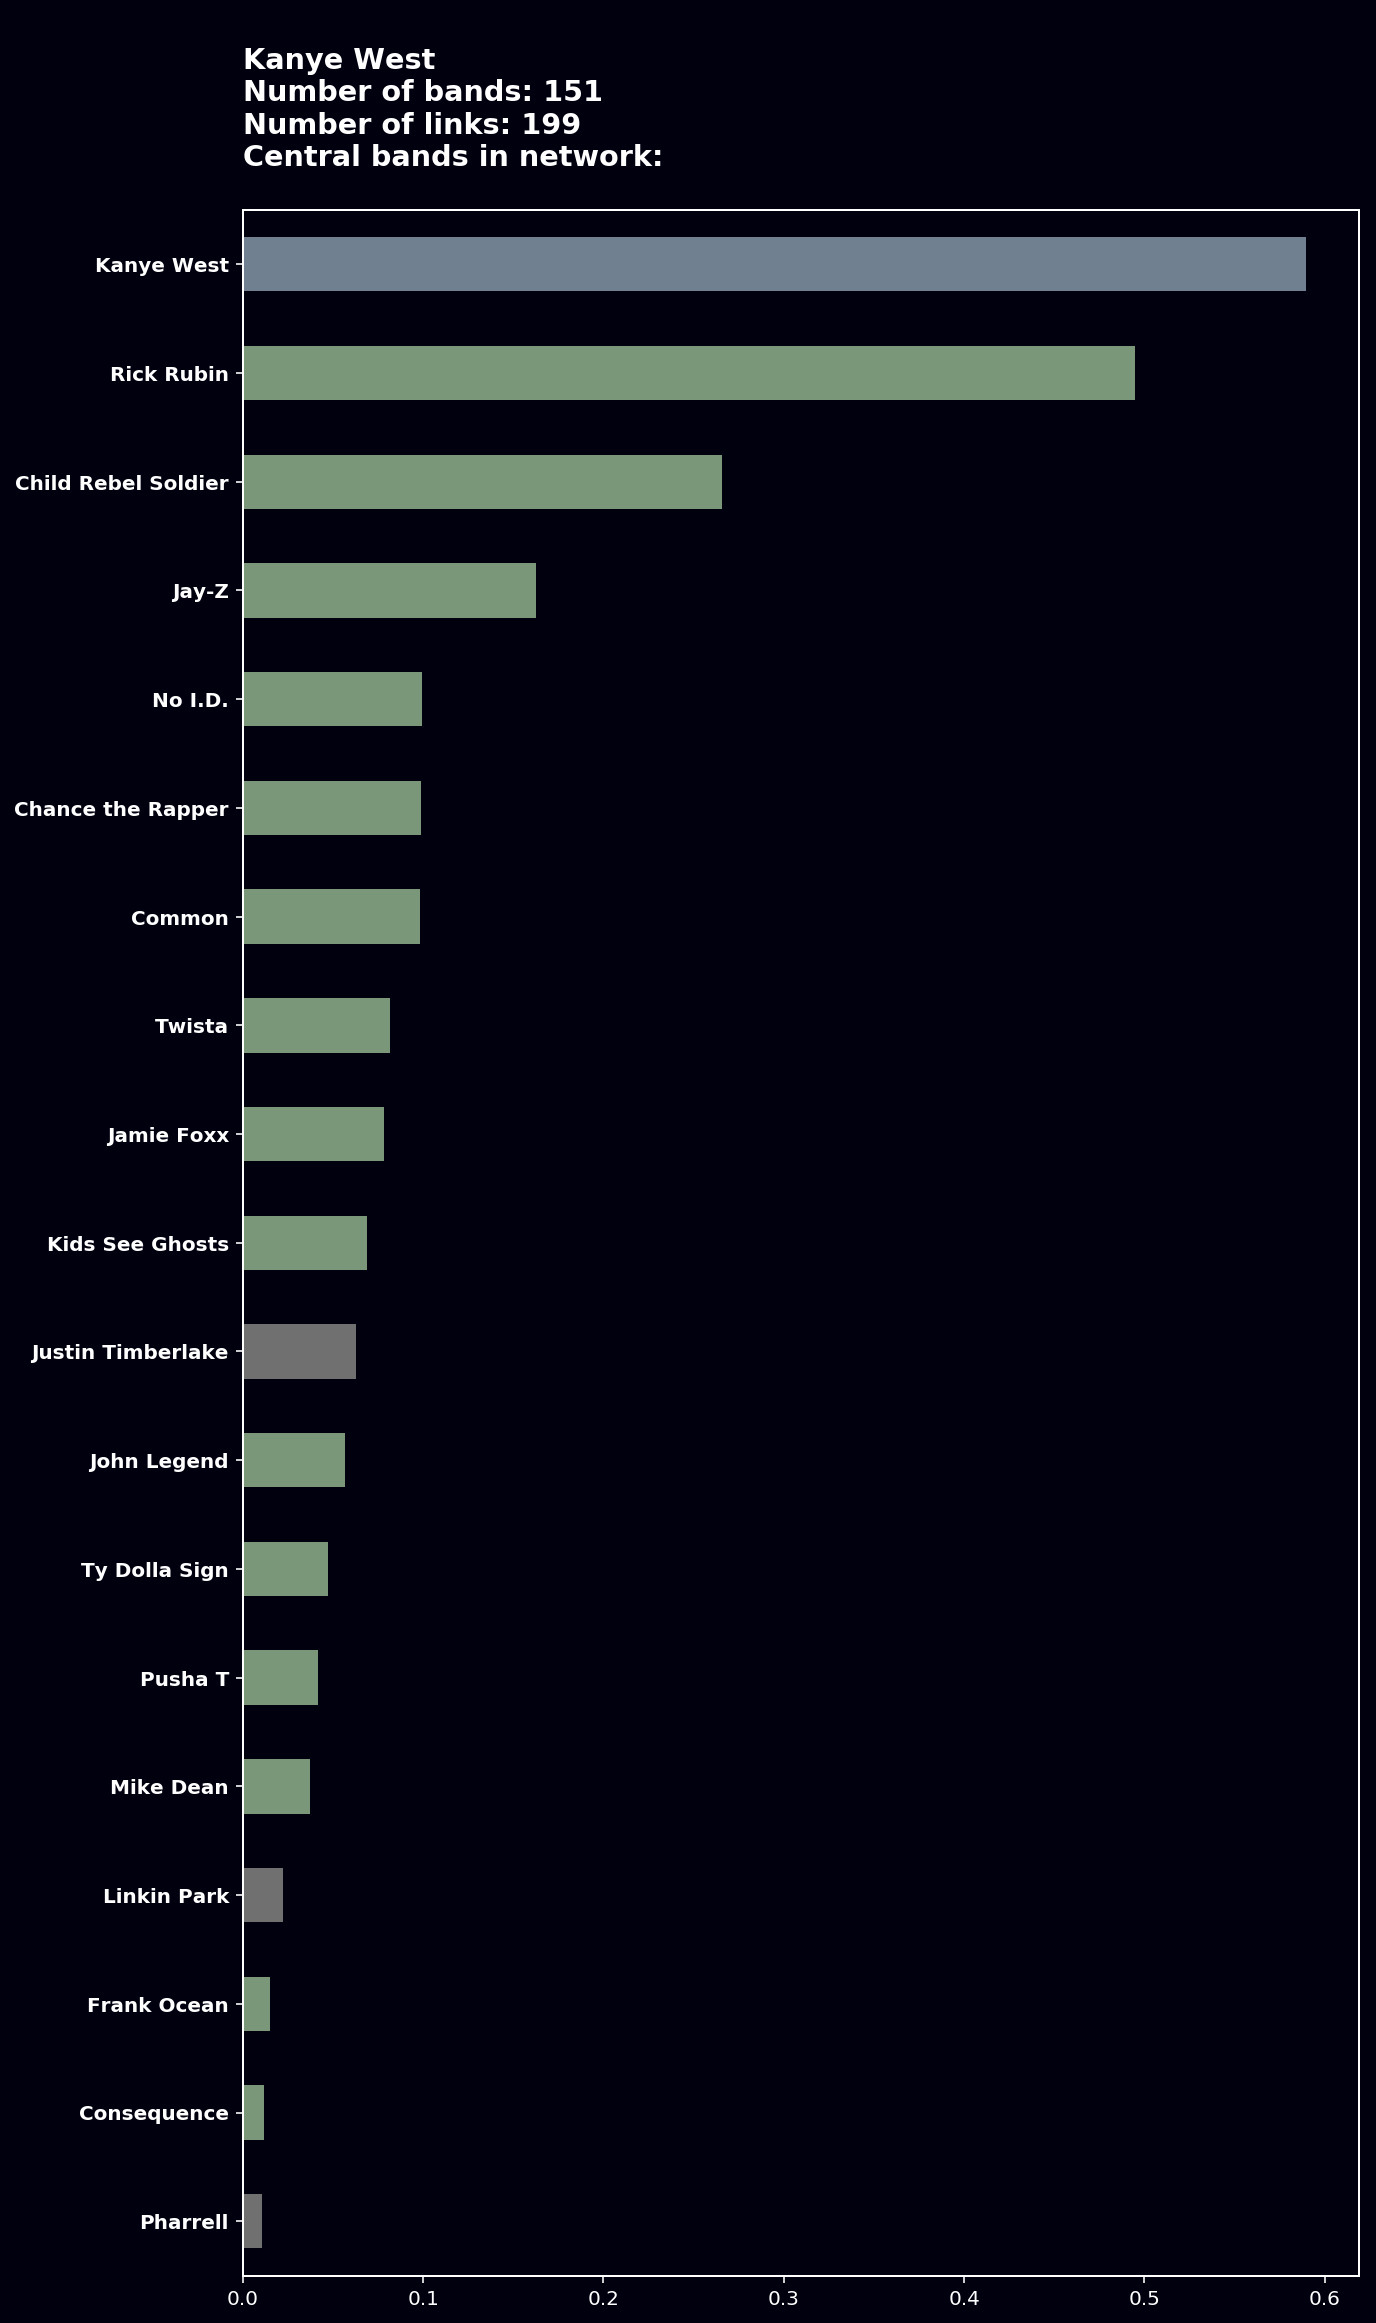

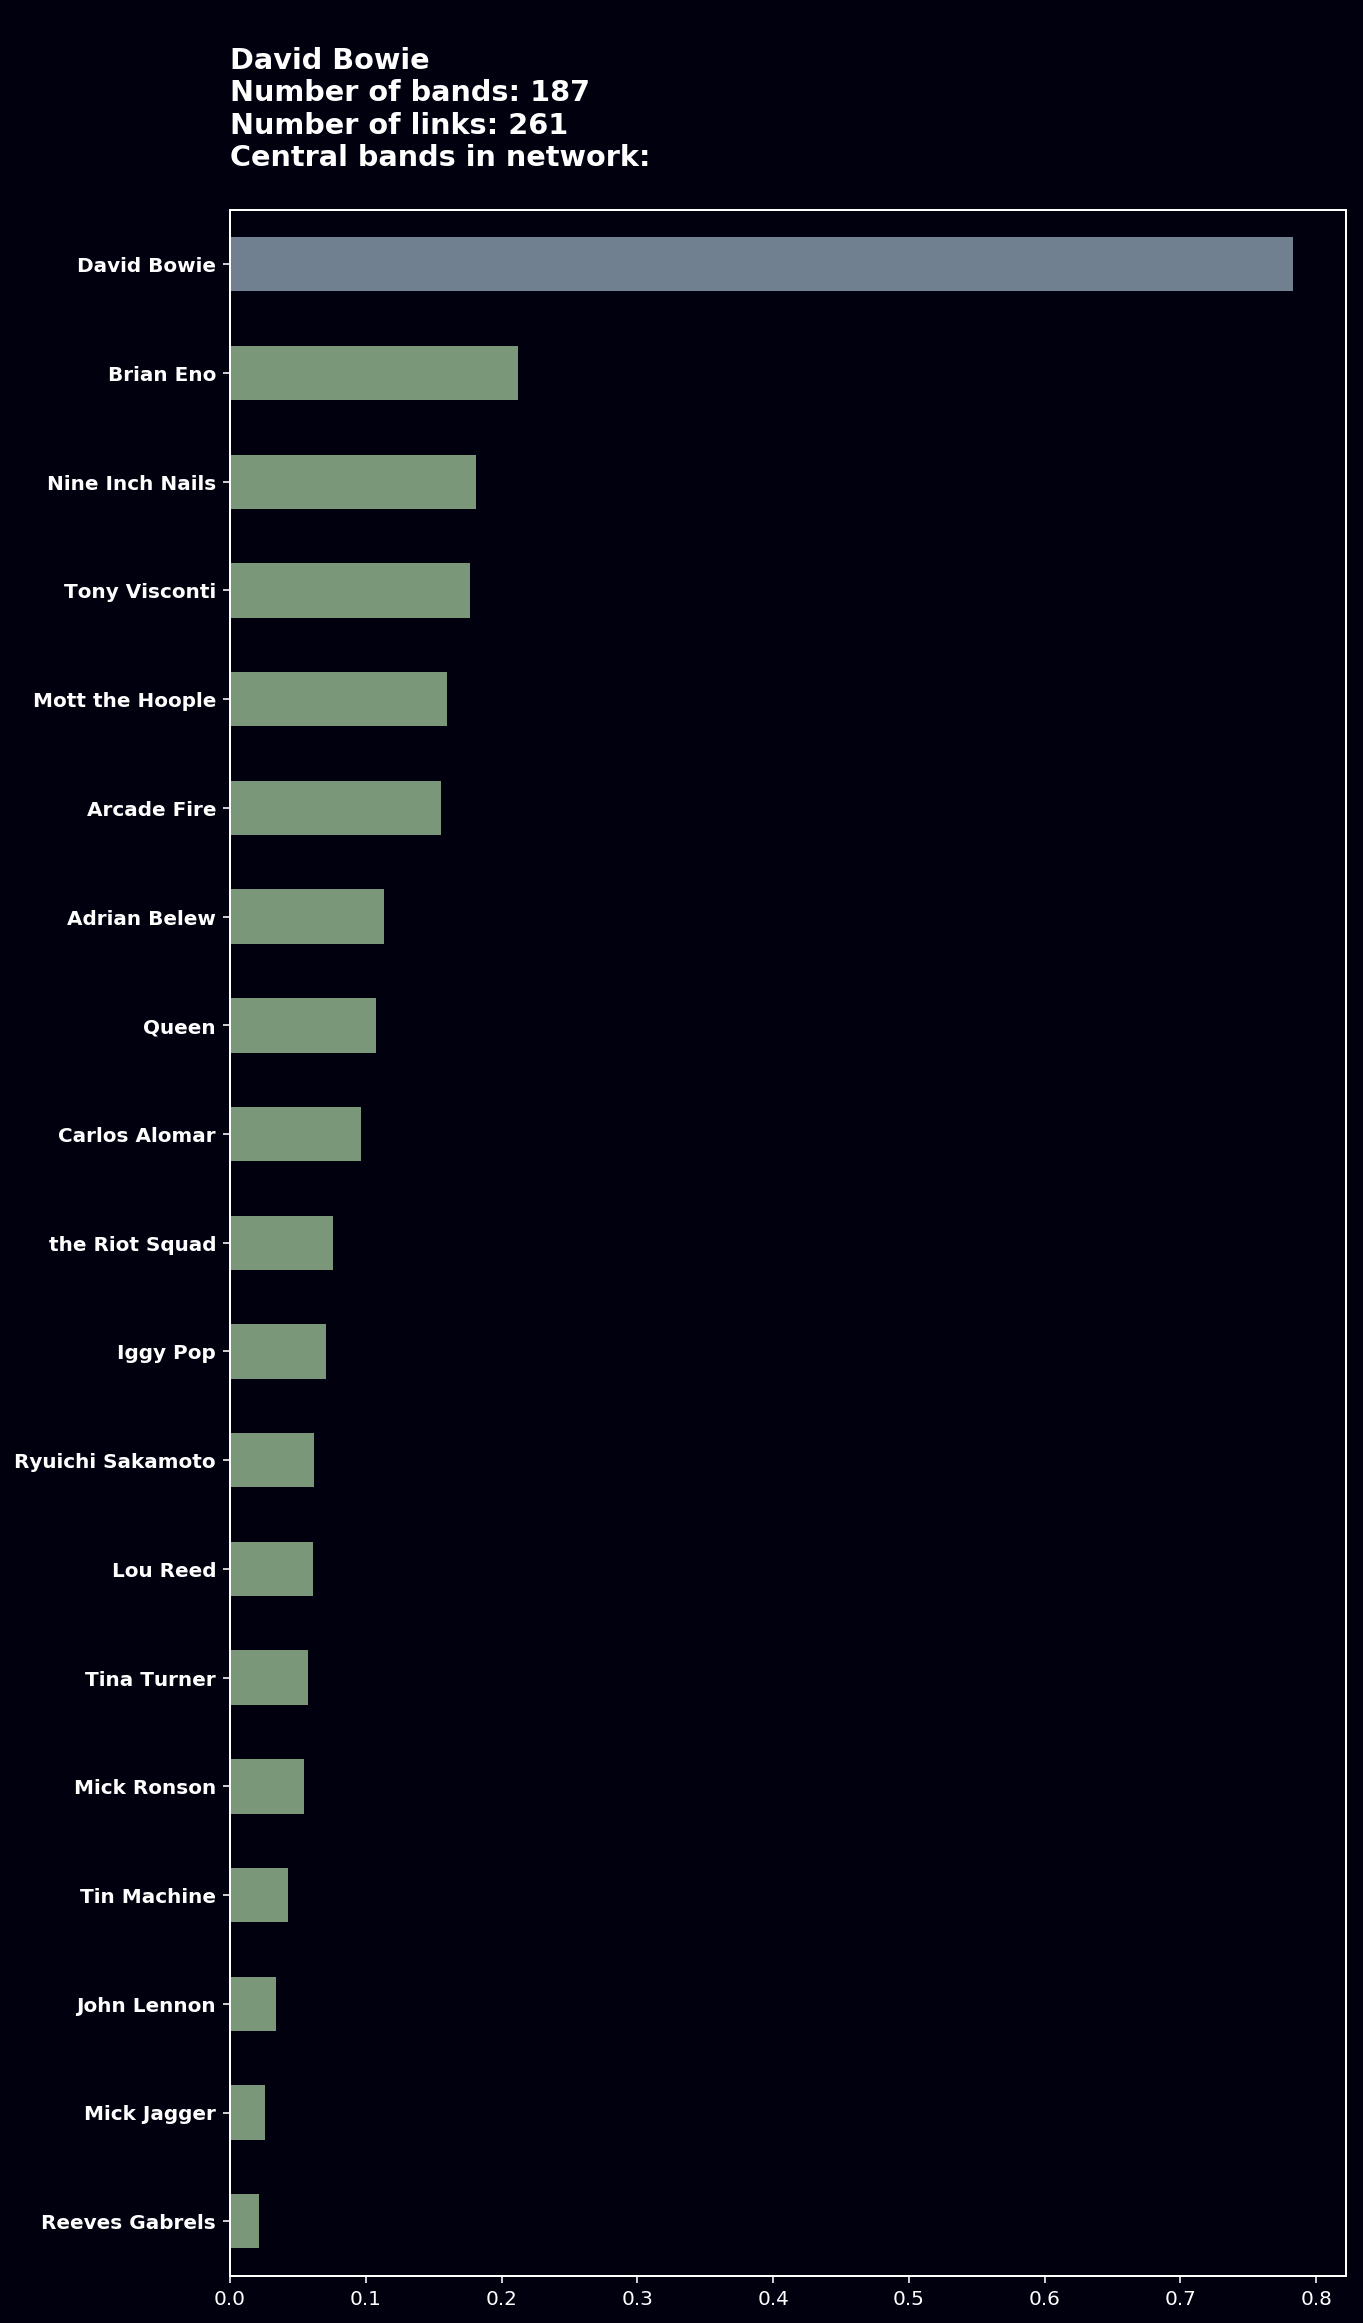

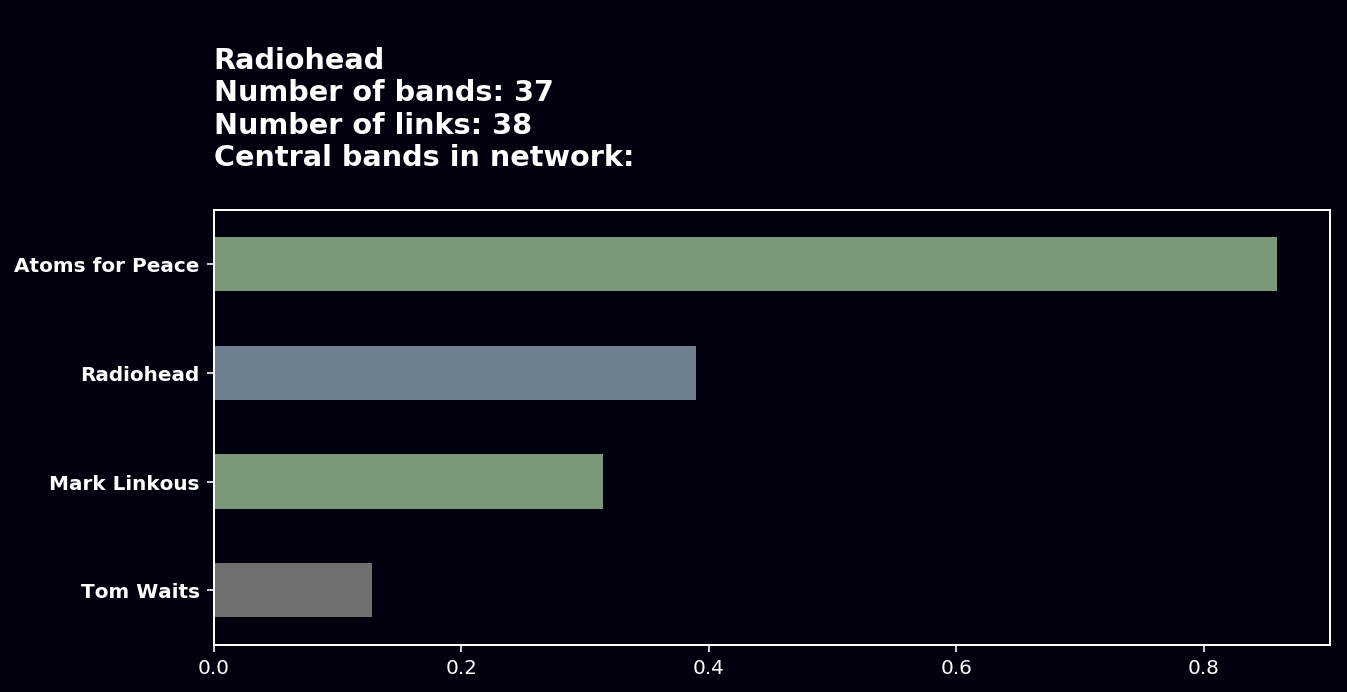

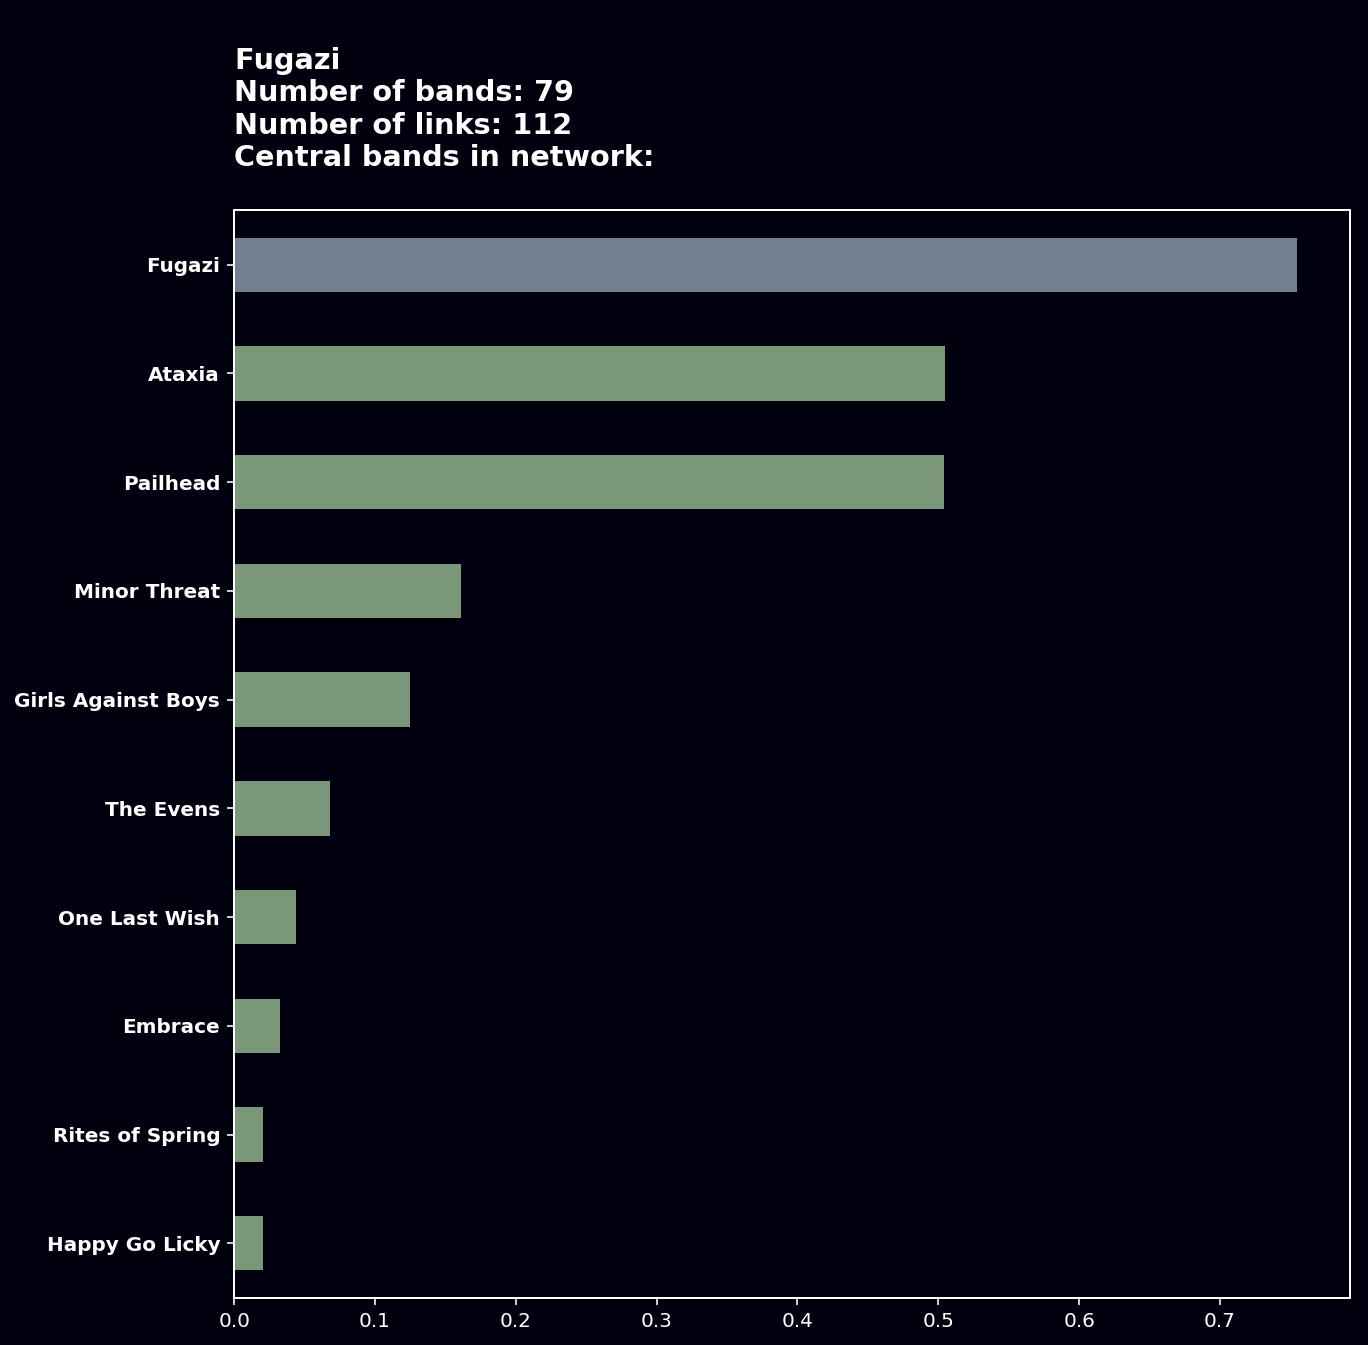

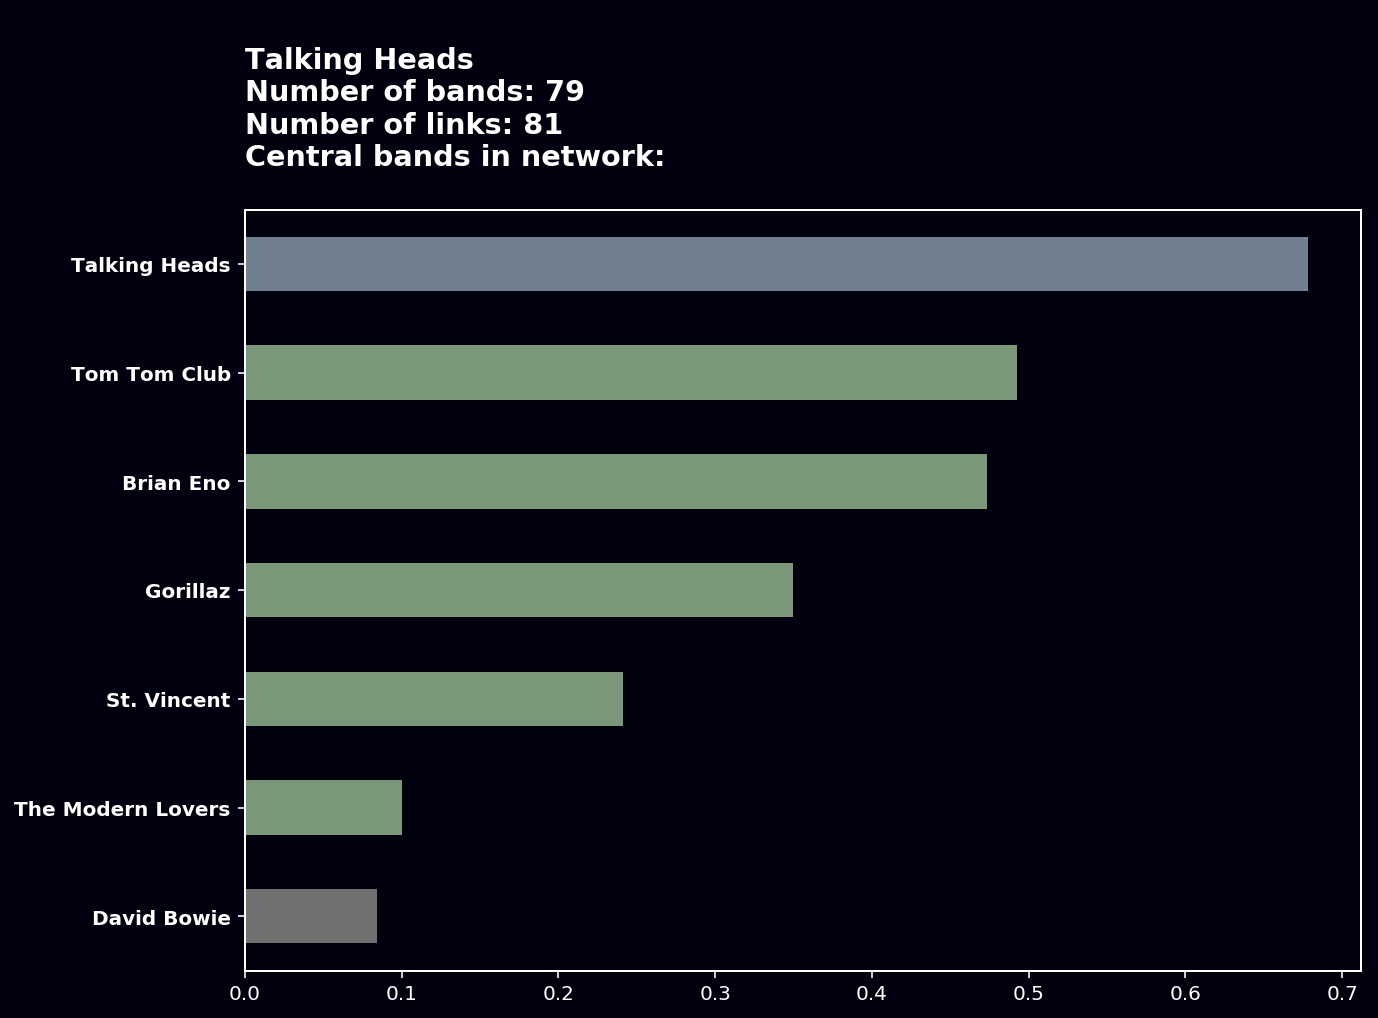

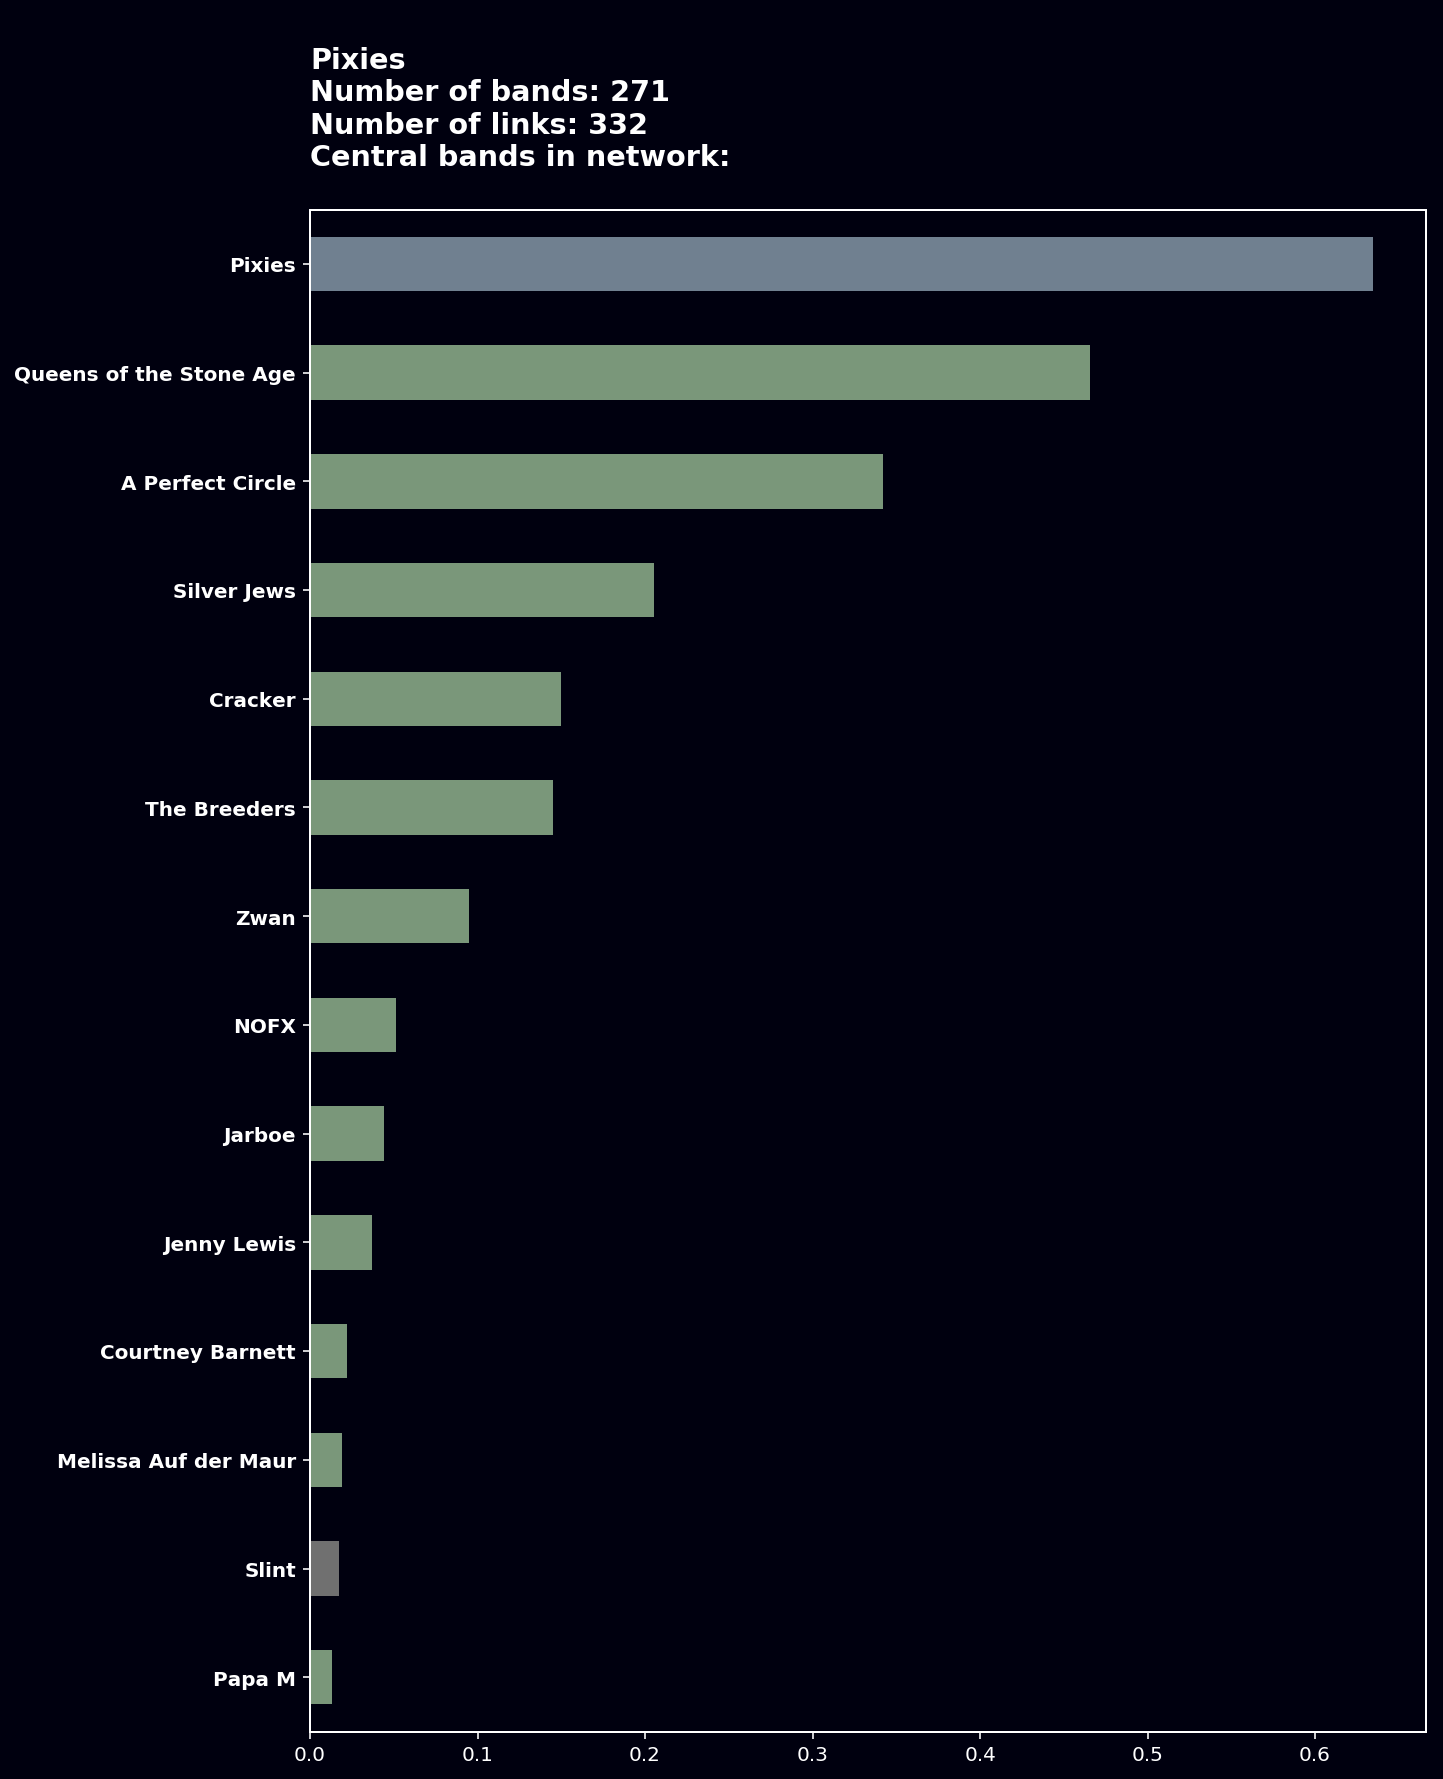

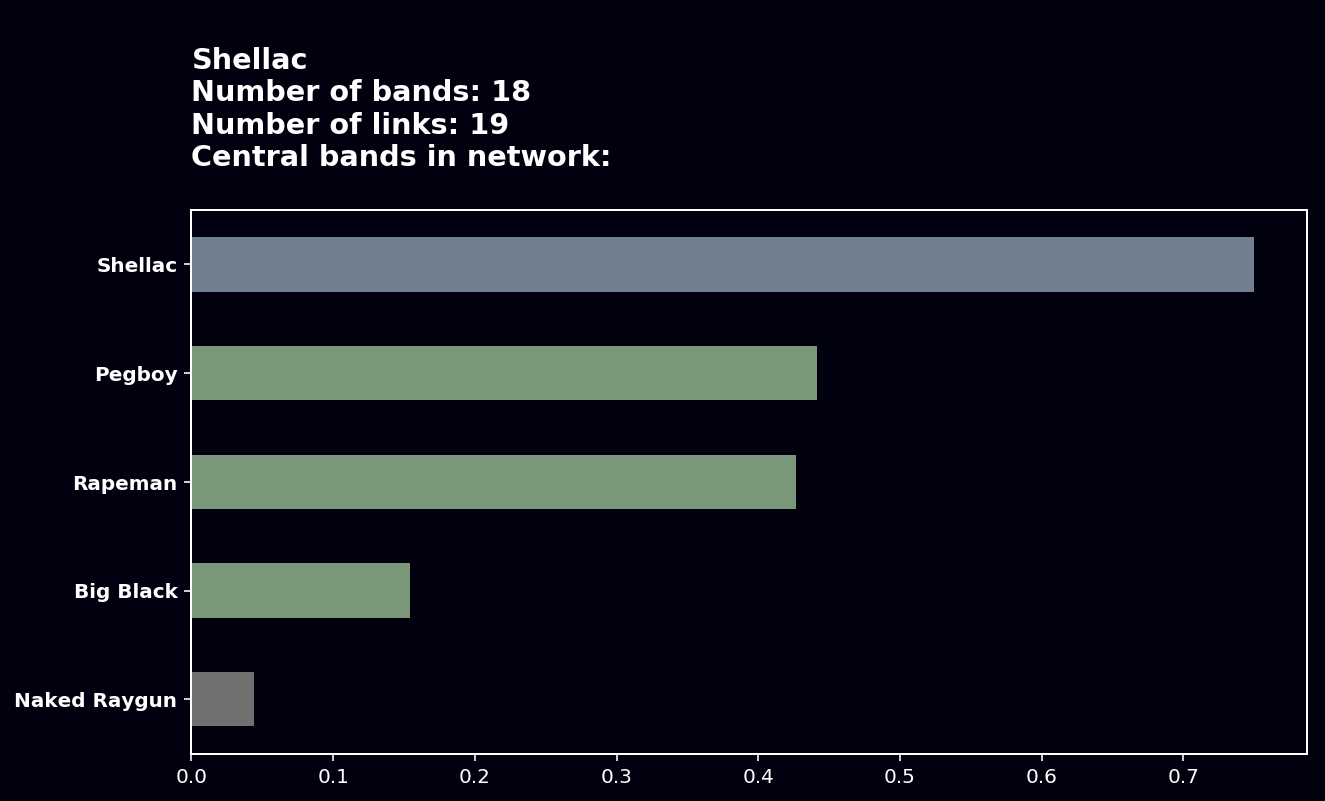

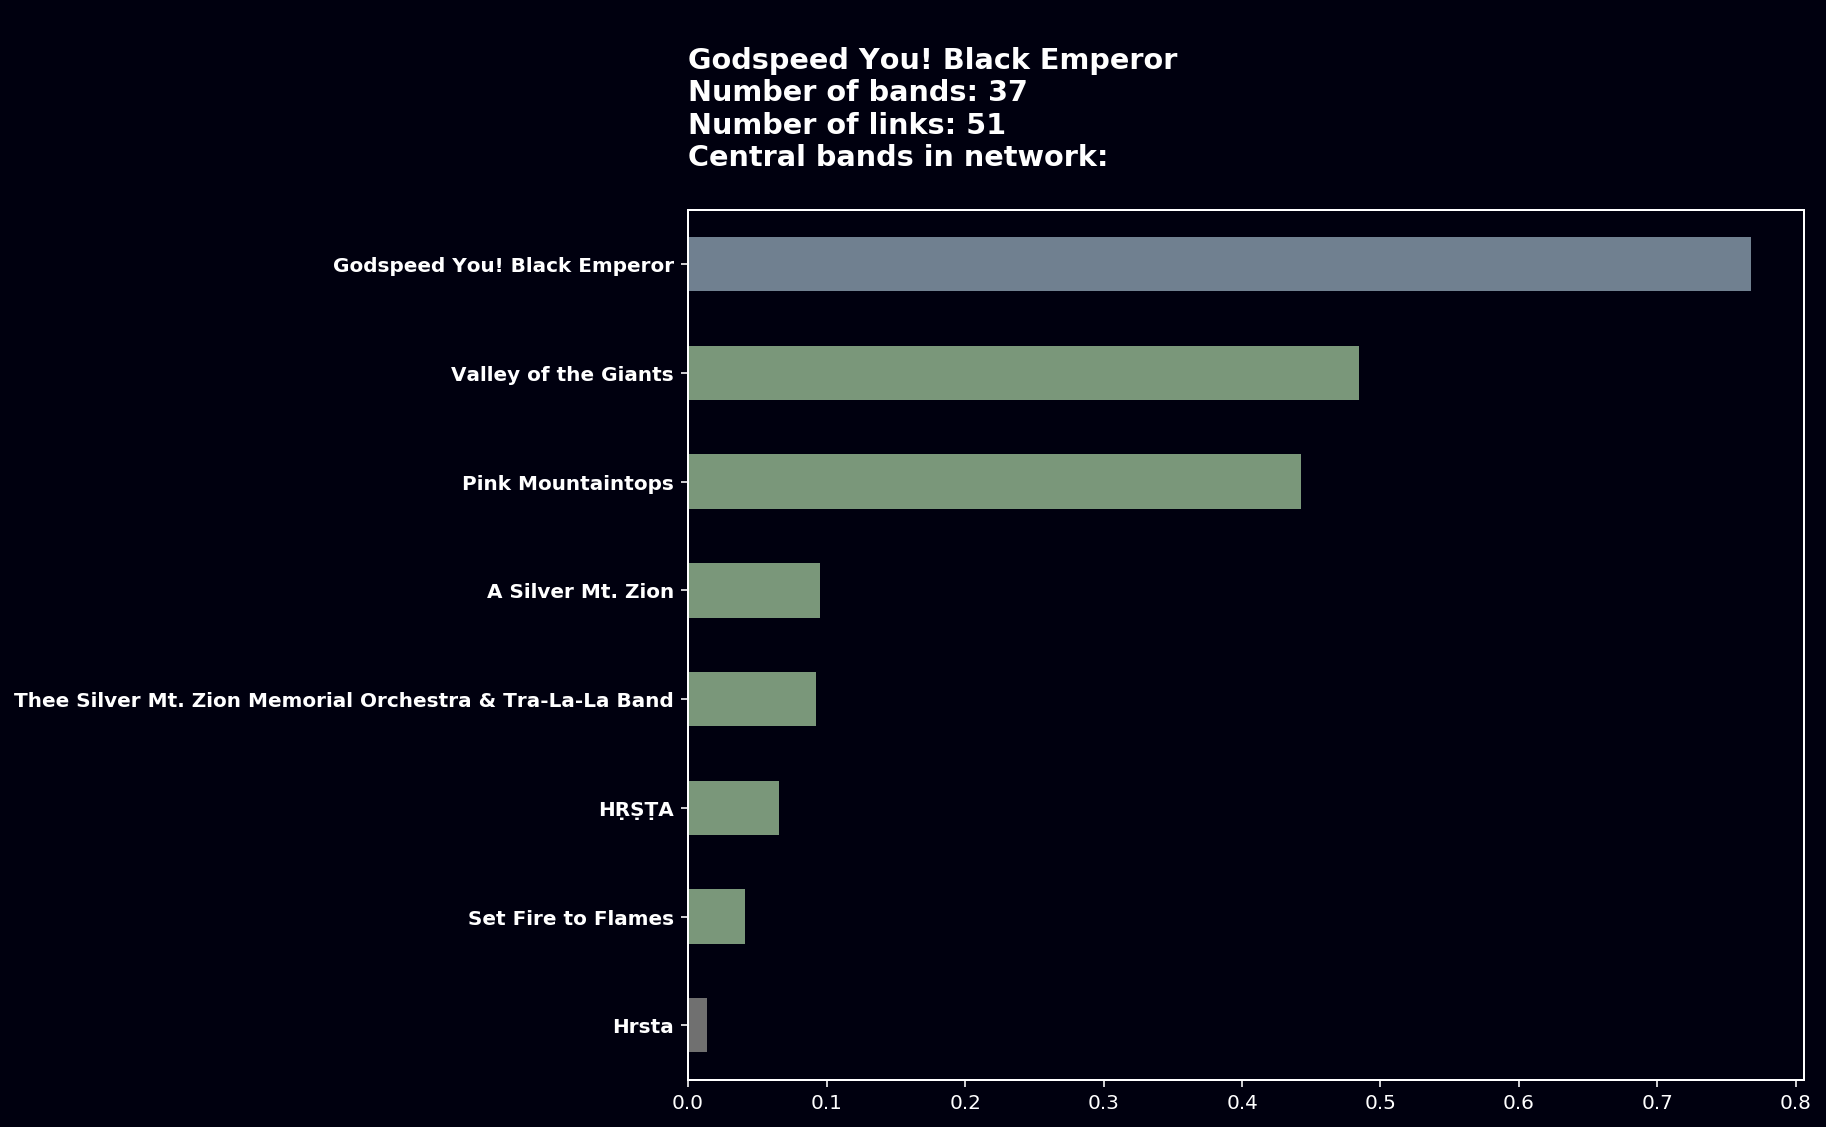

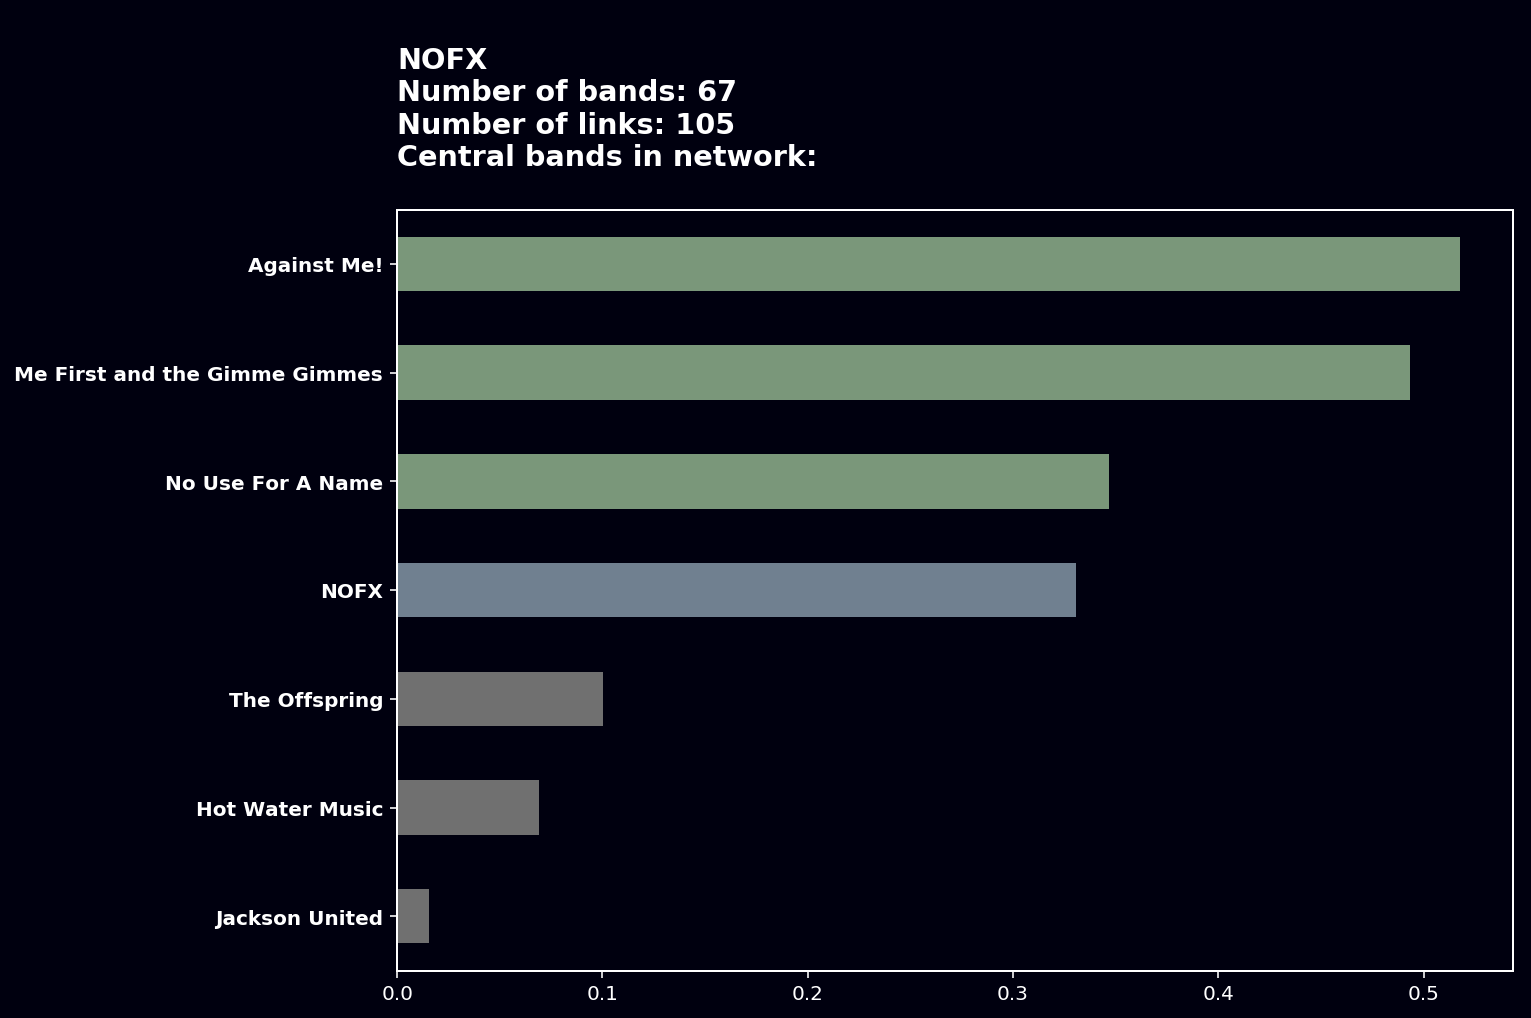

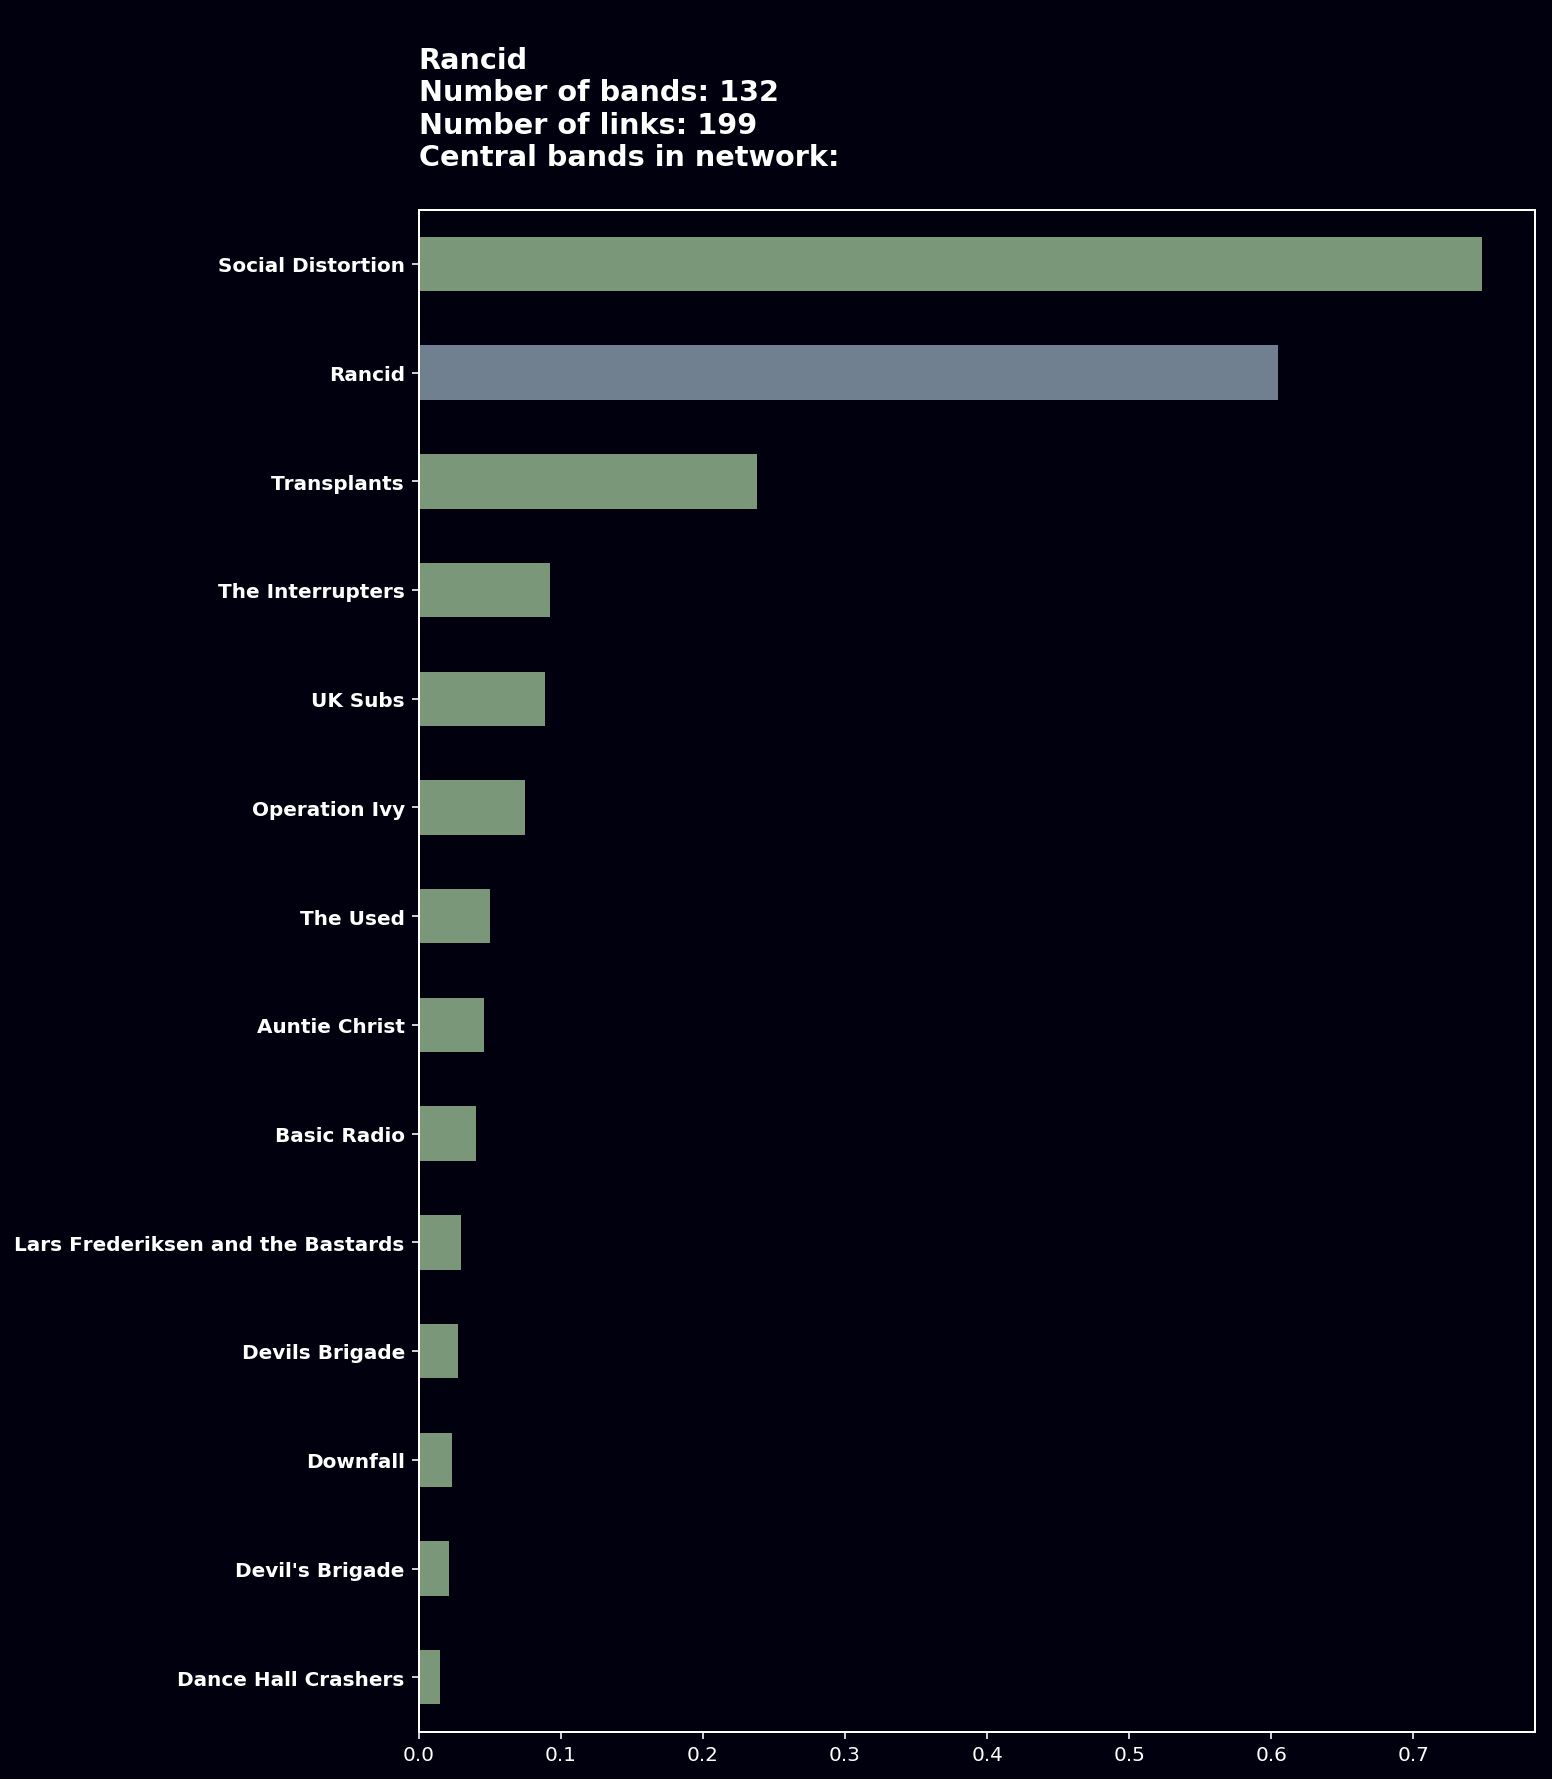

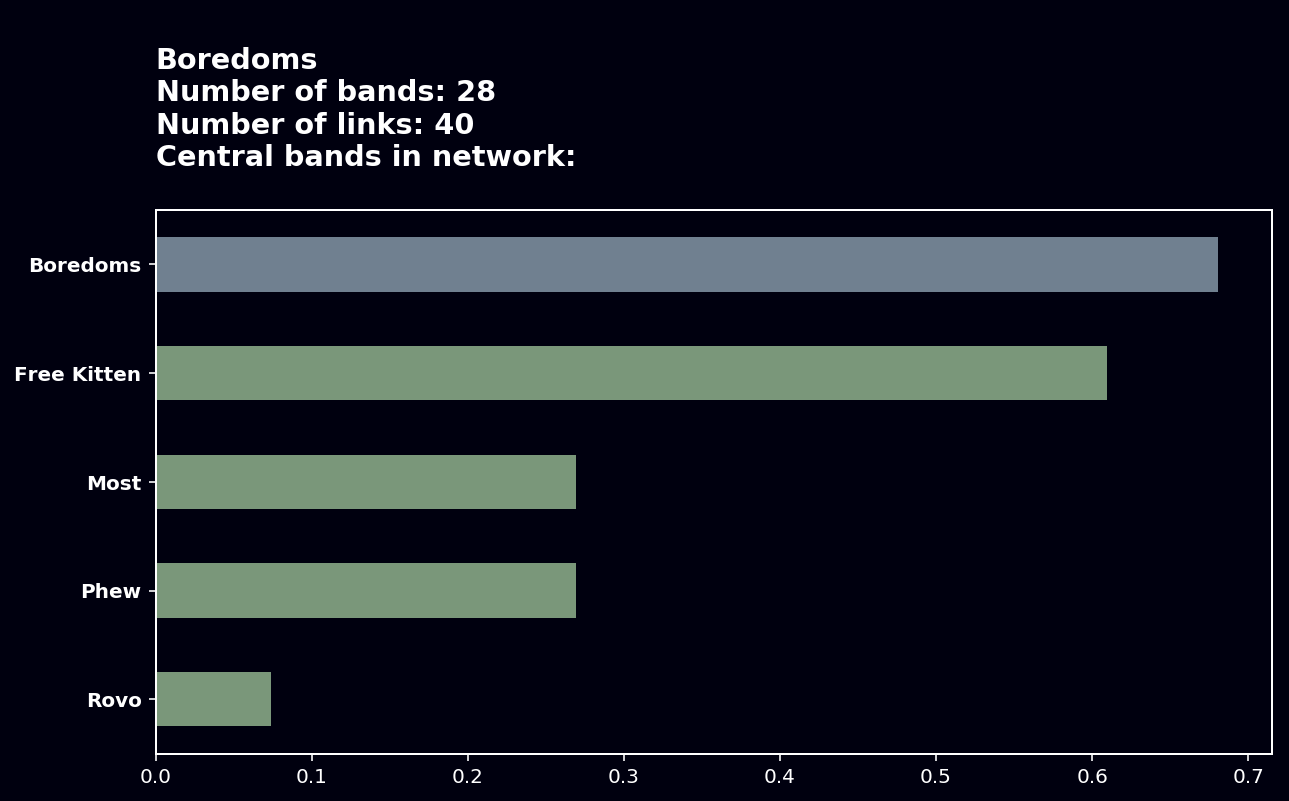

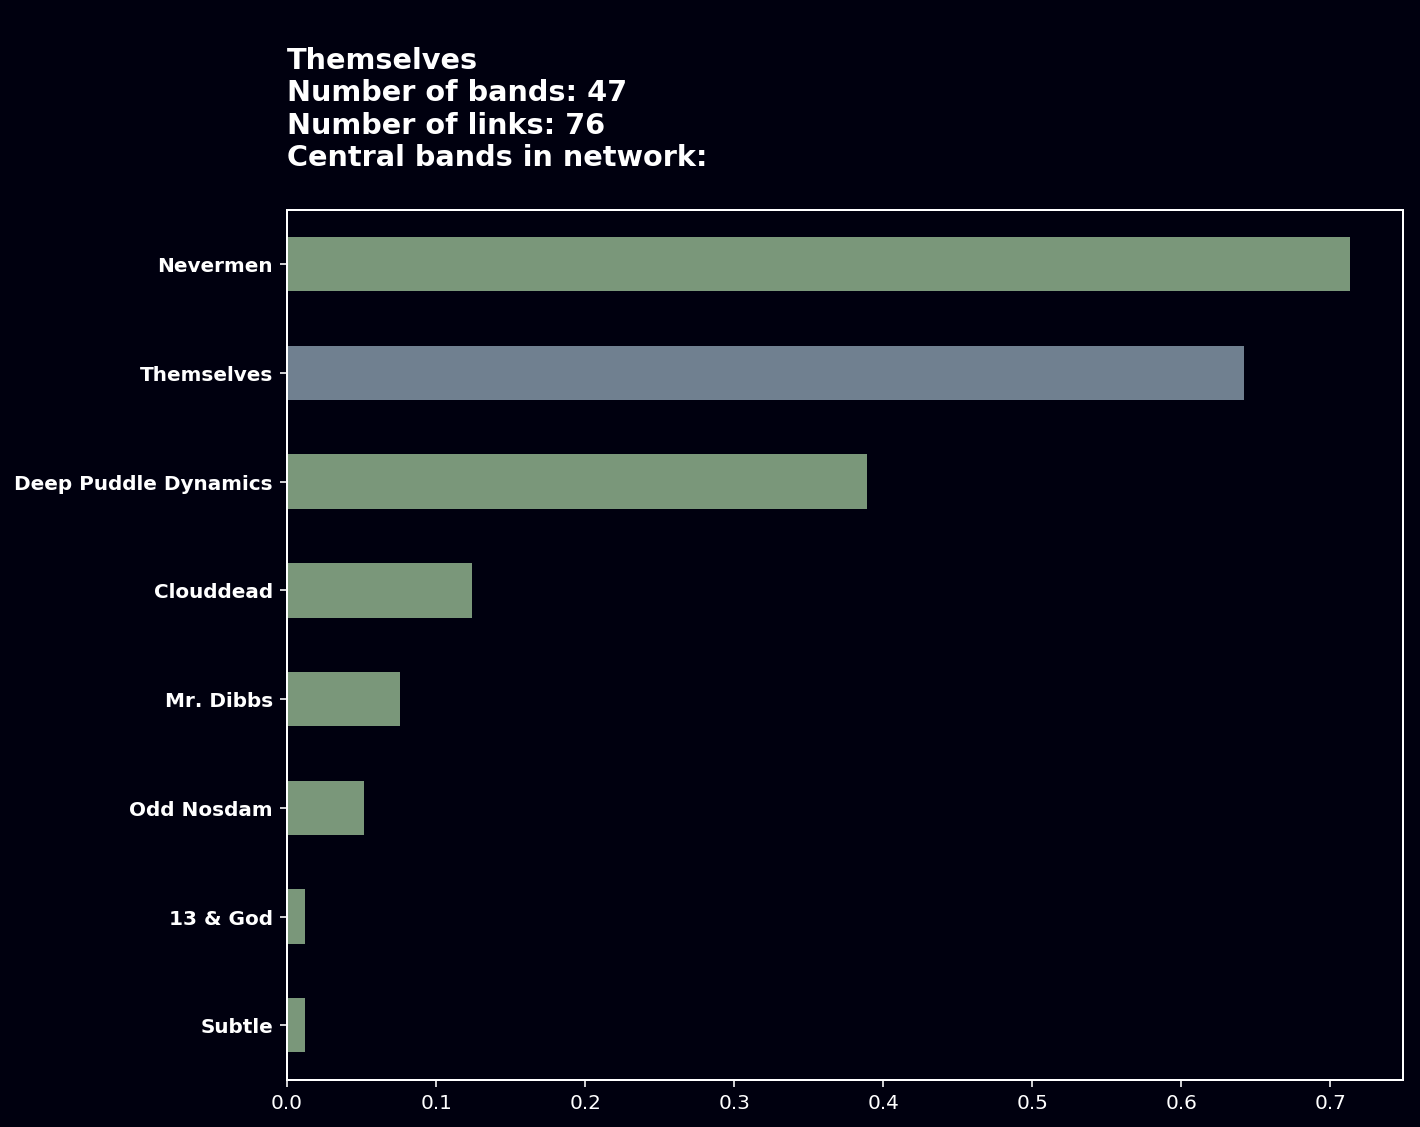

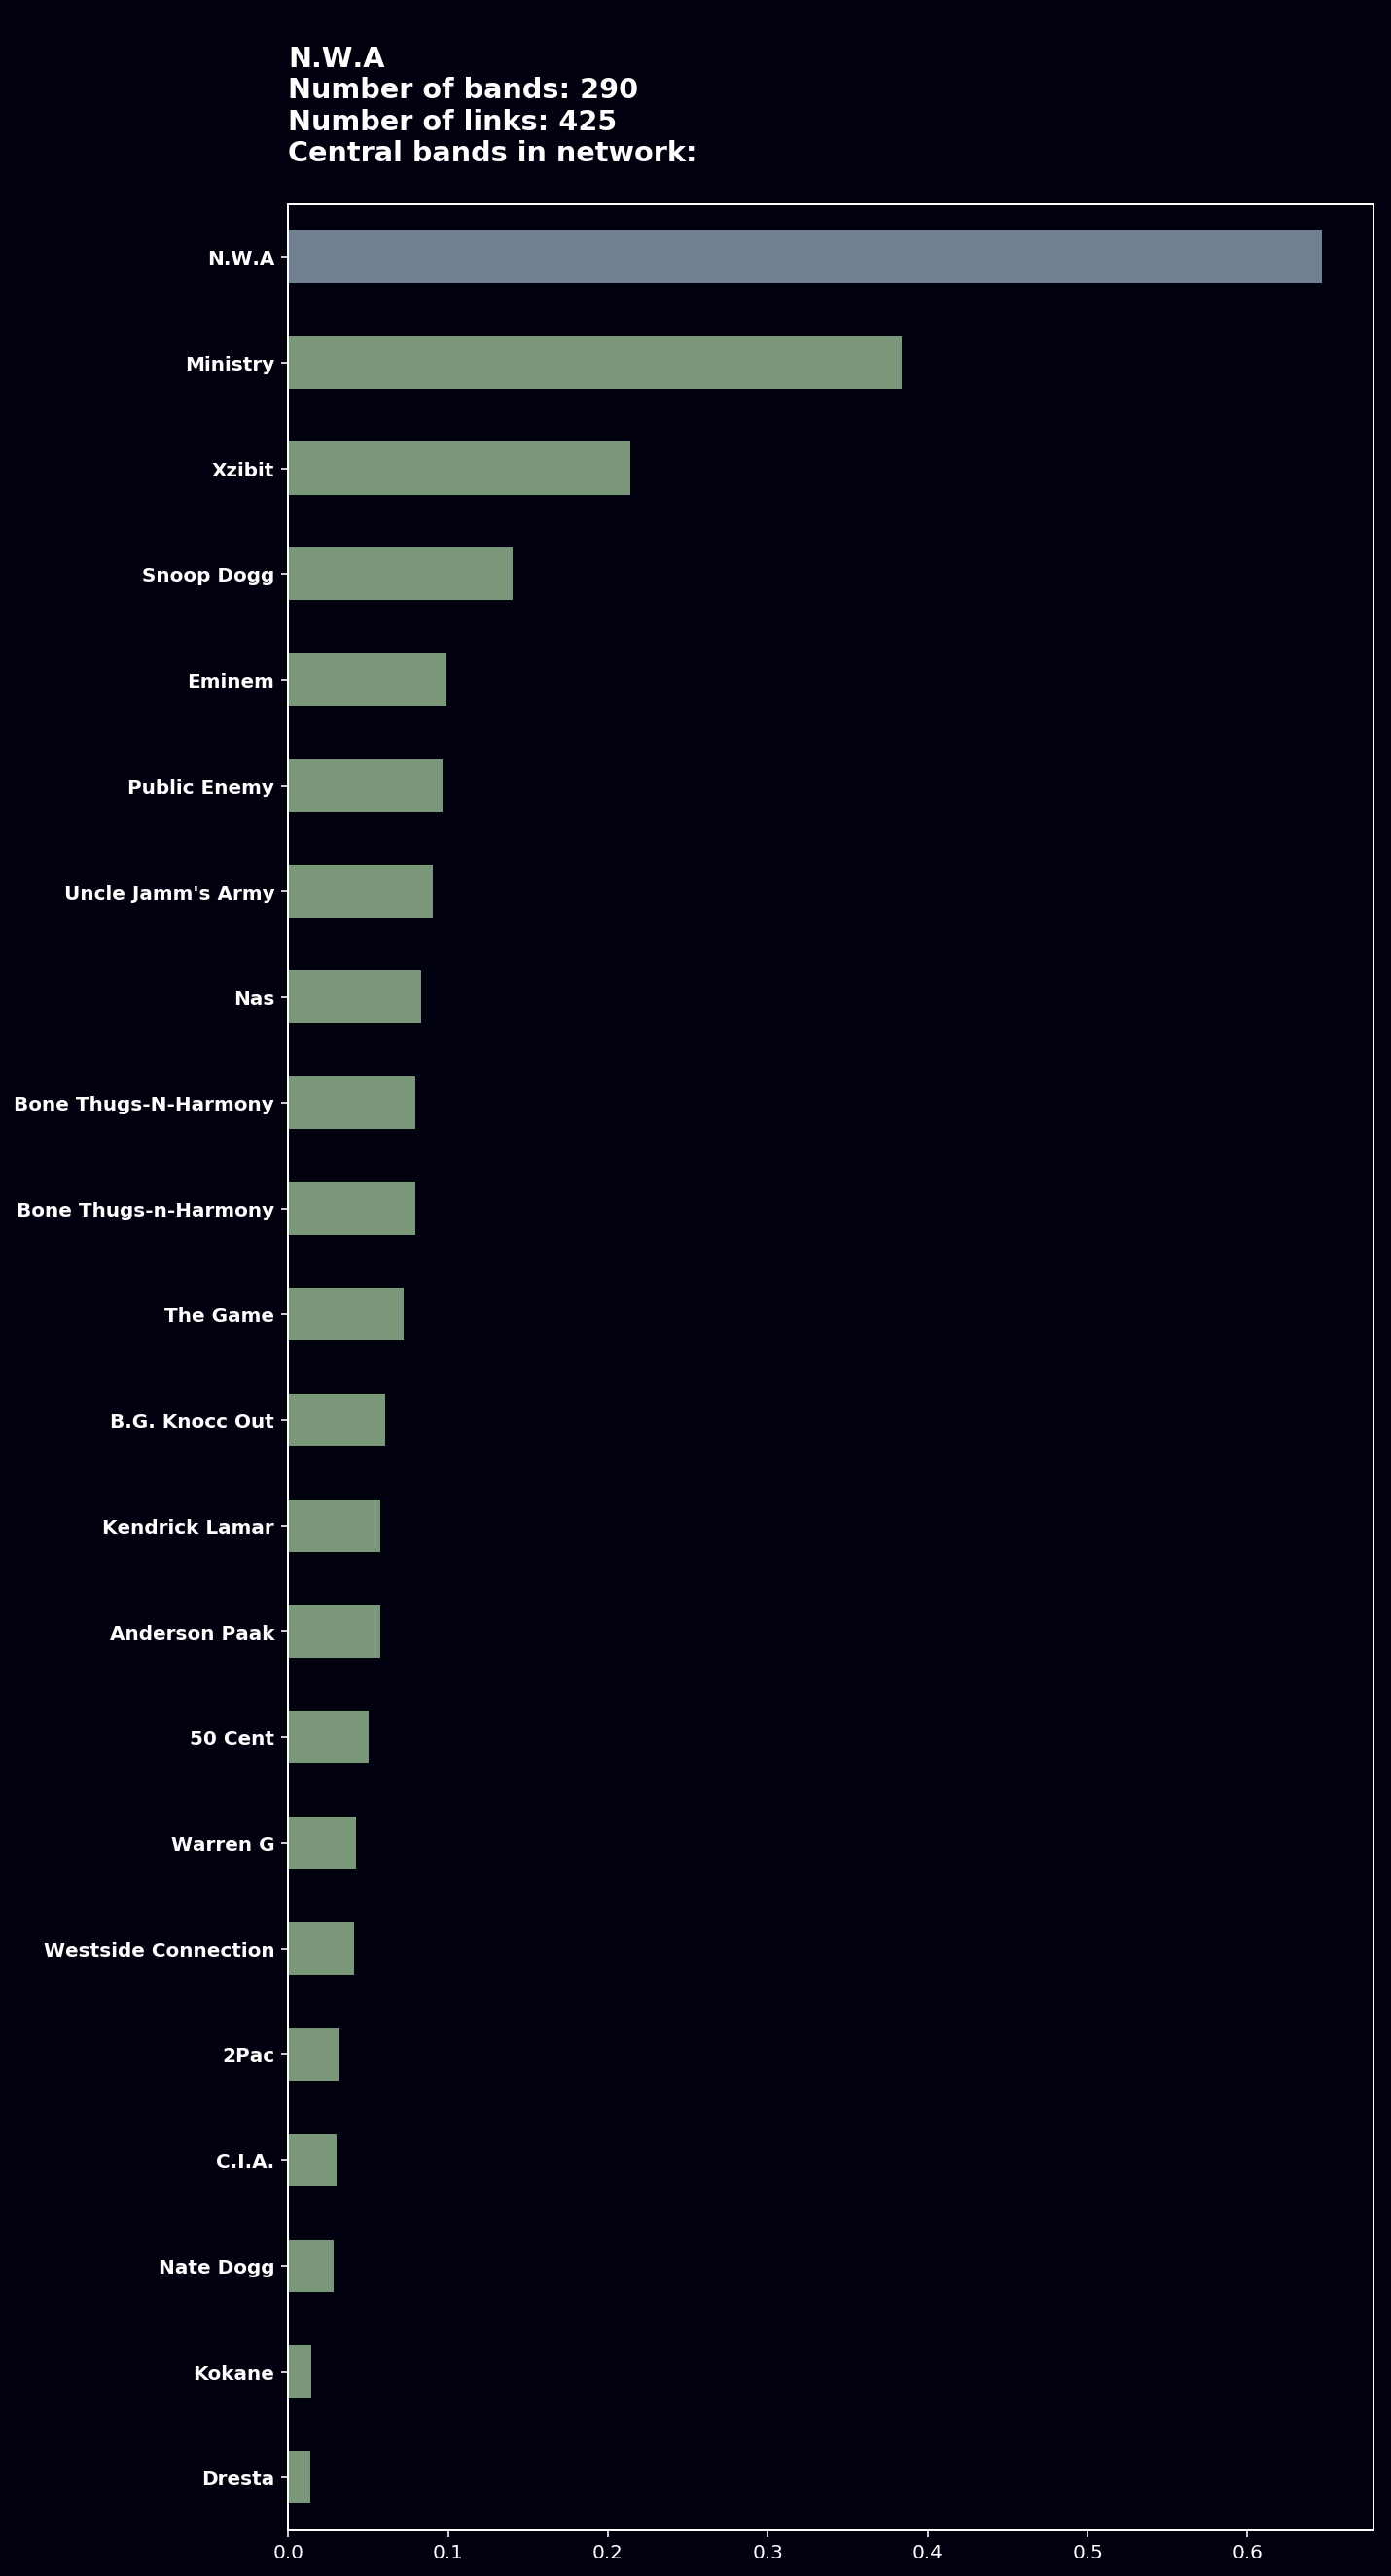

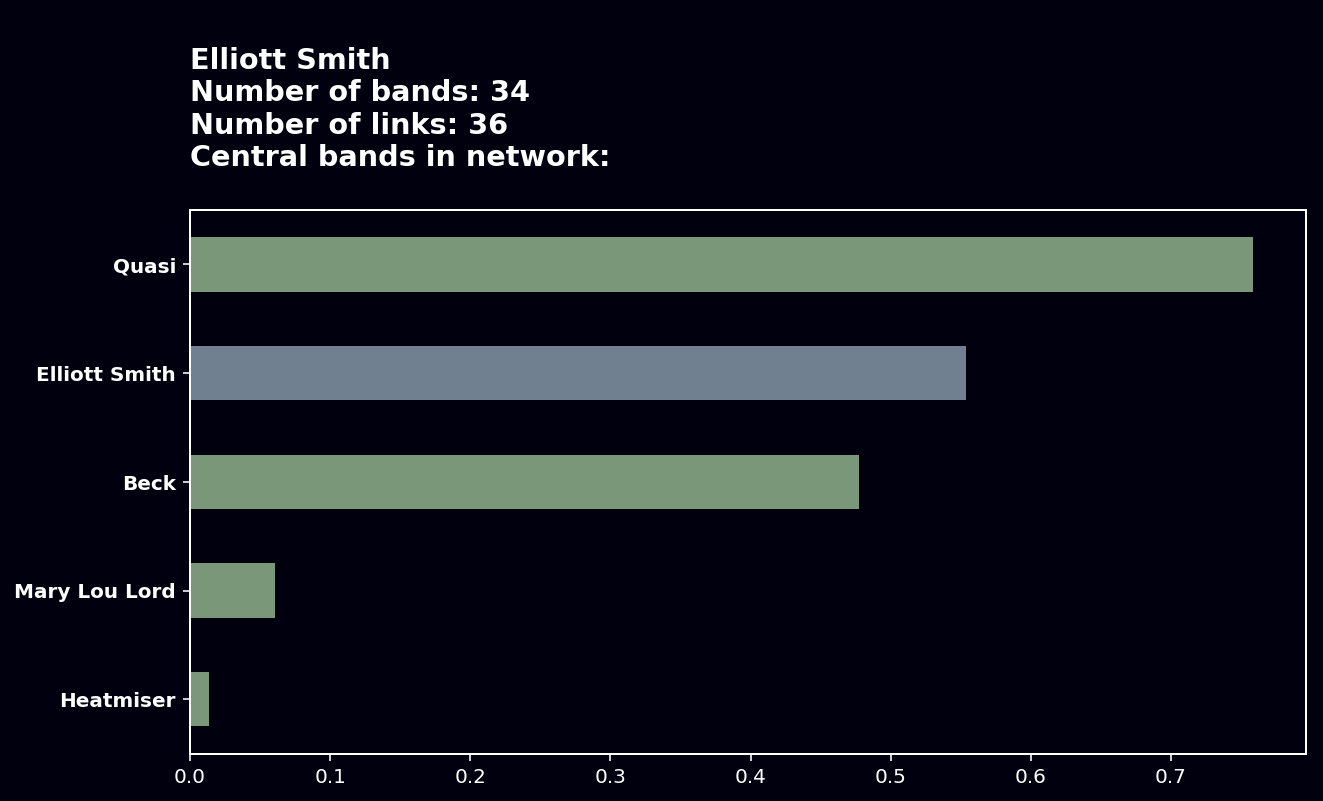

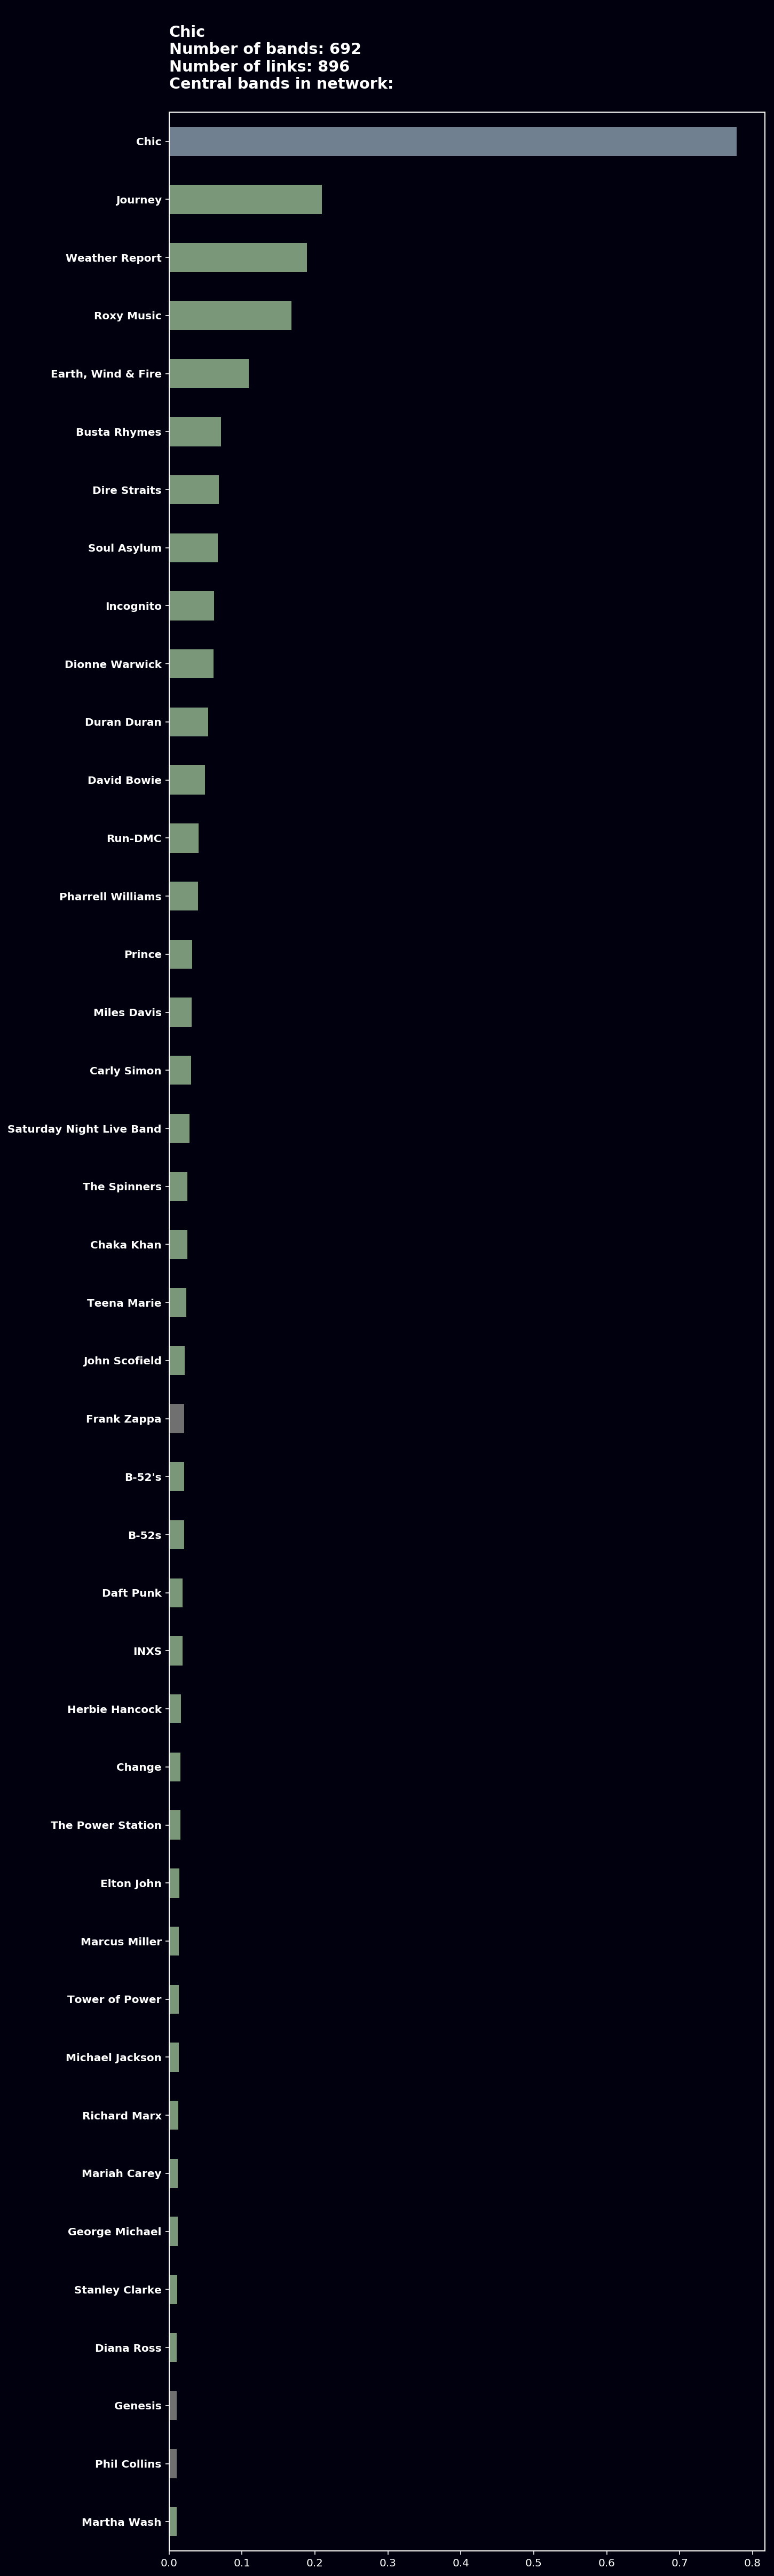

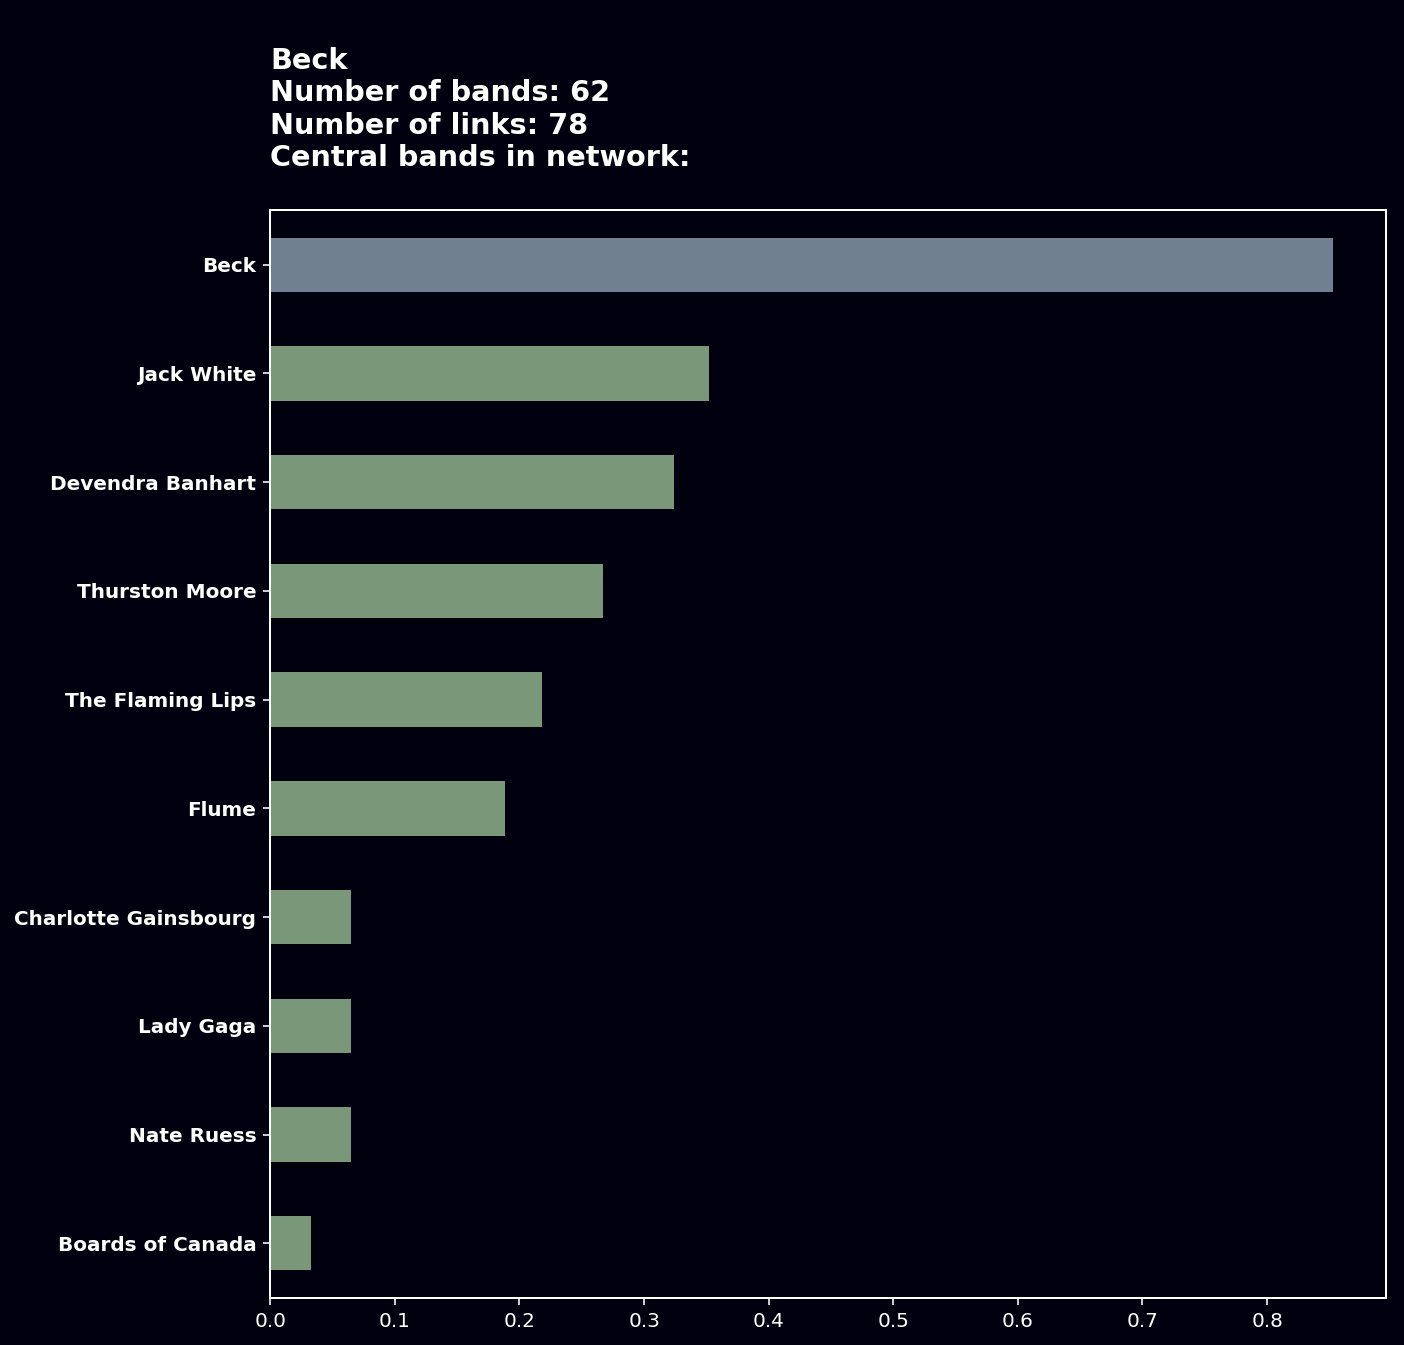

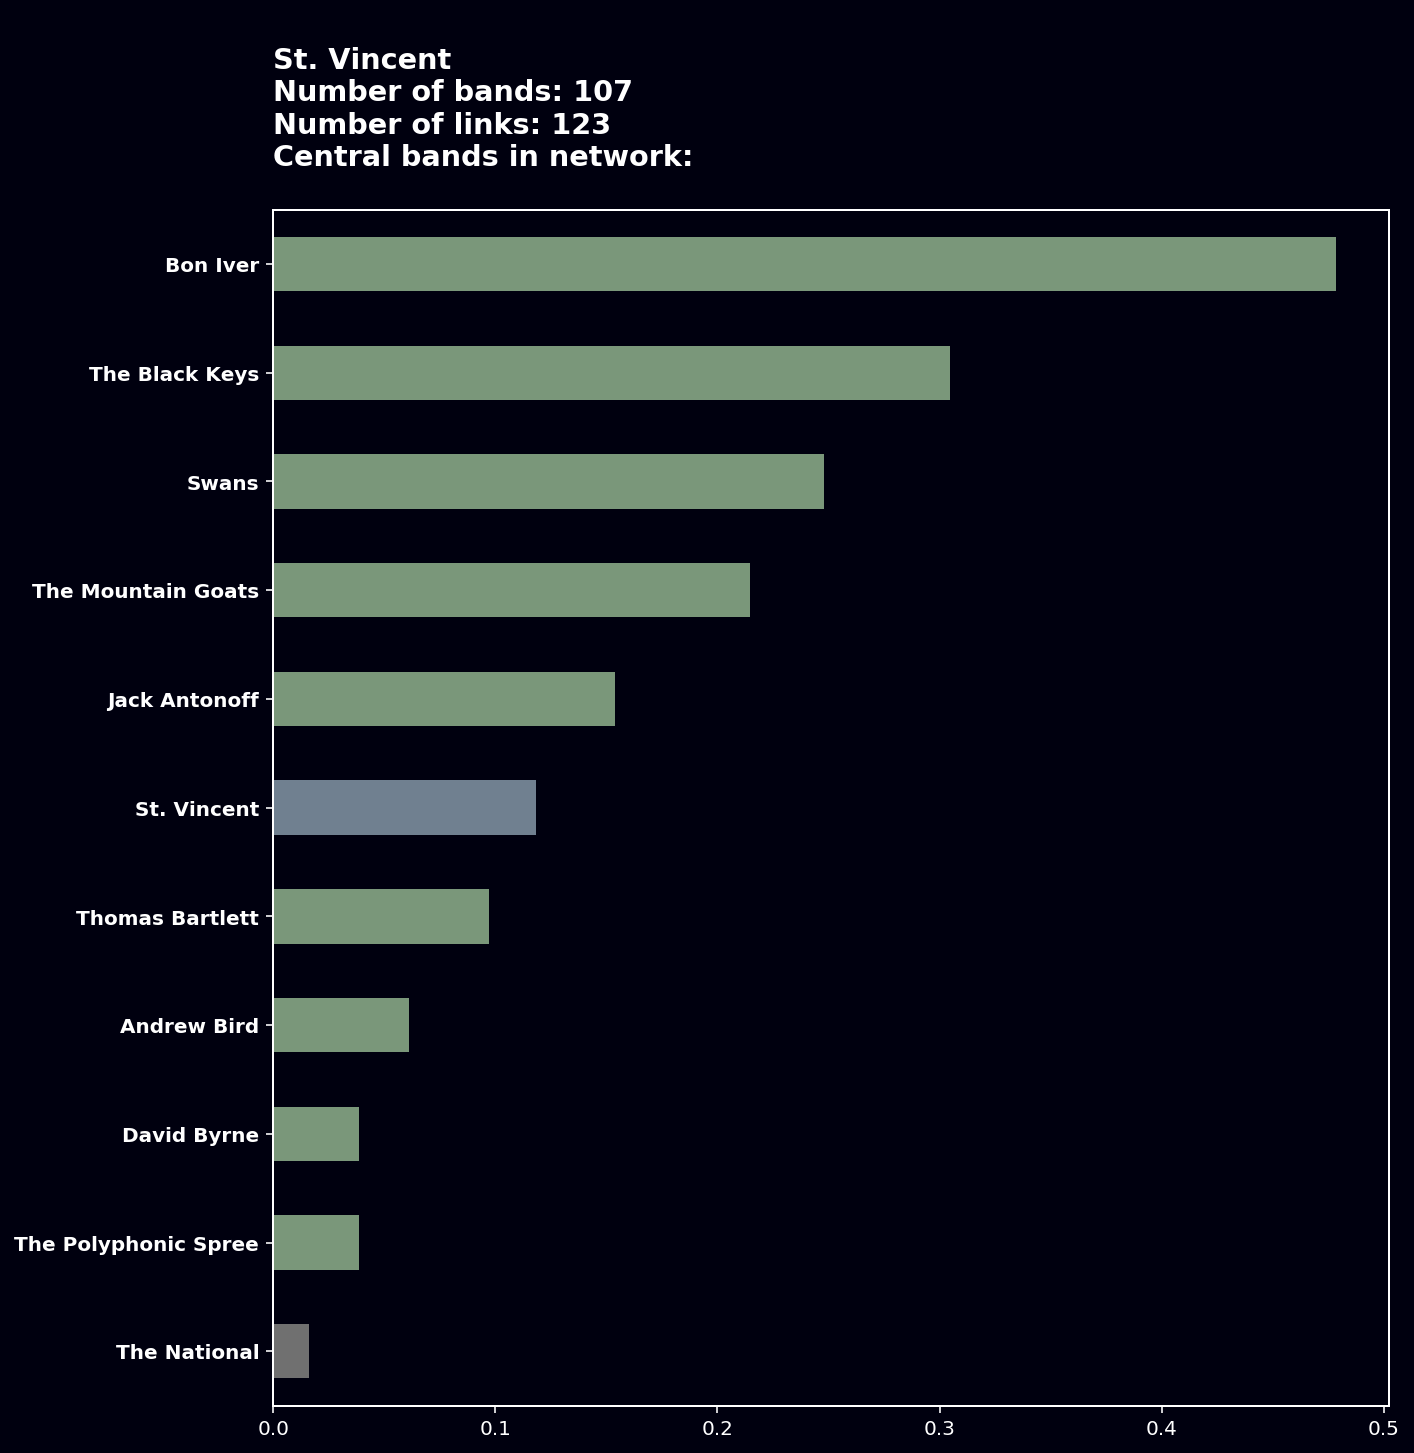

In [12]:
for band in output.band_name:
    draw_betweenness(band)